## Question 1:

In [61]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
rf1=np.zeros((10,10))
rf1[9,9]=1
rf1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [3]:
rf2=np.zeros((10,10))
vals = [-100,-100,-100,-100,-100,-100,-100,-100,-100,-100, -100,-100,-100,-100,-100,-100,-100,-100,-100,10]
pos = [(1,4),(2,4),(3,4),(4,4),(5,4),(6,4),(1,5),(1,6),(2,6),(3,6),(7,6),(8,6),(3,7),(7,7),(3,8),(4,8),(5,8),(6,8),(7,8),(9,9)]
rows, cols = zip(*pos)
rf2[rows, cols] = vals
rf2

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100., -100., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0., -100., -100., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0., -100.,    0.,    0.,    0., -100.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -100., -100., -100.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0., -100.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          10.]])

In [4]:
def plot_heatmap(data, title):
    heatmap = plt.pcolor(data, cmap='plasma')
    plt.colorbar()
    plt.gca().invert_yaxis() #plt.gca(): get the current polar axes on the current figure
    plt.title(title)
    plt.show()

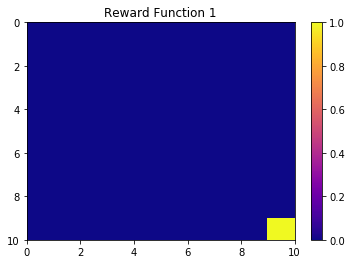

In [5]:
plot_heatmap(rf1, 'Reward Function 1')

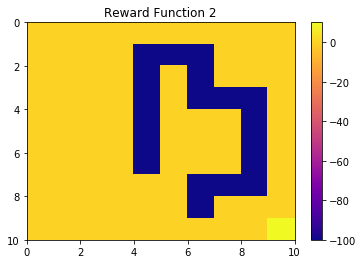

In [6]:
plot_heatmap(rf2, 'Reward Function 2')

## Question 2:

In [7]:
w=0.1
Pr=np.zeros((100,100))
for s in range(len(Pr[0])):
    if (s==0):
        #print('s==0', s)
        Pr[s,s]=w/4+w/4
        Pr[s,s+1]=w/4
        Pr[s,s+10]=1-w+w/4
    elif (s>0) and (s<9):
        #print('s>0 and s<9', s)
        Pr[s,s-1]=w/4
        Pr[s,s]=w/4
        Pr[s,s+1]=w/4
        Pr[s,s+10]=1-w+w/4   
    elif (s==9):
        #print('s==9', s)
        Pr[s,s-1]=w/4
        Pr[s,s]=w/4+w/4
        Pr[s,s+10]=1-w+w/4
    elif (s%10==0) and (s>0) and (s<90):
        #print('s%10==0 and s>0 and s<9',s)
        Pr[s,s-10]=w/4
        Pr[s,s]=w/4
        Pr[s,s+1]=w/4
        Pr[s,s+10]=1-w+w/4          
    elif (s==90):
        #print('s==90', s)
        Pr[s,s-10]=w/4
        Pr[s,s]=1-w+w/4+w/4
        Pr[s,s+1]=w/4
    elif (s>90) and (s<99):
        #print('s>90 and s<99', s)
        Pr[s,s-10]=w/4
        Pr[s,s-1]=w/4
        Pr[s,s]=1-w+w/4
        Pr[s,s+1]=w/4
    elif ((s-9)%10==0) and (s>9) and (s<99):
        #print('s%9==0 and s>9 and s<99', s)
        Pr[s,s-10]=w/4
        Pr[s,s-1]=w/4
        Pr[s,s]=w/4
        Pr[s,s+10]=1-w+w/4
    elif (s==99):
        #print('s==99', s)
        Pr[s,s-10]=w/4
        Pr[s,s-1]=w/4
        Pr[s,s]=1-w+w/4+w/4
    else:
        #print('non boundry', s)
        Pr[s,s-10]=w/4
        Pr[s,s-1]=w/4
        Pr[s,s+1]=w/4
        Pr[s,s+10]=1-w+w/4
print(Pr)

[[0.05  0.025 0.    ... 0.    0.    0.   ]
 [0.025 0.025 0.025 ... 0.    0.    0.   ]
 [0.    0.025 0.025 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.925 0.025 0.   ]
 [0.    0.    0.    ... 0.025 0.925 0.025]
 [0.    0.    0.    ... 0.    0.025 0.95 ]]


In [8]:
Pl=np.zeros((100,100))
for s in range(len(Pl[0])):
    if (s==0):
        #print('s==0', s)
        Pl[s,s]=1-w+w/4+w/4
        Pl[s,s+1]=w/4
        Pl[s,s+10]=w/4
    elif (s>0) and (s<9):
        #print('s>0 and s<9', s)
        Pl[s,s-1]=w/4
        Pl[s,s]=1-w+w/4
        Pl[s,s+1]=w/4
        Pl[s,s+10]=w/4   
    elif (s==9):
        #print('s==9', s)
        Pl[s,s-1]=w/4
        Pl[s,s]=1-w+w/4+w/4
        Pl[s,s+10]=w/4
    elif (s%10==0) and (s>0) and (s<90):
        #print('s%10==0 and s>0 and s<9',s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s]=w/4
        Pl[s,s+1]=w/4
        Pl[s,s+10]=w/4          
    elif (s==90):
        #print('s==90', s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s]=w/4+w/4
        Pl[s,s+1]=w/4
    elif (s>90) and (s<99):
        #print('s>90 and s<99', s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s-1]=w/4
        Pl[s,s]=w/4
        Pl[s,s+1]=w/4
    elif ((s-9)%10==0) and (s>9) and (s<99):
        #print('s%9==0 and s>9 and s<99', s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s-1]=w/4
        Pl[s,s]=w/4
        Pl[s,s+10]=w/4
    elif (s==99):
        #print('s==99', s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s-1]=w/4
        Pl[s,s]=w/4+w/4
    else:
        #print('non boundry', s)
        Pl[s,s-10]=1-w+w/4
        Pl[s,s-1]=w/4
        Pl[s,s+1]=w/4
        Pl[s,s+10]=w/4
print(Pl)

[[0.95  0.025 0.    ... 0.    0.    0.   ]
 [0.025 0.925 0.025 ... 0.    0.    0.   ]
 [0.    0.025 0.925 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.025 0.025 0.   ]
 [0.    0.    0.    ... 0.025 0.025 0.025]
 [0.    0.    0.    ... 0.    0.025 0.05 ]]


In [9]:
Pu=np.zeros((100,100))
for s in range(len(Pu[0])):
    if (s==0):
        print('s==0', s)
        Pu[s,s]=1-w+w/4+w/4
        Pu[s,s+1]=w/4
        Pu[s,s+10]=w/4
    elif (s>0) and (s<9):
        print('s>0 and s<9', s)
        Pu[s,s-1]=1-w+w/4
        Pu[s,s]=w/4
        Pu[s,s+1]=w/4
        Pu[s,s+10]=w/4   
    elif (s==9):
        print('s==9', s)
        Pu[s,s-1]=1-w+w/4
        Pu[s,s]=w/4+w/4
        Pu[s,s+10]=w/4
    elif (s%10==0) and (s>0) and (s<90):
        print('s%10==0 and s>0 and s<9',s)
        Pu[s,s-10]=w/4
        Pu[s,s]=1-w+w/4
        Pu[s,s+1]=w/4
        Pu[s,s+10]=w/4          
    elif (s==90):
        print('s==90', s)
        Pu[s,s-10]=w/4
        Pu[s,s]=1-w+w/4+w/4
        Pu[s,s+1]=w/4
    elif (s>90) and (s<99):
        print('s>90 and s<99', s)
        Pu[s,s-10]=w/4
        Pu[s,s-1]=1-w+w/4
        Pu[s,s]=w/4
        Pu[s,s+1]=w/4
    elif ((s-9)%10==0) and (s>9) and (s<99):
        print('s%9==0 and s>9 and s<99', s)
        Pu[s,s-10]=w/4
        Pu[s,s-1]=1-w+w/4
        Pu[s,s]=w/4
        Pu[s,s+10]=w/4
    elif (s==99):
        print('s==99', s)
        Pu[s,s-10]=w/4
        Pu[s,s-1]=1-w+w/4
        Pu[s,s]=w/4+w/4
    else:
        print('non boundry', s)
        Pu[s,s-10]=w/4
        Pu[s,s-1]=1-w+w/4
        Pu[s,s+1]=w/4
        Pu[s,s+10]=w/4
print(Pu)

s==0 0
s>0 and s<9 1
s>0 and s<9 2
s>0 and s<9 3
s>0 and s<9 4
s>0 and s<9 5
s>0 and s<9 6
s>0 and s<9 7
s>0 and s<9 8
s==9 9
s%10==0 and s>0 and s<9 10
non boundry 11
non boundry 12
non boundry 13
non boundry 14
non boundry 15
non boundry 16
non boundry 17
non boundry 18
s%9==0 and s>9 and s<99 19
s%10==0 and s>0 and s<9 20
non boundry 21
non boundry 22
non boundry 23
non boundry 24
non boundry 25
non boundry 26
non boundry 27
non boundry 28
s%9==0 and s>9 and s<99 29
s%10==0 and s>0 and s<9 30
non boundry 31
non boundry 32
non boundry 33
non boundry 34
non boundry 35
non boundry 36
non boundry 37
non boundry 38
s%9==0 and s>9 and s<99 39
s%10==0 and s>0 and s<9 40
non boundry 41
non boundry 42
non boundry 43
non boundry 44
non boundry 45
non boundry 46
non boundry 47
non boundry 48
s%9==0 and s>9 and s<99 49
s%10==0 and s>0 and s<9 50
non boundry 51
non boundry 52
non boundry 53
non boundry 54
non boundry 55
non boundry 56
non boundry 57
non boundry 58
s%9==0 and s>9 and s<99 59
s%10

In [10]:
Pd=np.zeros((100,100))
for s in range(len(Pd[0])):
    if (s==0):
        print('s==0', s)
        Pd[s,s]=w/4+w/4
        Pd[s,s+1]=1-w+w/4
        Pd[s,s+10]=w/4
    elif (s>0) and (s<9):
        print('s>0 and s<9', s)
        Pd[s,s-1]=w/4
        Pd[s,s]=w/4
        Pd[s,s+1]=1-w+w/4
        Pd[s,s+10]=w/4 
    elif (s==9):
        print('s==9', s)
        Pd[s,s-1]=w/4
        Pd[s,s]=1-w+w/4+w/4
        Pd[s,s+10]=w/4
    elif (s%10==0) and (s>0) and (s<90):
        print('s%10==0 and s>0 and s<9',s)
        Pd[s,s-10]=w/4
        Pd[s,s]=w/4
        Pd[s,s+1]=1-w+w/4 
        Pd[s,s+10]=w/4     
    elif (s==90):
        print('s==90', s)
        Pd[s,s-10]=w/4
        Pd[s,s]=w/4+w/4
        Pd[s,s+1]=1-w+w/4
    elif (s>90) and (s<99):
        print('s>90 and s<99', s)
        Pd[s,s-10]=w/4
        Pd[s,s-1]=w/4
        Pd[s,s]=w/4
        Pd[s,s+1]=1-w+w/4
    elif ((s-9)%10==0) and (s>9) and (s<99):
        print('s%9==0 and s>9 and s<99', s)
        Pd[s,s-10]=w/4
        Pd[s,s-1]=w/4
        Pd[s,s]=1-w+w/4
        Pd[s,s+10]=w/4
    elif (s==99):
        print('s==99', s)
        Pd[s,s-10]=w/4
        Pd[s,s-1]=w/4
        Pd[s,s]=1-w+w/4+w/4
    else:
        print('non boundry', s)
        Pd[s,s-10]=w/4
        Pd[s,s-1]=w/4
        Pd[s,s+1]=1-w+w/4
        Pd[s,s+10]=w/4
print(Pd)

s==0 0
s>0 and s<9 1
s>0 and s<9 2
s>0 and s<9 3
s>0 and s<9 4
s>0 and s<9 5
s>0 and s<9 6
s>0 and s<9 7
s>0 and s<9 8
s==9 9
s%10==0 and s>0 and s<9 10
non boundry 11
non boundry 12
non boundry 13
non boundry 14
non boundry 15
non boundry 16
non boundry 17
non boundry 18
s%9==0 and s>9 and s<99 19
s%10==0 and s>0 and s<9 20
non boundry 21
non boundry 22
non boundry 23
non boundry 24
non boundry 25
non boundry 26
non boundry 27
non boundry 28
s%9==0 and s>9 and s<99 29
s%10==0 and s>0 and s<9 30
non boundry 31
non boundry 32
non boundry 33
non boundry 34
non boundry 35
non boundry 36
non boundry 37
non boundry 38
s%9==0 and s>9 and s<99 39
s%10==0 and s>0 and s<9 40
non boundry 41
non boundry 42
non boundry 43
non boundry 44
non boundry 45
non boundry 46
non boundry 47
non boundry 48
s%9==0 and s>9 and s<99 49
s%10==0 and s>0 and s<9 50
non boundry 51
non boundry 52
non boundry 53
non boundry 54
non boundry 55
non boundry 56
non boundry 57
non boundry 58
s%9==0 and s>9 and s<99 59
s%10

In [11]:
P=[Pr, Pl, Pu, Pd]
P

[array([[0.05 , 0.025, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.025, 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.925, 0.025, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.025, 0.925, 0.025],
        [0.   , 0.   , 0.   , ..., 0.   , 0.025, 0.95 ]]),
 array([[0.95 , 0.025, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.025, 0.925, 0.025, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.025, 0.925, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.025, 0.025, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.025, 0.025, 0.025],
        [0.   , 0.   , 0.   , ..., 0.   , 0.025, 0.05 ]]),
 array([[0.95 , 0.025, 0.   , ..., 0.   , 0.   , 0.   ],
        [0.925, 0.025, 0.025, ..., 0.   , 0.   , 0.   ],
        [0.   , 0.925, 0.025, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.025, 0.025, 0.   ],
        [0.   , 0.   , 0.   , ..., 0.925, 0.0

In [14]:
def value_iteration(P, R, n_states=100, n_actions=4, discount_factor=0.8, threshold=0.01):
    Vs= np.zeros(n_states)
    delta=float('inf')
    while delta> threshold:
        delta=0
        temp=Vs
        for s in range(n_states): #s is in range of [0,100)
            v=Vs[s]
            Va=np.zeros(n_actions)
            for a in range(n_actions): #a is in range of [0,4)
                Vsp=np.zeros(n_states)
                for sp in range(n_states): #sp is in range of [0,100)
                    Vsp[sp] = P[a][s][sp]*(R[sp] + discount_factor*temp[sp])
                Va[a]=np.sum(Vsp)
            Vs[s]=max(Va)
            delta=max(delta, np.abs(v-Vs[s]))
    
    policy= np.zeros(n_states)
    for s in range(n_states): #s is in range of [0,100)
        Va=np.zeros(n_actions)
        for a in range(n_actions):
            Vsp=np.zeros(n_states)
            for sp in range(n_states): #sp is in range of [0,100)
                Vsp[sp] = P[a][s][sp]*(R[sp] + discount_factor*temp[sp])
            Va[a]=np.sum(Vsp)        
        policy[s] =np.argmax(Va) #return the index of maximum Va
    return Vs, policy   

In [15]:
Vs1,policy1= value_iteration(P, rf1.T.flatten())
print(Vs1)
print(policy1)

[0.04179568 0.06283791 0.089742   0.12384898 0.16708096 0.22188288
 0.29135376 0.37942014 0.49098293 0.60964773 0.06283791 0.08787011
 0.12155728 0.16451357 0.21924607 0.28898976 0.37787112 0.49106061
 0.63321853 0.78735399 0.089742   0.12155728 0.16438987 0.21913198
 0.28890328 0.37782648 0.49115592 0.63549019 0.81735527 1.01859718
 0.12384898 0.16451357 0.21913198 0.28889981 0.37782476 0.49115916
 0.6356006  0.81960951 1.05219113 1.31505855 0.16708096 0.21924607
 0.28890328 0.37782476 0.49115918 0.63560325 0.81969511 1.05426506
 1.35157155 1.69507283 0.22188288 0.28898976 0.37782648 0.49115916
 0.63560325 0.8196963  1.05432164 1.35332408 1.73318006 2.18223115
 0.29135376 0.37787112 0.49115592 0.6356006  0.81969511 1.05432164
 1.35335083 1.73446085 2.21952677 2.80680236 0.37942014 0.49106061
 0.63549019 0.81960951 1.05426506 1.35332408 1.73446085 2.22020148
 2.839257   3.60762627 0.49098293 0.63321853 0.81735527 1.05219113
 1.35157155 1.73318006 2.21952677 2.839257   3.62881377 4.6345

In [16]:
Vs1_t=Vs1.reshape(10,10).T
Vs1_t

array([[0.04179568, 0.06283791, 0.089742  , 0.12384898, 0.16708096,
        0.22188288, 0.29135376, 0.37942014, 0.49098293, 0.60964773],
       [0.06283791, 0.08787011, 0.12155728, 0.16451357, 0.21924607,
        0.28898976, 0.37787112, 0.49106061, 0.63321853, 0.78735399],
       [0.089742  , 0.12155728, 0.16438987, 0.21913198, 0.28890328,
        0.37782648, 0.49115592, 0.63549019, 0.81735527, 1.01859718],
       [0.12384898, 0.16451357, 0.21913198, 0.28889981, 0.37782476,
        0.49115916, 0.6356006 , 0.81960951, 1.05219113, 1.31505855],
       [0.16708096, 0.21924607, 0.28890328, 0.37782476, 0.49115918,
        0.63560325, 0.81969511, 1.05426506, 1.35157155, 1.69507283],
       [0.22188288, 0.28898976, 0.37782648, 0.49115916, 0.63560325,
        0.8196963 , 1.05432164, 1.35332408, 1.73318006, 2.18223115],
       [0.29135376, 0.37787112, 0.49115592, 0.6356006 , 0.81969511,
        1.05432164, 1.35335083, 1.73446085, 2.21952677, 2.80680236],
       [0.37942014, 0.49106061, 0.6354901

In [17]:
def plot_table(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)   
    col_labels = list(range(0,10))
    row_labels = [' 0 ', ' 1 ', ' 2 ', ' 3 ', ' 4 ', ' 5 ', ' 6 ', ' 7 ', ' 8 ', ' 9 ']

    # Draw table
    value_table = plt.table(cellText=data, colWidths=[0.05] * 10,
                          rowLabels=row_labels, colLabels=col_labels,
                          loc='center')
    value_table.auto_set_font_size(True)
    value_table.set_fontsize(24)
    value_table.scale(2.5, 2.5)

    # Removing ticks and spines enables you to get the figure only with table
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)

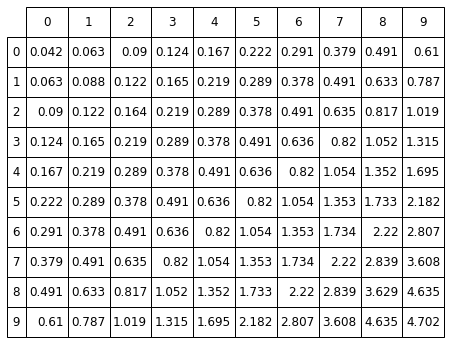

In [18]:
plot_table(Vs1_t.round(3))

## Question 3:

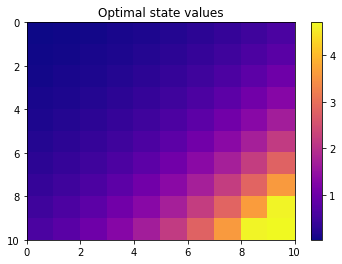

In [19]:
plot_heatmap(Vs1_t, 'Optimal state values')

## Question 4:

Higher optimal state values is on the right bottom corner and lower down as states farther away from the right bottom corner. Because reward function 1 is high on right bottom corner.

## Question 5:

In [146]:
policy1_t=policy1.reshape(10,10).T
policy1_t

array([[3., 0., 0., 0., 0., 0., 0., 3., 3., 3.],
       [3., 0., 0., 0., 0., 0., 3., 3., 3., 3.],
       [3., 3., 0., 0., 0., 3., 3., 3., 3., 3.],
       [3., 3., 3., 0., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 0., 0., 3., 3., 3., 3., 3.],
       [3., 3., 0., 0., 0., 0., 3., 3., 3., 3.],
       [3., 0., 0., 0., 0., 0., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [93]:
def replace_index_to_arrow(policy):
    #Original policy is in number. After replaced to arrow in the first time, policy become string
    policy= np.where(policy==0, '\u27a1', policy) #'\u27a1' is right arrow in Unicode
    policy= np.where(policy=='1.0', '\u2b05', policy) #'\u2b05' is left arrow in Unicode
    policy= np.where(policy=='2.0', '\u2b06', policy) #'\u2b06' is up arrow in Unicode
    policy= np.where(policy=='3.0', '\u2b07', policy) #'\u2b07' is down arrow in Unicode
    return policy

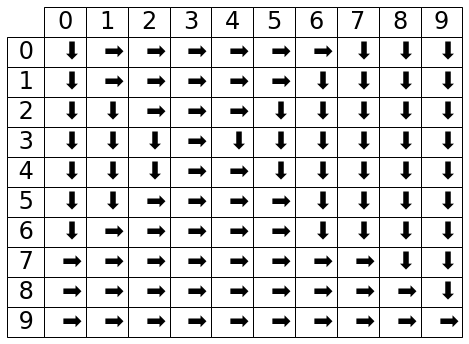

In [147]:
policy1_ta= replace_index_to_arrow(policy1_t)
plot_table(policy1_ta)

The optimal policy matches with intuition. The lower value states tend to move to higher value states. Since the right bottom corner has higher value states, the action agent takes goes to that direction too. 
It is possible for the agent to compute the optimal action to take at each state by observing the optimal values of its neighboring states. The action will be going towards the neighbor that has higher state value.

## Question 6:

In [73]:
Vs2,policy2= value_iteration(P, rf2.T.flatten())
print(Vs2)
print(policy2)

[ 6.48477467e-01  8.29851948e-01  1.06360962e+00  1.36025245e+00
  1.73657224e+00  2.21393346e+00  2.81942271e+00  3.58737839e+00
  4.56133071e+00  5.73000009e+00  7.94106515e-01  1.02123596e+00
  1.31651254e+00  1.69269877e+00  2.17160228e+00  2.78108417e+00
  3.55650359e+00  4.54273726e+00  5.79826417e+00  7.31963834e+00
  8.25237900e-01  1.06603296e+00  1.45007729e+00  1.94802285e+00
  2.58983267e+00  3.41709976e+00  4.48239466e+00  5.79613246e+00
  7.40076719e+00  9.39115943e+00  5.36245558e-01 -1.86790436e+00
 -1.62402502e+00 -1.23216899e+00 -7.25587435e-01 -2.75630965e-02
  3.02807215e+00  7.29198715e+00  9.44301852e+00  1.20482511e+01
 -2.37043156e+00 -6.73821942e+00 -6.74150886e+00 -6.32308479e+00
 -5.83072992e+00 -5.09866208e+00  2.48403304e+00  6.72234682e+00
  1.20117649e+01  1.54559191e+01 -4.23381678e+00 -8.67375446e+00
 -1.39111818e+01 -7.97760603e+00 -3.25362550e+00 -5.49015498e-01
  2.88409294e+00  7.24484943e+00  1.28927543e+01  1.98275379e+01
 -1.92052971e+00 -6.36979

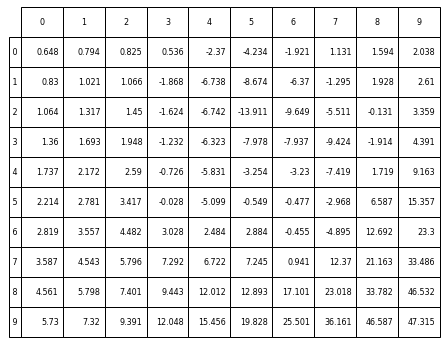

In [75]:
Vs2_t=Vs2.reshape(10,10).T
plot_table(Vs2_t.round(3))

## Question 7:

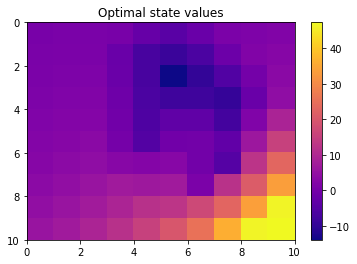

In [76]:
plot_heatmap(Vs2_t, 'Optimal state values')

## Question 8:

Right bottom corner has higher optimal state values and top middle section has lower values in "n" shape, which is similar to heatmap in reward function 2 has. Because reward function 2 is high on right bottom corner and gives penalties (negative values) in some section in the middle.

## Question 9:

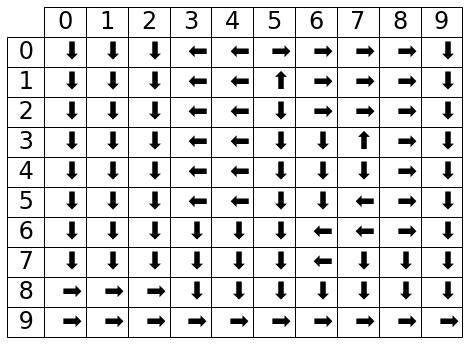

In [79]:
policy2_t=policy2.reshape(10,10).T
policy2_ta= replace_index_to_arrow(policy2_t)
plot_table(policy2_ta)

The optimal policy matches with intuition. The lower value states tend to move to higher value states. Since the right bottom corner has higher value states, the action agent takes goes to that direction too. And agent tends to avoid areas with lower values.
It is possible for the agent to compute the optimal action to take at each state by observing the optimal values of its neighboring states. The action will be going towards the neighbor that has higher state value.

## Question 10:

c=[I,
   -lambda,
   0]
x=[ti ui R]
D= [I  0  (Pa-Pa1)(I-rPa)^(-1),
    0  0  (Pa-Pa1)(I-rPa)^(-1),
    0 -I  I,
    0 -I  -I,
    0  0  I,
    0  0  -I]
b= [0
    0
    0
    0
    Rmax
    Rmax]

## Question 11:

In [20]:
from cvxopt import matrix,solvers

In [138]:
def irl(P, policy, Rmax, l1, n_states=100, n_actions=4, discount_factor=0.8):
    tran_prob=np.array(P)
    c= -np.hstack([np.ones(n_states), -l1*np.ones(n_states), np.zeros(n_states)])
    
    b = np.zeros((n_states*(n_actions-1)*2 + 2*n_states, 1))
    b_bounds = np.vstack([Rmax*np.ones((n_states, 1))]*2)
    b = np.vstack((b, b_bounds))
    
    def T(a, s):
        return np.dot(tran_prob[int(policy[s]), s] - tran_prob[a, s], 
                  np.linalg.inv(np.eye(n_states) - discount_factor*tran_prob[int(policy[s])]))
    A = set(range(n_actions)) 
    zero_stack1 = np.zeros((n_states*(n_actions-1), n_states))
    T_stack = np.vstack([-T(a, s)
            for s in range(n_states)
            for a in A - {policy[s]}
        ])
    I_stack1 = np.vstack([np.eye(1, n_states, s)
            for s in range(n_states)
            for a in A - {policy[s]}
        ])
    I_stack2 = np.eye(n_states)
    zero_stack2 = np.zeros((n_states, n_states))
    
    D_left = np.vstack([I_stack1, zero_stack1, zero_stack2, zero_stack2])
    D_middle = np.vstack([zero_stack1, zero_stack1, -I_stack2, -I_stack2])
    D_right = np.vstack([T_stack, T_stack, I_stack2, -I_stack2])

    D = np.hstack([D_left, D_middle, D_right])
    
    D_bounds = np.hstack([
            np.vstack([
                np.zeros((n_states, n_states)),
                np.zeros((n_states, n_states))]),
            np.vstack([
                np.zeros((n_states, n_states)),
                np.zeros((n_states, n_states))]),
            np.vstack([
                np.eye(n_states),
                -np.eye(n_states)])
            ])   
    D = np.vstack((D, D_bounds))
    
    solvers.options['show_progress'] = False
    sol=solvers.lp(matrix(c),matrix(D),matrix(b))
    R_irl=np.asarray(sol['x'][(2*n_states):])
    R_irl=R_irl.reshape((n_states,))
    return R_irl

In [58]:
n_states=100
L1=np.arange(0, 5, 5/500)
accuracy1=np.zeros(500)
i=0
for l in L1:
    R_irl1= irl(P, policy1, max(rf1.T.flatten()), l)
    Vs1_irl, policy1_irl = value_iteration(P, R_irl1)
    m=0   
    for s in range(n_states):
        if (policy1_irl[s]==policy1[s]):       
            m+=1
    
    accuracy1[i]=m/n_states
    i+=1
print(accuracy1)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1718e+01 -9.7712e+01  4e+02  7e-01  5e+00  1e+00
 2: -2.0865e+01 -7.6904e+01  3e+02  5e-01  3e+00  7e-01
 3: -3.1827e+01 -5.7294e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.7924e+01 -4.6846e+01  4e+01  7e-02  5e-01  1e-01
 5: -3.9853e+01 -4.4560e+01  2e+01  4e-02  3e-01  4e-02
 6: -4.1575e+01 -4.3461e+01  8e+00  2e-02  1e-01  1e-02
 7: -4.2584e+01 -4.3367e+01  3e+00  6e-03  4e-02  4e-03
 8: -4.2879e+01 -4.3293e+01  2e+00  3e-03  2e-02  2e-03
 9: -4.3037e+01 -4.3238e+01  9e-01  2e-03  1e-02  9e-04
10: -4.3164e+01 -4.3216e+01  2e-01  4e-04  3e-03  2e-04
11: -4.3171e+01 -4.3206e+01  2e-01  3e-04  2e-03  2e-04
12: -4.3179e+01 -4.3200e+01  9e-02  2e-04  1e-03  1e-04
13: -4.3181e+01 -4.3195e+01  7e-02  1e-04  8e-04  7e-05
14: -4.3185e+01 -4.3191e+01  3e-02  5e-05  3e-04  3e-05
15: -4.3185e+01 -4.3190e+01  3e-02  4e-05  3e-04  3e-05
16: -4.3186e+01 -4.3189e+01  2e-02  3e-05  2e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.4598e+00 -9.1590e+01  3e+02  7e-01  5e+00  1e+00
 2: -1.7536e+01 -7.1752e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.7346e+01 -5.3258e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.2615e+01 -4.3947e+01  5e+01  9e-02  6e-01  1e-01
 5: -3.5039e+01 -4.1561e+01  3e+01  5e-02  4e-01  7e-02
 6: -3.6720e+01 -3.9873e+01  1e+01  3e-02  2e-01  3e-02
 7: -3.7701e+01 -3.9195e+01  6e+00  1e-02  8e-02  1e-02
 8: -3.8161e+01 -3.9104e+01  4e+00  8e-03  5e-02  6e-03
 9: -3.8257e+01 -3.8979e+01  3e+00  6e-03  4e-02  4e-03
10: -3.8615e+01 -3.8943e+01  1e+00  3e-03  2e-02  2e-03
11: -3.8767e+01 -3.8930e+01  6e-01  1e-03  9e-03  8e-04
12: -3.8857e+01 -3.8913e+01  2e-01  4e-04  3e-03  3e-04
13: -3.8861e+01 -3.8909e+01  2e-01  4e-04  3e-03  2e-04
14: -3.8875e+01 -3.8903e+01  1e-01  2e-04  2e-03  1e-04
15: -3.8885e+01 -3.8900e+01  6e-02  1e-04  9e-04  7e-05
16: -3.8888e+01 -3.8899e+01  5e-02  9e-05  6e-04  

 5: -3.2005e+01 -3.8668e+01  3e+01  5e-02  4e-01  7e-02
 6: -3.3577e+01 -3.6813e+01  1e+01  3e-02  2e-01  3e-02
 7: -3.4539e+01 -3.5893e+01  5e+00  1e-02  7e-02  7e-03
 8: -3.5035e+01 -3.5818e+01  3e+00  6e-03  4e-02  4e-03
 9: -3.5336e+01 -3.5753e+01  2e+00  3e-03  2e-02  2e-03
10: -3.5479e+01 -3.5679e+01  8e-01  2e-03  1e-02  9e-04
11: -3.5509e+01 -3.5665e+01  6e-01  1e-03  9e-03  7e-04
12: -3.5537e+01 -3.5645e+01  4e-01  9e-04  6e-03  5e-04
13: -3.5557e+01 -3.5633e+01  3e-01  6e-04  4e-03  3e-04
14: -3.5576e+01 -3.5634e+01  2e-01  5e-04  3e-03  2e-04
15: -3.5593e+01 -3.5624e+01  1e-01  3e-04  2e-03  1e-04
16: -3.5596e+01 -3.5615e+01  9e-02  2e-04  1e-03  8e-05
17: -3.5596e+01 -3.5611e+01  7e-02  1e-04  8e-04  7e-05
18: -3.5597e+01 -3.5607e+01  5e-02  8e-05  5e-04  5e-05
19: -3.5597e+01 -3.5606e+01  4e-02  7e-05  5e-04  4e-05
20: -3.5598e+01 -3.5605e+01  3e-02  6e-05  4e-04  3e-05
21: -3.5598e+01 -3.5602e+01  2e-02  4e-05  2e-04  2e-05
22: -3.5598e+01 -3.5602e+01  2e-02  3e-05  2e-04

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.2171e+00 -8.1923e+01  3e+02  6e-01  4e+00  1e+00
 2: -1.2819e+01 -6.3657e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.0710e+01 -4.7489e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.5084e+01 -3.9318e+01  6e+01  1e-01  8e-01  2e-01
 5: -2.8757e+01 -3.4378e+01  2e+01  5e-02  3e-01  6e-02
 6: -3.0181e+01 -3.2785e+01  1e+01  2e-02  1e-01  2e-02
 7: -3.1100e+01 -3.2222e+01  4e+00  9e-03  6e-02  7e-03
 8: -3.1473e+01 -3.2024e+01  2e+00  4e-03  3e-02  3e-03
 9: -3.1665e+01 -3.1992e+01  1e+00  3e-03  2e-02  2e-03
10: -3.1666e+01 -3.1934e+01  1e+00  2e-03  1e-02  1e-03
11: -3.1794e+01 -3.1906e+01  5e-01  9e-04  6e-03  5e-04
12: -3.1793e+01 -3.1901e+01  4e-01  9e-04  6e-03  5e-04
13: -3.1797e+01 -3.1883e+01  4e-01  7e-04  5e-03  4e-04
14: -3.1797e+01 -3.1870e+01  3e-01  6e-04  4e-03  3e-04
15: -3.1803e+01 -3.1851e+01  2e-01  4e-04  3e-03  2e-04
16: -3.1808e+01 -3.1850e+01  2e-01  3e-04  2e-03  

 4: -2.1973e+01 -3.5843e+01  6e+01  1e-01  8e-01  2e-01
 5: -2.5241e+01 -3.0755e+01  2e+01  4e-02  3e-01  5e-02
 6: -2.6706e+01 -2.9302e+01  1e+01  2e-02  1e-01  2e-02
 7: -2.7543e+01 -2.8777e+01  5e+00  1e-02  7e-02  9e-03
 8: -2.7955e+01 -2.8436e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.7997e+01 -2.8359e+01  1e+00  3e-03  2e-02  2e-03
10: -2.8021e+01 -2.8327e+01  1e+00  2e-03  2e-02  2e-03
11: -2.8073e+01 -2.8259e+01  8e-01  1e-03  1e-02  9e-04
12: -2.8072e+01 -2.8258e+01  8e-01  1e-03  1e-02  9e-04
13: -2.8075e+01 -2.8237e+01  7e-01  1e-03  9e-03  8e-04
14: -2.8109e+01 -2.8185e+01  3e-01  6e-04  4e-03  4e-04
15: -2.8128e+01 -2.8169e+01  2e-01  3e-04  2e-03  2e-04
16: -2.8125e+01 -2.8165e+01  2e-01  3e-04  2e-03  2e-04
17: -2.8131e+01 -2.8158e+01  1e-01  2e-04  1e-03  1e-04
18: -2.8137e+01 -2.8143e+01  2e-02  4e-05  3e-04  2e-05
19: -2.8138e+01 -2.8139e+01  3e-03  6e-06  4e-05  3e-06
20: -2.8138e+01 -2.8138e+01  4e-04  7e-07  5e-06  4e-07
21: -2.8138e+01 -2.8138e+01  3e-05  5e-08  4e-07

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1: -3.5922e+00 -7.2820e+01  3e+02  6e-01  4e+00  1e+00
 2: -8.6898e+00 -5.5424e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.4559e+01 -4.0030e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.8713e+01 -3.1376e+01  5e+01  1e-01  7e-01  2e-01
 5: -2.1302e+01 -2.6610e+01  2e+01  4e-02  3e-01  4e-02
 6: -2.2526e+01 -2.5262e+01  1e+01  2e-02  1e-01  2e-02
 7: -2.3297e+01 -2.4486e+01  4e+00  1e-02  6e-02  8e-03
 8: -2.3627e+01 -2.4298e+01  3e+00  5e-03  4e-02  4e-03
 9: -2.3783e+01 -2.4153e+01  1e+00  3e-03  2e-02  2e-03
10: -2.3760e+01 -2.4107e+01  1e+00  3e-03  2e-02  2e-03
11: -2.3831e+01 -2.4046e+01  9e-01  2e-03  1e-02  9e-04
12: -2.3902e+01 -2.3994e+01  4e-01  7e-04  5e-03  4e-04
13: -2.3907e+01 -2.3984e+01  3e-01  6e-04  4e-03  3e-04
14: -2.3911e+01 -2.3968e+01  3e-01  5e-04  3e-03  3e-04
15: -2.3917e+01 -2.3966e+01  2e-01  4e-04  3e-03  2e-04
16: -2.3919e+01 -2.3942e+01  1e-01  2e-04  1e-03  

 9: -1.9740e+01 -2.0259e+01  2e+00  4e-03  3e-02  3e-03
10: -1.9783e+01 -2.0151e+01  1e+00  3e-03  2e-02  2e-03
11: -1.9890e+01 -2.0060e+01  7e-01  1e-03  9e-03  8e-04
12: -1.9893e+01 -2.0049e+01  6e-01  1e-03  8e-03  7e-04
13: -1.9929e+01 -1.9999e+01  3e-01  6e-04  4e-03  3e-04
14: -1.9952e+01 -1.9981e+01  1e-01  2e-04  2e-03  1e-04
15: -1.9959e+01 -1.9970e+01  5e-02  9e-05  6e-04  5e-05
16: -1.9961e+01 -1.9965e+01  1e-02  3e-05  2e-04  1e-05
17: -1.9962e+01 -1.9963e+01  3e-03  5e-06  3e-05  2e-06
18: -1.9962e+01 -1.9962e+01  3e-04  6e-07  4e-06  3e-07
19: -1.9962e+01 -1.9962e+01  7e-05  1e-07  9e-07  7e-08
20: -1.9962e+01 -1.9962e+01  7e-06  1e-08  9e-08  7e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.3727e+00 -6.7638e+01  2e+02  5e-01  3e+00  1e+00
 2: -6.6344e+00 -5.0577e+01  2e+02  4e-01  2e+00  7e-01
 3: -1.1357e+01 -3.4730e+01  9e+01  2e-01  1e+00  3e-01
 4: -1.5205e+01 -2.6162e+0

 4: -1.2901e+01 -2.1055e+01  3e+01  7e-02  4e-01  1e-01
 5: -1.3651e+01 -1.8703e+01  2e+01  4e-02  3e-01  4e-02
 6: -1.5038e+01 -1.6713e+01  6e+00  1e-02  9e-02  9e-03
 7: -1.5525e+01 -1.6297e+01  3e+00  6e-03  4e-02  4e-03
 8: -1.5517e+01 -1.6247e+01  3e+00  6e-03  4e-02  4e-03
 9: -1.5691e+01 -1.6038e+01  1e+00  3e-03  2e-02  2e-03
10: -1.5761e+01 -1.5938e+01  7e-01  1e-03  9e-03  7e-04
11: -1.5782e+01 -1.5912e+01  5e-01  1e-03  7e-03  5e-04
12: -1.5831e+01 -1.5859e+01  1e-01  2e-04  1e-03  1e-04
13: -1.5840e+01 -1.5844e+01  1e-02  3e-05  2e-04  1e-05
14: -1.5841e+01 -1.5842e+01  5e-03  1e-05  7e-05  5e-06
15: -1.5841e+01 -1.5842e+01  6e-04  1e-06  8e-06  6e-07
16: -1.5841e+01 -1.5841e+01  9e-05  2e-07  1e-06  9e-08
17: -1.5841e+01 -1.5841e+01  3e-06  6e-09  4e-08  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.4103e+00 -6.2753e+01  2e+02  5e-01  3e+00  1e+00
 2: -4.9012e+00 -4.5877e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1: -6.5172e-01 -5.9104e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.4340e+00 -4.1599e+01  1e+02  3e-01  2e+00  7e-01
 3: -5.3133e+00 -2.7788e+01  8e+01  2e-01  1e+00  3e-01
 4: -8.9765e+00 -1.7811e+01  3e+01  7e-02  4e-01  1e-01
 5: -1.0039e+01 -1.5415e+01  2e+01  4e-02  3e-01  7e-02
 6: -1.1014e+01 -1.2895e+01  6e+00  2e-02  9e-02  2e-02
 7: -1.1340e+01 -1.2424e+01  4e+00  9e-03  5e-02  1e-02
 8: -1.1535e+01 -1.2005e+01  2e+00  4e-03  2e-02  3e-03
 9: -1.1665e+01 -1.1826e+01  5e-01  1e-03  8e-03  1e-03
10: -1.1718e+01 -1.1757e+01  1e-01  3e-04  2e-03  1e-04
11: -1.1732e+01 -1.1742e+01  4e-02  8e-05  5e-04  4e-05
12: -1.1735e+01 -1.1737e+01  7e-03  2e-05  1e-04  7e-06
13: -1.1736e+01 -1.1736e+01  3e-03  6e-06  4e-05  3e-06
14: -1.1736e+01 -1.1736e+01  3e-04  8e-07  5e-06  3e-07
15: -1.1736e+01 -1.1736e+01  5e-05  1e-07  7e-07  5e-08
16: -1.1736e+01 -1.1736e+01  8e-07  2e-09  1e-08  

17: -8.5531e+00 -8.5531e+00  8e-06  2e-08  1e-07  8e-09
18: -8.5531e+00 -8.5531e+00  9e-08  2e-10  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  9.9507e-03 -5.8862e+01  2e+02  5e-01  3e+00  1e+00
 2: -2.0770e+00 -3.7809e+01  1e+02  3e-01  2e+00  6e-01
 3: -2.8548e+00 -2.3755e+01  7e+01  2e-01  1e+00  3e-01
 4: -5.6932e+00 -1.4493e+01  3e+01  7e-02  4e-01  1e-01
 5: -6.8762e+00 -1.0912e+01  1e+01  3e-02  2e-01  5e-02
 6: -7.3056e+00 -9.6206e+00  7e+00  2e-02  1e-01  2e-02
 7: -7.7910e+00 -8.7648e+00  3e+00  8e-03  5e-02  8e-03
 8: -7.9754e+00 -8.4272e+00  1e+00  4e-03  2e-02  3e-03
 9: -8.0728e+00 -8.2557e+00  6e-01  1e-03  9e-03  1e-03
10: -8.1123e+00 -8.1756e+00  2e-01  5e-04  3e-03  4e-04
11: -8.1281e+00 -8.1492e+00  7e-02  2e-04  1e-03  9e-05
12: -8.1344e+00 -8.1391e+00  1e-02  4e-05  2e-04  2e-05
13: -8.1357e+00 -8.1369e+00  4e-03  1e-05  6e-05  4e-06
14: -8.1360e+00 -8.1364e+0

11: -5.5041e+00 -5.5141e+00  3e-02  8e-05  5e-04  3e-05
12: -5.5064e+00 -5.5089e+00  8e-03  2e-05  1e-04  8e-06
13: -5.5069e+00 -5.5076e+00  2e-03  5e-06  3e-05  2e-06
14: -5.5071e+00 -5.5072e+00  5e-04  1e-06  7e-06  5e-07
15: -5.5071e+00 -5.5071e+00  9e-05  2e-07  1e-06  9e-08
16: -5.5071e+00 -5.5071e+00  1e-05  4e-08  2e-07  1e-08
17: -5.5071e+00 -5.5071e+00  5e-06  1e-08  8e-08  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  4.9107e-01 -5.8617e+01  2e+02  5e-01  3e+00  1e+00
 2: -9.7641e-01 -3.3561e+01  1e+02  3e-01  2e+00  6e-01
 3: -1.0586e+00 -1.8813e+01  6e+01  1e-01  8e-01  2e-01
 4: -3.5333e+00 -9.6441e+00  2e+01  5e-02  3e-01  7e-02
 5: -4.2956e+00 -7.0384e+00  8e+00  2e-02  1e-01  2e-02
 6: -4.8470e+00 -5.9208e+00  3e+00  9e-03  5e-02  7e-03
 7: -4.9997e+00 -5.5757e+00  2e+00  5e-03  3e-02  4e-03
 8: -5.1135e+00 -5.3303e+00  6e-01  2e-03  1e-02  1e-03
 9: -5.1394e+00 -5.2581e+0

 5: -2.7650e+00 -4.1998e+00  4e+00  1e-02  7e-02  9e-03
 6: -2.9643e+00 -3.7482e+00  2e+00  6e-03  4e-02  5e-03
 7: -3.0824e+00 -3.3881e+00  8e-01  2e-03  1e-02  1e-03
 8: -3.1403e+00 -3.2417e+00  3e-01  8e-04  5e-03  4e-04
 9: -3.1542e+00 -3.1963e+00  1e-01  3e-04  2e-03  1e-04
10: -3.1631e+00 -3.1696e+00  2e-02  5e-05  3e-04  2e-05
11: -3.1641e+00 -3.1663e+00  6e-03  2e-05  1e-04  6e-06
12: -3.1644e+00 -3.1651e+00  2e-03  5e-06  3e-05  2e-06
13: -3.1645e+00 -3.1647e+00  3e-04  1e-06  6e-06  3e-07
14: -3.1646e+00 -3.1646e+00  7e-05  2e-07  1e-06  7e-08
15: -3.1646e+00 -3.1646e+00  1e-05  4e-08  2e-07  1e-08
16: -3.1646e+00 -3.1646e+00  3e-06  9e-09  5e-08  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  8.4542e-01 -5.8334e+01  2e+02  5e-01  3e+00  1e+00
 2: -5.1483e-02 -2.9232e+01  9e+01  2e-01  1e+00  5e-01
 3:  5.2508e-02 -1.5452e+01  5e+01  1e-01  7e-01  2e-01
 4: -1.7553e+00 -6.1671e+0

13: -1.4779e+00 -1.4798e+00  5e-03  2e-05  8e-05  6e-06
14: -1.4782e+00 -1.4784e+00  8e-04  2e-06  1e-05  9e-07
15: -1.4782e+00 -1.4783e+00  3e-04  8e-07  4e-06  3e-07
16: -1.4782e+00 -1.4782e+00  8e-05  2e-07  1e-06  9e-08
17: -1.4782e+00 -1.4782e+00  2e-05  5e-08  3e-07  2e-08
18: -1.4782e+00 -1.4782e+00  3e-06  1e-08  5e-08  3e-09
19: -1.4782e+00 -1.4782e+00  3e-07  1e-09  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.0846e+00 -5.8034e+01  2e+02  5e-01  3e+00  1e+00
 2:  6.7226e-01 -2.8312e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.7481e-01 -1.0855e+01  3e+01  9e-02  5e-01  2e-01
 4: -5.5450e-01 -4.2717e+00  1e+01  3e-02  2e-01  5e-02
 5: -7.9629e-01 -3.4786e+00  7e+00  2e-02  1e-01  3e-02
 6: -9.7968e-01 -2.3818e+00  4e+00  1e-02  6e-02  1e-02
 7: -1.0840e+00 -1.7969e+00  2e+00  6e-03  3e-02  5e-03
 8: -1.1737e+00 -1.5012e+00  9e-01  3e-03  1e-02  2e-03
 9: -1.2104e+00 -1.3715e+0

 7:  2.1870e-01 -7.0129e-01  2e+00  7e-03  4e-02  4e-03
 8:  8.7453e-02 -2.8611e-01  9e-01  3e-03  2e-02  1e-03
 9:  5.6932e-02 -2.3913e-01  7e-01  2e-03  1e-02  8e-04
10:  2.6651e-02 -1.0832e-01  3e-01  1e-03  6e-03  3e-04
11:  1.4385e-02 -8.1512e-02  2e-01  8e-04  4e-03  2e-04
12: -5.5216e-03 -4.1466e-02  8e-02  3e-04  2e-03  8e-05
13: -1.7966e-02 -2.7740e-02  2e-02  8e-05  4e-04  2e-05
14: -1.9180e-02 -2.5848e-02  1e-02  5e-05  3e-04  1e-05
15: -1.8842e-02 -2.5056e-02  1e-02  5e-05  3e-04  1e-05
16: -1.9558e-02 -2.3404e-02  8e-03  3e-05  2e-04  8e-06
17: -1.9460e-02 -2.2714e-02  6e-03  3e-05  1e-04  7e-06
18: -2.0432e-02 -2.2825e-02  5e-03  2e-05  1e-04  5e-06
19: -2.0421e-02 -2.2169e-02  3e-03  1e-05  7e-05  3e-06
20: -2.0550e-02 -2.1209e-02  1e-03  5e-06  3e-05  1e-06
21: -2.0662e-02 -2.0921e-02  5e-04  2e-06  1e-05  5e-07
22: -2.0698e-02 -2.0744e-02  9e-05  4e-07  2e-06  9e-08
23: -2.0695e-02 -2.0727e-02  6e-05  3e-07  1e-06  6e-08
24: -2.0695e-02 -2.0701e-02  1e-05  5e-08  3e-07

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.4838e+00 -5.8923e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.7229e+00 -2.5711e+01  8e+01  2e-01  1e+00  5e-01
 3:  1.1264e+00 -5.1787e+00  2e+01  5e-02  3e-01  9e-02
 4:  1.1588e+00 -3.3038e+00  1e+01  4e-02  2e-01  6e-02
 5:  7.9492e-01 -1.0522e+00  4e+00  1e-02  7e-02  6e-03
 6:  1.0522e-01 -5.9135e-02  3e-01  1e-03  7e-03  3e-04
 7:  1.1716e-03 -7.5802e-04  3e-03  2e-05  8e-05  4e-06
 8:  1.1712e-05 -7.5778e-06  3e-05  2e-07  8e-07  4e-08
 9:  1.1712e-07 -7.5778e-08  3e-07  2e-09  8e-09  4e-10
10:  1.1712e-09 -7.5778e-10  3e-09  2e-11  8e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.5049e+00 -5.9040e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.7697e+00 -2.5516e+01  8e+01  2e-01  1e+00  5e-01
 3:  1.1941e+00 -5.0823e+00  2e+01  5e-02  3e-01  9e-02
 4:  1.1804e+00 -3.1378e+00 

 8:  7.7537e-08 -8.4328e-08  3e-07  1e-09  6e-09  7e-10
 9:  7.7537e-10 -8.4328e-10  3e-09  1e-11  6e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.7516e+00 -6.0138e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.3494e+00 -2.3420e+01  8e+01  2e-01  1e+00  4e-01
 3:  1.6937e+00 -3.9663e+00  1e+01  5e-02  2e-01  7e-02
 4:  6.6836e-01 -9.6703e-01  3e+00  1e-02  6e-02  8e-03
 5:  5.4197e-02 -5.5887e-02  2e-01  9e-04  4e-03  5e-04
 6:  5.5532e-04 -5.7349e-04  2e-03  9e-06  4e-05  5e-06
 7:  5.5527e-06 -5.7345e-06  2e-05  9e-08  4e-07  5e-08
 8:  5.5527e-08 -5.7345e-08  2e-07  9e-10  4e-09  5e-10
 9:  5.5527e-10 -5.7345e-10  2e-09  9e-12  4e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.7723e+00 -6.0204e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.3903e+00 -2.3223e+01  8e+01  2e-01  1e+00  4e-01
 3: 

 8:  5.1217e-09 -4.5973e-09  2e-08  8e-11  3e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.0579e+00 -6.0721e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.8376e+00 -2.0473e+01  7e+01  2e-01  8e-01  4e-01
 3:  1.8798e+00 -4.9763e+00  2e+01  6e-02  2e-01  9e-02
 4:  3.7048e-01 -3.2860e-01  1e+00  6e-03  2e-02  3e-03
 5:  4.7362e-03 -4.2204e-03  2e-02  7e-05  3e-04  3e-05
 6:  4.7342e-05 -4.2186e-05  2e-04  7e-07  3e-06  3e-07
 7:  4.7342e-07 -4.2186e-07  2e-06  7e-09  3e-08  3e-09
 8:  4.7342e-09 -4.2186e-09  2e-08  7e-11  3e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.0815e+00 -6.0735e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.8661e+00 -2.0252e+01  7e+01  2e-01  8e-01  4e-01
 3:  1.8798e+00 -4.9787e+00  2e+01  6e-02  2e-01  9e-02
 4:  3.5349e-01 -3.0890e-01  1e+00  5e-03  2e-02  3e-03
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4064e+00 -6.1368e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.1712e+00 -1.7106e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.7035e+00 -3.8958e+00  1e+01  5e-02  2e-01  7e-02
 4:  1.5429e-01 -1.3426e-01  6e-01  2e-03  1e-02  1e-03
 5:  1.5651e-03 -1.3760e-03  6e-03  2e-05  1e-04  1e-05
 6:  1.5649e-05 -1.3759e-05  6e-05  2e-07  1e-06  1e-07
 7:  1.5649e-07 -1.3759e-07  6e-07  2e-09  1e-08  1e-09
 8:  1.5649e-09 -1.3759e-09  6e-09  2e-11  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4316e+00 -6.1558e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.1904e+00 -1.6804e+01  6e+01  2e-01  7e-01  3e-01
 3:  1.6761e+00 -3.7498e+00  1e+01  4e-02  2e-01  7e-02
 4:  1.3982e-01 -1.2108e-01  5e-01  2e-03  9e-03  1e-03
 5:  1.4124e-03 -1.2343e-03  5e-03  2e-05  9e-05  1e-05
 6:  1.4123e-05 -1.2342e-05 

 5:  5.5111e-04 -5.9959e-04  2e-03  9e-06  4e-05  7e-06
 6:  5.5109e-06 -5.9957e-06  2e-05  9e-08  4e-07  7e-08
 7:  5.5109e-08 -5.9957e-08  2e-07  9e-10  4e-09  7e-10
 8:  5.5109e-10 -5.9957e-10  2e-09  9e-12  4e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.8129e+00 -6.3784e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.3720e+00 -1.5045e+01  5e+01  2e-01  6e-01  3e-01
 3:  1.3494e+00 -2.6512e+00  9e+00  3e-02  1e-01  5e-02
 4:  5.3945e-02 -5.9653e-02  2e-01  9e-04  4e-03  8e-04
 5:  5.3834e-04 -5.9592e-04  2e-03  9e-06  3e-05  8e-06
 6:  5.3832e-06 -5.9589e-06  2e-05  9e-08  3e-07  8e-08
 7:  5.3832e-08 -5.9589e-08  2e-07  9e-10  3e-09  8e-10
 8:  5.3832e-10 -5.9589e-10  2e-09  9e-12  4e-11  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  8e+00  1e+00
 1:  2.8421e+00 -6.3913e+01  3e+02  5e-01  2e+00  1e+00
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.2427e+00 -6.5275e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4778e+00 -1.5079e+01  5e+01  2e-01  5e-01  3e-01
 3:  1.1065e+00 -2.2464e+00  8e+00  3e-02  1e-01  4e-02
 4:  2.6559e-02 -3.5008e-02  1e-01  5e-04  2e-03  5e-04
 5:  2.6523e-04 -3.4967e-04  1e-03  5e-06  2e-05  5e-06
 6:  2.6522e-06 -3.4966e-06  1e-05  5e-08  2e-07  5e-08
 7:  2.6522e-08 -3.4966e-08  1e-07  5e-10  2e-09  5e-10
 8:  2.6522e-10 -3.4966e-10  1e-09  5e-12  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.2749e+00 -6.5356e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.4845e+00 -1.5016e+01  5e+01  2e-01  5e-01  3e-01
 3:  1.0853e+00 -2.1977e+00  8e+00  3e-02  1e-01  4e-02
 4:  2.4930e-02 -3.3326e-02  1e-01  5e-04  2e-03  5e-04
 5:  2.4898e-04 -3.3289e-04  1e-03  5e-06  2e-05  5e-06
 6:  2.4897e-06 -3.3288e-06 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.7442e+00 -6.6187e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5564e+00 -1.3450e+01  5e+01  1e-01  5e-01  3e-01
 3:  7.6303e-01 -1.4193e+00  5e+00  2e-02  6e-02  3e-02
 4:  1.0240e-02 -1.6641e-02  6e-02  2e-04  7e-04  3e-04
 5:  1.0234e-04 -1.6631e-04  6e-04  2e-06  7e-06  3e-06
 6:  1.0234e-06 -1.6631e-06  6e-06  2e-08  7e-08  3e-08
 7:  1.0234e-08 -1.6631e-08  6e-08  2e-10  7e-10  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.7788e+00 -6.6226e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5597e+00 -1.3296e+01  5e+01  1e-01  5e-01  3e-01
 3:  7.3844e-01 -1.3600e+00  5e+00  2e-02  6e-02  3e-02
 4:  9.6322e-03 -1.5780e-02  6e-02  2e-04  7e-04  3e-04
 5:  9.6269e-05 -1.5771e-04  6e-04  2e-06  7e-06  3e-06
 6:  9.6269e-07 -1.5771e-06  6e-06  2e-08  7e-08  3e-08
 7:  9.6269e-09 -1.5771e-08 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.3082e+00 -6.6516e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5830e+00 -1.1378e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.9113e-01 -8.6650e-01  3e+00  1e-02  3e-02  2e-02
 4:  5.2356e-03 -9.0907e-03  3e-02  1e-04  4e-04  2e-04
 5:  5.2341e-05 -9.0881e-05  3e-04  1e-06  4e-06  2e-06
 6:  5.2341e-07 -9.0881e-07  3e-06  1e-08  4e-08  2e-08
 7:  5.2341e-09 -9.0881e-09  3e-08  1e-10  4e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.3440e+00 -6.6518e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5846e+00 -1.1389e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.8560e-01 -8.5584e-01  3e+00  1e-02  3e-02  2e-02
 4:  5.1583e-03 -8.9563e-03  3e-02  1e-04  4e-04  2e-04
 5:  5.1569e-05 -8.9538e-05  3e-04  1e-06  4e-06  2e-06
 6:  5.1568e-07 -8.9538e-07  3e-06  1e-08  4e-08  2e-08
 7:  5.1568e-09 -8.9538e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.8830e+00 -6.6306e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6038e+00 -1.1548e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.6247e-01 -8.8463e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.8903e-03 -9.2220e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.8891e-05 -9.2197e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.8891e-07 -9.2197e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.8891e-09 -9.2197e-09  3e-08  1e-10  3e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.9188e+00 -6.6277e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6052e+00 -1.1580e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.6320e-01 -8.9256e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.9034e-03 -9.3118e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.9022e-05 -9.3095e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.9022e-07 -9.3095e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.9022e-09 -9.3095e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.4511e+00 -6.5664e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6206e+00 -1.1911e+01  5e+01  1e-01  4e-01  2e-01
 3:  4.3173e-01 -8.6205e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.5135e-03 -8.9266e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.5125e-05 -8.9248e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.5125e-07 -8.9247e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.5125e-09 -8.9247e-09  3e-08  1e-10  3e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.4860e+00 -6.5612e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6212e+00 -1.1924e+01  5e+01  1e-01  3e-01  2e-01
 3:  4.2813e-01 -8.5336e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.4682e-03 -8.8283e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.4672e-05 -8.8265e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.4672e-07 -8.8265e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.4672e-09 -8.8265e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.9983e+00 -6.4683e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6214e+00 -1.2028e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.6549e-01 -6.9470e-01  3e+00  9e-03  2e-02  1e-02
 4:  3.7619e-03 -7.1474e-03  3e-02  9e-05  2e-04  1e-04
 5:  3.7613e-05 -7.1462e-05  3e-04  9e-07  2e-06  1e-06
 6:  3.7613e-07 -7.1462e-07  3e-06  9e-09  2e-08  1e-08
 7:  3.7613e-09 -7.1462e-09  3e-08  9e-11  2e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.0316e+00 -6.4612e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6208e+00 -1.2029e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.6106e-01 -6.8337e-01  3e+00  8e-03  2e-02  1e-02
 4:  3.7124e-03 -7.0259e-03  3e-02  9e-05  2e-04  1e-04
 5:  3.7118e-05 -7.0248e-05  3e-04  9e-07  2e-06  1e-06
 6:  3.7118e-07 -7.0247e-07  3e-06  9e-09  2e-08  1e-08
 7:  3.7118e-09 -7.0247e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.5134e+00 -6.3448e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6034e+00 -1.1985e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.9642e-01 -5.2072e-01  2e+00  7e-03  2e-02  9e-03
 4:  2.9978e-03 -5.2809e-03  2e-02  7e-05  2e-04  9e-05
 5:  2.9974e-05 -5.2803e-05  2e-04  7e-07  2e-06  9e-07
 6:  2.9974e-07 -5.2803e-07  2e-06  7e-09  2e-08  9e-09
 7:  2.9974e-09 -5.2803e-09  2e-08  7e-11  2e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.5443e+00 -6.3364e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6017e+00 -1.1979e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.9233e-01 -5.1070e-01  2e+00  7e-03  2e-02  9e-03
 4:  2.9530e-03 -5.1736e-03  2e-02  7e-05  2e-04  9e-05
 5:  2.9526e-05 -5.1730e-05  2e-04  7e-07  2e-06  9e-07
 6:  2.9526e-07 -5.1730e-07  2e-06  7e-09  2e-08  9e-09
 7:  2.9526e-09 -5.1730e-09 

 5:  2.7168e-05 -4.9454e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.7168e-07 -4.9454e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.7168e-09 -4.9454e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.9877e+00 -6.2029e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5656e+00 -1.1839e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.6894e-01 -4.9127e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.7077e-03 -4.9535e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.7074e-05 -4.9530e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.7074e-07 -4.9530e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.7074e-09 -4.9530e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.0159e+00 -6.1935e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5625e+00 -1.1827e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.6800e-01 -4.9203e-01  2e+00  6e-03  1e-02  8e-03
 4: 

 4:  2.5470e-03 -4.9807e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.5467e-05 -4.9802e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.5467e-07 -4.9802e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.5467e-09 -4.9802e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.4165e+00 -6.0457e+01  3e+02  6e-01  1e+00  7e-01
 2:  3.5065e+00 -1.1623e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.5201e-01 -4.9474e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.5349e-03 -4.9768e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.5347e-05 -4.9763e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.5347e-07 -4.9763e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.5347e-09 -4.9763e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.4417e+00 -6.0355e+01  3e+02  6e-01  1e+00  7e-01
 2:  3.5021e+00 -1.1608e+01  5e+01  1e-01  3e-01  2e-01
 3: 

 5:  2.3414e-05 -4.8508e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.3414e-07 -4.8508e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.3414e-09 -4.8508e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.7962e+00 -5.8772e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4263e+00 -1.1363e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.3214e-01 -4.8283e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.3281e-03 -4.8390e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.3279e-05 -4.8386e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.3279e-07 -4.8386e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.3279e-09 -4.8386e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.8182e+00 -5.8664e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4206e+00 -1.1345e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.3083e-01 -4.8167e-01  2e+00  6e-03  1e-02  8e-03
 4: 

 4:  2.1240e-03 -4.6075e-03  2e-02  5e-05  1e-04  7e-05
 5:  2.1239e-05 -4.6072e-05  2e-04  5e-07  1e-06  7e-07
 6:  2.1239e-07 -4.6072e-07  2e-06  5e-09  1e-08  7e-09
 7:  2.1239e-09 -4.6072e-09  2e-08  5e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.1251e+00 -5.7007e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3257e+00 -1.1076e+01  5e+01  1e-01  2e-01  2e-01
 3:  2.1074e-01 -4.5872e-01  2e+00  5e-03  1e-02  7e-03
 4:  2.1103e-03 -4.5893e-03  2e-02  5e-05  1e-04  7e-05
 5:  2.1101e-05 -4.5890e-05  2e-04  5e-07  1e-06  7e-07
 6:  2.1101e-07 -4.5890e-07  2e-06  5e-09  1e-08  7e-09
 7:  2.1101e-09 -4.5890e-09  2e-08  5e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.1439e+00 -5.6895e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3187e+00 -1.1058e+01  5e+01  1e-01  2e-01  2e-01
 3: 

 5:  1.9033e-05 -4.2927e-05  2e-04  5e-07  1e-06  6e-07
 6:  1.9033e-07 -4.2927e-07  2e-06  5e-09  1e-08  6e-09
 7:  1.9033e-09 -4.2927e-09  2e-08  5e-11  1e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.4028e+00 -5.5186e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2057e+00 -1.0776e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.8883e-01 -4.2727e-01  2e+00  5e-03  1e-02  6e-03
 4:  1.8896e-03 -4.2719e-03  2e-02  5e-05  1e-04  6e-05
 5:  1.8895e-05 -4.2717e-05  2e-04  5e-07  1e-06  6e-07
 6:  1.8895e-07 -4.2717e-07  2e-06  5e-09  1e-08  6e-09
 7:  1.8895e-09 -4.2717e-09  2e-08  5e-11  1e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.4184e+00 -5.5071e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1975e+00 -1.0757e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.8746e-01 -4.2516e-01  2e+00  5e-03  1e-02  6e-03
 4: 

 5:  1.7007e-05 -3.9801e-05  2e-04  5e-07  9e-07  6e-07
 6:  1.7007e-07 -3.9801e-07  2e-06  5e-09  9e-09  6e-09
 7:  1.7007e-09 -3.9801e-09  2e-08  5e-11  9e-11  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6297e+00 -5.3330e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.0772e+00 -1.0547e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.6897e-01 -3.9663e-01  2e+00  5e-03  9e-03  6e-03
 4:  1.6900e-03 -3.9638e-03  2e-02  5e-05  9e-05  6e-05
 5:  1.6899e-05 -3.9636e-05  2e-04  5e-07  9e-07  6e-07
 6:  1.6899e-07 -3.9636e-07  2e-06  5e-09  9e-09  6e-09
 7:  1.6899e-09 -3.9636e-09  2e-08  5e-11  9e-11  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6423e+00 -5.3213e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.0694e+00 -1.0539e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.6789e-01 -3.9497e-01  2e+00  5e-03  8e-03  6e-03
 4: 

 5:  1.5280e-05 -3.7030e-05  2e-04  4e-07  8e-07  5e-07
 6:  1.5280e-07 -3.7030e-07  2e-06  4e-09  8e-09  5e-09
 7:  1.5280e-09 -3.7030e-09  2e-08  4e-11  8e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8072e+00 -5.1455e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.9476e+00 -1.0419e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.5179e-01 -3.6888e-01  2e+00  4e-03  8e-03  5e-03
 4:  1.5174e-03 -3.6851e-03  2e-02  4e-05  8e-05  5e-05
 5:  1.5173e-05 -3.6849e-05  2e-04  4e-07  8e-07  5e-07
 6:  1.5173e-07 -3.6849e-07  2e-06  4e-09  8e-09  5e-09
 7:  1.5173e-09 -3.6849e-09  2e-08  4e-11  8e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8167e+00 -5.1337e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.9391e+00 -1.0411e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.5072e-01 -3.6707e-01  2e+00  4e-03  7e-03  5e-03
 4: 

 5:  1.3594e-05 -3.4063e-05  2e-04  4e-07  7e-07  5e-07
 6:  1.3594e-07 -3.4063e-07  2e-06  4e-09  7e-09  5e-09
 7:  1.3594e-09 -3.4063e-09  2e-08  4e-11  7e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9369e+00 -4.9572e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.8058e+00 -1.0295e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.3501e-01 -3.3922e-01  2e+00  4e-03  7e-03  5e-03
 4:  1.3491e-03 -3.3876e-03  2e-02  4e-05  7e-05  5e-05
 5:  1.3490e-05 -3.3874e-05  2e-04  4e-07  7e-07  5e-07
 6:  1.3490e-07 -3.3874e-07  2e-06  4e-09  7e-09  5e-09
 7:  1.3490e-09 -3.3874e-09  2e-08  4e-11  7e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9435e+00 -4.9455e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.7966e+00 -1.0288e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.3399e-01 -3.3733e-01  2e+00  4e-03  7e-03  5e-03
 4: 

 5:  1.2066e-05 -3.1208e-05  1e-04  4e-07  6e-07  4e-07
 6:  1.2066e-07 -3.1208e-07  1e-06  4e-09  6e-09  4e-09
 7:  1.2066e-09 -3.1208e-09  1e-08  4e-11  6e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0425e+00 -4.8021e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.6704e+00 -1.0181e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.1992e-01 -3.1090e-01  1e+00  3e-03  6e-03  4e-03
 4:  1.1978e-03 -3.1040e-03  1e-02  3e-05  6e-05  4e-05
 5:  1.1978e-05 -3.1039e-05  1e-04  3e-07  6e-07  4e-07
 6:  1.1978e-07 -3.1039e-07  1e-06  3e-09  6e-09  4e-09
 7:  1.1978e-09 -3.1039e-09  1e-08  3e-11  6e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0485e+00 -4.7936e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.6622e+00 -1.0174e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.1904e-01 -3.0921e-01  1e+00  3e-03  6e-03  4e-03
 4: 

 5:  1.0725e-05 -2.8609e-05  1e-04  3e-07  5e-07  4e-07
 6:  1.0725e-07 -2.8609e-07  1e-06  3e-09  5e-09  4e-09
 7:  1.0725e-09 -2.8609e-09  1e-08  3e-11  5e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1188e+00 -4.6670e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.5327e+00 -1.0111e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.0660e-01 -2.8503e-01  1e+00  3e-03  5e-03  4e-03
 4:  1.0645e-03 -2.8453e-03  1e-02  3e-05  5e-05  4e-05
 5:  1.0645e-05 -2.8452e-05  1e-04  3e-07  5e-07  4e-07
 6:  1.0645e-07 -2.8452e-07  1e-06  3e-09  5e-09  4e-09
 7:  1.0645e-09 -2.8452e-09  1e-08  3e-11  5e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1222e+00 -4.6586e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.5236e+00 -1.0108e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.0580e-01 -2.8346e-01  1e+00  3e-03  5e-03  4e-03
 4: 

 4:  9.4922e-04 -2.6121e-03  1e-02  3e-05  4e-05  3e-05
 5:  9.4919e-06 -2.6120e-05  1e-04  3e-07  4e-07  3e-07
 6:  9.4919e-08 -2.6120e-07  1e-06  3e-09  4e-09  3e-09
 7:  9.4919e-10 -2.6120e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1541e+00 -4.5322e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.3806e+00 -1.0070e+01  5e+01  1e-01  2e-01  1e-01
 3:  9.4322e-02 -2.6016e-01  1e+00  3e-03  4e-03  3e-03
 4:  9.4182e-04 -2.5968e-03  1e-02  3e-05  4e-05  3e-05
 5:  9.4179e-06 -2.5967e-05  1e-04  3e-07  4e-07  3e-07
 6:  9.4179e-08 -2.5967e-07  1e-06  3e-09  4e-09  3e-09
 7:  9.4179e-10 -2.5967e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1550e+00 -4.5237e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.3707e+00 -1.0068e+01  5e+01  1e-01  2e-01  1e-01
 3: 

 4:  8.3510e-04 -2.3709e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.3508e-06 -2.3709e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.3508e-08 -2.3709e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.3508e-10 -2.3709e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1502e+00 -4.3979e+01  3e+02  4e-01  6e-01  5e-01
 2:  2.2144e+00 -1.0038e+01  5e+01  1e-01  1e-01  1e-01
 3:  8.2950e-02 -2.3604e-01  1e+00  3e-03  4e-03  3e-03
 4:  8.2828e-04 -2.3562e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.2826e-06 -2.3561e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.2826e-08 -2.3561e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.2826e-10 -2.3561e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1487e+00 -4.3896e+01  3e+02  4e-01  6e-01  5e-01
 2:  2.2035e+00 -1.0036e+01  5e+01  1e-01  1e-01  1e-01
 3: 

 5:  7.3020e-06 -2.1399e-05  1e-04  2e-07  3e-07  3e-07
 6:  7.3020e-08 -2.1399e-07  1e-06  2e-09  3e-09  3e-09
 7:  7.3020e-10 -2.1399e-09  1e-08  2e-11  3e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1090e+00 -4.2647e+01  2e+02  4e-01  6e-01  5e-01
 2:  2.0320e+00 -1.0015e+01  5e+01  1e-01  1e-01  1e-01
 3:  7.2493e-02 -2.1293e-01  1e+00  2e-03  3e-03  3e-03
 4:  7.2396e-04 -2.1259e-03  1e-02  2e-05  3e-05  3e-05
 5:  7.2394e-06 -2.1259e-05  1e-04  2e-07  3e-07  3e-07
 6:  7.2394e-08 -2.1259e-07  1e-06  2e-09  3e-09  3e-09
 7:  7.2394e-10 -2.1259e-09  1e-08  2e-11  3e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1052e+00 -4.2565e+01  2e+02  4e-01  6e-01  5e-01
 2:  2.0200e+00 -1.0014e+01  5e+01  1e-01  1e-01  1e-01
 3:  7.1869e-02 -2.1153e-01  1e+00  2e-03  3e-03  3e-03
 4: 

 4:  6.4724e-04 -1.9931e-03  1e-02  2e-05  3e-05  2e-05
 5:  6.4723e-06 -1.9931e-05  1e-04  2e-07  3e-07  2e-07
 6:  6.4723e-08 -1.9931e-07  1e-06  2e-09  3e-09  2e-09
 7:  6.4723e-10 -1.9931e-09  1e-08  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0324e+00 -4.1329e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.8307e+00 -9.9998e+00  5e+01  1e-01  1e-01  1e-01
 3:  6.4335e-02 -1.9892e-01  1e+00  2e-03  3e-03  2e-03
 4:  6.4256e-04 -1.9862e-03  1e-02  2e-05  3e-05  2e-05
 5:  6.4254e-06 -1.9862e-05  1e-04  2e-07  3e-07  2e-07
 6:  6.4254e-08 -1.9862e-07  1e-06  2e-09  3e-09  2e-09
 7:  6.4254e-10 -1.9862e-09  1e-08  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.0264e+00 -4.1247e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.8173e+00 -9.9992e+00  5e+01  1e-01  1e-01  1e-01
 3: 

 3:  5.7116e-02 -1.8722e-01  9e-01  2e-03  3e-03  2e-03
 4:  5.7049e-04 -1.8695e-03  9e-03  2e-05  3e-05  2e-05
 5:  5.7048e-06 -1.8695e-05  9e-05  2e-07  3e-07  2e-07
 6:  5.7048e-08 -1.8695e-07  9e-07  2e-09  3e-09  2e-09
 7:  5.7048e-10 -1.8695e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9223e+00 -4.0026e+01  2e+02  4e-01  5e-01  5e-01
 2:  1.6052e+00 -9.9917e+00  5e+01  9e-02  1e-01  1e-01
 3:  5.6629e-02 -1.8639e-01  9e-01  2e-03  3e-03  2e-03
 4:  5.6563e-04 -1.8613e-03  9e-03  2e-05  3e-05  2e-05
 5:  5.6562e-06 -1.8612e-05  9e-05  2e-07  3e-07  2e-07
 6:  5.6562e-08 -1.8612e-07  9e-07  2e-09  3e-09  2e-09
 7:  5.6562e-10 -1.8612e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9143e+00 -3.9945e+01  2e+02  4e-01  5e-01  5e-01
 2: 

In [64]:
def plot_accuracy(x, y):
    plt.plot(x, y)
    plt.xlabel('Lambda')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Lambda')
    plt.show()

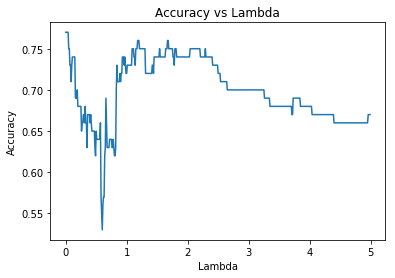

In [82]:
plot_accuracy(L1, accuracy1)

## Question 12:

In [98]:
max_index1=np.where(accuracy1==max(accuracy1))
l1_max1=L1[max_index1]
l1_max1

array([0.  , 0.01, 0.02, 0.03, 0.04])

## Question 13:

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7732e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1718e+01 -9.7712e+01  4e+02  7e-01  5e+00  1e+00
 2: -2.0865e+01 -7.6904e+01  3e+02  5e-01  3e+00  7e-01
 3: -3.1827e+01 -5.7294e+01  1e+02  2e-01  1e+00  3e-01
 4: -3.7924e+01 -4.6846e+01  4e+01  7e-02  5e-01  1e-01
 5: -3.9853e+01 -4.4560e+01  2e+01  4e-02  3e-01  4e-02
 6: -4.1575e+01 -4.3461e+01  8e+00  2e-02  1e-01  1e-02
 7: -4.2584e+01 -4.3367e+01  3e+00  6e-03  4e-02  4e-03
 8: -4.2879e+01 -4.3293e+01  2e+00  3e-03  2e-02  2e-03
 9: -4.3037e+01 -4.3238e+01  9e-01  2e-03  1e-02  9e-04
10: -4.3164e+01 -4.3216e+01  2e-01  4e-04  3e-03  2e-04
11: -4.3171e+01 -4.3206e+01  2e-01  3e-04  2e-03  2e-04
12: -4.3179e+01 -4.3200e+01  9e-02  2e-04  1e-03  1e-04
13: -4.3181e+01 -4.3195e+01  7e-02  1e-04  8e-04  7e-05
14: -4.3185e+01 -4.3191e+01  3e-02  5e-05  3e-04  3e-05
15: -4.3185e+01 -4.3190e+01  3e-02  4e-05  3e-04  3e-05
16: -4.3186e+01 -4.3189e+01  2e-02  3e-05  2e-04  

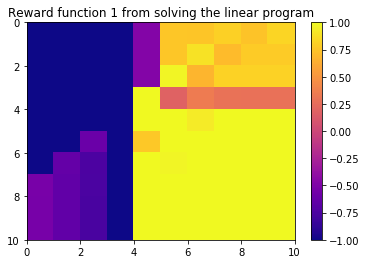

In [89]:
R_irl1_max= irl(P, policy1, max(rf1.T.flatten()), l1_max1[0])
print(R_irl1_max)
R_irl1_max_t= R_irl1_max.reshape(10,10).T
plot_heatmap(R_irl1_max_t, 'Reward function 1 from solving the linear program')

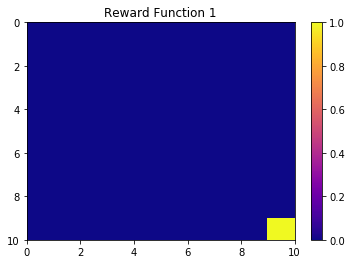

In [90]:
plot_heatmap(rf1, 'Reward Function 1')

## Question 14:

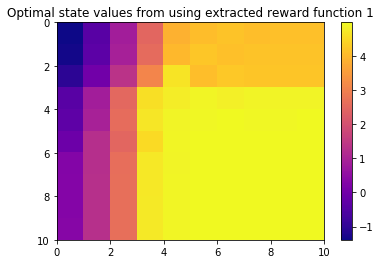

In [96]:
Vs1_irl_max, policy1_irl_max = value_iteration(P, R_irl1_max)
Vs1_irl_max_t=Vs1_irl_max.reshape(10,10).T
plot_heatmap(Vs1_irl_max_t, 'Optimal state values from using extracted reward function 1')

In [97]:
print(Vs1_irl_max)

[-1.39026151e+00 -1.33181277e+00 -1.05811354e+00 -4.02610357e-01
 -3.00177410e-01 -6.80955628e-02  3.00273382e-01  3.18756672e-01
  3.31789797e-01  3.32471165e-01 -4.07657959e-01 -3.39193243e-01
  4.92548858e-03  8.61525932e-01  9.71884456e-01  1.26544750e+00
  1.26303197e+00  1.28278149e+00  1.28336295e+00  1.28387581e+00
  8.65022145e-01  9.45386215e-01  1.37873741e+00  2.50521764e+00
  2.61394127e+00  2.48748116e+00  2.65153342e+00  2.66616118e+00
  2.67013964e+00  2.67069289e+00  2.48542945e+00  2.57935852e+00
  3.12616519e+00  4.60957179e+00  4.71213645e+00  4.53014948e+00
  4.72873141e+00  4.74871011e+00  4.75380109e+00  4.75429303e+00
  3.89621227e+00  4.00536108e+00  4.69036088e+00  4.80426056e+00
  4.90394054e+00  4.92551559e+00  4.91213051e+00  4.93336195e+00
  4.93940831e+00  4.93973942e+00  4.10046270e+00  4.22615491e+00
  4.12014934e+00  4.92952532e+00  4.96270217e+00  4.98628304e+00
  4.99470214e+00  4.99584723e+00  4.99664393e+00  4.99676236e+00
  4.19147454e+00  4.13932

## Question 15:

Similarities: Both has high value on right bottom corner and lower down as states farther away from the right bottom corner.

Differences: Heat map from Question 14 (extracted optimal values from inverse reinforcement learning) has larger high value area and the boundary line is a lot more blur.

## Question 16:

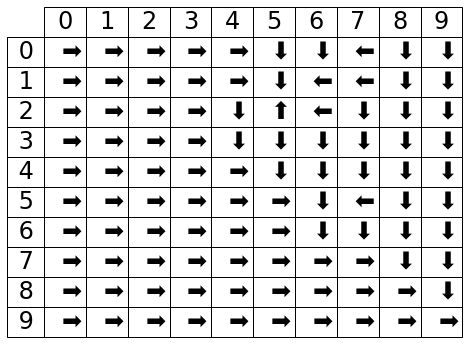

In [94]:
policy1_irl_max_t=policy1_irl_max.reshape(10,10).T
policy1_irl_max_ta= replace_index_to_arrow(policy1_irl_max_t)
plot_table(policy1_irl_max_ta)

## Question 17:

Similarities: In both optimal policy, agent move towards right bottom corner, which has higher state value than other areas. 

Differences: Optimal policy from Question 16 (extracted optimal policy from inverse reinforcement learning) takes more steps to move to the very right bottom corner. Because there is a larger high vaue area, agent tend to stay in that area longer and eventually move to the highest value grid. The boundary line is a lot more blur in Question 16.

## Question 18:

In [80]:
n_states=100
L1=np.arange(0, 5, 5/500)
accuracy2=np.zeros(500)
i=0
for l in L1:
    R_irl2= irl(P, policy2, max(rf2.T.flatten()), l)
    Vs2_irl, policy2_irl = value_iteration(P, R_irl2)
    m=0   
    for s in range(n_states):
        if (policy2_irl[s]==policy2[s]):       
            m+=1
    
    accuracy2[i]=m/n_states
    i+=1
print(accuracy2)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  3.2585e+00 -1.1221e+03  2e+03  9e-02  8e+00  8e-01
 2: -3.4423e+01 -6.8431e+02  1e+03  5e-02  5e+00  7e-01
 3: -1.3348e+02 -4.7421e+02  8e+02  3e-02  2e+00  6e-01
 4: -2.6412e+02 -5.5468e+02  9e+02  2e-02  2e+00  6e-01
 5: -3.3301e+02 -5.6734e+02  9e+02  2e-02  2e+00  6e-01
 6: -4.3662e+02 -5.6416e+02  6e+02  1e-02  9e-01  4e-01
 7: -4.5898e+02 -5.4369e+02  4e+02  7e-03  6e-01  3e-01
 8: -5.0518e+02 -5.4344e+02  2e+02  3e-03  3e-01  2e-01
 9: -5.2242e+02 -5.4582e+02  1e+02  2e-03  2e-01  1e-01
10: -5.3535e+02 -5.4714e+02  6e+01  9e-04  8e-02  6e-02
11: -5.4424e+02 -5.4961e+02  3e+01  4e-04  4e-02  3e-02
12: -5.5033e+02 -5.5154e+02  6e+00  1e-04  9e-03  6e-03
13: -5.5066e+02 -5.5159e+02  5e+00  8e-05  7e-03  5e-03
14: -5.5129e+02 -5.5174e+02  2e+00  4e-05  3e-03  2e-03
15: -5.5182e+02 -5.5188e+02  3e-01  5e-06  4e-04  3e-04
16: -5.5188e+02 -5.5190e+02  8e-02  1e-06  1e-04  

13: -5.0039e+02 -5.0206e+02  7e+00  1e-04  1e-02  7e-03
14: -5.0109e+02 -5.0227e+02  5e+00  9e-05  8e-03  5e-03
15: -5.0247e+02 -5.0275e+02  1e+00  2e-05  2e-03  1e-03
16: -5.0280e+02 -5.0286e+02  2e-01  5e-06  4e-04  2e-04
17: -5.0287e+02 -5.0288e+02  5e-02  9e-07  8e-05  5e-05
18: -5.0288e+02 -5.0288e+02  7e-03  1e-07  1e-05  7e-06
19: -5.0288e+02 -5.0288e+02  2e-04  3e-09  3e-07  2e-07
20: -5.0288e+02 -5.0288e+02  2e-06  3e-11  3e-09  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  9.7337e+00 -1.0915e+03  2e+03  9e-02  8e+00  8e-01
 2: -2.1860e+01 -6.5417e+02  1e+03  5e-02  5e+00  7e-01
 3: -1.0568e+02 -4.2620e+02  7e+02  3e-02  2e+00  5e-01
 4: -2.3676e+02 -5.0151e+02  8e+02  2e-02  2e+00  6e-01
 5: -3.0316e+02 -5.0262e+02  7e+02  2e-02  1e+00  5e-01
 6: -3.9234e+02 -5.0413e+02  4e+02  9e-03  8e-01  3e-01
 7: -4.0538e+02 -4.8571e+02  3e+02  6e-03  6e-01  3e-01
 8: -4.6205e+02 -4.8888e+0

 9: -4.3075e+02 -4.4845e+02  7e+01  1e-03  1e-01  6e-02
10: -4.4040e+02 -4.4923e+02  4e+01  7e-04  6e-02  3e-02
11: -4.4512e+02 -4.4979e+02  2e+01  4e-04  3e-02  2e-02
12: -4.4816e+02 -4.5050e+02  1e+01  2e-04  2e-02  9e-03
13: -4.4950e+02 -4.5067e+02  5e+00  9e-05  8e-03  5e-03
14: -4.5050e+02 -4.5104e+02  2e+00  4e-05  4e-03  2e-03
15: -4.5102e+02 -4.5120e+02  7e-01  1e-05  1e-03  7e-04
16: -4.5115e+02 -4.5124e+02  4e-01  7e-06  6e-04  4e-04
17: -4.5126e+02 -4.5128e+02  6e-02  1e-06  1e-04  6e-05
18: -4.5128e+02 -4.5128e+02  5e-03  9e-08  8e-06  5e-06
19: -4.5128e+02 -4.5128e+02  5e-05  1e-09  9e-08  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  1.5734e+01 -1.0616e+03  2e+03  9e-02  8e+00  7e-01
 2: -1.0692e+01 -6.3222e+02  1e+03  5e-02  4e+00  6e-01
 3: -8.1733e+01 -3.8380e+02  6e+02  2e-02  2e+00  5e-01
 4: -1.7849e+02 -4.4334e+02  7e+02  2e-02  2e+00  5e-01
 5: -2.5409e+02 -4.5352e+0

10: -3.9564e+02 -4.0241e+02  3e+01  5e-04  5e-02  2e-02
11: -3.9868e+02 -4.0267e+02  2e+01  3e-04  3e-02  1e-02
12: -4.0117e+02 -4.0289e+02  7e+00  1e-04  1e-02  7e-03
13: -4.0288e+02 -4.0335e+02  2e+00  4e-05  3e-03  2e-03
14: -4.0307e+02 -4.0340e+02  1e+00  3e-05  2e-03  1e-03
15: -4.0341e+02 -4.0348e+02  3e-01  6e-06  5e-04  3e-04
16: -4.0349e+02 -4.0350e+02  3e-02  6e-07  6e-05  3e-05
17: -4.0350e+02 -4.0351e+02  4e-03  8e-08  7e-06  4e-06
18: -4.0351e+02 -4.0351e+02  4e-05  9e-10  8e-08  4e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  2.1303e+01 -1.0325e+03  2e+03  8e-02  7e+00  7e-01
 2: -1.0858e+00 -6.1066e+02  1e+03  5e-02  4e+00  6e-01
 3: -6.2957e+01 -3.4442e+02  6e+02  2e-02  2e+00  4e-01
 4: -1.4501e+02 -3.9810e+02  7e+02  2e-02  2e+00  5e-01
 5: -2.1292e+02 -4.1257e+02  6e+02  2e-02  1e+00  5e-01
 6: -2.7473e+02 -4.0733e+02  5e+02  1e-02  9e-01  3e-01
 7: -3.0409e+02 -4.0295e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  2.6251e+01 -1.0197e+03  2e+03  8e-02  7e+00  7e-01
 2:  7.6757e+00 -5.9881e+02  1e+03  5e-02  4e+00  6e-01
 3: -4.5806e+01 -3.0998e+02  5e+02  2e-02  2e+00  4e-01
 4: -1.1804e+02 -3.5858e+02  6e+02  2e-02  2e+00  5e-01
 5: -1.7360e+02 -3.7349e+02  6e+02  2e-02  1e+00  5e-01
 6: -2.2923e+02 -3.6544e+02  5e+02  1e-02  9e-01  3e-01
 7: -2.7925e+02 -3.5918e+02  3e+02  6e-03  6e-01  2e-01
 8: -3.0130e+02 -3.4877e+02  2e+02  4e-03  3e-01  2e-01
 9: -3.3241e+02 -3.5106e+02  7e+01  1e-03  1e-01  6e-02
10: -3.4495e+02 -3.5142e+02  3e+01  5e-04  4e-02  2e-02
11: -3.4946e+02 -3.5197e+02  1e+01  2e-04  2e-02  9e-03
12: -3.5187e+02 -3.5243e+02  2e+00  5e-05  4e-03  2e-03
13: -3.5201e+02 -3.5245e+02  2e+00  3e-05  3e-03  2e-03
14: -3.5242e+02 -3.5254e+02  5e-01  9e-06  8e-04  4e-04
15: -3.5254e+02 -3.5256e+02  9e-02  2e-06  2e-04  9e-05
16: -3.5256e+02 -3.5256e+02  3e-02  5e-07  4e-05  

 9: -2.8240e+02 -3.0929e+02  1e+02  2e-03  2e-01  8e-02
10: -2.9728e+02 -3.0930e+02  5e+01  1e-03  8e-02  4e-02
11: -3.0658e+02 -3.0921e+02  1e+01  2e-04  2e-02  1e-02
12: -3.0849e+02 -3.0946e+02  4e+00  8e-05  7e-03  4e-03
13: -3.0911e+02 -3.0958e+02  2e+00  4e-05  3e-03  2e-03
14: -3.0961e+02 -3.0968e+02  3e-01  6e-06  5e-04  3e-04
15: -3.0968e+02 -3.0969e+02  6e-02  1e-06  1e-04  6e-05
16: -3.0970e+02 -3.0970e+02  4e-03  9e-08  8e-06  4e-06
17: -3.0970e+02 -3.0970e+02  1e-04  3e-09  2e-07  1e-07
18: -3.0970e+02 -3.0970e+02  1e-06  3e-11  2e-09  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  3.1219e+01 -1.0150e+03  2e+03  8e-02  7e+00  7e-01
 2:  1.6369e+01 -5.9178e+02  1e+03  5e-02  4e+00  6e-01
 3: -2.9234e+01 -2.7813e+02  4e+02  2e-02  2e+00  3e-01
 4: -9.4014e+01 -3.1780e+02  5e+02  2e-02  2e+00  4e-01
 5: -1.3455e+02 -3.2958e+02  6e+02  2e-02  1e+00  4e-01
 6: -1.7738e+02 -3.2331e+0

15: -2.6752e+02 -2.6754e+02  7e-02  1e-06  1e-04  7e-05
16: -2.6753e+02 -2.6754e+02  4e-02  8e-07  7e-05  4e-05
17: -2.6754e+02 -2.6754e+02  3e-03  6e-08  5e-06  3e-06
18: -2.6755e+02 -2.6755e+02  3e-05  7e-10  5e-08  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  3.5132e+01 -1.0106e+03  2e+03  8e-02  7e+00  7e-01
 2:  2.2840e+01 -5.8571e+02  1e+03  5e-02  4e+00  6e-01
 3: -1.7466e+01 -2.5783e+02  4e+02  2e-02  2e+00  3e-01
 4: -7.7842e+01 -2.8214e+02  5e+02  2e-02  1e+00  4e-01
 5: -1.0664e+02 -2.9021e+02  5e+02  1e-02  1e+00  4e-01
 6: -1.5558e+02 -2.8391e+02  4e+02  1e-02  8e-01  3e-01
 7: -1.8546e+02 -2.6896e+02  3e+02  7e-03  6e-01  2e-01
 8: -2.0827e+02 -2.6439e+02  2e+02  5e-03  4e-01  2e-01
 9: -2.3861e+02 -2.5930e+02  8e+01  2e-03  1e-01  7e-02
10: -2.5202e+02 -2.6027e+02  3e+01  7e-04  5e-02  3e-02
11: -2.5867e+02 -2.6124e+02  1e+01  2e-04  2e-02  9e-03
12: -2.6047e+02 -2.6150e+0

 4: -6.5308e+01 -2.4269e+02  4e+02  1e-02  1e+00  3e-01
 5: -8.4620e+01 -2.4775e+02  4e+02  1e-02  1e+00  3e-01
 6: -1.2738e+02 -2.4504e+02  4e+02  9e-03  8e-01  3e-01
 7: -1.4691e+02 -2.2795e+02  3e+02  6e-03  5e-01  2e-01
 8: -1.7796e+02 -2.2577e+02  2e+02  4e-03  3e-01  1e-01
 9: -1.9375e+02 -2.2117e+02  1e+02  2e-03  2e-01  8e-02
10: -2.1035e+02 -2.2147e+02  4e+01  9e-04  7e-02  4e-02
11: -2.1708e+02 -2.2200e+02  2e+01  4e-04  3e-02  2e-02
12: -2.2021e+02 -2.2218e+02  7e+00  2e-04  1e-02  7e-03
13: -2.2181e+02 -2.2236e+02  2e+00  4e-05  4e-03  2e-03
14: -2.2225e+02 -2.2240e+02  6e-01  1e-05  1e-03  6e-04
15: -2.2238e+02 -2.2242e+02  1e-01  3e-06  2e-04  1e-04
16: -2.2242e+02 -2.2242e+02  9e-03  2e-07  2e-05  9e-06
17: -2.2242e+02 -2.2242e+02  1e-04  2e-09  2e-07  9e-08
18: -2.2242e+02 -2.2242e+02  1e-06  2e-11  2e-09  9e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  3.9118e+01 -1.0078e+0

 9: -1.5134e+02 -1.8454e+02  1e+02  3e-03  2e-01  1e-01
10: -1.7270e+02 -1.8493e+02  4e+01  1e-03  8e-02  4e-02
11: -1.7996e+02 -1.8454e+02  2e+01  4e-04  3e-02  2e-02
12: -1.8368e+02 -1.8507e+02  5e+00  1e-04  9e-03  5e-03
13: -1.8476e+02 -1.8521e+02  2e+00  4e-05  3e-03  2e-03
14: -1.8508e+02 -1.8525e+02  6e-01  1e-05  1e-03  6e-04
15: -1.8525e+02 -1.8527e+02  9e-02  2e-06  2e-04  9e-05
16: -1.8527e+02 -1.8527e+02  1e-02  3e-07  2e-05  1e-05
17: -1.8527e+02 -1.8527e+02  2e-04  4e-09  3e-07  2e-07
18: -1.8527e+02 -1.8527e+02  2e-06  4e-11  3e-09  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  4.2248e+01 -1.0056e+03  2e+03  8e-02  7e+00  7e-01
 2:  3.4036e+01 -5.7560e+02  9e+02  5e-02  4e+00  6e-01
 3:  1.6060e+00 -2.3587e+02  4e+02  2e-02  1e+00  3e-01
 4: -3.3307e+01 -2.0310e+02  4e+02  1e-02  1e+00  3e-01
 5: -7.1339e+01 -2.0491e+02  3e+02  1e-02  8e-01  3e-01
 6: -9.5028e+01 -2.1028e+0

 9: -1.0904e+02 -1.5105e+02  1e+02  3e-03  3e-01  1e-01
10: -1.2704e+02 -1.5057e+02  8e+01  2e-03  1e-01  7e-02
11: -1.3125e+02 -1.4963e+02  6e+01  1e-03  1e-01  6e-02
12: -1.4497e+02 -1.4984e+02  2e+01  4e-04  3e-02  2e-02
13: -1.4834e+02 -1.5027e+02  7e+00  2e-04  1e-02  6e-03
14: -1.4972e+02 -1.5045e+02  3e+00  6e-05  4e-03  2e-03
15: -1.5010e+02 -1.5049e+02  1e+00  3e-05  2e-03  1e-03
16: -1.5042e+02 -1.5052e+02  4e-01  8e-06  6e-04  4e-04
17: -1.5046e+02 -1.5053e+02  2e-01  6e-06  4e-04  2e-04
18: -1.5051e+02 -1.5053e+02  7e-02  2e-06  1e-04  7e-05
19: -1.5053e+02 -1.5054e+02  2e-02  4e-07  3e-05  2e-05
20: -1.5054e+02 -1.5054e+02  9e-04  2e-08  1e-06  9e-07
21: -1.5054e+02 -1.5054e+02  1e-05  2e-10  2e-08  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  4.5081e+01 -1.0038e+03  2e+03  8e-02  6e+00  7e-01
 2:  3.8274e+01 -5.7118e+02  9e+02  5e-02  4e+00  6e-01
 3:  8.0583e+00 -2.3092e+0

 8: -7.4391e+01 -1.2904e+02  2e+02  4e-03  3e-01  1e-01
 9: -9.2149e+01 -1.2250e+02  1e+02  2e-03  2e-01  8e-02
10: -1.0719e+02 -1.2063e+02  5e+01  1e-03  8e-02  4e-02
11: -1.1383e+02 -1.2102e+02  2e+01  6e-04  4e-02  2e-02
12: -1.1581e+02 -1.2091e+02  2e+01  4e-04  3e-02  2e-02
13: -1.1950e+02 -1.2128e+02  6e+00  1e-04  1e-02  6e-03
14: -1.2060e+02 -1.2132e+02  2e+00  6e-05  4e-03  2e-03
15: -1.2105e+02 -1.2135e+02  1e+00  2e-05  2e-03  1e-03
16: -1.2125e+02 -1.2138e+02  4e-01  1e-05  7e-04  4e-04
17: -1.2134e+02 -1.2138e+02  1e-01  3e-06  2e-04  1e-04
18: -1.2136e+02 -1.2138e+02  8e-02  2e-06  1e-04  8e-05
19: -1.2137e+02 -1.2138e+02  5e-02  1e-06  9e-05  5e-05
20: -1.2138e+02 -1.2139e+02  8e-03  2e-07  1e-05  8e-06
21: -1.2138e+02 -1.2139e+02  4e-03  1e-07  7e-06  4e-06
22: -1.2139e+02 -1.2139e+02  6e-04  1e-08  1e-06  6e-07
23: -1.2139e+02 -1.2139e+02  1e-04  3e-09  2e-07  1e-07
24: -1.2139e+02 -1.2139e+02  2e-06  6e-11  4e-09  2e-09
Optimal solution found.
     pcost       dcost  

18: -9.4304e+01 -9.4305e+01  2e-03  5e-08  4e-06  2e-06
19: -9.4305e+01 -9.4305e+01  2e-04  4e-09  3e-07  2e-07
20: -9.4305e+01 -9.4305e+01  2e-05  5e-10  3e-08  2e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  4.9325e+01 -1.0011e+03  2e+03  8e-02  6e+00  7e-01
 2:  4.4498e+01 -5.6448e+02  9e+02  5e-02  3e+00  6e-01
 3:  1.6249e+01 -2.1819e+02  4e+02  2e-02  1e+00  2e-01
 4:  3.8399e+00 -1.4689e+02  3e+02  1e-02  9e-01  2e-01
 5: -2.1798e+01 -1.0841e+02  2e+02  7e-03  5e-01  1e-01
 6: -3.8977e+01 -1.1170e+02  2e+02  6e-03  4e-01  1e-01
 7: -4.7392e+01 -1.0927e+02  2e+02  5e-03  4e-01  1e-01
 8: -5.7797e+01 -1.0405e+02  1e+02  4e-03  3e-01  1e-01
 9: -7.0126e+01 -9.6090e+01  8e+01  2e-03  1e-01  6e-02
10: -7.9569e+01 -9.2423e+01  4e+01  1e-03  7e-02  3e-02
11: -8.6084e+01 -9.0796e+01  1e+01  4e-04  3e-02  1e-02
12: -8.9012e+01 -9.0471e+01  5e+00  1e-04  8e-03  4e-03
13: -8.9855e+01 -9.0242e+0

12: -6.1685e+01 -6.7813e+01  2e+01  5e-04  3e-02  2e-02
13: -6.5382e+01 -6.6811e+01  4e+00  1e-04  8e-03  4e-03
14: -6.6101e+01 -6.6646e+01  2e+00  4e-05  3e-03  2e-03
15: -6.6318e+01 -6.6605e+01  9e-01  2e-05  2e-03  9e-04
16: -6.6529e+01 -6.6580e+01  2e-01  4e-06  3e-04  2e-04
17: -6.6555e+01 -6.6577e+01  7e-02  2e-06  1e-04  7e-05
18: -6.6562e+01 -6.6577e+01  4e-02  1e-06  8e-05  4e-05
19: -6.6572e+01 -6.6576e+01  1e-02  4e-07  3e-05  1e-05
20: -6.6576e+01 -6.6576e+01  6e-04  2e-08  1e-06  6e-07
21: -6.6576e+01 -6.6576e+01  6e-06  2e-10  1e-08  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  2e+01  1e+00
 1:  5.1486e+01 -9.9991e+02  2e+03  8e-02  6e+00  7e-01
 2:  4.8338e+01 -5.6594e+02  9e+02  5e-02  3e+00  6e-01
 3:  2.0281e+01 -2.0962e+02  3e+02  2e-02  1e+00  2e-01
 4:  8.4197e+00 -1.2112e+02  2e+02  1e-02  7e-01  2e-01
 5: -6.8697e+00 -8.5562e+01  1e+02  6e-03  4e-01  1e-01
 6: -2.1607e+01 -8.8146e+0

 5:  1.8297e+00 -6.8276e+01  1e+02  6e-03  4e-01  1e-01
 6: -1.1432e+01 -6.1882e+01  1e+02  4e-03  3e-01  1e-01
 7: -1.3255e+01 -5.7314e+01  1e+02  4e-03  2e-01  9e-02
 8: -1.7555e+01 -5.3653e+01  9e+01  3e-03  2e-01  8e-02
 9: -2.3536e+01 -4.7475e+01  7e+01  2e-03  1e-01  6e-02
10: -3.0370e+01 -4.4904e+01  4e+01  1e-03  8e-02  4e-02
11: -3.7252e+01 -4.2759e+01  2e+01  4e-04  3e-02  1e-02
12: -4.0295e+01 -4.2115e+01  5e+00  1e-04  1e-02  5e-03
13: -4.1204e+01 -4.1844e+01  2e+00  5e-05  3e-03  2e-03
14: -4.1378e+01 -4.1820e+01  1e+00  4e-05  2e-03  1e-03
15: -4.1678e+01 -4.1773e+01  3e-01  8e-06  5e-04  3e-04
16: -4.1729e+01 -4.1763e+01  1e-01  3e-06  2e-04  9e-05
17: -4.1754e+01 -4.1758e+01  1e-02  3e-07  2e-05  1e-05
18: -4.1757e+01 -4.1757e+01  2e-03  4e-08  3e-06  1e-06
19: -4.1757e+01 -4.1757e+01  3e-04  9e-09  6e-07  3e-07
20: -4.1757e+01 -4.1757e+01  3e-05  9e-10  6e-08  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+0

13: -2.2505e+01 -2.3835e+01  4e+00  1e-04  7e-03  3e-03
14: -2.3190e+01 -2.3603e+01  1e+00  3e-05  2e-03  1e-03
15: -2.3307e+01 -2.3565e+01  7e-01  2e-05  1e-03  7e-04
16: -2.3454e+01 -2.3523e+01  2e-01  6e-06  4e-04  2e-04
17: -2.3459e+01 -2.3521e+01  2e-01  5e-06  3e-04  2e-04
18: -2.3496e+01 -2.3510e+01  4e-02  1e-06  7e-05  4e-05
19: -2.3505e+01 -2.3507e+01  6e-03  2e-07  1e-05  6e-06
20: -2.3506e+01 -2.3506e+01  1e-03  3e-08  2e-06  1e-06
21: -2.3506e+01 -2.3506e+01  1e-05  4e-10  3e-08  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  5.4972e+01 -9.9808e+02  2e+03  8e-02  5e+00  7e-01
 2:  5.4702e+01 -5.6806e+02  9e+02  5e-02  3e+00  6e-01
 3:  2.6457e+01 -1.9066e+02  3e+02  2e-02  1e+00  2e-01
 4:  1.3274e+01 -7.0167e+01  1e+02  7e-03  4e-01  1e-01
 5:  8.0024e+00 -4.7184e+01  9e+01  4e-03  3e-01  8e-02
 6: -1.5346e+00 -2.9604e+01  6e+01  2e-03  1e-01  5e-02
 7: -6.2482e+00 -3.0425e+0

16: -7.5968e+00 -7.6119e+00  4e-02  1e-06  8e-05  4e-05
17: -7.6050e+00 -7.6079e+00  7e-03  2e-07  1e-05  7e-06
18: -7.6065e+00 -7.6072e+00  2e-03  6e-08  3e-06  2e-06
19: -7.6069e+00 -7.6070e+00  7e-05  2e-09  1e-07  7e-08
20: -7.6069e+00 -7.6070e+00  1e-05  5e-10  3e-08  1e-08
21: -7.6069e+00 -7.6069e+00  2e-07  8e-12  5e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  5.6376e+01 -9.9741e+02  2e+03  8e-02  5e+00  7e-01
 2:  5.7349e+01 -5.6881e+02  9e+02  5e-02  3e+00  6e-01
 3:  2.9084e+01 -1.8079e+02  3e+02  2e-02  1e+00  2e-01
 4:  1.3743e+01 -4.5728e+01  9e+01  5e-03  3e-01  8e-02
 5:  9.9562e+00 -2.6937e+01  6e+01  3e-03  2e-01  6e-02
 6:  3.2350e+00 -1.1134e+01  2e+01  1e-03  7e-02  3e-02
 7:  7.8925e-02 -9.6686e+00  2e+01  8e-04  5e-02  2e-02
 8:  7.9080e-02 -9.1865e+00  2e+01  7e-04  5e-02  2e-02
 9: -2.6706e+00 -7.2954e+00  1e+01  4e-04  2e-02  9e-03
10: -4.4833e+00 -5.8344e+0

 4:  1.6315e+01 -4.3991e+01  8e+01  5e-03  3e-01  8e-02
 5:  8.9637e+00 -1.6767e+01  3e+01  2e-03  1e-01  3e-02
 6:  2.6289e+00 -1.6726e+00  5e+00  3e-04  2e-02  5e-03
 7:  2.4796e-01 -9.4870e-02  4e-01  3e-05  2e-03  4e-04
 8:  3.1197e-03 -1.0841e-03  5e-03  3e-07  2e-05  4e-06
 9:  3.1191e-05 -1.0839e-05  5e-05  3e-09  2e-07  4e-08
10:  3.1191e-07 -1.0839e-07  5e-07  3e-11  2e-09  4e-10
11:  3.1191e-09 -1.0839e-09  5e-09  3e-13  2e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  5.8268e+01 -9.9658e+02  2e+03  8e-02  5e+00  7e-01
 2:  6.1025e+01 -5.6968e+02  9e+02  5e-02  3e+00  6e-01
 3:  3.2477e+01 -1.6454e+02  3e+02  2e-02  9e-01  2e-01
 4:  1.6497e+01 -4.3367e+01  8e+01  5e-03  3e-01  8e-02
 5:  8.5609e+00 -1.5184e+01  3e+01  2e-03  1e-01  3e-02
 6:  2.3126e+00 -1.1251e+00  4e+00  3e-04  2e-02  4e-03
 7:  1.2902e-01 -4.4051e-02  2e-01  1e-05  8e-04  2e-04
 8:  1.2996e-03 -4.4181e-0

 5:  5.1580e+00 -5.9558e+00  1e+01  9e-04  5e-02  1e-02
 6:  3.9385e-01 -9.0636e-02  5e-01  4e-05  2e-03  5e-04
 7:  3.9773e-03 -9.1512e-04  5e-03  4e-07  2e-05  5e-06
 8:  3.9770e-05 -9.1505e-06  5e-05  4e-09  2e-07  5e-08
 9:  3.9770e-07 -9.1505e-08  5e-07  4e-11  2e-09  5e-10
10:  3.9770e-09 -9.1505e-10  5e-09  4e-13  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.0437e+01 -9.9576e+02  2e+03  8e-02  5e+00  7e-01
 2:  6.5445e+01 -5.7041e+02  1e+03  5e-02  3e+00  6e-01
 3:  3.7301e+01 -1.5745e+02  3e+02  2e-02  9e-01  2e-01
 4:  1.7454e+01 -3.8416e+01  7e+01  4e-03  3e-01  7e-02
 5:  4.9281e+00 -5.4633e+00  1e+01  8e-04  5e-02  1e-02
 6:  3.2351e-01 -7.6356e-02  4e-01  3e-05  2e-03  4e-04
 7:  3.2501e-03 -7.6699e-04  4e-03  3e-07  2e-05  4e-06
 8:  3.2499e-05 -7.6694e-06  4e-05  3e-09  2e-07  4e-08
 9:  3.2499e-07 -7.6694e-08  4e-07  3e-11  2e-09  4e-10
10:  3.2499e-09 -7.6694e-1

 7:  4.3366e-04 -2.3244e-04  7e-04  5e-08  3e-06  7e-07
 8:  4.3366e-06 -2.3244e-06  7e-06  5e-10  3e-08  7e-09
 9:  4.3366e-08 -2.3244e-08  7e-08  5e-12  3e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.2257e+01 -9.9520e+02  2e+03  8e-02  4e+00  7e-01
 2:  6.9395e+01 -5.7069e+02  1e+03  5e-02  3e+00  6e-01
 3:  4.1818e+01 -1.5635e+02  3e+02  2e-02  8e-01  2e-01
 4:  1.5883e+01 -2.8173e+01  6e+01  4e-03  2e-01  5e-02
 5:  2.6577e+00 -2.0753e+00  5e+00  4e-04  2e-02  5e-03
 6:  3.7256e-02 -2.1019e-02  6e-02  5e-06  2e-04  6e-05
 7:  3.7242e-04 -2.1011e-04  6e-04  5e-08  2e-06  6e-07
 8:  3.7242e-06 -2.1011e-06  6e-06  5e-10  2e-08  6e-09
 9:  3.7242e-08 -2.1011e-08  6e-08  5e-12  2e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.2395e+01 -9.9517e+02  2e+03  8e-02  4e+00  7e-01
 2: 

 9:  1.5047e-08 -8.4532e-09  3e-08  2e-12  9e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.3894e+01 -9.9484e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.3227e+01 -5.7053e+02  1e+03  5e-02  3e+00  6e-01
 3:  4.6020e+01 -1.5457e+02  3e+02  2e-02  8e-01  2e-01
 4:  1.5531e+01 -2.1732e+01  5e+01  3e-03  1e-01  4e-02
 5:  1.3929e+00 -7.7699e-01  2e+00  2e-04  9e-03  2e-03
 6:  1.4204e-02 -7.8486e-03  2e-02  2e-06  9e-05  2e-05
 7:  1.4203e-04 -7.8477e-05  2e-04  2e-08  9e-07  2e-07
 8:  1.4203e-06 -7.8476e-07  2e-06  2e-10  9e-09  2e-09
 9:  1.4203e-08 -7.8476e-09  2e-08  2e-12  9e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.4006e+01 -9.9482e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.3504e+01 -5.7050e+02  1e+03  5e-02  3e+00  6e-01
 3:  4.6317e+01 -1.5441e+02  3e+02  2e-02  8e-01  2e-01
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.5233e+01 -9.9467e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.6664e+01 -5.6991e+02  1e+03  5e-02  2e+00  6e-01
 3:  4.9646e+01 -1.5232e+02  3e+02  2e-02  8e-01  2e-01
 4:  1.4575e+01 -1.6138e+01  4e+01  2e-03  1e-01  3e-02
 5:  6.8002e-01 -3.2070e-01  1e+00  8e-05  4e-03  1e-03
 6:  6.7957e-03 -3.2048e-03  1e-02  8e-07  4e-05  1e-05
 7:  6.7954e-05 -3.2046e-05  1e-04  8e-09  4e-07  1e-07
 8:  6.7954e-07 -3.2046e-07  1e-06  8e-11  4e-09  1e-09
 9:  6.7954e-09 -3.2046e-09  1e-08  8e-13  4e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.5325e+01 -9.9467e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.6914e+01 -5.6984e+02  1e+03  5e-02  2e+00  6e-01
 3:  4.9905e+01 -1.5213e+02  3e+02  2e-02  8e-01  2e-01
 4:  1.4479e+01 -1.5740e+01  4e+01  2e-03  1e-01  3e-02
 5:  6.4285e-01 -2.9941e-01 

 9:  3.5158e-09 -1.5331e-09  6e-09  4e-13  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.6321e+01 -9.9466e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.9767e+01 -5.6886e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.2809e+01 -1.4972e+02  3e+02  2e-02  7e-01  2e-01
 4:  1.3173e+01 -1.1387e+01  3e+01  2e-03  9e-02  3e-02
 5:  3.3701e-01 -1.4823e-01  6e-01  4e-05  2e-03  5e-04
 6:  3.3662e-03 -1.4807e-03  5e-03  4e-07  2e-05  5e-06
 7:  3.3662e-05 -1.4806e-05  5e-05  4e-09  2e-07  5e-08
 8:  3.3662e-07 -1.4806e-07  5e-07  4e-11  2e-09  5e-10
 9:  3.3662e-09 -1.4806e-09  5e-09  4e-13  2e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.6396e+01 -9.9466e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.9993e+01 -5.6876e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.3035e+01 -1.4951e+02  3e+02  2e-02  7e-01  2e-01
 4: 

 9:  2.5011e-09 -1.2331e-09  4e-09  3e-13  1e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  9e+00  1e+00
 1:  6.7195e+01 -9.9475e+02  2e+03  8e-02  4e+00  7e-01
 2:  8.2584e+01 -5.6741e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.5588e+01 -1.4685e+02  3e+02  2e-02  7e-01  2e-01
 4:  1.2417e+01 -1.0257e+01  3e+01  2e-03  8e-02  2e-02
 5:  2.4601e-01 -1.2262e-01  4e-01  3e-05  1e-03  4e-04
 6:  2.4580e-03 -1.2252e-03  4e-03  3e-07  1e-05  4e-06
 7:  2.4580e-05 -1.2252e-05  4e-05  3e-09  1e-07  4e-08
 8:  2.4580e-07 -1.2252e-07  4e-07  3e-11  1e-09  4e-10
 9:  2.4580e-09 -1.2252e-09  4e-09  3e-13  1e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  9e+00  1e+00
 1:  6.7254e+01 -9.9477e+02  2e+03  8e-02  4e+00  7e-01
 2:  8.2790e+01 -5.6729e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.5788e+01 -1.4662e+02  3e+02  2e-02  7e-01  2e-01
 4: 

 8:  1.9947e-07 -1.1317e-07  4e-07  3e-11  1e-09  3e-10
 9:  1.9947e-09 -1.1317e-09  4e-09  3e-13  1e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  9e+00  1e+00
 1:  6.7886e+01 -9.9494e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.5155e+01 -5.6559e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.8047e+01 -1.4377e+02  3e+02  2e-02  6e-01  2e-01
 4:  1.1744e+01 -9.9005e+00  3e+01  2e-03  7e-02  2e-02
 5:  1.9620e-01 -1.1248e-01  4e-01  2e-05  1e-03  3e-04
 6:  1.9606e-03 -1.1240e-03  4e-03  2e-07  1e-05  3e-06
 7:  1.9606e-05 -1.1240e-05  4e-05  2e-09  1e-07  3e-08
 8:  1.9606e-07 -1.1240e-07  4e-07  2e-11  1e-09  3e-10
 9:  1.9606e-09 -1.1240e-09  4e-09  2e-13  1e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  9e+00  1e+00
 1:  6.7933e+01 -9.9495e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.5344e+01 -5.6544e+02  1e+03  5e-02  2e+00  6e-01
 3: 

 8:  1.6036e-07 -1.0323e-07  3e-07  2e-11  8e-10  3e-10
 9:  1.6036e-09 -1.0323e-09  3e-09  2e-13  8e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.8422e+01 -9.9518e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.7515e+01 -5.6343e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.0231e+01 -1.4051e+02  3e+02  2e-02  6e-01  2e-01
 4:  1.0933e+01 -9.3538e+00  2e+01  2e-03  6e-02  2e-02
 5:  1.5788e-01 -1.0254e-01  3e-01  2e-05  8e-04  3e-04
 6:  1.5779e-03 -1.0248e-03  3e-03  2e-07  8e-06  3e-06
 7:  1.5779e-05 -1.0248e-05  3e-05  2e-09  8e-08  3e-08
 8:  1.5779e-07 -1.0248e-07  3e-07  2e-11  8e-10  3e-10
 9:  1.5779e-09 -1.0248e-09  3e-09  2e-13  8e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.8457e+01 -9.9520e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.7688e+01 -5.6325e+02  1e+03  5e-02  2e+00  6e-01
 3: 

 9:  1.3117e-09 -9.3613e-10  3e-09  2e-13  6e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.8824e+01 -9.9546e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.9691e+01 -5.6094e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.2178e+01 -1.3710e+02  3e+02  2e-02  6e-01  2e-01
 4:  1.0056e+01 -8.7072e+00  2e+01  2e-03  5e-02  2e-02
 5:  1.2932e-01 -9.2929e-02  3e-01  2e-05  6e-04  2e-04
 6:  1.2926e-03 -9.2891e-04  3e-03  2e-07  6e-06  2e-06
 7:  1.2926e-05 -9.2890e-06  3e-05  2e-09  6e-08  2e-08
 8:  1.2926e-07 -9.2890e-08  3e-07  2e-11  6e-10  2e-10
 9:  1.2926e-09 -9.2890e-10  3e-09  2e-13  7e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.8850e+01 -9.9549e+02  2e+03  9e-02  3e+00  7e-01
 2:  8.9852e+01 -5.6074e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.2319e+01 -1.3683e+02  3e+02  2e-02  6e-01  2e-01
 4: 

 9:  1.0943e-09 -8.4418e-10  2e-09  2e-13  5e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.9112e+01 -9.9577e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.1708e+01 -5.5816e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.3914e+01 -1.3355e+02  3e+02  2e-02  5e-01  3e-01
 4:  9.1602e+00 -8.0087e+00  2e+01  1e-03  5e-02  2e-02
 5:  1.0803e-01 -8.3756e-02  2e-01  2e-05  5e-04  2e-04
 6:  1.0800e-03 -8.3728e-04  2e-03  2e-07  5e-06  2e-06
 7:  1.0799e-05 -8.3728e-06  2e-05  2e-09  5e-08  2e-08
 8:  1.0799e-07 -8.3728e-08  2e-07  2e-11  5e-10  2e-10
 9:  1.0799e-09 -8.3728e-10  2e-09  2e-13  5e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  8e+00  1e+00
 1:  6.9130e+01 -9.9579e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.1858e+01 -5.5793e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.4040e+01 -1.3327e+02  3e+02  2e-02  5e-01  3e-01
 4: 

 8:  9.2865e-08 -7.5626e-08  2e-07  1e-11  4e-10  2e-10
 9:  9.2865e-10 -7.5626e-10  2e-09  1e-13  4e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9303e+01 -9.9609e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.3586e+01 -5.5510e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.5463e+01 -1.2986e+02  3e+02  2e-02  5e-01  3e-01
 4:  8.2647e+00 -7.2306e+00  2e+01  1e-03  4e-02  2e-02
 5:  9.1557e-02 -7.4482e-02  2e-01  1e-05  4e-04  2e-04
 6:  9.1533e-04 -7.4462e-04  2e-03  1e-07  4e-06  2e-06
 7:  9.1533e-06 -7.4462e-06  2e-05  1e-09  4e-08  2e-08
 8:  9.1533e-08 -7.4462e-08  2e-07  1e-11  4e-10  2e-10
 9:  9.1533e-10 -7.4462e-10  2e-09  1e-13  4e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9314e+01 -9.9611e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.3725e+01 -5.5486e+02  1e+03  5e-02  2e+00  6e-01
 3: 

 9:  7.5633e-10 -5.5307e-10  2e-09  1e-13  3e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9411e+01 -9.9640e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.5341e+01 -5.5180e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.6843e+01 -1.2603e+02  3e+02  2e-02  5e-01  3e-01
 4:  7.1046e+00 -5.2384e+00  1e+01  1e-03  3e-02  1e-02
 5:  7.4494e-02 -5.3812e-02  2e-01  1e-05  3e-04  1e-04
 6:  7.4478e-04 -5.3801e-04  2e-03  1e-07  3e-06  1e-06
 7:  7.4478e-06 -5.3801e-06  2e-05  1e-09  3e-08  1e-08
 8:  7.4478e-08 -5.3801e-08  2e-07  1e-11  3e-10  1e-10
 9:  7.4478e-10 -5.3801e-10  2e-09  1e-13  3e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9416e+01 -9.9642e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.5471e+01 -5.5154e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.6942e+01 -1.2573e+02  3e+02  2e-02  5e-01  3e-01
 4: 

 9:  6.5209e-10 -4.2760e-10  1e-09  9e-14  3e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9446e+01 -9.9670e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.6988e+01 -5.4829e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.8068e+01 -1.2207e+02  3e+02  2e-02  5e-01  3e-01
 4:  6.2922e+00 -4.1189e+00  1e+01  8e-04  3e-02  1e-02
 5:  6.4657e-02 -4.2179e-02  1e-01  9e-06  3e-04  1e-04
 6:  6.4646e-04 -4.2172e-04  1e-03  9e-08  3e-06  1e-06
 7:  6.4646e-06 -4.2172e-06  1e-05  9e-10  3e-08  1e-08
 8:  6.4646e-08 -4.2172e-08  1e-07  9e-12  3e-10  1e-10
 9:  6.4646e-10 -4.2172e-10  1e-09  9e-14  3e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  7e+00  1e+00
 1:  6.9446e+01 -9.9672e+02  2e+03  9e-02  3e+00  7e-01
 2:  9.7110e+01 -5.4801e+02  1e+03  5e-02  2e+00  6e-01
 3:  6.8156e+01 -1.2176e+02  3e+02  2e-02  5e-01  3e-01
 4: 

 8:  5.8688e-08 -3.5964e-08  1e-07  8e-12  2e-10  1e-10
 9:  5.8688e-10 -3.5964e-10  1e-09  8e-14  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9421e+01 -9.9698e+02  2e+03  9e-02  2e+00  7e-01
 2:  9.8538e+01 -5.4458e+02  1e+03  5e-02  1e+00  6e-01
 3:  6.9243e+01 -1.1930e+02  3e+02  2e-02  4e-01  3e-01
 4:  5.7254e+00 -3.4850e+00  1e+01  7e-04  2e-02  1e-02
 5:  5.8292e-02 -3.5538e-02  1e-01  8e-06  2e-04  1e-04
 6:  5.8284e-04 -3.5533e-04  1e-03  8e-08  2e-06  1e-06
 7:  5.8284e-06 -3.5533e-06  1e-05  8e-10  2e-08  1e-08
 8:  5.8284e-08 -3.5533e-08  1e-07  8e-12  2e-10  1e-10
 9:  5.8284e-10 -3.5533e-10  1e-09  8e-14  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9416e+01 -9.9701e+02  2e+03  9e-02  2e+00  7e-01
 2:  9.8654e+01 -5.4429e+02  1e+03  5e-02  1e+00  6e-01
 3: 

 9:  5.3377e-10 -3.0443e-10  1e-09  7e-14  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9343e+01 -9.9724e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0000e+02 -5.4070e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.0406e+01 -1.1801e+02  3e+02  2e-02  4e-01  3e-01
 4:  5.2362e+00 -2.9582e+00  1e+01  7e-04  2e-02  1e-02
 5:  5.2974e-02 -3.0035e-02  1e-01  7e-06  2e-04  1e-04
 6:  5.2967e-04 -3.0031e-04  1e-03  7e-08  2e-06  1e-06
 7:  5.2967e-06 -3.0031e-06  1e-05  7e-10  2e-08  1e-08
 8:  5.2967e-08 -3.0031e-08  1e-07  7e-12  2e-10  1e-10
 9:  5.2967e-10 -3.0031e-10  1e-09  7e-14  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9335e+01 -9.9726e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0011e+02 -5.4039e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.0490e+01 -1.1790e+02  3e+02  2e-02  4e-01  3e-01
 4: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9209e+01 -9.9749e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0149e+02 -5.3636e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.1506e+01 -1.1608e+02  3e+02  2e-02  4e-01  3e-01
 4:  4.8715e+00 -2.7244e+00  9e+00  6e-04  2e-02  9e-03
 5:  4.9143e-02 -2.7577e-02  9e-02  6e-06  2e-04  9e-05
 6:  4.9138e-04 -2.7574e-04  9e-04  6e-08  2e-06  9e-07
 7:  4.9138e-06 -2.7574e-06  9e-06  6e-10  2e-08  9e-09
 8:  4.9138e-08 -2.7574e-08  9e-08  6e-12  2e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9197e+01 -9.9751e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0160e+02 -5.3604e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.1579e+01 -1.1592e+02  3e+02  2e-02  4e-01  3e-01
 4:  4.8611e+00 -2.7354e+00  9e+00  6e-04  2e-02  9e-03
 5:  4.9040e-02 -2.7687e-02  9e-02  6e-06  2e-04  9e-05
 6:  4.9035e-04 -2.7684e-04 

 4:  4.7018e+00 -2.8341e+00  9e+00  6e-04  2e-02  9e-03
 5:  4.7426e-02 -2.8654e-02  9e-02  6e-06  2e-04  9e-05
 6:  4.7422e-04 -2.8651e-04  9e-04  6e-08  2e-06  9e-07
 7:  4.7421e-06 -2.8651e-06  9e-06  6e-10  2e-08  9e-09
 8:  4.7421e-08 -2.8651e-08  9e-08  6e-12  2e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.9017e+01 -9.9771e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0300e+02 -5.3154e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.2528e+01 -1.1345e+02  3e+02  1e-02  4e-01  3e-01
 4:  4.6879e+00 -2.8385e+00  9e+00  6e-04  2e-02  9e-03
 5:  4.7283e-02 -2.8696e-02  9e-02  6e-06  2e-04  9e-05
 6:  4.7278e-04 -2.8693e-04  9e-04  6e-08  2e-06  9e-07
 7:  4.7278e-06 -2.8693e-06  9e-06  6e-10  2e-08  9e-09
 8:  4.7278e-08 -2.8693e-08  9e-08  6e-12  2e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1: 

 5:  4.5212e-02 -2.8858e-02  9e-02  6e-06  1e-04  9e-05
 6:  4.5208e-04 -2.8855e-04  9e-04  6e-08  1e-06  9e-07
 7:  4.5208e-06 -2.8855e-06  9e-06  6e-10  1e-08  9e-09
 8:  4.5208e-08 -2.8855e-08  9e-08  6e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.8800e+01 -9.9787e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0433e+02 -5.2693e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.3350e+01 -1.1053e+02  3e+02  1e-02  4e-01  3e-01
 4:  4.4702e+00 -2.8582e+00  9e+00  6e-04  1e-02  9e-03
 5:  4.5038e-02 -2.8844e-02  9e-02  6e-06  1e-04  9e-05
 6:  4.5034e-04 -2.8841e-04  9e-04  6e-08  1e-06  9e-07
 7:  4.5034e-06 -2.8841e-06  9e-06  6e-10  1e-08  9e-09
 8:  4.5034e-08 -2.8841e-08  9e-08  6e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  6e+00  1e+00
 1:  6.8783e+01 -9.9788e+02  2e+03  9e-02  2e+00  6e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.8552e+01 -9.9799e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0559e+02 -5.2222e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4058e+01 -1.0721e+02  3e+02  1e-02  3e-01  3e-01
 4:  4.2196e+00 -2.8110e+00  9e+00  6e-04  1e-02  9e-03
 5:  4.2445e-02 -2.8311e-02  9e-02  6e-06  1e-04  9e-05
 6:  4.2442e-04 -2.8308e-04  9e-04  6e-08  1e-06  9e-07
 7:  4.2442e-06 -2.8308e-06  9e-06  6e-10  1e-08  9e-09
 8:  4.2442e-08 -2.8308e-08  9e-08  6e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.8533e+01 -9.9800e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0568e+02 -5.2188e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4104e+01 -1.0696e+02  3e+02  1e-02  3e-01  3e-01
 4:  4.2007e+00 -2.8055e+00  9e+00  6e-04  1e-02  9e-03
 5:  4.2250e-02 -2.8251e-02  9e-02  6e-06  1e-04  9e-05
 6:  4.2247e-04 -2.8249e-04 

 4:  3.9493e+00 -2.7089e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.9656e-02 -2.7227e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.9654e-04 -2.7225e-04  8e-04  5e-08  1e-06  9e-07
 7:  3.9654e-06 -2.7225e-06  8e-06  5e-10  1e-08  9e-09
 8:  3.9654e-08 -2.7225e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.8259e+01 -9.9806e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0688e+02 -5.1708e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4703e+01 -1.0323e+02  3e+02  1e-02  3e-01  3e-01
 4:  3.9382e+00 -2.6902e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.9539e-02 -2.7035e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.9537e-04 -2.7033e-04  8e-04  5e-08  1e-06  9e-07
 7:  3.9537e-06 -2.7033e-06  8e-06  5e-10  1e-08  9e-09
 8:  3.9537e-08 -2.7033e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1: 

 8:  3.8304e-08 -2.4212e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.7963e+01 -9.9808e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0802e+02 -5.1224e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.5209e+01 -9.9166e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.8164e+00 -2.3888e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.8245e-02 -2.3967e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.8242e-04 -2.3965e-04  8e-04  5e-08  1e-06  9e-07
 7:  3.8242e-06 -2.3965e-06  8e-06  5e-10  1e-08  9e-09
 8:  3.8242e-08 -2.3965e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.7942e+01 -9.9808e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0810e+02 -5.1189e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.5242e+01 -9.8863e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.8114e+00 -2.3639e+00  8e+00  5e-04  1e-02  9e-03
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.7651e+01 -9.9805e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0864e+02 -5.1285e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4996e+01 -9.7490e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.7392e+00 -2.2322e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.7428e-02 -2.2371e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.7426e-04 -2.2370e-04  8e-04  5e-08  1e-06  9e-07
 7:  3.7426e-06 -2.2370e-06  8e-06  5e-10  1e-08  9e-09
 8:  3.7426e-08 -2.2370e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.7628e+01 -9.9805e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0868e+02 -5.1294e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4968e+01 -9.7383e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.7558e+00 -2.2525e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.7594e-02 -2.2574e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.7592e-04 -2.2572e-04 

 3:  7.4539e+01 -9.5815e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.9549e+00 -2.4871e+00  8e+00  5e-04  1e-02  1e-02
 5:  3.9581e-02 -2.4917e-02  8e-02  5e-06  1e-04  1e-04
 6:  3.9579e-04 -2.4915e-04  8e-04  5e-08  1e-06  1e-06
 7:  3.9579e-06 -2.4915e-06  8e-06  5e-10  1e-08  1e-08
 8:  3.9579e-08 -2.4915e-08  8e-08  5e-12  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  5e+00  1e+00
 1:  6.7301e+01 -9.9797e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0918e+02 -5.1414e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4501e+01 -9.5682e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.9690e+00 -2.5030e+00  8e+00  5e-04  1e-02  1e-02
 5:  3.9721e-02 -2.5076e-02  8e-02  5e-06  1e-04  1e-04
 6:  3.9718e-04 -2.5074e-04  8e-04  5e-08  1e-06  1e-06
 7:  3.9718e-06 -2.5074e-06  8e-06  5e-10  1e-08  1e-08
 8:  3.9718e-08 -2.5074e-08  8e-08  5e-12  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 6:  3.8270e-04 -2.5208e-04  8e-04  5e-08  1e-06  1e-06
 7:  3.8270e-06 -2.5208e-06  8e-06  5e-10  1e-08  1e-08
 8:  3.8270e-08 -2.5208e-08  8e-08  5e-12  1e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.6963e+01 -9.9783e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0962e+02 -5.1513e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.4062e+01 -9.5565e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.7694e+00 -2.4935e+00  8e+00  5e-04  1e-02  9e-03
 5:  3.7691e-02 -2.4954e-02  8e-02  5e-06  1e-04  9e-05
 6:  3.7689e-04 -2.4952e-04  8e-04  5e-08  1e-06  9e-07
 7:  3.7689e-06 -2.4952e-06  8e-06  5e-10  1e-08  9e-09
 8:  3.7689e-08 -2.4952e-08  8e-08  5e-12  1e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.6938e+01 -9.9782e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.0965e+02 -5.1520e+02  1e+03  5e-02  1e+00  6e-01
 3: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.6616e+01 -9.9765e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1002e+02 -5.1594e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.3771e+01 -9.8099e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.1533e+00 -2.2287e+00  7e+00  4e-04  8e-03  8e-03
 5:  3.1500e-02 -2.2276e-02  7e-02  4e-06  8e-05  8e-05
 6:  3.1499e-04 -2.2275e-04  7e-04  4e-08  8e-07  8e-07
 7:  3.1499e-06 -2.2275e-06  7e-06  4e-10  8e-09  8e-09
 8:  3.1499e-08 -2.2275e-08  7e-08  4e-12  8e-11  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.6591e+01 -9.9764e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1005e+02 -5.1599e+02  1e+03  5e-02  1e+00  6e-01
 3:  7.3745e+01 -9.8245e+01  2e+02  1e-02  3e-01  3e-01
 4:  3.1195e+00 -2.2142e+00  7e+00  4e-04  8e-03  8e-03
 5:  3.1161e-02 -2.2131e-02  7e-02  4e-06  8e-05  8e-05
 6:  3.1159e-04 -2.2130e-04 

 4:  2.7544e+00 -2.0567e+00  6e+00  4e-04  7e-03  7e-03
 5:  2.7502e-02 -2.0544e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.7500e-04 -2.0543e-04  6e-04  4e-08  7e-07  7e-07
 7:  2.7500e-06 -2.0543e-06  6e-06  4e-10  7e-09  7e-09
 8:  2.7500e-08 -2.0543e-08  6e-08  4e-12  7e-11  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.6237e+01 -9.9740e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1040e+02 -5.1662e+02  1e+03  5e-02  9e-01  6e-01
 3:  7.3311e+01 -9.9855e+01  2e+02  1e-02  3e-01  3e-01
 4:  2.7309e+00 -2.0463e+00  6e+00  4e-04  7e-03  7e-03
 5:  2.7266e-02 -2.0439e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.7265e-04 -2.0438e-04  6e-04  4e-08  7e-07  7e-07
 7:  2.7265e-06 -2.0438e-06  6e-06  4e-10  7e-09  7e-09
 8:  2.7265e-08 -2.0438e-08  6e-08  4e-12  7e-11  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1: 

 5:  2.6952e-02 -2.1405e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.6951e-04 -2.1404e-04  6e-04  4e-08  7e-07  7e-07
 7:  2.6951e-06 -2.1404e-06  6e-06  4e-10  7e-09  7e-09
 8:  2.6951e-08 -2.1404e-08  6e-08  4e-12  7e-11  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.5879e+01 -9.9712e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1071e+02 -5.1710e+02  1e+03  5e-02  9e-01  7e-01
 3:  7.2763e+01 -1.0074e+02  2e+02  1e-02  3e-01  3e-01
 4:  2.6991e+00 -2.1510e+00  6e+00  4e-04  7e-03  7e-03
 5:  2.6944e-02 -2.1479e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.6943e-04 -2.1478e-04  6e-04  4e-08  7e-07  7e-07
 7:  2.6943e-06 -2.1478e-06  6e-06  4e-10  7e-09  7e-09
 8:  2.6943e-08 -2.1478e-08  6e-08  4e-12  7e-11  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.5853e+01 -9.9710e+02  2e+03  9e-02  2e+00  6e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.5517e+01 -9.9680e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1099e+02 -5.1743e+02  1e+03  5e-02  9e-01  7e-01
 3:  7.2119e+01 -1.0102e+02  3e+02  1e-02  2e-01  3e-01
 4:  2.6665e+00 -2.2252e+00  6e+00  4e-04  7e-03  7e-03
 5:  2.6615e-02 -2.2215e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.6614e-04 -2.2214e-04  6e-04  4e-08  7e-07  7e-07
 7:  2.6614e-06 -2.2214e-06  6e-06  4e-10  7e-09  7e-09
 8:  2.6614e-08 -2.2214e-08  6e-08  4e-12  7e-11  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  5e+03  2e-01  4e+00  1e+00
 1:  6.5491e+01 -9.9677e+02  2e+03  9e-02  2e+00  6e-01
 2:  1.1101e+02 -5.1745e+02  1e+03  5e-02  9e-01  7e-01
 3:  7.2070e+01 -1.0102e+02  3e+02  1e-02  2e-01  3e-01
 4:  2.6627e+00 -2.2285e+00  6e+00  4e-04  7e-03  7e-03
 5:  2.6578e-02 -2.2248e-02  6e-02  4e-06  7e-05  7e-05
 6:  2.6577e-04 -2.2247e-04 

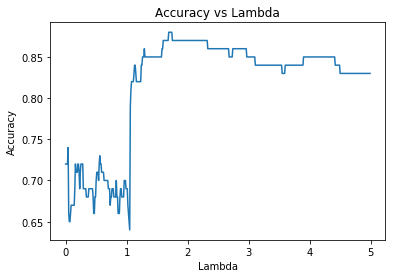

In [81]:
plot_accuracy(L1, accuracy2)

## Question 19:

In [101]:
max_index2=np.where(accuracy2==max(accuracy2))
l1_max2=L1[max_index2]
l1_max2

array([1.69, 1.7 , 1.71, 1.72, 1.73, 1.74])

## Question 20:

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.5848e+01 -9.9465e+02  2e+03  8e-02  4e+00  7e-01
 2:  7.8373e+01 -5.6939e+02  1e+03  5e-02  2e+00  6e-01
 3:  5.1401e+01 -1.5096e+02  3e+02  2e-02  7e-01  2e-01
 4:  1.3858e+01 -1.3466e+01  3e+01  2e-03  1e-01  3e-02
 5:  4.5965e-01 -2.0276e-01  8e-01  5e-05  2e-03  7e-04
 6:  4.5901e-03 -2.0248e-03  7e-03  5e-07  2e-05  7e-06
 7:  4.5900e-05 -2.0248e-05  7e-05  5e-09  2e-07  7e-08
 8:  4.5900e-07 -2.0248e-07  7e-07  5e-11  2e-09  7e-10
 9:  4.5900e-09 -2.0248e-09  7e-09  5e-13  2e-11  7e-12
Optimal solution found.
[ 1.53138644e-13  1.97169836e-13  1.45240582e-12  3.27334027e-12
  7.78059285e-12  1.25758093e-11  2.38342869e-12  6.92227858e-11
 -5.95170486e-11  1.06511168e-10 -4.75430047e-12 -1.28187613e-12
 -5.35401023e-15  1.25506652e-12  2.33997653e-12  2.61741383e-12
  5.15670549e-12  1.88801610e-11  8.81776900e-12  1.11183425e-10
 -3.06618122e-12 -6.10036821e-13  1.3

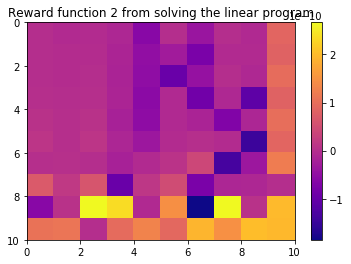

In [102]:
R_irl2_max= irl(P, policy2, max(rf2.T.flatten()), l1_max2[0])
print(R_irl2_max)
R_irl2_max_t= R_irl2_max.reshape(10,10).T
plot_heatmap(R_irl2_max_t, 'Reward function 2 from solving the linear program')

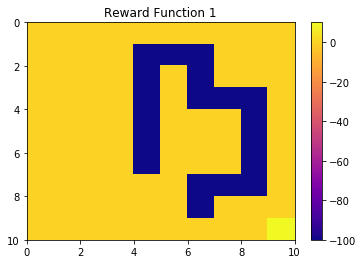

In [103]:
plot_heatmap(rf2, 'Reward Function 1')

## Question 21:

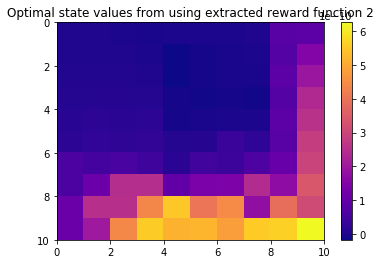

In [104]:
Vs2_irl_max, policy2_irl_max = value_iteration(P, R_irl2_max)
Vs2_irl_max_t=Vs2_irl_max.reshape(10,10).T
plot_heatmap(Vs2_irl_max_t, 'Optimal state values from using extracted reward function 2')

## Question 22:

Similarities: In both graph, right bottom corner has higher optimal state values and top middle right section has lower values. 

Differences: Heat map from Question 21 (extracted optimal values from inverse reinforcement learning) has more gentle value change from high area to low area and the "n" shape low value area is not as clear as seen on Quesiton 7.

## Question 23:

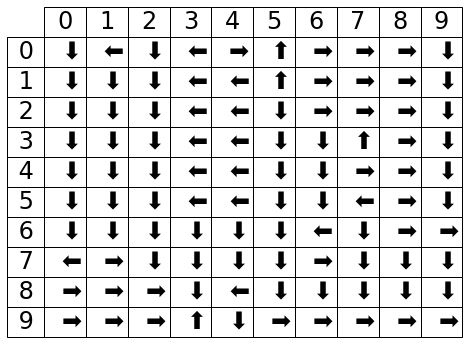

In [105]:
policy2_irl_max_t=policy2_irl_max.reshape(10,10).T
policy2_irl_max_ta= replace_index_to_arrow(policy2_irl_max_t)
plot_table(policy2_irl_max_ta)

## Question 24:

Similarities: In both optimal policy, agent move towards right bottom corner, which has higher state value than other areas. And agent tends to avoid top middle right area, which has with lower state value.

Differences: Optimal policy from Question 23 (extracted optimal policy from inverse reinforcement learning) takes more steps to move to the very right bottom corner or eventually stay at the bottom without moving to the right bottom corner. Agent tend to waste time wondering around and not directly moving towards the goal. Because the change in state value is more gentle in Question 23, the reward for agent moving is not very high when agent arrive bottom section. 

## Question 25:

In [185]:
def value_iteration2(P, R, n_states=100, n_actions=4, discount_factor=0.8, threshold=0.01):
    Vs= np.zeros(n_states)
    delta=float('inf')
    while delta> threshold:
        delta=0
        temp=Vs
        for s in range(n_states): #s is in range of [0,100)
            v=Vs[s]
            Va=np.zeros(n_actions)
            for a in range(n_actions): #a is in range of [0,4)
                Vsp=np.zeros(n_states)
                for sp in range(n_states): #sp is in range of [0,100)
                    Vsp[sp] = P[a][s][sp]*(R[sp] + discount_factor*temp[sp])
                Va[a]=np.sum(Vsp)
            Vs[s]=max(Va)
            delta=max(delta, np.abs(v-Vs[s]))
    
    policy= np.zeros(n_states)
    for s in range(n_states): #s is in range of [0,100)
        Va=np.zeros(n_actions)
        for a in range(n_actions):
            Vsp=np.zeros(n_states)
            for sp in range(n_states): #sp is in range of [0,100)
                Vsp[sp] = R[sp] + P[a][s][sp]* (discount_factor*temp[sp]) # this is modified logic
            Va[a]=np.sum(Vsp) 
        #print(Va)
        policy[s] =np.argmax(Va) #return the index of maximum Va
        #print(policy[s])
    return Vs, policy   

In [188]:
L1=np.arange(0, 5, 5/500)
accuracy3=np.zeros(500)
i=0
for l in L1:
    R_irl2= irl(P, policy2, max(rf2.T.flatten()), l)
    Vs3_irl, policy3_irl = value_iteration2(P, R_irl2)
    m=0   
    for s in range(n_states):
        if (policy3_irl[s]==policy2[s]):       
            m+=1
    
    accuracy3[i]=m/n_states
    i+=1
print(accuracy3)

[35.82566807 35.95638635 36.2993553  36.82306185 37.46797596 38.46180542
 39.80919664 38.2371854  46.6743497  45.9898471  36.83094671 37.14735305
 37.43354888 38.00959507 38.82134817 40.08309563 41.88443132 47.96083305
 48.26831127 47.10091314 36.73369993 37.00757011 37.56888678 38.3611228
 39.59817636 41.47739952 47.49333416 48.11723363 48.66848732 48.74855399
 35.1670866  35.47187935 35.7577165  36.33010969 37.16124921 38.62397196
 41.068232   48.21822185 48.56674868 48.80863817 17.03547774 16.99756581
 17.22243037 17.80608849 18.90131714 26.48017171 46.28313252 47.7177806
 48.81105255 49.12479862  3.27289024  3.16606873  3.28668929  9.97151328
 25.81860279 45.84519206 47.20869768 48.11254427 48.89964578 49.60770514
 13.60763186  9.54381085 13.97330077 22.2937032  42.28877348 44.26198303
 46.64765181 47.76680813 49.09653136 49.58550003 25.58193393 25.58298479
 25.59902092 26.13609932 38.95463507 43.16645452 44.58720931 47.63572054
 49.25603443 49.91876267 46.19476972 46.14664614 46.3

[35.82578214 35.95650153 36.2994633  36.82316332 37.4680697  38.46188912
 39.80926862 38.23726836 46.67434806 45.98985525 36.83106076 37.14746217
 37.43365249 38.00969052 38.82143342 40.08316832 41.88448822 47.96084547
 48.2683208  47.10090824 36.73380853 37.0076734  37.56898198 38.36120792
 39.598249   41.47745526 47.49334687 48.11724517 48.66849357 48.74855899
 35.1671981  35.47198593 35.75781752 36.33020256 37.16133185 38.62403985
 41.06828585 48.21822714 48.5667555  48.80864326 17.03556559 16.99764944
 17.22250956 17.80616041 18.90137949 26.48015711 46.28310896 47.71778806
 48.81105739 49.12480564  3.27296052  3.16613424  3.28675341  9.97152521
 25.81860104 45.84518657 47.20866642 48.1125518  48.89965178 49.60771007
 13.60773833  9.54383535 13.9734244  22.29420688 42.28944928 44.26196289
 46.64766388 47.7667749  49.09653508 49.58550581 25.5819558  25.5830098
 25.59905041 26.13614126 38.95454346 43.16715808 44.58810586 47.635751
 49.25603735 49.91876448 46.19479194 46.1466714  46.33

[35.5346588  35.63410262 36.01803603 36.48639823 37.17423538 38.23913551
 39.29067356 38.27377988 46.75307932 46.08528867 36.45755695 36.75422853
 37.05195622 37.58814284 38.45764744 39.83182776 41.61836512 47.97619901
 48.30784203 47.17365176 36.33769806 36.62169758 37.14415571 37.99066991
 39.35239941 41.45638238 47.51725572 48.14864056 48.69872257 48.77641342
 34.79324583 35.07812514 35.37499536 35.91411795 37.07058103 38.65038814
 41.07757883 48.26608733 48.59830807 48.83495234 16.77424963 16.70954116
 16.95459688 17.51365461 19.88889867 30.12014857 46.67584113 47.76587404
 48.83942625 49.14338861  4.60958286  3.86260076  4.63588362 10.02045818
 25.99387492 46.03305539 47.39059871 48.15008153 48.92975807 49.61651952
 18.70506567  9.94900836 18.94698804 17.16599207 35.22637902 44.16580807
 46.60122858 47.94507896 49.10857766 49.59469109 25.90269939 25.83834203
 25.76122999 26.00968228 33.78481    36.19831274 44.62747243 47.66850415
 49.26882137 49.92014631 46.30116423 46.11456017 46

[29.58784541 29.76999932 30.26354254 30.93258854 31.83609721 33.10267274
 34.70981614 36.15031056 46.0665473  45.28718496 30.49229443 30.90455293
 31.34919755 32.11421067 33.25803315 34.94934952 37.28943863 47.42828546
 47.98468416 46.55421433 30.51235537 30.93884835 31.68595321 32.80441612
 34.5327327  37.13015177 47.00383614 47.72889981 48.43280627 48.51239575
 28.95058679 29.35100831 29.79565021 30.5626887  32.00820547 34.09873467
 36.93170996 48.11994566 48.30511789 48.51467223 12.24793145 12.27596106
 12.65072299 13.39730916 16.58377724 26.69007086 46.3781491  47.38909252
 48.59921886 48.87316929  4.40020435  2.89584589  4.42786378  9.79500433
 25.76879594 45.70382007 46.99847564 47.83270315 48.61794006 49.43315386
 18.6019273   9.80452858 18.81358068 18.55452707 37.11813307 44.72248543
 46.36384833 47.545646   48.92645512 49.37769793 25.77511469 25.67552802
 25.55286393 25.80669832 35.16423866 38.06603993 45.17875791 47.46316642
 49.08729082 49.73686386 46.139051   45.90709435 46

[27.90528397 28.14556676 28.71359371 29.47550807 30.50027104 31.91482781
 33.31350379 34.87643105 45.64161905 44.79146665 28.84644694 29.32981203
 29.87203796 30.75722672 32.05509999 33.94165848 36.50391748 47.2075842
 47.78763409 46.17471316 28.94463135 29.46623648 30.33242591 31.60349904
 33.52352699 36.36151431 46.78749698 47.52112937 48.27830351 48.36428842
 27.34235626 27.81395253 28.35607823 29.24311738 30.84166882 33.11718979
 36.15296289 47.94463807 48.1383666  48.33947457 11.00247395 11.0859037
 11.53969902 12.36317226 15.62873891 25.87717705 45.09024496 47.14110052
 48.43518489 48.75902413  4.36278773  2.62455346  4.3650624   8.98149315
 24.73010906 44.40350661 46.85494075 47.6196825  48.47388379 49.39491973
 18.60134618  9.79860499 18.78817234 17.40646491 35.59071861 43.48091699
 45.08259803 47.42833578 48.8890675  49.3405395  25.77540574 25.67555792
 25.55141719 25.75993575 34.0275029  36.55828729 44.00429308 47.30439738
 49.06431013 49.73401351 46.13923298 45.90710763 46.1

[25.05598377 25.39558398 26.09129319 27.0092531  28.24049847 29.92250504
 31.79479517 33.83093854 44.4212216  43.27336355 26.06104083 26.66571489
 27.37435707 28.46294873 30.02282872 32.24098413 35.22542138 46.88262025
 47.45381855 44.97790862 26.29245236 26.97628701 28.04411531 29.574863
 31.82094517 35.06710433 46.46147585 47.22366313 47.98088839 48.04985376
 24.62075096 25.21376866 25.92234128 27.01856876 28.92467165 31.46002737
 34.85787285 47.58406496 47.82245292 48.01086947  8.89481367  9.07287529
  9.66965359 10.87310272 16.68525567 24.50817725 41.12334412 45.28848868
 48.04569269 47.64637621  4.30094424  2.16878015  4.41437107 15.82963673
 21.65829129 40.39447592 44.36572235 46.51688897 47.30317458 49.2455967
 18.60225886  9.78743709 18.68471099 12.43362743 28.64629669 37.69292697
 40.76746639 45.02419481 48.74293993 49.25760301 25.77602717 25.67555691
 25.5449882  25.54790361 28.64805216 29.41039658 38.42428648 46.64406668
 48.99668523 49.72437063 46.13959718 45.90713081 46.14

[24.93051387 25.27444945 25.97564079 26.90059088 28.14085565 29.83445643
 31.72012812 33.77476683 44.37186816 43.21245841 25.9384706  26.54843728
 27.26432468 28.36190852 29.93322966 32.16593738 35.16859052 46.86784352
 47.43908896 44.93007841 26.17571032 26.86660725 27.94334361 29.48542452
 31.74575933 35.0098802  46.44672796 47.21005002 47.96809064 48.03656014
 24.50099646 25.09931346 25.81512662 26.92028553 28.83696409 31.38211923
 34.8006522  47.56883468 47.80882323 47.99705772  8.8020706   8.98425872
  9.58685257 10.79464337 16.57730037 24.44199086 40.97360737 45.21970715
 48.02962126 47.60552644  4.2981588   2.14848142  4.40834553 15.72736225
 21.52578943 40.22693091 44.27404133 46.47504011 47.25977141 49.23977111
 18.60222178  9.78697575 18.68194216 12.30763421 28.47884787 37.47706743
 40.6031802  44.93552769 48.73719348 49.25413014 25.77604947 25.67555797
 25.54482762 25.54273082 28.52137816 29.24386124 38.21456387 46.61850668
 48.99375585 49.72398756 46.13961115 45.90713189 46

[24.70461937 25.04666887 25.72767079 26.66092761 27.90285002 29.59749158
 31.73399615 33.81210704 44.35439219 43.18960456 25.70631523 26.29572226
 27.01745523 28.11603719 29.68946886 31.92250676 34.94449169 46.85600293
 47.43970143 44.91046814 25.92464037 26.62102187 27.69812482 29.2424474
 31.50713861 34.77931    46.43660376 47.20677178 47.96717726 48.03467611
 24.27237365 24.85208223 25.57361041 26.67934641 28.60204769 31.16472067
 34.58507702 47.57724811 47.80810135 47.99482451  8.62590322  8.79461969
  9.40160854 10.6140755  16.58763952 24.28278868 41.01541132 45.17031105
 48.02829786 47.57292008  4.29347086  2.12300215  4.40545005 15.74157667
 21.54973017 40.24613178 44.17392423 46.45332686 47.22630181 49.2368864
 18.60216051  9.78647226 18.6820689  12.31686289 28.49108582 37.49247988
 40.61921457 44.83373387 48.73390704 49.25355519 25.77607577 25.67556443
 25.5448419  25.54310744 28.53040505 29.25573857 38.22889478 46.60742456
 48.99376135 49.72382808 46.13962771 45.90713339 46.1

[19.97166421 20.80939691 22.3228854  23.42014421 26.26068796 28.07194651
 34.36570835 37.15405123 43.18809385 41.5957813  20.79962311 21.85573828
 22.58027877 24.97209154 27.95221047 30.29735704 37.02210281 47.01200538
 47.5089151  43.58743787 21.47202602 22.18988941 24.51169166 26.06690579
 29.78619279 33.06939127 46.5022858  47.37248269 47.92573715 47.91747357
 19.27281218 20.51116873 21.25098766 23.60876708 25.63149797 29.47845872
 34.52747712 47.44893261 47.77646591 47.84818887  4.79163435  5.44841623
  6.08756802  8.31709064 17.59984456 24.9898489  37.1760979  41.7087103
 47.78821581 45.22941568  4.2312861   2.42224991  4.33079291 16.87578757
 23.20738994 35.35626145 39.14482592 44.60755543 44.88127156 49.02941016
 18.60021174  9.79121967 18.63390199 10.08921808 25.46032977 33.95829177
 35.65987658 39.67271124 48.54065178 49.21213155 25.77544361 25.67524715
 25.54186182 25.4510179  26.26481779 26.38832802 36.1264789  45.78729586
 48.99362193 49.7127328  46.13927168 45.90709382 46.

[19.72342716 20.57245351 22.05204888 23.17095332 25.9765037  27.82079648
 33.95389847 36.76616744 43.013379   41.3867309  20.56415577 21.63530268
 22.38414214 24.74871366 27.70734733 30.09496881 36.64476915 46.76644521
 47.44102852 43.42282249 21.25422721 21.99471066 24.2913537  25.8850078
 29.58934128 32.93144613 46.25857428 47.30905229 47.8669362  47.86047029
 19.07056163 20.29685037 21.05960716 23.39223568 25.44975103 29.28260173
 34.26362953 47.36958535 47.71725935 47.79165796  4.6332989   5.2819873
  5.93855363  8.13402124 17.33005066 24.87325718 36.33906137 41.50284423
 47.71560366 45.10320615  4.22389526  2.33808098  4.31063767 16.61065903
 23.01828139 34.46859167 39.1696623  44.46082242 44.75377263 49.01027468
 18.59971465  9.78950773 18.63246166 10.04284422 24.37997437 33.30661883
 34.78054124 39.69262265 48.52752545 49.19995731 25.77551794 25.67525962
 25.54171896 25.44502615 26.01965419 26.3496168  36.05504809 45.72160489
 48.98341208 49.71149269 46.13932242 45.90709795 46.1

[19.76491447 20.62194261 22.04770354 23.17682188 25.9762568  27.82068583
 33.95383273 36.7661064  43.01335026 41.38669651 20.55434146 21.63350719
 22.45783239 24.74267063 27.71471583 30.09486604 36.64470955 46.76640836
 47.44101773 43.42279527 21.20366295 21.9956536  24.28683617 25.89089261
 29.58912317 32.93135476 46.2585379  47.30904214 47.86692687 47.86046117
 17.9558287  20.30505367 21.08931865 23.39020949 25.4473008  29.28251567
 34.26358279 47.36957491 47.71724987 47.79164888  3.79529468  5.27417705
  5.96097832  8.13297352 17.32982866 24.87317482 36.3389964  41.50280824
 47.71559385 45.10318591  4.21253026  2.45909286  4.31357801 16.61054604
 23.01819087 34.4685138  39.16961633 44.46080123 44.7537509  49.01027165
 18.59933423  9.79187706 18.63254863 10.04282272 24.37980047 33.3065046
 34.78046789 39.69257889 48.52752244 49.19995542 25.77532802 25.67519864
 25.54169339 25.44500262 26.01954774 26.34959406 36.05503283 45.72159337
 48.98341045 49.71149265 46.13921183 45.90708633 46.

[18.94309139 19.81502964 21.34394339 22.5027789  25.41260544 27.30524939
 33.46448512 36.32457272 42.80146725 41.13327359 19.74211793 20.83999161
 21.70732106 24.09394655 27.19428987 29.6381749  36.20519545 46.51306962
 47.36155806 43.22265341 20.40945959 21.23864092 23.63681497 25.2938823
 29.13218908 32.55717293 46.00149198 47.22978002 47.79849154 47.79357277
 17.06863812 19.52953138 20.35109602 22.7575391  24.8664229  28.84050601
 33.91850434 47.29101195 47.64759604 47.72490556  3.11129421  4.67358849
  5.39205058  7.62824808 16.69890979 24.49833755 35.8842978  41.24403563
 47.64416103 44.95364298  4.19523271  2.3804284   4.28715898 15.99760906
 22.59179131 33.95042704 38.84569193 44.30767776 44.59317417 48.98741727
 18.59898515  9.79027803 18.63131199 10.01260885 23.6368041  32.71182656
 34.27332387 39.36804027 48.50482748 49.18532669 25.77539282 25.67520676
 25.54159609 25.44115202 25.86233916 26.31519816 35.73868098 45.63190997
 48.96478274 49.7099734  46.1392547  45.9070893  46.

[11.67208436 12.73525463 15.05911399 16.50306912 20.23905496 22.61682229
 28.43742735 31.75964286 40.63099855 38.5338504  12.67554005 14.01112498
 15.15560112 18.47089376 22.47179522 25.56251367 31.69328493 43.93916908
 46.5417646  41.17471123 13.67635474 14.775381   18.01164702 20.16169668
 25.06836275 29.23925635 43.39526588 46.42604555 47.09355828 47.10485514
 10.58342654 12.91129111 14.02474781 17.27566677 19.78115376 24.84864613
 30.22194153 46.47083895 46.92929497 47.03722362  1.46139834 -0.24636053
  0.51846431  3.22037572 10.33300599 19.56150644 31.14049247 38.57167826
 46.90765292 43.42710729  4.09429888  1.44687021  4.01540873  9.82086192
 17.22766387 28.57590221 35.45649689 42.73621351 42.95410585 48.75378019
 18.56406438  9.75161862 18.59205845  9.72001201 16.12752486 25.56802666
 29.00924019 36.00072661 48.2717576  49.03569961 25.73069687 25.6520835
 25.5047768  25.41976589 25.59289508 25.95732001 31.47798569 44.69444765
 48.74753163 49.69425258 46.08240086 45.88012736 46.

[11.26798054 12.21113855 15.04890108 16.50300621 20.23904673 22.61682102
 28.43742802 31.75964366 40.63099834 38.53385002 11.76090107 13.98586149
 15.13586835 18.4709317  22.47189527 25.5625134  31.69328573 43.93916916
 46.54176453 41.17471099 13.64335783 14.75012102 18.01211408 20.16186013
 25.06836031 29.23925388 43.395266   46.4260455  47.09355821 47.10485505
  9.91461201 12.92496579 14.04190292 17.27597533 19.78111144 24.84864632
 30.22193987 46.47083892 46.92929489 47.03722355  1.47423077  0.23269305
  0.54076773  3.221052   10.33304253 19.56150586 31.14049293 38.57167833
 46.90765284 43.42710696  4.09485712  1.45863776  4.0161062   9.82091329
 17.22766639 28.57590363 35.45649643 42.73621306 42.95410551 48.75377954
 18.56407459  9.75185762 18.59207871  9.72001416 16.12755031 25.56802762
 29.00924097 36.00072617 48.27175696 49.03569876 25.73069566 25.65208721
 25.5047783  25.41976604 25.59289562 25.95732077 31.47798697 44.69444811
 48.7475308  49.694252   46.08240062 45.88012767 46

[11.53382538 12.49112112 15.11955873 16.6341257  20.24017921 22.61675894
 28.43744605 31.7596373  40.63100041 38.5338551  11.99701858 14.21270035
 16.52672127 18.45939073 22.51605815 25.56240902 31.6932911  43.93912001
 46.54176452 41.17471273 13.87111467 14.99779332 18.01003066 20.19909801
 25.06762484 29.2385432  43.39522997 46.42605169 47.09355743 47.10485491
 10.12573413 13.16743375 14.28281305 17.26760103 19.76761511 24.84861602
 30.22139868 46.47084388 46.92929532 47.03722419  2.18542244  1.19197265
  0.73854377  3.21917261 10.34191211 19.56134898 31.14047223 38.57168522
 46.90765253 43.42710578  4.14142678  2.1529543   4.03458461  9.83043338
 17.22847564 28.57636825 35.45651551 42.73621288 42.95410433 48.75377804
 18.56438965  9.76557781 18.59268971  9.7204083  16.13681972 25.568441
 29.00947008 36.00074373 48.27175586 49.03569678 25.72985033 25.65184159
 25.50472329 25.41977133 25.59308014 25.95756832 31.47844265 44.69445783
 48.74754099 49.69425015 46.08192524 45.88009453 46.0

[12.53872436 13.43712902 16.1501779  17.55688222 21.19224614 23.37895517
 29.47203278 32.41728637 40.75614725 38.68468686 12.95241139 15.09820228
 17.44456186 19.23531717 23.27921655 26.07962758 32.28535318 41.91416905
 46.64476332 41.23585    14.75314583 15.75690905 18.77879728 20.76400625
 25.58824748 29.4232165  41.39697825 46.53575177 47.12556778 47.15227931
 10.83435346 14.04260262 15.02567814 18.01568998 20.32191    25.40581201
 32.73554219 46.51588361 47.01542333 47.10988534  2.63323871  2.00420382
  1.31780768  3.84453003 11.85024112 21.19718356 31.00690824 38.54905697
 46.92917401 42.78776388  4.15503214  2.56720111  4.07186953 11.29685656
 18.48982371 27.96191415 34.7353025  41.78698532 41.58788539 47.03019592
 18.54523907  9.7752617  18.57513188  9.77793106 17.52841107 26.71422454
 28.32923962 35.20036182 46.57080801 46.8063308  25.70049655 25.65487331
 25.47769978 25.41950593 25.64470547 26.00898416 32.56660482 44.3202382
 46.54956573 47.41308509 46.04398869 45.87295281 46.

[10.76940068 13.52561968 15.98489388 17.40625392 21.19005687 23.37894439
 29.4720194  32.41729126 40.75614629 38.68468396 11.34945028 13.34901236
 16.38883914 19.20459562 23.24354582 26.07967244 32.28534877 41.91420166
 46.64476354 41.23584923 13.03993541 16.03855365 18.71331107 20.74493727
 25.58873399 29.42372329 41.39700065 46.53574715 47.12556846 47.15227958
  9.61381079 12.45404672 15.38890719 18.03250895 20.33130876 25.40581316
 32.73595899 46.5158798  47.01542323 47.10988507  2.14640175  4.55693797
  1.63797073  3.86311939 11.84377081 21.19730735 31.00692307 38.54905169
 46.92917439 42.78776432  4.12190074  2.10221767  4.06865455 11.29012572
 18.48922149 27.96155675 34.73528767 41.78698511 41.58788533 47.03019596
 18.54503033  9.7661104  18.5748776   9.7776408  17.52129481 26.71390695
 28.32906255 35.20034807 46.57080775 46.80633086 25.70108762 25.65508658
 25.47769884 25.41949745 25.64456117 26.00878747 32.56625448 44.32023013
 46.54955703 47.41308512 46.04427889 45.87295776 46

[10.65308062 13.52441035 15.98238193 17.40679268 21.19019514 23.37905506
 29.47211814 32.41730997 40.75619597 38.68475738 11.16083388 13.23270851
 16.39339566 19.2047323  23.24389372 26.07974451 32.28535988 41.91387075
 46.64477922 41.23589327 12.92360481 16.04711485 18.71080919 20.74543636
 25.58880539 29.42373921 41.39667438 46.5357638  47.1255759  47.15229038
  9.54845686 12.34975893 15.40537242 18.03290205 20.33133039 25.40589414
 32.73634928 46.51588811 47.01543915 47.10990065  2.86675449  4.83829171
  1.65684851  3.86415346 11.84421352 21.19757101 31.00690304 38.54906813
 46.92918704 42.78776598  4.3015302   2.80891633  4.12156873 11.29185806
 18.4895793  27.96159763 34.7353516  41.78704431 41.58793113 47.03024315
 18.72085885  9.80998808 18.62651884  9.78983419 17.52231475 26.71446503
 28.3290922  35.20039583 46.57085556 46.80637821 25.73890267 25.68665058
 25.5450323  25.43502509 25.65531058 26.02235906 32.56688448 44.32028542
 46.54959971 47.41312262 46.08147157 45.90684466 46

[10.65303756 13.52435571 15.98232059 17.40673908 21.19013301 23.3790065
 29.47207485 32.41730177 40.75617427 38.68472525 11.16079331 13.2326727
 16.39335103 19.20468574 23.24384502 26.07971278 32.28535505 41.91401614
 46.64477241 41.23587403 12.92356993 16.04707015 18.71076348 20.74540454
 25.58877282 29.42373087 41.39681777 46.53575657 47.12557271 47.1522857
  9.54846696 12.34972469 15.40532731 18.03285663 20.33129815 25.40585874
 32.73617674 46.51588456 47.01543223 47.10989388  2.86866478  4.8382938
  1.65678896  3.86411102 11.84406643 21.19745689 31.00691295 38.54906175
 46.92918194 42.7877657   4.30406311  2.81062502  4.12046216 11.29163743
 18.48945029 27.96159522 34.73533778 41.78703275 41.58792573 47.03023735
 18.72423961  9.80311342 18.6251592   9.7872517  17.52200164 26.71426069
 28.32909207 35.20038658 46.57084964 46.80637257 25.73564904 25.67744185
 25.54365941 25.43172675 25.65252904 26.01790576 32.56665277 44.32027378
 46.54959322 47.41311815 46.07729197 45.90543909 46.149

[10.57920008 13.43533902 16.05874648 17.49790739 21.21138608 23.40848202
 29.91615268 33.00964952 40.5145042  38.24990516 10.91043863 13.41526441
 17.02315953 19.28594519 23.28168406 26.11169886 32.86795943 41.85498731
 46.62993022 40.97139426 12.85681937 16.6864399  18.79954269 20.85361017
 25.61104368 29.46193097 41.33260072 46.53089127 47.10030016 47.12146878
  9.53021845 12.32150578 16.06431371 18.11361962 20.40907307 25.42292714
 32.6542156  46.49309817 46.99377221 47.09269167  2.89411704  5.78885695
  2.16482939  3.9265335  11.65944109 21.16838163 30.8584306  38.53599351
 46.90892937 42.77620175  4.30499762  2.83046572  4.12717389 11.10598821
 18.44766062 27.8106639  34.72975739 41.77577841 41.58746096 47.02985245
 18.72425302  9.8035174  18.62511225  9.77804526 17.26089397 26.58206306
 28.18302487 35.19562602 46.57062828 46.80633229 25.73564953 25.67745169
 25.54365199 25.43142449 25.64694026 26.01003232 32.53303574 44.31947706
 46.54874382 47.41308605 46.07729235 45.90543882 46

[10.57433157 13.42879681 16.05371792 17.49310329 21.2112205  23.40853772
 29.91615967 33.00964019 40.51450655 38.24991039 10.58257298 13.37749975
 16.97285902 19.28057798 23.28081541 26.11175283 32.86795774 41.8549531
 46.62993008 40.97139656 12.83074158 16.65752854 18.79377992 20.86559812
 25.61125573 29.46156191 41.33257507 46.53089503 47.10029961 47.12146872
  9.52799886 12.31142984 16.06275415 18.1228288  20.4229643  25.42336566
 32.65383545 46.49310122 46.99377246 47.09269207  2.90614521  6.5728191
  2.19248476  4.58202424 11.6795533  21.16853928 30.85842005 38.53599811
 46.90892912 42.77620137  4.30558656  2.84660823  4.12821132 11.12585079
 18.44875599 27.81099956 34.72977065 41.77577899 41.58746115 47.02985267
 18.72427166  9.80384444 18.6251512   9.77857503 17.26729572 26.58233452
 28.18318195 35.19563815 46.5706287  46.8063325  25.73564956 25.67745637
 25.54365385 25.43143783 25.6470701  26.01020796 32.53333561 44.3194826
 46.54875263 47.41308621 46.07729192 45.90543967 46.14

[ 9.89797648 12.56853416 16.04130288 17.48941416 21.25085446 23.43941913
 29.89635719 32.95662201 40.54580402 38.30658026  9.96525783 12.5990103
 15.98727841 19.30124628 23.28794034 26.13341541 32.81457009 41.78236539
 46.63454776 41.0036164  12.0806113  15.69489348 18.83302518 20.86605863
 25.63624082 29.47105688 41.26201546 46.53506309 47.10406163 47.12657893
  8.95969758 11.6237653  15.17939871 18.2193384  20.51914933 25.45038006
 32.75320022 46.49702486 46.99922226 47.0977011   3.16662005  6.30474786
  3.68759733  5.40068895 13.99708632 21.28415516 30.86630309 38.54076563
 46.91323035 42.77738344  4.67132168  3.11414331  4.21349471 13.44274869
 18.65549889 27.93957494 34.73526604 41.78078521 41.58776145 47.03017997
 19.19436014  9.82828129 18.62949424  9.87334337 19.57286561 26.66738155
 28.26987124 35.22740612 46.57151619 46.80652274 25.76442489 25.69043381
 25.54400468 25.43380771 25.67901448 26.08552381 33.62739225 44.34210977
 46.57914933 47.4132449  46.0865901  45.90577457 46.

[ 9.852586   12.51079154 15.96709775 17.42510041 21.17261883 23.37816402
 29.92456198 33.0507812  40.46380393 38.17967554  9.93392557 12.56007364
 15.93866881 19.24308825 23.22526825 26.09172754 32.91016908 41.91248166
 46.62209132 40.91995034 12.04259812 15.6470286  18.77587158 20.82753117
 25.59172001 29.45603184 41.38937352 46.52467844 47.09350254 47.11329528
  8.92940808 11.58523602 15.13221685 18.16333554 20.48162798 25.4031602
 32.57202708 46.48723833 46.98558014 47.08469197  3.16469195  6.26153413
  3.63991646  5.3995155  13.89507464 21.15946041 30.85317437 38.50987549
 46.90174103 42.76024554  4.67126319  3.1131713   4.21036867 13.34384227
 18.52293436 27.91673114 34.69367948 41.75707774 41.56660517 47.01773111
 19.19436116  9.8282578  18.62934858  9.8694466  19.48531732 26.55056199
 28.25690835 35.19941867 46.5708526  46.79262611 25.76442544 25.69043372
 25.54399981 25.43366638 25.67601018 26.08875118 33.86136675 44.75011052
 46.46797605 47.5392888  46.08659093 45.90577576 46.

[ 8.34372753 10.59617487 13.51570825 17.06353556 20.09690378 21.99807621
 29.87208047 32.99234922 40.48405885 38.21780357  8.65712342 10.95456929
 13.84714183 17.37330531 21.86052879 26.18289064 32.81882641 41.82950502
 46.62298372 40.94128273 10.69918478 13.6096062  16.98344997 21.49559133
 25.67619897 29.62771713 41.31625092 46.5292377  47.09388111 47.11512452
  7.9198619  10.29223239 13.28225238 16.5559673  21.29747944 25.58959336
 32.68946643 46.49086402 46.98768872 47.08687727  3.33994282  5.64499185
  3.8713347  10.00984236 14.17254252 21.40388367 30.82022474 38.51627478
 46.90258443 42.76003792  4.92115287  4.77491283  4.56271453 13.6081569
 18.74460864 27.47116831 34.69958835 41.74691972 41.56690651 47.01805222
 19.47550981 19.21977912 19.02704252  9.91921482 20.11781152 26.39578736
 27.8185073  35.21721347 46.57147678 46.7928907  26.08402266 26.07984785
 25.81604148 25.44595897 25.68646575 26.12464121 34.66854619 44.76623618
 46.4913677  47.53991491 46.16591014 46.16712222 46.

[ 8.6303682  10.96292763 13.98727027 17.84695253 20.56889305 22.60794344
 29.94389892 33.17626003 40.31358288 37.94669907  8.84464055 11.19000001
 14.20811222 17.85056034 22.46622624 26.38926038 33.03211247 42.07575786
 46.59426177 40.76780218 10.88905787 13.98252122 17.47665219 22.1086672
 25.88294574 29.89169752 41.57023093 46.51107207 47.06948163 47.08572696
  8.11883051 10.53124179 13.70832233 17.075501   21.8966531  25.77184273
 32.28456671 46.47262056 46.95728837 47.05904907  3.39308351  6.6777679
  5.25202394 11.29411622 14.18013444 21.39008294 30.72183153 38.48162203
 46.87662074 42.73942932  4.92270968  4.79649198  4.59104424 13.60443602
 18.70465388 26.71954086 34.6671307  41.71101423 41.55658965 47.01730397
 19.47555207 19.22022711 19.02744656  9.91059416 19.70767262 25.8434202
 27.09267617 35.71780923 46.5943654  46.79442627 26.08402623 26.07985904
 25.81604281 25.44553273 25.6732926  26.14774219 35.39072308 45.24283067
 46.51176851 47.80509114 46.16591331 46.16712492 46.16

[ 8.8098799  11.19483039 14.28843777 18.23830825 20.89629584 22.95620295
 29.93334322 33.14111965 40.30987458 37.94350251  8.88107944 11.23074012
 14.25342448 18.08974179 22.79880102 26.64834244 33.01299665 42.02141431
 46.59020054 40.76481293 10.98794803 13.92563777 17.73393722 22.44537903
 26.15819998 30.18010093 41.52973562 46.51355186 47.06558612 47.08268624
  8.24182633 10.67340958 13.6973118  17.37309956 22.26836157 26.04661534
 32.33113238 46.47382915 46.95432417 47.0567439   3.48671071  7.44813144
  6.42397321 12.24758514 14.40509684 21.67569922 30.67879825 38.48645211
 46.87288826 42.73756376  4.98848645  4.8891975   4.61198313 13.79998258
 18.94275284 26.73823718 34.68713658 41.71038459 41.55654388 47.01727116
 19.55765604 19.32258205 19.02726877  9.90444903 19.47264811 26.08752104
 27.11996425 35.73900095 46.59480244 46.79443931 26.00791234 26.03327518
 25.81280617 25.44954031 25.85436033 26.16704431 35.41024775 45.26234542
 46.51223852 47.80534577 46.05454911 46.09884288 46

[ 8.65301079 10.9935931  14.02896379 17.90356647 20.43032399 22.6518752
 29.9550184  33.22721078 40.25131882 37.84674325  8.79895947 11.12897758
 14.1270901  17.93305658 22.60985998 26.40077281 33.09333857 42.13901309
 46.5818618  40.70483579 10.88586784 13.8023363  17.58259862 22.26738332
 25.91282971 30.18611073 41.6392563  46.50670858 47.05878518 47.07372085
  8.16244419 10.57094005 13.57321478 17.22129206 22.10708086 25.80486577
 32.1798016  46.46733498 46.94487798 47.04813238  3.4833588   7.37026786
  6.32707081 12.1344937  14.3275664  21.59355527 30.66598595 38.47928847
 46.86539428 42.73558788  4.9884795   4.88767258  4.60887154 13.72731998
 18.8478933  26.7270897  34.67961184 41.7035129  41.55625233 47.01673279
 19.55777908 19.32270443 19.02734997  9.90170849 19.39801304 25.96949406
 27.13777085 35.75613669 46.59473603 46.79420502 26.00815586 26.03351212
 25.81302532 25.44955627 25.83161169 26.19126065 35.41515838 45.28895197
 46.5140333  47.80734215 46.0548199  46.09909734 46.

[ 8.91160499 11.32607368 14.45867346 18.45931045 20.9371569  23.10327165
 29.95954657 33.2122987  40.2494407  37.84471178  8.90734604 11.26081771
 14.28634469 18.12546647 22.99115877 26.65575941 33.09345627 42.11606213
 46.58003224 40.70326161 11.05989218 14.02100063 17.73417525 22.64146366
 26.16292359 30.30716752 41.62559408 46.50748477 47.05704088 47.0723326
  8.3105811  10.76282459 13.81023793 17.38243778 22.4782131  26.04852049
 32.18866514 46.46761458 46.94351514 47.04706174  3.54864143  7.52568087
  6.86782386 12.64586555 14.41093699 21.69778153 30.64642711 38.48108635
 46.86370865 42.73476513  5.04294739  4.95036119  4.66534237 13.80288826
 18.93487416 26.72953369 34.68745916 41.70309248 41.55623941 47.01672424
 19.62645375 19.3916431  19.09400338  9.89399038 19.13358622 26.06494899
 27.14007893 35.76157424 46.59485434 46.79421634 26.01390943 26.03946706
 25.81750888 25.45118217 25.82745822 26.18763463 35.42054733 45.29270767
 46.51412313 47.80738745 46.05600101 46.10056877 46.

[ 8.08183113 10.26745633 13.10146237 16.71845304 19.94451195 23.19600964
 29.917999   33.18035477 40.22001996 37.80110322  8.25001779 10.43748196
 13.25522896 16.82971395 21.36130246 25.98025869 33.0171278  42.05636556
 46.56898127 40.67463818 10.14477301 12.90992199 16.45839704 21.07286785
 25.55930393 30.76407605 41.56489269 46.51252441 47.04684781 47.06297917
  7.68036819  9.93479141 12.74434724 16.26934248 20.96584669 25.54801321
 32.14877453 46.46985138 46.93414708 47.03930468  4.70475094  6.96323146
  8.23143565 12.07734698 14.9949718  22.25420208 30.57154757 38.49059325
 46.85357821 42.73038047  5.02699155  4.93880948  4.6537307  14.26799559
 19.53602669 26.82862005 34.73186947 41.69908459 41.5560447  47.01645065
 19.57737755 19.35315083 19.01361153  9.9079282  20.33344563 26.66254768
 27.22391764 35.79108048 46.59529376 46.79413355 25.95370247 25.99463432
 25.7955631  25.41111617 25.83591855 26.20530266 35.45206654 45.31218391
 46.51498093 47.8081796  45.98229494 46.04884487 46

[ 8.16836347 10.37807893 13.24357287 16.90105377 20.15078607 23.4727178
 29.95244615 33.26375854 40.14242633 37.67340155  8.30991655 10.51291272
 13.35144762 16.94956788 21.5122032  26.14974989 33.11342573 42.16463501
 46.55493574 40.59576239 10.20192152 13.03183961 16.5833974  21.22211639
 25.74295536 30.98452752 41.68130348 46.50587945 47.03490353 47.04892009
  7.76835269 10.03127727 12.88667562 16.43240107 21.11141232 25.72312571
 31.94513021 46.46269227 46.91951156 47.02628007  5.65567894  7.07376573
  9.21751415 12.21386024 14.91440264 22.10154159 30.51124904 38.47899951
 46.84082331 42.72631429  5.04807628  4.95439159  4.67106718 14.16785786
 19.37943007 26.80717431 34.71894195 41.68826966 41.55557756 47.01570079
 19.57927524 19.3517794  19.01310153  9.90152528 20.21005247 26.49964205
 27.20533564 35.78323874 46.59456491 46.79378908 25.95054937 25.9924091
 25.79470446 25.40900442 25.86073632 26.10912684 35.45136559 45.30732027
 46.51632217 47.81018474 45.97807935 46.04592934 46.1

[ 7.09173806  8.99586824 11.45968009 14.59704641 18.53946442 23.46839032
 29.92244533 33.27268488 40.14194968 37.67251644  7.77367917  9.86523864
 12.57116504 16.01649731 20.39982091 25.97742946 33.12132372 42.17289759
 46.55534293 40.59512936  8.96689397 11.44563269 14.72339294 18.8770533
 24.21333568 30.99830086 41.65098337 46.50886567 47.03524455 47.04916265
  6.79493158  8.78436538 11.28221408 14.72275368 19.24756862 24.88897683
 31.93157242 46.46534605 46.91977964 47.02649512  4.90093912  6.11383687
  8.13167975 10.92694247 15.026272   22.09730305 30.59979599 38.47941511
 46.84117888 42.72646987  5.03200247  4.93423408  4.6462352  14.15462173
 19.38874579 26.88893859 34.7197887  41.68847794 41.55558644 47.01570623
 19.57893149 19.3513505  19.01254386  9.89936705 20.21922535 26.51183968
 27.20661907 35.78386795 46.59457975 46.79379091 25.95054075 25.99239896
 25.79469183 25.40896331 25.86093381 26.10978645 35.45200673 45.30774064
 46.51633241 47.81018992 45.97807717 46.04592773 46.

[ 7.09173584  8.99586523 11.45967611 14.59704149 18.53946133 23.46839088
 29.92244569 33.27268532 40.14194988 37.67251672  7.77367845  9.86523792
 12.57116431 16.01649682 20.39982084 25.9774299  33.12132418 42.17289817
 46.55534306 40.59512955  8.96689145 11.44562628 14.72338462 18.87704734
 24.2133315  30.99830135 41.65098383 46.50886581 47.03524468 47.04916278
  6.79492965  8.78436275 11.28220784 14.72276263 19.24756982 24.88897785
 31.93157272 46.46534618 46.91977977 47.02649523  4.90093774  6.11383504
  8.13167576 10.92694929 15.02627269 22.09730259 30.59979593 38.47941523
 46.84117899 42.72646998  5.03200273  4.93423416  4.64623484 14.154622
 19.38874546 26.88893885 34.71978889 41.6884782  41.55558642 47.01570625
 19.57893193 19.35135083 19.01254361  9.899367   20.21922591 26.51183943
 27.2066192  35.78386824 46.59457978 46.79379092 25.95054041 25.99239892
 25.79469179 25.40896359 25.86093388 26.10978662 35.45200702 45.30774079
 46.51633232 47.81018987 45.97807721 46.04592787 46.1

[ 7.04634662  8.93737599 11.38391172 14.49882047 18.46406319 23.45770496
 29.9154286  33.24801374 40.16417533 37.71152548  7.75932353  9.84810971
 12.55150022 15.99427406 20.37609936 25.95248113 33.09533614 42.13825692
 46.55950161 40.61781882  8.92439597 11.39371697 14.63910272 18.79498305
 24.15829087 31.00817218 41.61556165 46.51272151 47.03882204 47.0535107
  6.77563725  8.74496867 11.41172366 14.90025145 19.31006218 24.96340392
 32.00248804 46.46923131 46.92430923 47.0307469   4.88600249  6.0864347
  8.23438775 11.07173876 15.33293304 22.48104268 30.63947714 38.49716409
 46.84514057 42.73131202  5.03168861  4.93402469  4.65373462 14.42934293
 19.7547459  26.94264359 34.74612855 41.71088573 41.56067999 47.01759772
 19.57892529 19.35135152 19.01279964  9.90440251 20.2041066  26.48138108
 27.25387901 35.8057879  46.61190212 46.79574407 25.95054012 25.99239887
 25.79469898 25.40906303 25.86085099 26.12213357 35.47360746 45.33806526
 46.51889336 47.81175358 45.97807687 46.0459276  46.1

[ 7.04440929  8.93489596 11.38072571 14.4919769  18.45508571 23.45584296
 29.91346872 33.24334198 40.16732185 37.71685543  7.75812781  9.84643326
 12.54937358 15.99157541 20.37290282 25.94865086 33.09049626 42.13181056
 46.5599626  40.62104448  8.92349408 11.39258926 14.63155467 18.7904653
 24.16286923 31.00976247 41.60938337 46.51315613 47.03919933 47.05400872
  6.77978621  8.74429135 11.42378183 14.91631536 19.31631601 24.9714099
 32.01176868 46.46964418 46.92483531 47.0312295   4.89015524  6.08703664
  8.24510519 11.08413214 15.33974104 22.48852518 30.64082645 38.49769579
 46.84556142 42.7314732   5.0757482   4.97141295  4.72231365 14.43732762
 19.76202386 26.94394272 34.74669645 41.71158679 41.56079405 47.0176792
 19.63309872 19.39574675 19.10109481  9.94764827 20.20913631 26.48350449
 27.25477126 35.80621003 46.6121999  46.79581233 26.01676496 26.04453673
 25.90686079 25.46242762 25.97844581 26.14635168 35.47749674 45.33856703
 46.5188946  47.81172115 46.05979771 46.10738336 46.16

[ 7.04676759  8.93814953 11.38523227 14.48240353 18.44234458 23.43730743
 29.90175201 33.21326599 40.18768364 37.75131824  7.75117774  9.83693286
 12.53633286 15.97369126 20.34817349 25.91596301 33.05893751 42.09060824
 46.56297354 40.6419124   8.93203616 11.40368158 14.65227691 18.7934867
 24.16653931 31.01190214 41.56898813 46.51576746 47.04166901 47.05724719
  6.78673868  8.7532658  11.438317   14.93477074 19.34552258 25.00945175
 32.07111854 46.47213372 46.9282536  47.03435402  4.8973589   6.09603219
  8.26531548 11.09961803 15.37038375 22.52756599 30.64780604 38.50070776
 46.84830345 42.73239667  5.16380672  5.06319676  5.2063856  14.47695452
 19.80031518 26.94945987 34.74965635 41.71530567 41.56120701 47.0179988
 19.74859    19.50564695 19.75263047 10.04668328 20.24248628 26.50160669
 27.25910957 35.80828324 46.6133697  46.79604062 26.16599875 26.17899527
 26.77012628 25.57788501 26.83996359 26.25038575 35.50301823 45.34077546
 46.51878689 47.81143461 46.22351844 46.26031492 46.2

[ 7.03485174  8.92240961 11.3643123  14.47281346 18.4299189  23.46701449
 29.91859647 33.26467482 40.14655618 37.68489728  7.76121947  9.85136237
 12.55678691 16.0025506  20.38870538 25.97139471 33.11300977 42.16126908
 46.55668656 40.59979095  8.90986875 11.37431819 14.61502689 18.76242113
 24.12525391 31.00664243 41.63754146 46.51037345 47.0362886  47.05044407
  6.80130355  8.73406409 11.4140036  14.90414985 19.29477214 24.94437271
 31.96763775 46.46695509 46.92118639 47.02771565  6.75038119  6.15159886
  8.24081584 11.07393312 15.3124768  22.45842728 30.63570753 38.48774195
 46.84211061 42.72554005  9.20132117  6.72526153  4.82503202 14.4104611
 19.72675009 26.92725149 34.72636787 41.69303115 41.53993675 46.99573802
 25.00353168 19.74243439 19.19759261  9.8284747  20.19392716 26.4659608
 27.23701559 35.79092447 46.58948532 46.77353415 33.0126891  26.32227612
 26.03264703 25.30338125 26.03178609 26.02512363 35.46197381 45.3197482
 46.49746811 47.79247229 43.41088522 46.28523488 46.14

[ 7.05341295  8.94694678 11.39693685 14.45382443 18.40348228 23.38502258
 29.83415959 33.16777456 40.08433357 37.64396123  7.74483087  9.82844754
 12.52433855 15.95548902 20.32032197 25.88046804 33.01364694 42.03333293
 46.54358433 40.53623581  8.94527961 11.4560607  14.73927228 18.77864547
 24.14444257 30.98041986 41.51658362 46.49978886 47.02068355 47.03499796
  6.82168952  8.76893945 11.45709229 14.95791988 19.3907014  25.06591333
 32.12872789 46.45625822 46.90725276 47.01102884  6.7278128   6.17703237
  8.27361686 11.12306545 15.53951384 22.54044922 30.6516225  38.32903462
 46.81970329 42.61480472  9.16977701  6.70825266  4.95328707 14.62406437
 20.01271596 26.66206298 34.34391554 41.37753525 41.08863448 46.51364462
 24.9627984  19.89097662 19.36484915  9.92279083 20.05547235 26.24827989
 26.97503454 35.50920662 46.12636523 46.28211927 32.95555414 26.52002055
 26.2486065  25.42404136 26.78220601 25.81999139 35.21297448 44.97366734
 46.01153981 47.35035634 43.553201   46.31968177 46

[ 6.97974478  8.8536353  11.27825191 14.31484508 18.22782618 23.18055286
 29.67127053 32.87518971 40.16454296 37.82985903  7.6633513   9.72275998
 12.38676734 15.77633829 20.08693942 25.57535203 32.70929648 41.63776204
 46.55026734 40.61880392  8.93024045 11.43775395 14.71455822 18.76034033
 24.11997305 30.96667337 41.13091091 46.5060385  47.02176398 47.04136645
  6.83662984  8.88150103 11.60626858 15.15243373 19.63807474 25.39853652
 32.65127939 46.46121373 46.91605515 47.01562277  7.60169514  6.32616774
  8.44088278 11.26980169 15.43101331 22.83433227 30.67683692 38.20633078
 46.81667221 42.52167704 10.32211777  7.6719879   7.43816305 14.71290418
 19.8375219  26.42223082 34.0121085  41.10796425 40.70574299 46.10923841
 26.40422895 22.7997806  22.65404025 18.14432124 20.18975037 26.10781277
 26.71437558 35.24717628 45.72027002 45.86903864 34.75433354 30.26189981
 30.32402132 26.10468201 30.63406827 26.08680991 35.06267803 44.64779979
 45.59852431 46.974057   44.83835042 46.74412803 46

[ 6.88208335  8.72688091 11.11282187 14.14636851 18.00960553 22.92587382
 29.18281175 32.82503377 39.0530208  36.4295151   7.66292228  9.72840369
 12.40213037 15.80704031 20.14121826 25.66145914 32.68694008 41.62612297
 46.33242651 39.4872099   8.80558457 11.27724413 14.5054013  18.54066922
 23.83479329 30.62806707 41.14172115 46.31824645 46.80454319 46.80629002
  6.67542868  8.72195862 11.40602857 14.89818581 19.30540988 24.97527764
 31.9486853  46.28097597 46.68636558 46.77873482  4.82099951  6.07926758
  8.19745184 11.03652602 14.99462231 22.06401483 30.60556706 36.92516357
 46.5548479  41.66250873  5.54443677  3.92793405  3.06121433 13.19491204
 18.07289329 24.15366386 31.06835396 38.65093353 37.46251415 42.66229257
 20.2437498  16.99632526 16.51034969 12.06715908 17.93461715 23.48286764
 24.41943711 33.01892869 42.94351571 42.36994688 26.8809018  22.83356885
 22.46042868 18.07315425 22.85626447 19.18245125 32.66676288 41.90202369
 42.10065986 43.78968503 34.77771176 36.48189237 36

[ 6.90643294  8.75818991 11.15330346 14.16673053 18.03417137 22.95650039
 29.22207251 32.85790225 39.05556698 36.46076041  7.67296838  9.74004917
 12.41587352 15.82309818 20.1597258  25.6848043  32.71653424 41.66371943
 46.34144178 39.48696405  8.83089532 11.3093867  14.5460623  18.5590447
 23.8556296  30.65126307 41.18281366 46.32898136 46.81029105 46.81060991
  6.70464979  8.77606027 11.47629352 14.98915681 19.42475703 25.13097699
 32.14848866 46.28740029 46.69191423 46.78007034  4.8409458   6.11868595
  8.24983745 11.10745178 15.08920572 22.1966786  30.51786757 36.83441724
 46.54902781 41.59894137  5.39678219  3.81699816  3.02118    13.22825204
 18.12577198 24.21779662 30.83972592 38.45479518 37.18745116 42.37056567
 20.05034917 16.90888633 16.4495363  11.80223969 18.07800385 23.68772752
 24.4775864  32.84437666 42.70731624 42.07322022 26.63102029 22.7247748
 22.38877094 17.7102752  22.65797553 19.28224064 32.50032437 41.67397887
 41.80243278 43.51731528 34.45484572 36.10147992 35.8

[ 6.79831787  8.6204071  10.9768779  13.94369939 17.74870906 22.59101301
 28.77937405 32.483119   38.67604068 35.99605879  7.58306096  9.62577885
 12.26992528 15.63663183 19.92143874 25.38000424 32.35189945 41.19881947
 46.23718718 39.11033457  8.76378136 11.22446394 14.43916461 18.42775617
 23.69100912 30.44522986 40.72674139 46.23204622 46.71123346 46.71349356
  6.64991847  8.66803282 11.33651429 14.8091855  19.19182354 24.83070513
 31.78789758 46.17521113 46.59594806 46.68956085  4.7893256   6.02879887
  8.13411093 10.95937967 14.89626424 21.81973897 29.68153118 36.49886687
 46.42433664 41.3664669   4.98277063  3.49065602  2.63946158 12.80614792
 17.58370356 23.52228696 30.23746096 37.50560249 36.63981591 41.51519785
 19.51239396 16.3821588  15.95008131 11.14959577 17.20525036 22.56119314
 23.7852766  32.3015892  42.02712877 41.21444212 25.94403492 22.04975142
 21.75603192 16.89386227 21.79559559 18.58383203 31.9502209  41.01857679
 40.93962457 42.72973914 33.57785388 35.22246079 34

[ 6.78929481  8.60968435 10.96419683 13.87891058 17.66414072 22.45960304
 28.64076414 32.32576111 38.62108451 35.94259226  7.54762374  9.57930014
 12.20805641 15.55416817 19.8121585  25.23753113 32.19642539 40.99769602
 46.21516731 39.05839125  8.7716293  11.23636993 14.43633913 18.40811931
 23.66580657 30.42587086 40.52794812 46.21102352 46.69096557 46.69593668
  6.64477838  8.6772124  11.3487111  14.82527532 19.20788318 24.83231864
 31.72846695 46.14919649 46.57848606 46.67494718  4.78720772  6.03771399
  8.15315925 11.03030318 15.64885125 21.79563196 29.52457597 36.47733976
 46.39959619 41.34905879  5.06732782  3.57649638  3.19419347 12.91883619
 17.66797432 23.51755221 30.18176481 37.34579102 36.61900825 41.43723739
 19.62059132 16.98857098 16.65795255 13.16627017 16.39391947 21.38469886
 23.75271781 32.27600231 42.01066344 41.14004009 26.06803844 22.84394613
 22.6262698  17.39879661 22.65811689 18.55606712 31.94539921 41.02923095
 40.86724818 42.66233318 33.71708189 35.07929481 34

[ 6.66160135  8.4442224  10.75063284 13.58758647 17.29007256 21.99430713
 28.20886307 31.81721952 38.50296391 35.8376553   7.41200989  9.40227904
 11.97707449 15.253655   19.42177271 24.72591591 31.69453111 40.34531058
 46.15539429 38.94995629  8.71067551 11.1586605  14.33840185 18.43412187
 23.71297936 30.50564716 39.88513408 46.15730734 46.63587134 46.64975788
  6.59496635  8.62661409 11.28355998 14.74142026 19.09292845 24.65264618
 31.6296485  46.07512538 46.53259551 46.63701297  4.73558219  5.99997038
  8.11063771 11.00454209 16.56141133 21.87942457 28.87929115 36.42559433
 46.33246067 41.30421027  4.42114333  3.68724237  3.49879059 12.92853085
 17.6865483  23.47896305 30.11239034 36.83042278 36.56484896 41.33685617
 18.7682396  17.71952855 15.53791555 12.62504585 15.88217883 20.75361549
 23.7076491  32.38195757 41.96177926 41.05181978 24.94117047 23.88749654
 21.10407406 16.66351936 20.93123057 18.28190722 32.00486918 41.19837459
 40.7892835  42.59445718 32.22374214 33.67338305 34

[ 6.60387226  8.37100314 10.65737037 13.43707855 17.09598632 21.74074953
 27.93410789 31.57361728 38.29141484 35.58022667  7.3505923   9.32332959
 11.87505197 15.12169975 19.25025271 24.50339078 31.45894903 40.04191173
 46.09465826 38.74072718  8.68041878 11.12092375 14.31135776 18.4163107
 23.69658212 30.49264056 39.58852736 46.10333265 46.57826577 46.59390613
  6.57034681  8.56446727 11.20223563 14.63600614 18.95650467 24.46666185
 31.43257511 46.01067763 46.47740116 46.58535902  4.71089246  5.9641998
  8.0480827  10.92949004 16.74352167 21.78411189 28.47442031 36.24641452
 46.26554991 41.17565201  4.15817037  4.25245782  3.52688962 12.81317514
 17.5376783  23.27819224 29.85156066 36.40498206 36.37593183 40.87726876
 18.40468147 18.49070508 15.5597779  12.44736555 15.53435823 20.25688701
 23.50659083 32.12410641 41.64175889 40.59066724 24.44602667 24.92287039
 21.11687402 16.42819339 20.79279878 18.07890783 31.75161658 40.88504265
 40.37751023 42.24184436 31.54991428 32.7967938  34.3

[ 6.55851627  8.31192625 10.58006805 13.46108386 17.12439388 21.78675635
 27.94436513 31.58109574 38.27046311 35.55382936  7.35672593  9.33283031
 11.88957183 15.14351289 19.28258729 24.54624267 31.46520116 39.98598529
 46.09163897 38.71819591  8.67351457 11.11173893 14.29812248 18.39727825
 23.66933766 30.45388195 39.5341444  46.10030577 46.57385444 46.58959775
  6.56581566  8.59239116 11.2393823  14.6838853  19.01507583 24.54198781
 31.47670245 46.00813675 46.47414945 46.58198304  4.70807532  5.98987292
  8.0859961  10.97604245 16.8643995  21.77475287 28.4585336  36.2192648
 46.26134861 41.15576703  4.14391149  4.41617627  3.80388233 12.81834913
 17.5317226  23.24803202 29.80849188 36.38111945 36.34507357 40.80054984
 18.38092639 18.70386128 15.69187737 12.44044947 15.49849542 20.19185366
 23.4733758  32.08301105 41.59167985 40.51253854 24.40916588 25.20321316
 21.28230251 16.3963633  20.93972465 18.04936179 31.7155151  40.83489108
 40.311985   42.18790142 31.49413706 32.66405311 34.

[ 6.30868282  7.99331105 10.17267565 12.94665063 16.46797628 20.95630872
 26.66762909 30.27808298 37.46287035 34.58376669  7.1051083   9.01132853
 11.47878228 14.61913008 18.6158819  23.69930214 30.16418982 38.13986457
 45.88590712 37.93221518  8.42356012 10.78792955 13.81578436 17.76569394
 22.81244226 29.33215869 37.71823418 45.92770145 46.39445863 46.4155468
  6.49771768  8.57370617 11.21253929 14.64289308 18.96488061 24.50308138
 32.27672626 45.83308697 46.32624396 46.43561163  4.63157388  5.9534372
  8.09801491 10.97419846 16.31185754 21.2400118  27.76038086 35.33202678
 46.0880894  40.51709752  1.88262492  2.07755445  4.49980837 12.26458793
 16.7852083  22.19856987 28.46424926 35.36094442 35.36422372 38.68013982
 15.43345805 15.57424629 14.10609798 11.2133681  14.54157228 18.93552678
 22.41972704 30.80706762 40.00133857 38.44843389 20.65173357 21.15549669
 19.23859446 14.7328611  19.46233338 16.96118262 30.41630054 39.24495045
 38.28218033 40.52386889 26.70742382 27.43582885 28.3

[ 5.90923497  7.48919591  9.53262067 12.13311743 15.43373143 19.64026361
 24.99236536 28.43458199 34.09267142 31.5265023   6.6571406   8.44732626
 10.76517374 13.71618204 17.47356713 22.25483838 28.33869898 35.25838325
 42.44796655 34.51174432  7.79690228  9.98503483 12.78506258 16.4376772
 21.10256785 27.12752307 34.87459236 42.5101766  41.99799315 42.91344264
  5.99132343  7.91313764 10.35539131 13.52999169 17.53001383 22.65574328
 29.88491153 41.49941852 42.84929231 42.01418546  4.27027297  5.47686699
  7.47976884 10.16974955 15.0950403  19.6294735  25.65794805 32.65464897
 41.73687867 36.82417201  2.2443063   2.37269432  5.63387991 11.43926928
 15.60711246 20.5406672  26.33153766 33.49190415 32.72627954 37.0499434
 15.89794606 15.93310997 16.01131575 12.7703813  13.6937883  17.68354243
 21.22630266 29.84187252 38.81946853 36.97080316 21.24849398 21.57046211
 21.73181415 16.70598096 20.52915373 16.26256395 29.54589129 38.09197459
 36.80983403 39.31729497 27.47503073 27.90439269 28.2

[ 5.90908691  7.48901793  9.53239831 12.13283269 15.43339774 19.63983818
 24.99182197 28.43408791 34.0920689  31.52587875  6.6570216   8.44718129
 10.76499017 13.71594942 17.47327217 22.25446222 28.33821979 35.25792418
 42.44752191 34.51114271  7.7967756   9.98487403 12.78486484 16.43748889
 21.10228291 27.12716497 34.87414048 42.50973533 41.99745348 42.91299998
  5.99117061  7.91293136 10.35512241 13.52964269 17.52956122 22.65516689
 29.8841115  41.49888518 42.84884843 42.01364619  4.27016137  5.47671386
  7.47955882 10.16946613 15.09421395 19.628881   25.65755434 32.65419168
 41.73634421 36.82366373  2.24416909  2.37254209  5.63356361 11.43882283
 15.60652729 20.53991691 26.33107537 33.49135331 32.72583758 37.04944144
 15.89776109 15.93291743 16.01111279 12.77021015 13.69338074 17.68301907
 21.22582376 29.8415352  38.81906974 36.9703293  21.24825762 21.57021659
 21.73155796 16.70577593 20.52892007 16.26192969 29.54555411 38.09156274
 36.80934652 39.31689626 27.47472906 27.90407917 28

[ 5.93460616  7.52166945  9.57397715 12.18543971 15.49050704 19.71095404
 25.08074065 28.59669363 33.87524306 31.27840752  6.69080038  8.49134021
 10.82253888 13.79102633 17.57109551 22.38200849 28.50523668 35.32769013
 42.33164365 34.28284531  7.8071649   9.99642619 12.80422987 16.46129276
 21.14414286 27.18158337 34.94589584 42.39524885 41.8470033  42.78574462
  6.04478286  7.94893732 10.37310951 13.51957447 17.48717941 22.56333395
 29.55035469 41.35398373 42.72061348 41.85848216  4.39080492  5.60617659
  7.54255218 10.21906102 15.18285962 19.56691172 25.53433507 32.49328421
 41.58299162 36.66036635  3.93289256  2.79809202  6.02584842 11.42098395
 15.55061954 20.40938935 26.15576546 33.31428145 32.56650093 36.81033067
 15.69900076 15.72287092 15.6462328  12.53139398 13.61573862 17.60412687
 21.26586957 29.68678232 38.63060263 36.74016338 20.88169868 21.10279304
 21.23951949 16.30713994 20.4297949  16.14257916 29.39353813 37.8966736
 36.56739188 39.11921927 26.94388103 27.30081518 27.

[ 5.92752865  7.51273304  9.56264624 12.1710778  15.46543491 19.67812965
 25.03861211 28.55442239 33.87554519 31.27927917  6.68174065  8.47978833
 10.80766066 13.77185015 17.54635735 22.3500752  28.46450481 35.32896266
 42.33257374 34.28541155  7.79995192  9.98733057 12.79297601 16.44704078
 21.1424976  27.18098786 34.94732514 42.39728432 41.85107737 42.78895279
  6.03916363  7.94074215 10.36170548 13.50374595 17.46594471 22.53061154
 29.55172622 41.35712329 42.72380802 41.86255585  4.38731391  5.60185331
  7.53812411 10.21586779 15.14116586 19.5703316  25.53374147 32.49512548
 41.5870353  36.66338923  3.90186912  2.77693753  6.17956217 11.4318469
 15.56253791 20.40924339 26.15668844 33.3171859  32.5682651  36.81012585
 15.61706892 15.63221871 15.54567147 12.45979805 13.61634411 17.60739268
 21.26727938 29.68643829 38.6303357  36.73979381 20.77524192 20.98252135
 21.103695   16.20058779 20.41927088 16.13673824 29.39294927 37.89621173
 36.56689168 39.11881535 26.80712716 27.14712058 27.

[ 5.90446724  7.4833538   9.52503812 12.12292987 15.41429947 19.61409824
 24.95734049 28.46564948 33.94362188 31.33501352  6.66274271  8.45547323
 10.7762764  13.73147065 17.49389394 22.28218782 28.37537473 35.2772738
 42.42102971 34.35881839  7.80050264  9.98169929 12.79785069 16.44257302
 21.11651284 27.14378015 34.89712713 42.48692029 41.97168472 42.88289183
  6.30230494  8.16596895 10.56725672 13.6684727  17.5940271  22.60465717
 29.68854658 41.47562296 42.81764292 41.98466127  5.32199501  6.12034583
  7.84852782 10.5114821  15.10471698 19.62663378 25.51418981 32.4754397
 41.70200861 36.71583872  7.03165349  5.18812939  7.40552801 11.61874523
 15.56444874 20.25008779 25.94781108 33.18698065 32.54804834 36.87316459
 15.65761518 15.7655383  15.51791988 12.6531571  13.71554609 17.5179432
 21.38806512 29.72281458 38.68686044 36.80641163 20.64042729 20.71816283
 20.90143583 16.29684227 20.52448714 15.97896361 29.43184212 37.95519903
 36.64078928 39.17901751 26.53429462 26.79599534 26.99

[ 5.80021835  7.34866096  9.35348627 11.904528   15.13577255 19.25960244
 24.50617891 27.95613803 33.26097178 30.69202848  6.54188113  8.30256408
 10.58157583 13.48429778 17.17924963 21.88206648 27.86678227 34.60112119
 41.56968774 33.66494121  7.6538933   9.77629669 12.56203066 16.12924939
 20.71369782 26.62416686 34.22838588 41.63360738 41.16175476 42.01990704
  6.28767529  8.06515271 10.43212575 13.43933479 17.29765852 22.17041386
 29.07732333 40.67613802 41.955714   41.17480834  6.39847925  6.29778737
  7.78323032 10.46046522 14.84574701 19.29667995 25.00307201 31.81869899
 40.9026265  35.99641741  8.39542467  8.20840883  9.02284439 11.57613087
 15.4778761  19.97252021 25.5562829  32.72645735 31.89088208 36.23329346
 15.29671565 15.37385018 14.9566768  12.13190899 13.63444631 17.49090461
 21.20488112 29.34635812 38.20166596 36.19929897 19.86468983 19.97446008
 19.90447772 15.44273903 20.19246893 15.88701439 29.06314536 37.47553836
 36.02913612 38.67807387 25.48318907 25.6307348  25

[ 5.53977096  7.02053012  8.93600931 11.37271854 14.45833945 18.39761117
 23.40943821 26.70148168 31.66060389 29.21528063  6.24675234  7.92821404
 10.10495784 12.87736599 16.40664881 20.89868214 26.61552479 32.98826365
 39.56924792 32.04169151  7.29915753  9.32541892 11.97802425 15.38265219
 19.75111479 25.38454504 32.63338733 39.62999905 39.17422101 39.99399424
  6.2596147   7.91358937 10.1001382  12.93440958 16.56053606 21.14952524
 27.68375394 38.71321376 39.9329779  39.18520286  8.09795282  8.09954924
  7.90315298 10.18927175 14.28667433 18.47075391 23.80419074 30.28605788
 38.92665186 34.26475101 10.42607251 10.39916521 10.51612921 11.49696834
 14.88203179 19.10115264 24.36105116 31.17932988 30.37800486 34.8597723
 14.86604442 14.93879126 14.71606916 11.76829554 13.38558844 17.089645
 20.74638407 28.57821475 37.18973062 34.94100508 19.09045224 19.18925336
 19.10536345 14.88111401 19.45254821 15.69830989 28.30713414 36.5037207
 34.77742502 37.64966225 24.40924836 24.54281251 24.540

[ 8.35623931e-12  2.84306184e-11  6.64339208e-11  3.54099879e-10
  3.60419935e-10  6.17596540e-10  6.69948607e-08  6.68285998e-08
  1.17774603e-07  1.13961509e-07  1.38688371e-11  3.58281206e-11
  7.96466699e-11  3.33370056e-10  6.34779740e-10  5.19464790e-10
  5.01094110e-08  1.19267138e-07  2.55087421e-07  2.13782397e-07
  3.41225022e-11  6.58625336e-11  1.75014510e-10  4.22327745e-10
  4.97035722e-10  7.86837014e-10  5.13369746e-08  2.51089513e-07
  2.47792328e-07  4.41833497e-07 -7.93839542e-10 -7.89981379e-10
 -5.96352292e-10 -3.94868350e-10 -8.21941743e-11  1.60521848e-10
  3.60037615e-08  2.42480571e-07  4.37416348e-07  5.46569167e-07
 -1.69216930e-09 -2.32868127e-09 -4.26506857e-09 -2.10720683e-09
 -1.00212755e-09 -9.32552827e-10  1.07356892e-08  1.09551073e-07
  5.43106834e-07  5.05647812e-07 -1.81179286e-09 -5.16891487e-09
 -4.88855657e-09 -4.33026113e-09 -1.30203613e-09  4.93423837e-09
  2.32321481e-08  2.06374329e-07  3.91975826e-07  5.15238878e-07
 -1.79136246e-09 -1.85110

[ 3.48078283e-11  9.07225017e-11  1.76483192e-10  2.57737642e-10
  3.72640305e-10  5.24985071e-10  3.29375705e-08  3.28762673e-08
  5.79039577e-08  5.59512022e-08  5.70817174e-11  1.02476173e-10
  2.24183416e-10  3.72725401e-10  5.38581142e-10  5.39925408e-10
  2.46040029e-08  5.86424111e-08  1.26962813e-07  1.05383386e-07
  3.14477116e-11  9.92653210e-11  2.08681926e-10  3.08333680e-10
  4.43006659e-10  6.17805131e-10  2.60019945e-08  1.24947222e-07
  1.23686972e-07  2.20125114e-07 -4.35635142e-10 -3.39479224e-10
 -1.60798440e-10 -2.20546508e-11  1.68464845e-10  3.96713559e-10
  1.82149755e-08  1.21104905e-07  2.17966070e-07  2.71347351e-07
 -8.79629828e-10 -1.28698365e-09 -2.17208689e-09 -1.04042455e-09
 -6.20443689e-10 -4.10589388e-10  5.83245264e-09  5.37531865e-08
  2.69578979e-07  2.51071512e-07 -9.72458368e-10 -2.78974562e-09
 -2.68935127e-09 -2.32924327e-09 -6.80781641e-10  2.21020591e-09
  1.18361733e-08  1.00849063e-07  1.95026293e-07  2.54525759e-07
 -9.96196474e-10 -1.01391

[ 1.22286316e-11  2.23646168e-11  3.29813418e-11  5.41539600e-11
  7.46648299e-11  1.08646650e-10  2.39309951e-09  2.39128218e-09
  4.20785426e-09  4.02789618e-09  1.97624386e-11  2.88540775e-11
  4.71837099e-11  7.38201840e-11  1.10574958e-10  1.40640894e-10
  1.78713748e-09  4.26140259e-09  9.20874457e-09  7.60163552e-09
  1.33506121e-11  2.25682724e-11  3.89938543e-11  6.19466916e-11
  8.87978350e-11  1.27337559e-10  1.98200681e-09  9.05956676e-09
  9.05978688e-09  1.60252463e-08 -3.77055565e-11 -1.63179712e-11
  1.07583850e-11  4.11383402e-11  8.46789965e-11  1.49723523e-10
  1.39098116e-09  8.87644609e-09  1.58707369e-08  1.97305750e-08
 -8.00548156e-11 -1.35663297e-10 -2.06699422e-10 -8.47130763e-11
 -7.29983915e-11  2.51299558e-11  4.94368595e-10  3.91195941e-09
  1.95990870e-08  1.82597162e-08 -8.93733487e-11 -2.58491461e-10
 -2.76839578e-10 -2.31090679e-10 -5.91035132e-11  1.58541548e-10
  9.70890610e-10  7.20822966e-09  1.42017973e-08  1.84002032e-08
 -8.76838114e-11 -9.86466

[ 2.29357569e-12  4.03874612e-12  5.61195954e-12  9.56459851e-12
  1.29955059e-11  1.90932729e-11  2.56811133e-10  2.56812866e-10
  4.51554173e-10  4.28806106e-10  3.71750479e-12  5.29306538e-12
  8.25693524e-12  1.28091070e-11  1.93926714e-11  2.58799287e-11
  1.91815520e-10  4.57304291e-10  9.87396346e-10  8.11004828e-10
  2.60171103e-12  4.15178699e-12  6.78549539e-12  1.09498432e-11
  1.55277534e-11  2.24260215e-11  2.21693565e-10  9.71122345e-10
  9.79879178e-10  1.72397423e-09 -4.70502416e-12 -9.11425490e-13
  3.49015225e-12  8.90199697e-12  1.66835379e-11  2.88722025e-11
  1.55879786e-10  9.60582779e-10  1.70758260e-09  2.12095301e-09
 -1.03906348e-11 -1.91688019e-11 -2.79375422e-11 -1.02810040e-11
 -1.10648187e-11  8.57298568e-12  5.96097260e-11  4.20300780e-10
  2.10651255e-09  1.96286900e-09 -1.11020527e-11 -3.31083752e-11
 -3.97754406e-11 -3.17409844e-11 -7.54969664e-12  1.64316054e-11
  1.13861562e-10  7.62041973e-10  1.52785790e-09  1.97700644e-09
 -1.02439856e-11 -1.27761

[ 3.29010354e-11  5.78111159e-11  7.94783063e-11  1.38168460e-10
  1.86301391e-10  2.75007172e-10  3.22611078e-09  3.22726192e-09
  5.67269126e-09  5.36791689e-09  5.31449777e-11  7.58372224e-11
  1.17559518e-10  1.83403230e-10  2.79142587e-10  3.77652200e-10
  2.41031088e-09  5.74492610e-09  1.24016853e-08  1.01643136e-08
  3.63950025e-11  5.91052838e-11  9.66820847e-11  1.57283011e-10
  2.26639019e-10  3.25030172e-10  2.83277633e-09  1.21956730e-08
  1.23518486e-08  2.16832128e-08 -6.21990502e-11 -7.03760338e-12
  5.54708762e-11  1.33040159e-10  2.49675726e-10  4.23661005e-10
  1.99351975e-09  1.21114597e-08  2.14784508e-08  2.66635922e-08
 -1.33960288e-10 -2.61125317e-10 -3.72325218e-10 -1.32809099e-10
 -1.54846770e-10  1.35243300e-10  7.79297146e-10  5.28172946e-09
  2.64797585e-08  2.46810810e-08 -1.42043303e-10 -4.28880955e-10
 -5.20522157e-10 -4.22711652e-10 -9.74184863e-11  2.11260462e-10
  1.49095172e-09  9.48825382e-09  1.92247351e-08  2.48537109e-08
 -1.30430954e-10 -1.67080

[ 3.39006621e-12  6.24361924e-12  9.08943365e-12  1.60557478e-11
  2.15435478e-11  3.19342886e-11  4.66620094e-10  4.66598831e-10
  8.20633408e-10  7.78662625e-10  5.65400627e-12  8.02399537e-12
  1.30894199e-11  2.12020924e-11  3.24082263e-11  4.36350064e-11
  3.49066804e-10  8.30989956e-10  1.78700333e-09  1.47295786e-09
  2.26698273e-12  5.95269163e-12  1.09579228e-11  1.78481507e-11
  2.67107979e-11  3.76011972e-11  3.98650282e-10  1.75746419e-09
  1.77144235e-09  3.11886187e-09 -9.08581917e-12 -1.70243165e-12
  6.27797350e-12  1.50404879e-11  2.92475240e-11  4.65857547e-11
  2.80475613e-10  1.73631446e-09  3.08884662e-09  3.84642582e-09
 -1.52878667e-11 -3.22010744e-11 -4.46430156e-11 -1.70088317e-11
 -1.87697751e-11  1.26339139e-11  1.03380727e-10  7.62544022e-10
  3.82030421e-09  3.55969272e-09 -1.63525609e-11 -4.76623420e-11
 -5.02599200e-11 -4.69257111e-11 -1.09008148e-11  3.42175076e-11
  2.06283046e-10  1.37656350e-09  2.76780273e-09  3.58694342e-09
 -1.44065999e-11 -1.97150

[ 1.13061732e-12  2.08568324e-12  3.16460203e-12  5.72821186e-12
  7.62857305e-12  1.13782830e-11  1.69660824e-10  1.69675251e-10
  2.98437626e-10  2.82781189e-10  1.87766477e-12  2.61999467e-12
  4.47240923e-12  7.49840339e-12  1.15386265e-11  1.56596720e-11
  1.27076070e-10  3.02189952e-10  6.47651944e-10  5.34968220e-10
  3.00739331e-13  1.85302742e-12  3.78655136e-12  6.41585750e-12
  9.84685310e-12  1.37605394e-11  1.44908361e-10  6.36902478e-10
  6.42542259e-10  1.13074840e-09 -3.55521699e-12 -6.75601584e-13
  2.30901329e-12  5.53120922e-12  1.08060036e-11  1.63734189e-11
  1.01995318e-10  6.29808064e-10  1.11979221e-09  1.39679434e-09
 -4.90757163e-12 -1.16261583e-11 -1.53983368e-11 -6.10252747e-12
 -6.70043496e-12  4.23578530e-12  3.72875388e-11  2.76819175e-10
  1.38730008e-09  1.29268735e-09 -5.24278809e-12 -1.49453867e-11
 -1.49475879e-11 -1.53310252e-11 -3.56055164e-12  1.40438721e-11
  7.59411840e-11  4.97125447e-10  1.00444694e-09  1.30291372e-09
 -4.40003021e-12 -6.62575

[ 5.10725518e-11  9.79060427e-11  1.48904905e-10  2.74855582e-10
  3.63872046e-10  5.45337478e-10  6.76301168e-09  6.76779417e-09
  1.18987223e-08  1.12138433e-08  8.45777298e-11  1.21764600e-10
  2.10306661e-10  3.57055548e-10  5.52458802e-10  7.63412416e-10
  5.07192496e-09  1.20486516e-08  2.57545242e-08  2.12413029e-08
  1.20748578e-11  8.54326399e-11  1.76809954e-10  3.05828785e-10
  4.80719035e-10  6.83001790e-10  5.93370157e-09  2.53215949e-08
  2.57140530e-08  4.50773892e-08 -1.62862426e-10 -2.44057580e-11
  1.15649337e-10  2.72176504e-10  5.32941746e-10  8.10515657e-10
  4.18136983e-09  2.52144760e-08  4.46433502e-08  5.56880648e-08
 -2.07757720e-10 -5.40364680e-10 -6.89045687e-10 -2.78755464e-10
 -3.15516599e-10  2.31693859e-10  1.59227408e-09  1.10249866e-08
  5.53028165e-08  5.15552156e-08 -2.21205069e-10 -6.33356947e-10
 -6.66000914e-10 -6.93054124e-10 -1.55710075e-10  6.36203798e-10
  3.25082774e-09  1.94835397e-08  4.00882466e-08  5.19548915e-08
 -1.80899285e-10 -2.90736

[ 2.55106443e-11  5.16324723e-11  7.81802197e-11  1.44580605e-10
  1.91977840e-10  2.87751031e-10  2.94799817e-09  2.95093656e-09
  5.18614851e-09  4.86604281e-09  4.21394910e-11  6.36828348e-11
  1.10655670e-10  1.87773725e-10  2.91204295e-10  4.07896873e-10
  2.21561274e-09  5.25214594e-09  1.12078838e-08  9.22652014e-09
  6.17976388e-12  4.47974426e-11  9.05461554e-11  1.58764165e-10
  2.56804996e-10  3.70521198e-10  2.65979852e-09  1.10177586e-08
  1.12632692e-08  1.96677894e-08 -8.21838421e-11 -9.08898725e-12
  6.19902305e-11  1.46080648e-10  2.86369909e-10  4.39245621e-10
  1.87766454e-09  1.10489724e-08  1.94803945e-08  2.42788184e-08
 -1.02432466e-10 -2.76464559e-10 -3.42262210e-10 -1.43066475e-10
 -1.56912665e-10  1.35924634e-10  7.45687300e-10  4.81138943e-09
  2.41076553e-08  2.24889659e-08 -1.07828334e-10 -3.11917911e-10
 -3.59060341e-10 -3.58574294e-10 -7.94411283e-11  3.03895195e-10
  1.51427892e-09  8.35027397e-09  1.75112232e-08  2.26576028e-08
 -8.64944545e-11 -1.44513

[ 1.71441384e-11  3.60100747e-11  5.45182989e-11  9.94903692e-11
  1.34997112e-10  2.00468812e-10  1.92756405e-09  1.92787198e-09
  3.38868783e-09  3.18701831e-09  2.76307241e-11  4.37802813e-11
  7.72125925e-11  1.30118292e-10  2.02706068e-10  2.85439128e-10
  1.45186136e-09  3.43262257e-09  7.33832355e-09  6.04110810e-09
  4.19943713e-12  3.15324951e-11  6.23114108e-11  1.09653319e-10
  1.83547318e-10  2.66289388e-10  1.74583140e-09  7.21475576e-09
  7.37810265e-09  1.28812399e-08 -5.70874117e-11 -5.57694512e-12
  4.29869645e-11  1.02750945e-10  2.01754924e-10  3.08276768e-10
  1.23422014e-09  7.23791500e-09  1.27595063e-08  1.58749374e-08
 -7.24254549e-11 -1.93313146e-10 -2.33365040e-10 -1.03384102e-10
 -1.02945636e-10  9.65922394e-11  4.92508946e-10  3.15907197e-09
  1.57620280e-08  1.47122583e-08 -7.49635784e-11 -2.17173108e-10
 -2.74605120e-10 -2.50024216e-10 -5.91595517e-11  1.92575842e-10
  9.81950017e-10  5.43543209e-09  1.14742051e-08  1.48193718e-08
 -5.93133742e-11 -1.00930

[ 1.25601474e-11  2.68943916e-11  4.07176207e-11  7.43493062e-11
  1.02460750e-10  1.51142178e-10  1.32133274e-09  1.32103055e-09
  2.32191184e-09  2.18327187e-09  1.99036078e-11  3.24439953e-11
  5.76891773e-11  9.72806459e-11  1.52741903e-10  2.15916996e-10
  9.96954884e-10  2.35238738e-09  5.03430467e-09  4.14046139e-09
  2.98781531e-12  2.35473998e-11  4.66780513e-11  8.19805515e-11
  1.40207862e-10  2.04442063e-10  1.21038063e-09  4.94955043e-09
  5.07323439e-09  8.84547233e-09 -4.24494917e-11 -3.45278130e-12
  3.28173810e-11  7.78384857e-11  1.53591887e-10  2.34188981e-10
  8.56745981e-10  4.97769687e-09  8.76244718e-09  1.08914897e-08
 -5.28941368e-11 -1.44913032e-10 -1.71234459e-10 -7.88218445e-11
 -7.55369764e-11  7.47008466e-11  3.46430111e-10  2.17072198e-09
  1.08132669e-08  1.00968561e-08 -5.41213037e-11 -1.57840347e-10
 -2.08924987e-10 -1.84196263e-10 -4.51843734e-11  1.35497538e-10
  6.81011066e-10  3.69616137e-09  7.88251607e-09  1.01680254e-08
 -4.24995124e-11 -7.42383

[ 9.35456132e-12  2.02363322e-11  3.07192025e-11  5.64577929e-11
  7.83438869e-11  1.15246345e-10  9.29311035e-10  9.29026178e-10
  1.63268584e-09  1.53271262e-09  1.47309173e-11  2.43099156e-11
  4.34656107e-11  7.36690356e-11  1.16418287e-10  1.64882466e-10
  7.02209598e-10  1.65424107e-09  3.53909416e-09  2.90804197e-09
  2.13966837e-12  1.76305251e-11  3.51559868e-11  6.17463778e-11
  1.06744666e-10  1.56810992e-10  8.60580184e-10  3.47936101e-09
  3.57547005e-09  6.22469882e-09 -3.18166638e-11 -2.28460428e-12
  2.50271573e-11  5.91302490e-11  1.17440601e-10  1.79528080e-10
  6.09915389e-10  3.50877479e-09  6.16659602e-09  7.66114020e-09
 -3.89958894e-11 -1.09031389e-10 -1.27309905e-10 -5.97504103e-11
 -5.68185505e-11  5.84678635e-11  2.49689873e-10  1.52948373e-09
  7.60573538e-09  7.10407441e-09 -3.96787531e-11 -1.16248698e-10
 -1.56082980e-10 -1.37946531e-10 -3.38792190e-11  1.00533468e-10
  4.90799522e-10  2.57934209e-09  5.55025327e-09  7.15321445e-09
 -3.10005264e-11 -5.49420

[ 7.15698259e-12  1.55846381e-11  2.37264715e-11  4.40163522e-11
  6.14406834e-11  9.01619850e-11  6.79236728e-10  6.79007248e-10
  1.19313195e-09  1.11824516e-09  1.12193324e-11  1.86734731e-11
  3.35278110e-11  5.72078152e-11  9.10492227e-11  1.29160629e-10
  5.13866483e-10  1.20895918e-09  2.58634828e-09  2.12288486e-09
  1.55174523e-12  1.34962553e-11  2.70311191e-11  4.79115224e-11
  8.34267105e-11  1.23138388e-10  6.35510002e-10  2.54255184e-09
  2.61908371e-09  4.55329150e-09 -2.45288523e-11 -1.60795471e-12
  1.94506926e-11  4.60476303e-11  9.20620446e-11  1.40859880e-10
  4.50870045e-10  2.57067695e-09  4.51096568e-09  5.60295894e-09
 -2.93495795e-11 -8.44492492e-11 -9.76689317e-11 -4.64338635e-11
 -4.43455755e-11  4.64949999e-11  1.86398851e-10  1.11892980e-09
  5.56215835e-09  5.19639688e-09 -2.98041278e-11 -8.74819726e-11
 -1.17975749e-10 -1.05535413e-10 -2.59066948e-11  7.72247169e-11
  3.66424135e-10  1.87116863e-09  4.06179333e-09  5.23169224e-09
 -2.31166607e-11 -4.17471

[ 5.52260699e-12  1.20920208e-11  1.84740350e-11  3.46205171e-11
  4.86120038e-11  7.11583379e-11  5.06321587e-10  5.06141147e-10
  8.89262006e-10  8.32171586e-10  8.61776864e-12  1.44588939e-11
  2.60678608e-11  4.48085112e-11  7.18386741e-11  1.02070337e-10
  3.83443964e-10  9.01101714e-10  1.92820671e-09  1.58092091e-09
  1.11802187e-12  1.04132890e-11  2.09326908e-11  3.76250660e-11
  6.59035257e-11  9.75241973e-11  4.78066866e-10  1.89543205e-09
  1.95658435e-09  3.39740211e-09 -1.91483094e-11 -1.17728314e-12
  1.52100348e-11  3.61985238e-11  7.28147679e-11  1.11363041e-10
  3.39455671e-10  1.92072663e-09  3.36590688e-09  4.18066395e-09
 -2.22339662e-11 -6.62623068e-11 -7.59589875e-11 -3.65057472e-11
 -3.51117129e-11  3.70135495e-11  1.41355897e-10  8.34203568e-10
  4.15000839e-09  3.87764214e-09 -2.25765444e-11 -6.62718580e-11
 -8.94852977e-11 -8.12408448e-11 -1.99999498e-11  6.01841059e-11
  2.77779639e-10  1.38475065e-09  3.03178434e-09  3.90353547e-09
 -1.73414878e-11 -3.20808

[ 4.29676180e-12  9.46779329e-12  1.45304460e-11  2.75167434e-11
  3.88701758e-11  5.67531014e-11  3.84119899e-10  3.83981861e-10
  6.74552521e-10  6.30297616e-10  6.67466566e-12  1.12949649e-11
  2.04662631e-11  3.54642085e-11  5.72811879e-11  8.15138349e-11
  2.91175377e-10  6.83562221e-10  1.46309993e-09  1.19832049e-09
  7.94699311e-13  8.10682538e-12  1.63582301e-11  2.99304406e-11
  5.27068441e-11  7.81002891e-11  3.65830888e-10  1.43812855e-09
  1.48750568e-09  2.57991210e-09 -1.51571874e-11 -9.04164542e-13
  1.19856560e-11  2.87705663e-11  5.82057732e-11  8.88935730e-11
  2.59952467e-10  1.46046717e-09  2.55603735e-09  3.17525050e-09
 -1.70058899e-11 -5.27159146e-11 -5.98992867e-11 -2.90928955e-11
 -2.81480943e-11  2.96368402e-11  1.08924146e-10  6.32647074e-10
  3.15180211e-09  2.94523299e-09 -1.72853338e-11 -5.06593454e-11
 -6.83971328e-11 -6.30937890e-11 -1.56222260e-11  4.76823313e-11
  2.13816681e-10  1.04276106e-09  2.30305858e-09  2.96459446e-09
 -1.31140129e-11 -2.49634

[ 3.35855270e-12  7.45628285e-12  1.15052915e-11  2.20171618e-11
  3.12926869e-11  4.55703744e-11  2.94648389e-10  2.94545355e-10
  5.17375349e-10  4.82702260e-10  5.19277421e-12  8.87131077e-12
  1.61710444e-11  2.82594127e-11  4.59834129e-11  6.55383895e-11
  2.23559782e-10  5.24306170e-10  1.12248158e-09  9.18439307e-10
  5.52966566e-13  6.34681352e-12  1.28596672e-11  2.40130193e-11
  4.25018301e-11  6.30085592e-11  2.83010210e-10  1.10323879e-09
  1.14340495e-09  1.98082746e-09 -1.21121709e-11 -7.20906239e-13
  9.49000883e-12  2.30343079e-11  4.68484124e-11  7.13986282e-11
  2.01237077e-10  1.12279117e-09  1.96251597e-09  2.43864783e-09
 -1.30894953e-11 -4.23299237e-11 -4.76685893e-11 -2.34042482e-11
 -2.27241365e-11  2.38201921e-11  8.48261570e-11  4.84938910e-10
  2.42050747e-09  2.26202837e-09 -1.33259478e-11 -3.89464914e-11
 -5.25647438e-11 -4.92773077e-11 -1.23077660e-11  3.81934418e-11
  1.66170292e-10  7.93650317e-10  1.76886679e-09  2.27668281e-09
 -9.96142150e-12 -1.95902

[ 2.63005862e-12  5.88827208e-12  9.14035449e-12  1.76717818e-11
  2.52738460e-11  3.67075059e-11  2.27240071e-10  2.27165048e-10
  3.98973041e-10  3.71661122e-10  4.04582972e-12  6.98484439e-12
  1.28173835e-11  2.25924835e-11  3.70318102e-11  5.28622085e-11
  1.72575096e-10  4.04333167e-10  8.65790580e-10  7.07744958e-10
  3.73507427e-13  4.98166700e-12  1.01378960e-11  1.93530666e-11
  3.44209257e-11  5.10168353e-11  2.20143394e-10  8.50877575e-10
  8.83671299e-10  1.52906375e-09 -9.72938270e-12 -5.88520334e-13
  7.52925505e-12  1.85118152e-11  3.78319050e-11  5.75109279e-11
  1.56634509e-10  8.67874132e-10  1.51493569e-09  1.88323049e-09
 -1.01019288e-11 -3.41621221e-11 -3.81224417e-11 -1.89258572e-11
 -1.83963681e-11  1.91691403e-11  6.64346427e-11  3.73610084e-10
  1.86911500e-09  1.74682926e-09 -1.03043434e-11 -3.00083132e-11
 -4.04957658e-11 -3.85745403e-11 -9.74678847e-12  3.07611085e-11
  1.29714502e-10  6.07008376e-10  1.36591902e-09  1.75798758e-09
 -7.57249940e-12 -1.54437

[ 2.06061249e-12  4.65408951e-12  7.26998186e-12  1.41959838e-11
  2.04312485e-11  2.95940765e-11  1.75533530e-10  1.75480355e-10
  3.08160888e-10  2.87058885e-10  3.15227533e-12  5.50386571e-12
  1.01703423e-11  1.80807071e-11  2.98491387e-11  4.26754435e-11
  1.33433537e-10  3.12313140e-10  6.68856757e-10  5.46265058e-10
  2.42311256e-13  3.91278591e-12  7.99845998e-12  1.56280177e-11
  2.79228878e-11  4.13497242e-11  1.71565087e-10  6.57276884e-10
  6.84080347e-10  1.18224468e-09 -7.83311963e-12 -4.86256929e-13
  5.97561482e-12  1.48997951e-11  3.05806118e-11  4.63560620e-11
  1.22145036e-10  6.71959267e-10  1.17132171e-09  1.45680623e-09
 -7.79647224e-12 -2.76310610e-11 -3.05544627e-11 -1.53384466e-11
 -1.48966662e-11  1.54196793e-11  5.21554149e-11  2.88214063e-10
  1.44579933e-09  1.35125729e-09 -7.96978095e-12 -2.31169468e-11
 -3.11986486e-11 -3.01958816e-11 -7.74012538e-12  2.48140288e-11
  1.01344346e-10  4.64717976e-10  1.05647551e-09  1.35976737e-09
 -5.74600336e-12 -1.21976

[ 1.61476489e-12  3.67783354e-12  5.78083649e-12  1.13967591e-11
  1.65065940e-11  2.38440855e-11  1.35449944e-10  1.35413480e-10
  2.37768718e-10  2.21479623e-10  2.45527866e-12  4.33688958e-12
  8.06846999e-12  1.44637312e-11  2.40447957e-11  3.44304034e-11
  1.03063518e-10  2.40982387e-10  5.16185657e-10  4.21182817e-10
  1.48557611e-13  3.07177857e-12  6.35653951e-12  1.26247500e-11
  2.26479305e-11  3.34873505e-11  1.33629797e-10  5.07199554e-10
  5.29091034e-10  9.13195838e-10 -6.30762034e-12 -4.02893914e-13
  4.77603416e-12  1.19943286e-11  2.47053563e-11  3.73364589e-11
  9.51933059e-11  5.19804675e-10  9.04755963e-10  1.12593709e-09
 -6.00454408e-12 -2.23541892e-11 -2.44706786e-11 -1.24297482e-11
 -1.20482875e-11  1.23840618e-11  4.09522406e-11  2.22034026e-10
  1.11735740e-09  1.04431096e-09 -6.15245006e-12 -1.77721647e-11
 -2.39838674e-11 -2.35960456e-11 -6.15245116e-12  1.99884271e-11
  7.90423695e-11  3.55159924e-10  8.16333244e-10  1.05079057e-09
 -4.34348152e-12 -9.63336

[ 1.26647062e-12  2.90519047e-12  4.59304588e-12  9.13859859e-12
  1.33195294e-11  1.91874392e-11  1.04260728e-10  1.04236513e-10
  1.83000413e-10  1.70456740e-10  1.91312871e-12  3.41778075e-12
  6.39726968e-12  1.15586597e-11  1.93454318e-11  2.77441501e-11
  7.94103554e-11  1.85482133e-10  3.97406348e-10  3.23938577e-10
  8.35482769e-14  2.40971024e-12  5.07523551e-12  1.01949537e-11
  1.83500518e-11  2.70728139e-11  1.03888581e-10  3.90446818e-10
  4.08293725e-10  7.03723730e-10 -5.07453996e-12 -3.32622950e-13
  3.83497389e-12  9.65070221e-12  1.99347250e-11  3.00314571e-11
  7.40488065e-11  4.01200529e-10  6.97215547e-10  8.68254192e-10
 -4.60856251e-12 -1.80719863e-11 -1.95736042e-11 -1.00596330e-11
 -9.72807074e-12  9.92608596e-12  3.21234763e-11  1.70569376e-10
  8.61577536e-10  8.05248480e-10 -4.73432207e-12 -1.36216141e-11
 -1.83684210e-11 -1.83890253e-11 -4.89078486e-12  1.60469624e-11
  6.14399890e-11  2.70555077e-10  6.29289538e-10  8.10163651e-10
 -3.26688141e-12 -7.60021

[ 9.95754930e-13  2.29537791e-12  3.64731285e-12  7.32070520e-12
  1.07364074e-11  1.54236957e-11  8.00206930e-11  8.00047321e-11
  1.40437173e-10  1.30809556e-10  1.49383595e-12  2.69646536e-12
  5.07134392e-12  9.22969517e-12  1.55481807e-11  2.23326359e-11
  6.10093343e-11  1.42348849e-10  3.05120448e-10  2.48433477e-10
  4.02404100e-14  1.88991336e-12  4.05543313e-12  8.23029308e-12
  1.48505478e-11  2.18456024e-11  8.05880152e-11  2.99743130e-10
  3.14256952e-10  5.40845909e-10 -4.07758157e-12 -2.72364193e-13
  3.08263954e-12  7.76215832e-12  1.60679780e-11  2.41277090e-11
  5.74721134e-11  3.08857587e-10  5.35839128e-10  6.67807314e-10
 -3.52244491e-12 -1.45972993e-11 -1.56455890e-11 -8.12793299e-12
 -7.84399885e-12  7.94192367e-12  2.51640973e-11  1.30607195e-10
  6.62621832e-10  6.19277961e-10 -3.62907885e-12 -1.04051713e-11
 -1.39983968e-11 -1.42875436e-11 -3.88807723e-12  1.28235236e-11
  4.75470449e-11  2.05356905e-10  4.83783026e-10  6.22988079e-10
 -2.44342529e-12 -5.98844

[ 7.90432526e-13  1.82447871e-12  2.91023549e-12  5.88818093e-12
  8.68261328e-12  1.24422590e-11  6.17533794e-11  6.17424062e-11
  1.08363527e-10  1.00950793e-10  1.17860611e-12  2.14299578e-12
  4.04147547e-12  7.40144836e-12  1.25409914e-11  1.80387095e-11
  4.71262849e-11  1.09843437e-10  2.35623056e-10  1.91601251e-10
  1.36219451e-14  1.49074170e-12  3.25762953e-12  6.66571564e-12
  1.20384055e-11  1.76491774e-11  6.28154758e-11  2.31444137e-10
  2.43223610e-10  4.18034586e-10 -3.28670437e-12 -2.23635186e-13
  2.48942869e-12  6.26406406e-12  1.29869720e-11  1.94563697e-11
  4.48195331e-11  2.39088335e-10  4.14160402e-10  5.16558351e-10
 -2.70361531e-12 -1.18218116e-11 -1.25574230e-11 -6.57163529e-12
 -6.35228945e-12  6.37799793e-12  1.97827754e-11  1.00533714e-10
  5.12507588e-10  4.78957822e-10 -2.79521552e-12 -7.99342064e-12
 -1.06902420e-11 -1.11420146e-11 -3.10854114e-12  1.02160379e-11
  3.69054566e-11  1.56779102e-10  3.74020011e-10  4.81770299e-10
 -1.83630442e-12 -4.74186

[ 6.37547610e-13  1.47485856e-12  2.36330801e-12  4.80721133e-12
  7.09506859e-12  1.01624242e-11  4.98334682e-11  4.98254691e-11
  8.74428427e-11  8.15243113e-11  9.50860912e-13  1.73067948e-12
  3.27498676e-12  6.02842443e-12  1.02418404e-11  1.47400759e-11
  3.80493296e-11  8.86326210e-11  1.90292803e-10  1.54592108e-10
 -6.25676906e-16  1.19884064e-12  2.63783700e-12  5.42467518e-12
  9.78012222e-12  1.43369311e-11  5.06796813e-11  1.86906034e-10
  1.96362966e-10  3.37553585e-10 -2.68731429e-12 -2.00292977e-13
  2.00891731e-12  5.08558052e-12  1.05730564e-11  1.59092103e-11
  3.61752911e-11  1.93024270e-10  3.34425496e-10  4.17157755e-10
 -2.17994574e-12 -9.64344012e-12 -1.02394937e-11 -5.33126018e-12
 -5.22666600e-12  5.21535668e-12  1.58708540e-11  8.10267041e-11
  4.13868717e-10  3.86822752e-10 -2.26266679e-12 -6.45396954e-12
 -8.55167646e-12 -8.98928732e-12 -2.54318290e-12  8.19161265e-12
  2.99112871e-11  1.26070297e-10  3.02115685e-10  3.89084541e-10
 -1.46653772e-12 -3.86081

[ 5.15688935e-13  1.19355608e-12  1.91996558e-12  3.92512184e-12
  5.79761408e-12  8.30015709e-12  4.03393205e-11  4.03330747e-11
  7.07802998e-11  6.60530485e-11  7.69837573e-13  1.40008577e-12
  2.65567798e-12  4.91101618e-12  8.36409186e-12  1.20446148e-11
  3.08120663e-11  7.17391049e-11  1.54195451e-10  1.25141174e-10
 -9.21069747e-15  9.65124803e-13  2.13646744e-12  4.41277255e-12
  7.93753448e-12  1.16295861e-11  4.09715892e-11  1.51442041e-10
  1.59006397e-10  2.73437696e-10 -2.19693547e-12 -1.78653867e-13
  1.62027148e-12  4.12643452e-12  8.60279121e-12  1.30092133e-11
  2.92556099e-11  1.56299289e-10  2.70903771e-10  3.37943159e-10
 -1.76123520e-12 -7.86206194e-12 -8.35408705e-12 -4.31882048e-12
 -4.30339030e-12  4.26258779e-12  1.27361742e-11  6.54995747e-11
  3.35263814e-10  3.13394455e-10 -1.83559838e-12 -5.22718232e-12
 -6.85246691e-12 -7.26090377e-12 -2.08439305e-12  6.53375547e-12
  2.42789422e-11  1.01754822e-10  2.44807965e-10  3.15219168e-10
 -1.17633957e-12 -3.14812

[ 4.18714221e-13  9.67781841e-13  1.56163908e-12  3.20800673e-12
  4.74170273e-12  6.78510333e-12  3.27764606e-11  3.27712048e-11
  5.75077654e-11  5.37276711e-11  6.26092114e-13  1.13559138e-12
  2.15666663e-12  4.00475903e-12  6.83665785e-12  9.85106344e-12
  2.50415303e-11  5.82827680e-11  1.25438790e-10  1.01697023e-10
 -1.39146856e-14  7.78421047e-13  1.73227424e-12  3.59114925e-12
  6.44124237e-12  9.42760425e-12  3.32125696e-11  1.23191814e-10
  1.29224263e-10  2.22345645e-10 -1.79726191e-12 -1.58818186e-13
  1.30725018e-12  3.34906088e-12  7.00173471e-12  1.06474785e-11
  2.37217390e-11  1.27018496e-10  2.20284928e-10  2.74805450e-10
 -1.42629241e-12 -6.41164782e-12 -6.82515492e-12 -3.49677196e-12
 -3.54884774e-12  3.48476230e-12  1.02300379e-11  5.31382155e-11
  2.72614017e-10  2.54865457e-10 -1.49292173e-12 -4.24885203e-12
 -5.50274339e-12 -5.87628944e-12 -1.71254866e-12  5.18467720e-12
  1.97511073e-11  8.24809651e-11  1.99124286e-10  2.56343662e-10
 -9.48309772e-13 -2.57239

[ 3.41636369e-13  7.87032678e-13  1.27293748e-12  2.62728534e-12
  3.88608500e-12  5.55767613e-12  2.67528831e-11  2.67481487e-11
  4.69370181e-11  4.39076670e-11  5.12000850e-13  9.24418733e-13
  1.75575536e-12  3.27242594e-12  5.59935243e-12  8.07351889e-12
  2.04416652e-11  4.75658621e-11  1.02526236e-10  8.30328247e-11
 -1.60502067e-14  6.29627947e-13  1.40756216e-12  2.92692427e-12
  5.23217751e-12  7.64605222e-12  2.70185359e-11  1.00684143e-10
  1.05485008e-10  1.81630993e-10 -1.47285677e-12 -1.40853379e-13
  1.05619755e-12  2.72176582e-12  5.70664744e-12  8.73180001e-12
  1.93015909e-11  1.03677588e-10  1.79947091e-10  2.24486392e-10
 -1.15833009e-12 -5.23618274e-12 -5.58937744e-12 -2.83313664e-12
 -2.93443243e-12  2.85226132e-12  8.23165540e-12  4.32982169e-11
  2.22685300e-10  2.08216586e-10 -1.21789305e-12 -3.46823643e-12
 -4.43149755e-12 -4.76983403e-12 -1.41167793e-12  4.09455822e-12
  1.61181497e-11  6.71910404e-11  1.62708203e-10  2.09420506e-10
 -7.68880706e-13 -2.10802

[ 2.80399496e-13  6.42656221e-13  1.04104776e-12  2.15879093e-12
  3.19564568e-12  4.56728315e-12  2.19556024e-11  2.19511055e-11
  3.85185792e-11  3.60824812e-11  4.21402104e-13  7.56091227e-13
  1.43454636e-12  2.68273448e-12  4.60109266e-12  6.63894822e-12
  1.67757465e-11  3.90312863e-11  8.42656567e-11  6.81715065e-11
 -1.65701209e-14  5.11305695e-13  1.14755759e-12  2.39221617e-12
  4.25999094e-12  6.21229837e-12  2.20793265e-11  8.27472545e-11
  8.65645637e-11  1.49182818e-10 -1.21063884e-12 -1.24777666e-13
  8.55633602e-13  2.21774692e-12  4.66372356e-12  7.18390451e-12
  1.57752246e-11  8.50740218e-11  1.47798950e-10  1.84384118e-10
 -9.43957017e-13 -4.28797362e-12 -4.59378998e-12 -2.30056506e-12
 -2.39891578e-12  2.34064493e-12  6.64241228e-12  3.54658142e-11
  1.82895283e-10  1.71036784e-10 -9.97123699e-13 -2.84498012e-12
 -3.58217790e-12 -3.88783567e-12 -1.16792983e-12  3.22035030e-12
  1.32082941e-11  5.50513167e-11  1.33678442e-10  1.72023902e-10
 -6.27428289e-13 -1.73404

[ 2.31706469e-11  5.27518671e-11  8.55283629e-11  1.78208008e-10
  2.64051203e-10  3.77097544e-10  1.81335148e-09  1.81290834e-09
  3.18116252e-09  2.98431075e-09  3.49319725e-11  6.22015839e-11
  1.17777044e-10  2.20937020e-10  3.79852773e-10  5.48528544e-10
  1.38535499e-09  3.22320903e-09  6.97026592e-09  5.63310498e-09
 -1.61522698e-12  4.17364935e-11  9.39926187e-11  1.96339432e-10
  3.48181205e-10  5.06426394e-10  1.81434795e-09  6.84431547e-09
  7.14799139e-09  1.23309030e-08 -9.99503861e-11 -1.10557048e-11
  6.95929105e-11  1.81434432e-10  3.82722731e-10  5.93734853e-10
  1.29641321e-09  7.02418759e-09  1.22164157e-08  1.52410729e-08
 -7.72436873e-11 -3.52638785e-10 -3.79400138e-10 -1.87564870e-10
 -1.94777974e-10  1.92798647e-10  5.38152999e-10  2.92293610e-09
  1.51171824e-08  1.41391200e-08 -8.19852297e-11 -2.34684439e-10
 -2.90947943e-10 -3.18621915e-10 -9.70998140e-11  2.52480045e-10
  1.08803762e-09  4.54010322e-09  1.10525702e-08  1.42207100e-08
 -5.15611906e-11 -1.43321

[ 1.92285669e-11  4.34726510e-11  7.05312760e-11  1.47688730e-10
  2.19069731e-10  3.12588599e-10  1.50540717e-09  1.50495172e-09
  2.64078469e-09  2.48107410e-09  2.90861282e-11  5.13797364e-11
  9.70666835e-11  1.82652568e-10  3.14840613e-10  4.55041241e-10
  1.14990179e-09  2.67543569e-09  5.79532980e-09  4.67895241e-09
 -1.54390462e-12  3.42045914e-11  7.72591375e-11  1.61711969e-10
  2.85515706e-10  4.14002729e-10  1.49748802e-09  5.69032927e-09
  5.93176927e-09  1.02440551e-08 -8.28740780e-11 -9.81692452e-12
  5.67628512e-11  1.48943052e-10  3.15187509e-10  4.92576246e-10
  1.07003804e-09  5.82834339e-09  1.01488145e-08  1.26629729e-08
 -6.34554027e-11 -2.91149047e-10 -3.14672083e-10 -1.53530717e-10
 -1.58690902e-10  1.59239155e-10  4.37242124e-10  2.42075663e-09
  1.25593344e-08  1.17485054e-08 -6.76749757e-11 -1.94527341e-10
 -2.37279507e-10 -2.62350034e-10 -8.11780054e-11  1.97105187e-10
  8.99996692e-10  3.76407527e-09  9.18492093e-09  1.18164835e-08
 -4.26023845e-11 -1.18977

[ 1.59855674e-11  3.59465517e-11  5.83925397e-11  1.22912469e-10
  1.82524931e-10  2.60212114e-10  1.25561702e-09  1.25512906e-09
  2.20243583e-09  2.07229947e-09  2.42625587e-11  4.25575047e-11
  8.02929961e-11  1.51622469e-10  2.62056559e-10  3.79097618e-10
  9.59024951e-10  2.23113404e-09  4.84062719e-09  3.90470880e-09
 -1.49170561e-12  2.81293261e-11  6.37124638e-11  1.33712196e-10
  2.35016634e-10  3.39577710e-10  1.24103485e-09  4.75270281e-09
  4.94463302e-09  8.54923246e-09 -6.90959443e-11 -8.77149824e-12
  4.64053144e-11  1.22748451e-10  2.60590284e-10  4.10266179e-10
  8.86793804e-10  4.85779554e-09  8.46959320e-09  1.05701037e-08
 -5.24034112e-11 -2.41547085e-10 -2.62194590e-10 -1.26324006e-10
 -1.29849827e-10  1.31905658e-10  3.56229415e-10  2.01360378e-09
  1.04830084e-08  9.80764186e-09 -5.61488804e-11 -1.62084988e-10
 -1.94376718e-10 -2.17090515e-10 -6.83545190e-11  1.53279444e-10
  7.47457224e-10  3.13570553e-09  7.66802058e-09  9.86478111e-09
 -3.53652324e-11 -9.92958

[ 1.33809458e-11  2.99749952e-11  4.87761380e-11  1.03251294e-10
  1.53528232e-10  2.18665146e-10  1.05680329e-09  1.05627957e-09
  1.85353299e-09  1.74643579e-09  2.03713348e-11  3.55274363e-11
  6.69998814e-11  1.27026374e-10  2.20186572e-10  3.18831145e-10
  8.07174345e-10  1.87753065e-09  4.07935834e-09  3.28807064e-09
 -1.44785467e-12  2.33301886e-11  5.29962517e-11  1.11591417e-10
  1.95298905e-10  2.81134691e-10  1.03770563e-09  4.00508933e-09
  4.15873381e-09  7.19872411e-09 -5.82052290e-11 -7.89691582e-12
  3.82396746e-11  1.02101182e-10  2.17468160e-10  3.44795421e-10
  7.41512290e-10  4.08516748e-09  7.13150344e-09  8.90308096e-09
 -4.36451177e-11 -2.02432901e-10 -2.20573352e-10 -1.05118735e-10
 -1.07342583e-10  1.10141044e-10  2.92701844e-10  1.68985838e-09
  8.82924103e-09  8.26152339e-09 -4.69719801e-11 -1.36233717e-10
 -1.60690761e-10 -1.81451182e-10 -5.81454848e-11  1.19604874e-10
  6.26194855e-10  2.63592458e-09  6.45919625e-09  8.31014585e-09
 -2.96101653e-11 -8.36312

[ 1.14977487e-11  2.56701625e-11  4.18589571e-11  8.90954939e-11
  1.32743863e-10  1.88832564e-10  9.13853418e-10  9.13296526e-10
  1.60265224e-09  1.51192508e-09  1.75406340e-11  3.04541368e-11
  5.74300266e-11  1.09331881e-10  1.90116320e-10  2.75585984e-10
  6.98100903e-10  1.62329971e-09  3.53150573e-09  2.84447158e-09
 -1.42643838e-12  1.98593545e-11  4.52746307e-11  9.57112532e-11
  1.67031459e-10  2.39489489e-10  8.92232676e-10  3.46708053e-09
  3.59402399e-09  6.22747119e-09 -5.03875785e-11 -7.26989588e-12
  3.23462704e-11  8.72955989e-11  1.86609778e-10  2.97649135e-10
  6.37585949e-10  3.53004859e-09  6.16919646e-09  7.70407452e-09
 -3.73532939e-11 -1.74428260e-10 -1.90609658e-10 -9.01945831e-11
 -9.13038425e-11  9.44309881e-11  2.47741946e-10  1.45724187e-09
  7.63975514e-09  7.14958740e-09 -4.03507245e-11 -1.17591876e-10
 -1.36604456e-10 -1.55939528e-10 -5.07497011e-11  9.63695130e-11
  5.40006348e-10  2.27508028e-09  5.59006171e-09  7.19205052e-09
 -2.55211031e-11 -7.23949

[ 1.00539403e-11  2.24023756e-11  3.66295267e-11  7.83650397e-11
  1.17062549e-10  1.66283491e-10  8.05019453e-10  8.04427205e-10
  1.41163677e-09  1.33316770e-09  1.53534190e-11  2.65885261e-11
  5.01830849e-11  9.59391177e-11  1.67383985e-10  2.42919475e-10
  6.15125112e-10  1.42976001e-09  3.11367561e-09  2.50656814e-09
 -1.43523153e-12  1.72090345e-11  3.94136215e-11  8.37115581e-11
  1.45846031e-10  2.08325869e-10  7.82300873e-10  3.05676298e-09
  3.16437169e-09  5.48750461e-09 -4.45069756e-11 -6.81191608e-12
  2.78713264e-11  7.61262935e-11  1.63363984e-10  2.61946217e-10
  5.59044331e-10  3.10775066e-09  5.43604087e-09  6.79088333e-09
 -3.26311092e-11 -1.53388053e-10 -1.67947734e-10 -7.91712870e-11
 -7.93308531e-11  8.24606559e-11  2.14354928e-10  1.28004022e-09
  6.73380725e-09  6.30278954e-09 -3.53559216e-11 -1.03426142e-10
 -1.18492363e-10 -1.36670205e-10 -4.51133236e-11  7.97595067e-11
  4.74984020e-10  1.99895084e-09  4.92815775e-09  6.34059772e-09
 -2.24558822e-11 -6.38912

[ 8.90729504e-12  1.98209378e-11  3.25074079e-11  6.98890669e-11
  1.04720133e-10  1.48512500e-10  7.18920984e-10  7.18295569e-10
  1.26051698e-09  1.19162207e-09  1.36069826e-11  2.35290277e-11
  4.44661763e-11  8.53734638e-11  1.49466182e-10  2.17184813e-10
  5.49538823e-10  1.27665970e-09  2.78279078e-09  2.23914262e-09
 -1.44642171e-12  1.51114464e-11  3.47900852e-11  7.42693120e-11
  1.29295821e-10  1.84016445e-10  6.95776656e-10  2.73183630e-09
  2.82466647e-09  4.90192207e-09 -3.98696885e-11 -6.44379121e-12
  2.43472815e-11  6.73511959e-11  1.45113018e-10  2.33759533e-10
  4.97236638e-10  2.77389635e-09  4.85585156e-09  6.06826446e-09
 -2.89053949e-11 -1.36847689e-10 -1.50043215e-10 -7.06314087e-11
 -6.99762423e-11  7.29921461e-11  1.88440896e-10  1.13992290e-09
  6.01691480e-09  5.63273525e-09 -3.13984233e-11 -9.21688187e-11
 -1.04307752e-10 -1.21475911e-10 -4.06211880e-11  6.72892954e-11
  4.23974806e-10  1.77955262e-09  4.40444102e-09  5.66684383e-09
 -2.00466221e-11 -5.71791

[ 8.00850647e-12  1.78129946e-11  2.93138762e-11  6.33323885e-11
  9.52095586e-11  1.34796685e-10  6.51911004e-10  6.51250950e-10
  1.14288727e-09  1.08140216e-09  1.22316982e-11  2.11423697e-11
  4.00298380e-11  7.71970751e-11  1.35634557e-10  1.97336225e-10
  4.98538120e-10  1.15749710e-09  2.52509470e-09  2.03094677e-09
 -1.46807487e-12  1.34741665e-11  3.12013638e-11  6.69749577e-11
  1.16564763e-10  1.65319950e-10  6.28599597e-10  2.47877936e-09
  2.56031538e-09  4.44603108e-09 -3.63036424e-11 -6.17275275e-12
  2.16070909e-11  6.05712844e-11  1.31029346e-10  2.11953039e-10
  4.49256849e-10  2.51411213e-09  4.40414971e-09  5.50601542e-09
 -2.59985314e-11 -1.24131192e-10 -1.36215589e-10 -6.41451649e-11
 -6.27847487e-11  6.56141350e-11  1.68481074e-10  1.03065868e-09
  5.45910165e-09  5.11139791e-09 -2.83045763e-11 -8.33612165e-11
 -9.33171947e-11 -1.09710888e-10 -3.71340963e-11  5.77972647e-11
  3.84434210e-10  1.60788895e-09  3.99688031e-09  5.14265545e-09
 -1.81722703e-11 -5.19796

[ 7.22022724e-12  1.60886641e-11  2.65882709e-11  5.77193644e-11
  8.70747511e-11  1.23067872e-10  5.94082907e-10  5.93388699e-10
  1.04137008e-09  9.86154562e-10  1.10187709e-11  1.90767428e-11
  3.62346647e-11  7.02107141e-11  1.23806174e-10  1.80354644e-10
  4.54569390e-10  1.05466905e-09  2.30232467e-09  1.85117909e-09
 -1.49221066e-12  1.20737008e-11  2.81342355e-11  6.07699624e-11
  1.05818815e-10  1.49631725e-10  5.70951688e-10  2.26003061e-09
  2.33222907e-09  4.05225341e-09 -3.32670221e-11 -5.92962554e-12
  1.92785761e-11  5.48215267e-11  1.19065631e-10  1.93286580e-10
  4.08098908e-10  2.28999845e-09  4.01399080e-09  5.02048125e-09
 -2.35213380e-11 -1.13334742e-10 -1.24377931e-10 -5.87233647e-11
 -5.67575965e-11  5.93092556e-11  1.51647684e-10  9.36559643e-10
  4.97742102e-09  4.66115434e-09 -2.56521661e-11 -7.57429502e-11
 -8.40408745e-11 -9.96514381e-11 -3.41316485e-11  5.02801214e-11
  3.50397228e-10  1.45952272e-09  3.64482103e-09  4.68995248e-09
 -1.65439550e-11 -4.75106

[ 6.51251464e-12  1.45727432e-11  2.42055780e-11  5.27924086e-11
  7.99310005e-11  1.12777005e-10  5.42927329e-10  5.42201509e-10
  9.51565190e-10  9.01783465e-10  9.92480365e-12  1.72464562e-11
  3.29100277e-11  6.40926133e-11  1.13428172e-10  1.65442710e-10
  4.15704522e-10  9.63713877e-10  2.10493070e-09  1.69207001e-09
 -1.51554996e-12  1.08497247e-11  2.54512941e-11  5.53617997e-11
  9.65209533e-11  1.36150326e-10  5.20240087e-10  2.06621016e-09
  2.13050339e-09  3.70361146e-09 -3.06130288e-11 -5.70135918e-12
  1.72567784e-11  4.98277936e-11  1.08648525e-10  1.76904631e-10
  3.71906536e-10  2.09181536e-09  3.66855571e-09  4.59062633e-09
 -2.13634893e-11 -1.03930070e-10 -1.13983675e-10 -5.40643264e-11
 -5.15855172e-11  5.38001257e-11  1.37098497e-10  8.53557736e-10
  4.55100464e-09  4.26250099e-09 -2.33274483e-11 -6.89998124e-11
 -7.60334001e-11 -9.08358724e-11 -3.14793288e-11  4.42481963e-11
  3.20332924e-10  1.32826187e-09  3.33304528e-09  4.28911569e-09
 -1.50929165e-11 -4.35704

[ 5.87457282e-12  1.32314687e-11  2.21073882e-11  4.84353816e-11
  7.36063294e-11  1.03676349e-10  4.97372674e-10  4.96618927e-10
  8.71593669e-10  8.26562695e-10  8.93521782e-12  1.56156116e-11
  2.99773025e-11  5.86947922e-11  1.04251012e-10  1.52243412e-10
  3.81114350e-10  8.82724492e-10  1.92890131e-09  1.55031773e-09
 -1.53662294e-12  9.77363253e-12  2.30885282e-11  5.06114600e-11
  8.84040703e-11  1.24459360e-10  4.75301718e-10  1.89337560e-09
  1.95090195e-09  3.39291743e-09 -2.82742533e-11 -5.48554692e-12
  1.54896728e-11  4.54562190e-11  9.95035726e-11  1.62421121e-10
  3.39844382e-10  1.91539109e-09  3.36072289e-09  4.20754623e-09
 -1.94711582e-11 -9.56679035e-11 -1.04788961e-10 -5.00156441e-11
 -4.71069225e-11  4.89549817e-11  1.24408653e-10  7.79860099e-10
  4.17101280e-09  3.90719117e-09 -2.12774552e-11 -6.29981201e-11
 -6.90664899e-11 -8.30528032e-11 -2.91188946e-11  3.93710431e-11
  2.93580657e-10  1.21143950e-09  3.05512831e-09  3.93185095e-09
 -1.37920366e-11 -4.00710

[ 5.29763991e-12  1.20377296e-11  2.02468675e-11  4.45551247e-11
  6.79636209e-11  9.55679178e-11  4.56562938e-10  4.55785625e-10
  7.99954321e-10  7.59110060e-10  8.03801394e-12  1.41552925e-11
  2.73734201e-11  5.38986246e-11  9.60752149e-11  1.40471663e-10
  3.50137521e-10  8.10177600e-10  1.77102253e-09  1.42328243e-09
 -1.55434664e-12  8.82236085e-12  2.09945258e-11  4.64077068e-11
  8.12562983e-11  1.14228805e-10  4.35213434e-10  1.73836861e-09
  1.79003987e-09  3.11441972e-09 -2.61967004e-11 -5.28021044e-12
  1.39355210e-11  4.15999321e-11  9.14119770e-11  1.49525694e-10
  3.11249457e-10  1.75739279e-09  3.08479364e-09  3.86412212e-09
 -1.78010914e-11 -8.83493370e-11 -9.65979662e-11 -4.64579309e-11
 -4.31938998e-11  4.46669893e-11  1.13245525e-10  7.14033204e-10
  3.83037837e-09  3.58863157e-09 -1.94593371e-11 -5.76296374e-11
 -6.29589240e-11 -7.61336597e-11 -2.70033606e-11  3.53913213e-11
  2.69618010e-10  1.10691509e-09  2.80593125e-09  3.61152797e-09
 -1.26198398e-11 -3.69420

[ 4.77454423e-12  1.09696971e-11  1.85864451e-11  4.10769125e-11
  6.28936203e-11  8.82935557e-11  4.19810110e-10  4.19013920e-10
  7.35440294e-10  6.98311874e-10  7.22320720e-12  1.28421022e-11
  2.50477209e-11  4.96090054e-11  8.87413795e-11  1.29899923e-10
  3.22243469e-10  7.44848914e-10  1.62870339e-09  1.30884037e-09
 -1.56797205e-12  7.97725961e-12  1.91279611e-11  4.26616068e-11
  7.49098773e-11  1.05197707e-10  3.99239448e-10  1.59864328e-09
  1.64519730e-09  2.86348845e-09 -2.43371729e-11 -5.08374331e-12
  1.25608239e-11  3.81736785e-11  8.41994627e-11  1.37968958e-10
  2.85593455e-10  1.61514279e-09  2.83618047e-09  3.55462900e-09
 -1.63183789e-11 -8.18159259e-11 -8.92534458e-11 -4.32980027e-11
 -3.97453434e-11  4.08495696e-11  1.03348505e-10  6.54923817e-10
  3.52341798e-09  3.30151947e-09 -1.78382670e-11 -5.28061177e-11
 -5.75664764e-11 -6.99436998e-11 -2.50947697e-11  3.21095594e-11
  2.48029834e-10  1.01295701e-09  2.58131916e-09  3.32281487e-09
 -1.15591158e-11 -3.41271

[ 4.29935557e-12  1.00097210e-11  1.70959251e-11  3.79407172e-11
  5.83091880e-11  8.17267797e-11  3.86557366e-10  3.85747063e-10
  6.77074593e-10  6.43264562e-10  6.48238945e-12  1.16569943e-11
  2.29593988e-11  4.57495687e-11  8.21219835e-11  1.20346383e-10
  2.97003732e-10  6.85747620e-10  1.49984071e-09  1.20527108e-09
 -1.57702921e-12  7.22318315e-12  1.74555339e-11  3.93020100e-11
  6.92320120e-11  9.71599417e-11  3.66790124e-10  1.47213319e-09
  1.51417433e-09  2.63637143e-09 -2.26611108e-11 -4.89485829e-12
  1.13386355e-11  3.51093978e-11  7.77271298e-11  1.27550297e-10
  2.62453183e-10  1.48647579e-09  2.61116550e-09  3.27443195e-09
 -1.49947054e-11 -7.59414937e-11 -8.26289431e-11 -4.04633138e-11
 -3.66813534e-11  3.74324988e-11  9.45129543e-11  6.01597881e-10
  3.24553038e-09  3.04156135e-09 -1.63857908e-11 -4.84550796e-11
 -5.27739858e-11 -6.43748343e-11 -2.33623997e-11  2.93717507e-11
  2.28484080e-10  9.28152921e-10  2.37794241e-09  3.06139491e-09
 -1.05958951e-11 -3.15806

[ 3.86711347e-12  9.14344788e-12  1.57509582e-11  3.50981699e-11
  5.41406373e-11  7.57661583e-11  3.56350609e-10  3.55530849e-10
  6.24060225e-10  5.93229455e-10  5.80839168e-12  1.05843447e-11
  2.10754426e-11  4.22588073e-11  7.61147236e-11  1.11665379e-10
  2.74069760e-10  6.32065696e-10  1.38271434e-09  1.11117012e-09
 -1.58127478e-12  6.54776295e-12  1.59502993e-11  3.62718626e-11
  6.41174510e-11  8.99526184e-11  3.37389793e-10  1.35714835e-09
  1.39517854e-09  2.43000499e-09 -2.11408240e-11 -4.71253863e-12
  1.02471935e-11  3.23526298e-11  7.18840274e-11  1.18107909e-10
  2.41487450e-10  1.36962794e-09  2.40671293e-09  3.01975043e-09
 -1.38069792e-11 -7.06254362e-11 -7.66224600e-11 -3.78974616e-11
 -3.39387134e-11  3.43586903e-11  8.65775345e-11  5.53293245e-10
  2.99296251e-09  2.80525479e-09 -1.50785285e-11 -4.45165336e-11
 -4.84891188e-11 -5.93399295e-11 -2.17813218e-11  2.70593647e-11
  2.10713019e-10  8.51341094e-10  2.19306713e-09  2.82374694e-09
 -9.71868941e-12 -2.92659

[ 3.47361670e-12  8.35912156e-12  1.45318150e-11  3.25101166e-11
  5.03319915e-11  7.03299906e-11  3.28816459e-10  3.27991668e-10
  5.75741658e-10  5.47597785e-10  5.19502522e-12  9.61122058e-12
  1.93689926e-11  3.90869532e-11  7.06371634e-11  1.03739682e-10
  2.53155728e-10  5.83138745e-10  1.27590587e-09  1.02538163e-09
 -1.58064467e-12  5.94082990e-12  1.45903281e-11  3.35252314e-11
  5.94825305e-11  8.34467580e-11  3.10651705e-10  1.25229539e-09
  1.28673757e-09  2.24186720e-09 -1.97540624e-11 -4.53599392e-12
  9.26881991e-12  2.98596247e-11  6.65811888e-11  1.09510753e-10
  2.22419057e-10  1.26315071e-09  2.22032377e-09  2.78747568e-09
 -1.27362592e-11 -6.57873118e-11 -7.11513545e-11 -3.55565900e-11
 -3.14672762e-11  3.15815697e-11  7.94143014e-11  5.09383072e-10
  2.76262822e-09  2.58971939e-09 -1.38971535e-11 -4.09404407e-11
 -4.46374759e-11 -5.47683089e-11 -2.03312445e-11  2.50813804e-11
  1.94498749e-10  7.81557618e-10  2.02444378e-09  2.60697526e-09
 -8.91792645e-12 -2.71529

[ 3.11526131e-12  7.64703189e-12  1.34224109e-11  3.01446681e-11
  4.68380113e-11  6.53520701e-11  3.03645229e-10  3.02819521e-10
  5.31575006e-10  5.05863549e-10  4.63688391e-12  8.72680784e-12
  1.78180380e-11  3.61934926e-11  6.56224721e-11  9.64743761e-11
  2.34025240e-10  5.38415686e-10  1.17823568e-09  9.46946098e-10
 -1.57521276e-12  5.39395794e-12  1.33799638e-11  3.10253753e-11
  5.52604472e-11  7.75398592e-11  2.86258599e-10  1.15641553e-09
  1.18763141e-09  2.06986407e-09 -1.84828702e-11 -4.36462075e-12
  8.40556625e-12  2.75957025e-11  6.17469039e-11  1.01652100e-10
  2.05020822e-10  1.16584417e-09  2.04992298e-09  2.57502906e-09
 -1.17669135e-11 -6.13625115e-11 -6.61360433e-11 -3.34058068e-11
 -2.92270827e-11  2.90629525e-11  7.29210007e-11  4.69347500e-10
  2.55196763e-09  2.39256564e-09 -1.28255903e-11 -3.76847348e-11
 -4.11585126e-11 -5.06021999e-11 -1.89955858e-11  2.33679939e-11
  1.79662046e-10  7.17995748e-10  1.87020530e-09  2.40867779e-09
 -8.18552971e-12 -2.52168

[ 2.78891650e-12  6.99908332e-12  1.24095344e-11  2.79756566e-11
  4.36218502e-11  6.07783397e-11  2.80577737e-10  2.79754863e-10
  4.91104936e-10  4.67602445e-10  4.12919332e-12  7.92196583e-12
  1.64043911e-11  3.35451996e-11  6.10160593e-11  8.97920167e-11
  2.16481027e-10  4.97435285e-10  1.08871394e-09  8.75059859e-10
 -1.56515622e-12  4.90010552e-12  1.23279992e-11  2.87424443e-11
  5.13975189e-11  7.21500306e-11  2.63947660e-10  1.06853653e-09
  1.09683984e-09  1.91224117e-09 -1.73126737e-11 -4.19796827e-12
  7.66299855e-12  2.55328147e-11  5.73229543e-11  9.44444139e-11
  1.89104749e-10  1.07670513e-09  1.89377200e-09  2.38025220e-09
 -1.08859610e-11 -5.72988259e-11 -6.15082650e-11 -3.14176348e-11
 -2.71861222e-11  2.67713396e-11  6.70151201e-11  4.32751644e-10
  2.35883813e-09  2.21179327e-09 -1.18503827e-11 -3.47137785e-11
 -3.80027710e-11 -4.67939877e-11 -1.77607332e-11  2.18656888e-11
  1.66053823e-10  6.59974412e-10  1.72878802e-09  2.22684380e-09
 -7.51460441e-12 -2.34374

[ 2.49193531e-12  6.40872316e-12  1.14827122e-11  2.59824890e-11
  4.06548918e-11  5.65665914e-11  2.59405652e-10  2.58588947e-10
  4.53965265e-10  4.32473128e-10  3.66785054e-12  7.18918155e-12
  1.51135059e-11  3.11158682e-11  5.67752669e-11  8.36322814e-11
  2.00365123e-10  4.59826707e-10  1.00654362e-09  8.09076641e-10
 -1.55078872e-12  4.45351799e-12  1.13686165e-11  2.66515208e-11
  4.78521966e-11  6.72141389e-11  2.43508871e-10  9.87875517e-10
  1.01354300e-09  1.76758715e-09 -1.62322251e-11 -4.03587254e-12
  6.99158433e-12  2.36467541e-11  5.32637923e-11  8.78189018e-11
  1.74520801e-10  9.94927553e-10  1.75047215e-09  2.20141155e-09
 -1.00829566e-11 -5.35559410e-11 -5.72540805e-11 -2.95740728e-11
 -2.53196570e-11  2.46815673e-11  6.16318675e-11  3.99244735e-10
  2.18151866e-09  2.04579580e-09 -1.09606365e-11 -3.19984511e-11
 -3.51318278e-11 -4.33059041e-11 -1.66161247e-11  2.05342109e-11
  1.53554895e-10  6.06938367e-10  1.59893554e-09  2.05985860e-09
 -6.89948414e-12 -2.17985

[ 2.22227566e-12  5.87121966e-12  1.06347351e-11  2.41514878e-11
  3.79189475e-11  5.26894413e-11  2.39985934e-10  2.39178191e-10
  4.19904196e-10  4.00241817e-10  3.24961359e-12  6.52289102e-12
  1.39351497e-11  2.88878346e-11  5.28723458e-11  7.79564551e-11
  1.85570012e-10  4.25335040e-10  9.31177711e-10  7.48552944e-10
 -1.53270058e-12  4.04987298e-12  1.04937880e-11  2.47364454e-11
  4.45971056e-11  6.26902157e-11  2.24796968e-10  9.13895127e-10
  9.37177141e-10  1.63493280e-09 -1.52345103e-11 -3.87882446e-12
  6.38448833e-12  2.19220163e-11  4.95390738e-11  8.17301147e-11
  1.61165448e-10  9.19957153e-10  1.61906272e-09  2.03732237e-09
 -9.35045352e-12 -5.01081487e-11 -5.33447242e-11 -2.78636401e-11
 -2.36110140e-11  2.27758554e-11  5.67259597e-11  3.68580969e-10
  2.01883254e-09  1.89347610e-09 -1.01485664e-11 -2.95179213e-11
 -3.25180585e-11 -4.01120039e-11 -1.55552597e-11  1.93454692e-11
  1.42084283e-10  5.58490380e-10  1.47978917e-09  1.90662003e-09
 -6.33613388e-12 -2.02894

[ 1.97694719e-12  5.37959507e-12  9.85433231e-12  2.24593488e-11
  3.53803399e-11  4.90982717e-11  2.22078554e-10  2.21282422e-10
  3.88500349e-10  3.70511994e-10  2.86984374e-12  5.91494293e-12
  1.28537773e-11  2.68321391e-11  4.92582659e-11  7.26941403e-11
  1.71913153e-10  3.93533626e-10  8.61690075e-10  6.92742125e-10
 -1.51076439e-12  3.68345176e-12  9.69157871e-12  2.29716189e-11
  4.15881136e-11  5.85138156e-11  2.07577839e-10  8.45686026e-10
  8.66799669e-10  1.51264521e-09 -1.43063847e-11 -3.72544050e-12
  5.83278117e-12  2.03349775e-11  4.60994464e-11  7.61000606e-11
  1.48871531e-10  8.50867986e-10  1.49792585e-09  1.88597082e-09
 -8.67769627e-12 -4.69099518e-11 -4.97299331e-11 -2.62639022e-11
 -2.20351929e-11  2.10280880e-11  5.22316587e-11  3.40369940e-10
  1.86878192e-09  1.75296589e-09 -9.40266926e-12 -2.72397966e-11
 -3.01227415e-11 -3.71707072e-11 -1.45652745e-11  1.82690915e-11
  1.31502708e-10  5.14014349e-10  1.36988745e-09  1.76524924e-09
 -5.81787232e-12 -1.88912

[ 1.75405781e-12  4.92971914e-12  9.13523836e-12  2.08937521e-11
  3.30222206e-11  4.57681311e-11  2.05551646e-10  2.04769394e-10
  3.59521789e-10  3.43066731e-10  2.52552330e-12  5.36037902e-12
  1.18604940e-11  2.49331536e-11  4.59077800e-11  6.78097001e-11
  1.59295355e-10  3.64187699e-10  7.97572647e-10  6.41234396e-10
 -1.48535548e-12  3.35063819e-12  8.95509109e-12  2.13430726e-11
  3.88019655e-11  5.46504634e-11  1.91720986e-10  7.82749251e-10
  8.01891450e-10  1.39982736e-09 -1.34414124e-11 -3.57570729e-12
  5.33088488e-12  1.88725031e-11  4.29185683e-11  7.08877842e-11
  1.37546156e-10  7.87149975e-10  1.38617253e-09  1.74625755e-09
 -8.05838438e-12 -4.39384455e-11 -4.63834779e-11 -2.47648204e-11
 -2.05785741e-11  1.94231902e-11  4.81112361e-11  3.14390733e-10
  1.73027552e-09  1.62324633e-09 -8.71621930e-12 -2.51452726e-11
 -2.79232524e-11 -3.44590300e-11 -1.36400071e-11  1.72867021e-11
  1.21734452e-10  4.73152433e-10  1.26843277e-09  1.63472237e-09
 -5.34087860e-12 -1.75942

[ 1.55186504e-12  4.51794360e-12  8.47201664e-12  1.94439932e-11
  3.08299886e-11  4.26773950e-11  1.90288918e-10  1.89522458e-10
  3.32763942e-10  3.17714533e-10  2.21385970e-12  4.85474834e-12
  1.09475226e-11  2.31773206e-11  4.27990007e-11  6.32722390e-11
  1.47629338e-10  3.37090210e-10  7.38376351e-10  5.93668189e-10
 -1.45685486e-12  3.04825181e-12  8.27831835e-12  1.98387493e-11
  3.62188732e-11  5.10711161e-11  1.77111575e-10  7.24643793e-10
  7.41994164e-10  1.29568681e-09 -1.26340997e-11 -3.42963989e-12
  4.87395154e-12  1.75232930e-11  3.99737879e-11  6.60577827e-11
  1.27107674e-10  7.28352857e-10  1.28301737e-09  1.61721193e-09
 -7.48709421e-12 -4.11740650e-11 -4.32825679e-11 -2.33581151e-11
 -1.92296780e-11  1.79481052e-11  4.43319884e-11  2.90449036e-10
  1.60234987e-09  1.50341786e-09 -8.08338048e-12 -2.32177437e-11
 -2.59002457e-11 -3.19569121e-11 -1.27741793e-11  1.63840006e-11
  1.12712371e-10  4.35587991e-10  1.17472070e-09  1.51413550e-09
 -4.90171786e-12 -1.63896

[ 1.36875768e-12  4.14101976e-12  7.85990373e-12  1.81006750e-11
  2.87908420e-11  3.98071130e-11  1.76187044e-10  1.75437956e-10
  3.08045036e-10  2.94285127e-10  1.93226336e-12  4.39402770e-12
  1.01080009e-11  2.15527598e-11  3.99127430e-11  5.90546668e-11
  1.36837703e-10  3.12057189e-10  6.83701359e-10  5.49722109e-10
 -1.42564047e-12  2.77347537e-12  7.65598384e-12  1.84481301e-11
  3.38217868e-11  4.77509963e-11  1.63647640e-10  6.70977019e-10
  6.86700046e-10  1.19951823e-09 -1.18797063e-11 -3.28727214e-12
  4.45773203e-12  1.62775204e-11  3.72454051e-11  6.15789633e-11
  1.17483654e-10  6.74076076e-10  1.18776135e-09  1.49797041e-09
 -6.95913079e-12 -3.85998994e-11 -4.04072012e-11 -2.20368420e-11
 -1.79787156e-11  1.65914211e-11  4.08652003e-11  2.68372693e-10
  1.48414785e-09  1.39268022e-09 -7.49906230e-12 -2.14424701e-11
 -2.40370311e-11 -2.96466792e-11 -1.19632265e-11  1.55497829e-11
  1.04376416e-10  4.01039109e-10  1.08812451e-09  1.40268460e-09
 -4.49728804e-12 -1.52700

[ 1.20324159e-12  3.79603404e-12  7.29468844e-12  1.68554691e-11
  2.68934330e-11  3.71405044e-11  1.63153602e-10  1.62423164e-10
  2.85202473e-10  2.72626109e-10  1.67832959e-12  3.97455960e-12
  9.33582407e-12  2.00489614e-11  3.72320165e-11  5.51329780e-11
  1.26851329e-10  2.88924079e-10  6.33189341e-10  5.09108554e-10
 -1.39208059e-12  2.52379760e-12  7.08341536e-12  1.71619456e-11
  3.15958382e-11  4.46686993e-11  1.51237900e-10  6.21397058e-10
  6.35643773e-10  1.11068961e-09 -1.11741001e-11 -3.14864905e-12
  4.07847339e-12  1.51265527e-11  3.47161019e-11  5.74238311e-11
  1.08609312e-10  6.23960796e-10  1.09977807e-09  1.38775946e-09
 -6.47040826e-12 -3.62011633e-11 -3.77396587e-11 -2.07950746e-11
 -1.68172426e-11  1.53430772e-11  3.76853633e-11  2.48008164e-10
  1.37490172e-09  1.29031662e-09 -6.95880230e-12 -1.98063063e-11
 -2.23190844e-11 -2.75126246e-11 -1.12031615e-11  1.47752017e-11
  9.75587654e-11  3.69271112e-10  1.00808309e-09  1.29964957e-09
 -4.12477686e-12 -1.42286

[ 1.05392832e-12  3.48035726e-12  6.77261695e-12  1.57009297e-11
  2.51276030e-11  3.46625686e-11  1.51105417e-10  1.50394627e-10
  2.64089924e-10  2.52600247e-10  1.44982344e-12  3.59300314e-12
  8.62552098e-12  1.86565481e-11  3.47416318e-11  5.14856936e-11
  1.17608085e-10  2.67542778e-10  5.86517241e-10  4.71568589e-10
 -1.35652924e-12  2.29696759e-12  6.55644606e-12  1.59719514e-11
  2.95279135e-11  4.18055097e-11  1.39800057e-10  5.75586683e-10
  5.88495996e-10  1.02863116e-09 -1.05136424e-11 -3.01382064e-12
  3.73283792e-12  1.40627353e-11  3.23705032e-11  5.35678556e-11
  1.00426278e-10  5.77683527e-10  1.01850282e-09  1.28588184e-09
 -6.01735260e-12 -3.39647890e-11 -3.52641091e-11 -1.96276651e-11
 -1.57378940e-11  1.41941321e-11  3.47695871e-11  2.29217682e-10
  1.27391956e-09  1.19568104e-09 -6.45866984e-12 -1.82974783e-11
 -2.07336631e-11 -2.55406822e-11 -1.04904668e-11  1.40532073e-11
  9.16037448e-11  3.40044757e-10  9.34090162e-10  1.20438148e-09
 -3.78162654e-12 -1.32594

[ 9.19525780e-13  3.19160420e-12  6.29031828e-12  1.46303470e-11
  2.34841758e-11  3.23597806e-11  1.39967217e-10  1.39276827e-10
  2.44574977e-10  2.34083297e-10  1.24466669e-12  3.24629480e-12
  7.97215640e-12  1.73670870e-11  3.24278938e-11  4.80934277e-11
  1.09051798e-10  2.47779269e-10  5.43392239e-10  4.36867803e-10
 -1.31932291e-12  2.09095807e-12  6.07133567e-12  1.48707541e-11
  2.76063242e-11  3.91448762e-11  1.29259446e-10  5.33258368e-10
  5.44958134e-10  9.52826393e-10 -9.89509932e-12 -2.88283710e-12
  3.41783911e-12  1.30792229e-11  3.01948342e-11  4.99889721e-11
  9.28816262e-11  5.34951010e-10  9.43423699e-10  1.19170565e-09
 -5.59682189e-12 -3.18791109e-11 -3.29662973e-11 -1.82565324e-11
 -1.47287079e-11  1.31366892e-11  3.20971549e-11  2.11876955e-10
  1.18057426e-09  1.10818800e-09 -5.99518678e-12 -1.69053985e-11
 -1.92695016e-11 -2.37126976e-11 -9.82178992e-12  1.33781319e-11
  8.60130625e-11  3.13145687e-10  8.65686927e-10  1.11629228e-09
 -3.46550437e-12 -1.23571

[ 7.95968051e-13  2.92578294e-12  5.84484636e-12  1.36378750e-11
  2.19524280e-11  3.02185585e-11  1.29638809e-10  1.28968803e-10
  2.26480505e-10  2.16903331e-10  1.05657223e-12  2.92734845e-12
  7.36961445e-12  1.61734184e-11  3.02769585e-11  4.49353756e-11
  1.01115968e-10  2.29454985e-10  5.03409291e-10  4.04692375e-10
 -1.28350230e-12  1.90271304e-12  5.62477938e-12  1.38530817e-11
  2.58222471e-11  3.66722537e-11  1.19519690e-10  4.94014982e-10
  5.04624825e-10  8.82566870e-10 -9.32111285e-12 -2.75871523e-12
  3.13003152e-12  1.21719251e-11  2.81783236e-11  4.66640181e-11
  8.59087925e-11  4.95365543e-10  8.73838345e-10  1.10437661e-09
 -5.21275328e-12 -2.99436301e-11 -3.08361089e-11 -1.69947262e-11
 -1.37958960e-11  1.21641640e-11  2.96410672e-11  1.95823528e-10
  1.09402011e-09  1.02704660e-09 -5.57182548e-12 -1.56298315e-11
 -1.79233204e-11 -2.20267971e-11 -9.20215537e-12  1.27545897e-11
  8.07447875e-11  2.88342109e-10  8.02251716e-10  1.03459236e-09
 -3.17416019e-12 -1.15251

[ 6.75273820e-13  2.67652118e-12  5.43358307e-12  1.27182126e-11
  2.05184676e-11  2.82238090e-11  1.19979995e-10  1.19328977e-10
  2.09557992e-10  2.00813427e-10  8.73320053e-13  2.62331718e-12
  6.80979290e-12  1.50693959e-11  2.82733424e-11  4.19866687e-11
  9.37156070e-11  2.12319969e-10  4.65986026e-10  3.74601036e-10
 -1.25587713e-12  1.72767229e-12  5.21390030e-12  1.29159861e-11
  2.41695924e-11  3.43738449e-11  1.10447273e-10  4.57286095e-10
  4.66919031e-10  8.16838523e-10 -8.80227535e-12 -2.64854136e-12
  2.86525091e-12  1.13400938e-11  2.63131814e-11  4.35664585e-11
  7.94174445e-11  4.58361263e-10  8.08741241e-10  1.02268266e-09
 -4.87857853e-12 -2.81722673e-11 -2.88679961e-11 -1.58505336e-11
 -1.29481536e-11  1.12714247e-11  2.73622054e-11  1.80835846e-10
  1.01305928e-09  9.51135322e-10 -5.20136668e-12 -1.44841317e-11
 -1.67022714e-11 -2.04807135e-11 -8.64669379e-12  1.21999585e-11
  7.57214749e-11  2.65353073e-10  7.42901546e-10  9.58166699e-10
 -2.90534923e-12 -1.07784

[ 5.66583128e-13  2.44844902e-12  5.05358525e-12  1.18652134e-11
  1.91833511e-11  2.63693785e-11  1.11045427e-10  1.10413846e-10
  1.93906851e-10  1.85926885e-10  7.08738409e-13  2.34697626e-12
  6.29473356e-12  1.40467659e-11  2.64111578e-11  3.92430969e-11
  8.68621214e-11  1.96472198e-10  4.31386836e-10  3.46769648e-10
 -1.22702486e-12  1.56868969e-12  4.83566083e-12  1.20487621e-11
  2.26332648e-11  3.22360332e-11  1.02083535e-10  4.23329236e-10
  4.32081654e-10  7.56085155e-10 -8.31645508e-12 -2.54174417e-12
  2.62403882e-12  1.05711600e-11  2.45828418e-11  4.06904547e-11
  7.34308026e-11  4.24173165e-10  7.48573091e-10  9.47121784e-10
 -4.56811782e-12 -2.65203978e-11 -2.70408951e-11 -1.47929273e-11
 -1.21602020e-11  1.04495768e-11  2.52721492e-11  1.66997235e-10
  9.38178969e-10  8.80913811e-10 -4.85788450e-12 -1.34271155e-11
 -1.55742056e-11 -1.90526469e-11 -8.12575675e-12  1.16775867e-11
  7.10070171e-11  2.44186201e-10  6.88004369e-10  8.87460273e-10
 -2.65769317e-12 -1.00834

[ 4.68969482e-13  2.23992100e-12  4.70253745e-12  1.10742066e-11
  1.79406377e-11  2.46458205e-11  1.02783011e-10  1.02171162e-10
  1.79435480e-10  1.72157695e-10  5.61343909e-13  2.09617769e-12
  5.82104174e-12  1.30996960e-11  2.46808456e-11  3.66910789e-11
  8.05165349e-11  1.81818930e-10  3.99408464e-10  3.21035828e-10
 -1.19715851e-12  1.42439885e-12  4.48750651e-12  1.12463102e-11
  2.12052774e-11  3.02477954e-11  9.43763899e-11  3.91944827e-10
  3.99905190e-10  6.99948056e-10 -7.86139472e-12 -2.43831131e-12
  2.40439151e-12  9.86042537e-12  2.29778018e-11  3.80207278e-11
  6.79119297e-11  3.92597455e-10  6.92978381e-10  8.77254906e-10
 -4.27932558e-12 -2.49799041e-11 -2.53448809e-11 -1.38149860e-11
 -1.14275803e-11  9.69317560e-12  2.33565672e-11  1.54222347e-10
  8.68943545e-10  8.15975326e-10 -4.53907782e-12 -1.24515351e-11
 -1.45316756e-11 -1.77336359e-11 -7.63711799e-12  1.11846791e-11
  6.65859211e-11  2.24700486e-10  6.37241544e-10  8.22064609e-10
 -2.42954947e-12 -9.43655

[ 3.81566890e-13  2.04941885e-12  4.37830840e-12  1.03408751e-11
  1.67843424e-11  2.30443811e-11  9.51446981e-11  9.45527390e-11
  1.66059398e-10  1.59426480e-10  4.29754110e-13  1.86892833e-12
  5.38558973e-12  1.22228058e-11  2.30735490e-11  3.43180115e-11
  7.46428973e-11  1.68274636e-10  3.69863269e-10  2.97249753e-10
 -1.16647464e-12  1.29354909e-12  4.16709329e-12  1.05039320e-11
  1.98782605e-11  2.83989942e-11  8.72777036e-11  3.62948623e-10
  3.70198027e-10  6.48096030e-10 -7.43501952e-12 -2.33822553e-12
  2.20447784e-12  9.20356909e-12  2.14892905e-11  3.55431490e-11
  6.28266847e-11  3.63445944e-10  6.41628869e-10  8.12676548e-10
 -4.01037038e-12 -2.35432912e-11 -2.37707834e-11 -1.29104202e-11
 -1.07462073e-11  8.99722650e-12  2.16022130e-11  1.42432670e-10
  8.04950721e-10  7.55944250e-10 -4.24287625e-12 -1.15507865e-11
 -1.35679102e-11 -1.65154244e-11 -7.17873036e-12  1.07188680e-11
  6.24433154e-11  2.06766507e-10  5.90318826e-10  7.61602512e-10
 -2.21940752e-12 -8.83415

[ 3.03565935e-13  1.87553876e-12  4.07892999e-12  9.66121518e-12
  1.57088827e-11  2.15569181e-11  8.80860454e-11  8.75140116e-11
  1.53700470e-10  1.47659766e-10  3.12680895e-13  1.66337662e-12
  4.98548803e-12  1.14111149e-11  2.15810322e-11  3.21121558e-11
  6.92079500e-11  1.55760204e-10  3.42577539e-10  2.75272792e-10
 -1.13515367e-12  1.17499352e-12  3.87226426e-12  9.81728335e-12
  1.86453825e-11  2.66802555e-11  8.07428778e-11  3.36170067e-10
  3.42782746e-10  6.00222447e-10 -7.03541377e-12 -2.24146363e-12
  2.02262043e-12  8.59660397e-12  2.01091816e-11  3.32446035e-11
  5.81434291e-11  3.36544389e-10  5.94220665e-10  7.53011206e-10
 -3.75960753e-12 -2.22036078e-11 -2.23100998e-11 -1.20734914e-11
 -1.01123324e-11  8.35713265e-12  1.99968122e-11  1.31555774e-10
  7.45827979e-10  7.00472731e-10 -3.96741198e-12 -1.07188406e-11
 -1.26767284e-11 -1.53903871e-11 -6.74870231e-12  1.02781245e-11
  5.85649076e-11  1.90265210e-10  5.46963735e-10  7.05724689e-10
 -2.02587639e-12 -8.27309

[ 2.34210244e-13  1.71698063e-12  3.80257992e-12  9.03150310e-12
  1.47090358e-11  2.01758355e-11  8.15658412e-11  8.10136602e-11
  1.42286251e-10  1.36789379e-10  2.08924442e-13  1.47780104e-12
  4.61806139e-12  1.06600004e-11  2.01956139e-11  3.00625444e-11
  6.41808461e-11  1.44202285e-10  3.17390081e-10  2.54976350e-10
 -1.10336029e-12  1.06767890e-12  3.60103028e-12  9.18233674e-12
  1.75002872e-11  2.50828718e-11  7.47305072e-11  3.11450897e-10
  3.17494699e-10  5.56042753e-10 -6.66080177e-12 -2.14799587e-12
  1.85727995e-12  8.03584031e-12  1.88299223e-11  3.11128809e-11
  5.38327812e-11  3.11731082e-10  5.50471761e-10  6.97910304e-10
 -3.52555582e-12 -2.09543828e-11 -2.09549228e-11 -1.12989457e-11
 -9.52249499e-12  7.76865166e-12  1.85289701e-11  1.21524677e-10
  6.91229542e-10  6.49237848e-10 -3.71099570e-12 -9.95018285e-12
 -1.18524696e-11 -1.43514676e-11 -6.34527889e-12  9.86069095e-12
  5.49369508e-11  1.75086865e-10  5.06923336e-10  6.54106891e-10
 -1.84767404e-12 -7.75042

[ 1.72793297e-13  1.57253896e-12  3.54756731e-12  8.44826801e-12
  1.37799030e-11  1.88940296e-11  7.55457923e-11  7.50132960e-11
  1.31749433e-10  1.26751921e-10  1.17367689e-13  1.31060022e-12
  4.28082868e-12  9.96516164e-12  1.89101125e-11  2.81589063e-11
  5.95329139e-11  1.33532728e-10  2.94151018e-10  2.36240897e-10
 -1.07124409e-12  9.70636926e-13  3.35155366e-12  8.59534965e-12
  1.64370427e-11  2.35987252e-11  6.92020883e-11  2.88643971e-10
  2.94180793e-10  5.15292371e-10 -6.30953236e-12 -2.05778566e-12
  1.70704181e-12  7.51785636e-12  1.76444753e-11  2.91365837e-11
  4.98674094e-11  2.88855674e-10  5.10119954e-10  6.47049614e-10
 -3.30687781e-12 -1.97895748e-11 -1.96978822e-11 -1.05819588e-11
 -8.97349315e-12  7.22785965e-12  1.71880943e-11  1.12277309e-10
  6.40833815e-10  6.01939224e-10 -3.47209612e-12 -9.23976207e-12
 -1.10899354e-11 -1.33921259e-11 -5.96682625e-12  9.46502733e-12
  5.15462158e-11  1.61130175e-10  4.69962366e-10  6.06447512e-10
 -1.68361776e-12 -7.26342

[ 1.18655504e-13  1.44109498e-12  3.31232062e-12  7.90826905e-12
  1.29168816e-11  1.77048454e-11  6.99902570e-11  6.94771935e-11
  1.22027374e-10  1.17488335e-10  3.69712368e-14  1.16028415e-12
  3.97148584e-12  9.32259061e-12  1.77178020e-11  2.63916045e-11
  5.52374564e-11  1.23688108e-10  2.72720777e-10  2.18955138e-10
 -1.03894024e-12  8.82976717e-13  3.12213438e-12  8.05283874e-12
  1.54501006e-11  2.22202256e-11  6.41217716e-11  2.67612261e-10
  2.72698470e-10  4.77724909e-10 -5.98006626e-12 -1.97078948e-12
  1.57060482e-12  7.03947373e-12  1.65462717e-11  2.73050537e-11
  4.62218568e-11  2.67778156e-10  4.72921067e-10  6.00127072e-10
 -3.10236306e-12 -1.87035303e-11 -1.85320954e-11 -9.91809112e-12
 -8.46235731e-12  6.73112121e-12  1.59643295e-11  1.03756059e-10
  5.94341205e-10  5.58296993e-10 -3.24932243e-12 -8.58294537e-12
 -1.03843411e-11 -1.25062952e-11 -5.61181893e-12  9.08977053e-12
  4.83799699e-11  1.48301506e-10  4.35861641e-10  5.62465542e-10
 -1.53261576e-12 -6.80956

[ 7.11815189e-14  1.32160982e-12  3.09537749e-12  7.40847625e-12
  1.21156409e-11  1.66020389e-11  6.48660162e-11  6.43720607e-11
  1.13061699e-10  1.08943534e-10 -3.32313760e-14  1.02546646e-12
  3.68789131e-12  8.72854742e-12  1.66123740e-11  2.47515849e-11
  5.12695805e-11  1.14609317e-10  2.52969207e-10  2.03015311e-10
 -1.00657030e-12  8.03878259e-13  2.91119825e-12  7.55155796e-12
  1.45342627e-11  2.09402615e-11  5.94561485e-11  2.48228004e-10
  2.52914820e-10  4.43110627e-10 -5.67096566e-12 -1.88695710e-12
  1.44677142e-12  6.59773672e-12  1.55291712e-11  2.56083092e-11
  4.28723904e-11  2.48368002e-10  4.38647431e-10  5.56860902e-10
 -2.91091367e-12 -1.76909500e-11 -1.74511264e-11 -9.30324919e-12
 -7.98632907e-12  6.27506401e-12  1.48485013e-11  9.59073824e-11
  5.51472271e-10  5.18050062e-10 -3.04140909e-12 -7.97547906e-12
 -9.73127556e-12 -1.16883431e-11 -5.27882942e-12  8.73370186e-12
  4.54259589e-11  1.36514218e-10  4.04416695e-10  5.21898818e-10
 -1.39365962e-12 -6.38650

[ 2.97980428e-14  1.21311875e-12  2.89537602e-12  6.94605381e-12
  1.13721006e-11  1.55797453e-11  6.01420439e-11  5.96668087e-11
  1.04797890e-10  1.01066021e-10 -9.41377334e-14  9.04857983e-13
  3.42805371e-12  8.17953891e-12  1.55879046e-11  2.32303299e-11
  4.76060243e-11  1.06241156e-10  2.34774708e-10  1.88324466e-10
 -9.74242504e-13  7.32586839e-13  2.71728654e-12  7.08848066e-12
  1.36846538e-11  1.97521613e-11  5.51740485e-11  2.30371829e-10
  2.34705707e-10  4.11234901e-10 -5.38088440e-12 -1.80623084e-12
  1.33443970e-12  6.18989537e-12  1.45874285e-11  2.40369907e-11
  3.97968580e-11  2.30503303e-10  4.07086363e-10  5.16987732e-10
 -2.73153021e-12 -1.67468601e-11 -1.64489505e-11 -8.73365164e-12
 -7.54284298e-12  5.85655797e-12  1.38320703e-11  8.86814178e-11
  5.11965841e-10  4.80954362e-10 -2.84720103e-12 -7.41344956e-12
 -9.12666395e-12 -1.09330366e-11 -4.96651706e-12  8.39572831e-12
  4.26723757e-11  1.25687988e-10  3.75436405e-10  4.84502264e-10
 -1.26581596e-12 -5.99206

[-6.02914689e-15  1.11472544e-12  2.71104712e-12  6.51834720e-12
  1.06824181e-11  1.46324558e-11  5.57894156e-11  5.53324586e-11
  9.71851293e-11  9.38077439e-11 -1.46581309e-13  7.97259441e-13
  3.19012012e-12  7.67230109e-12  1.46388318e-11  2.18198282e-11
  4.42250909e-11  9.85321692e-11  2.18023875e-10  1.74792194e-10
 -9.42053693e-13  6.68407421e-13  2.53904742e-12  6.66078182e-12
  1.28966963e-11  1.86496544e-11  5.12464198e-11  2.13932418e-10
  2.17955385e-10  3.81897584e-10 -5.10856320e-12 -1.72854839e-12
  1.23259466e-12  5.81338850e-12  1.37156655e-11  2.25823220e-11
  3.69746043e-11  2.14070391e-10  3.78039531e-10  4.80261836e-10
 -2.56330487e-12 -1.58665897e-11 -1.55199268e-11 -8.20580601e-12
 -7.12951227e-12  5.47269419e-12  1.29070814e-11  8.20318146e-11
  4.75578263e-10  4.46782149e-10 -2.66564632e-12 -6.89326407e-12
 -8.56674361e-12 -1.02355187e-11 -4.67362619e-12  8.07484621e-12
  4.01078866e-11  1.15748514e-10  3.48742447e-10  4.50047192e-10
 -1.14822417e-12 -5.62422

[-3.67975875e-14  1.02559715e-12  2.54120802e-12  6.12287149e-12
  1.00429741e-11  1.37549960e-11  5.17811583e-11  5.13419910e-11
  9.01760308e-11  8.71238576e-11 -1.91335668e-13  7.01555477e-13
  2.97236644e-12  7.20378387e-12  1.37599323e-11  2.05125450e-11
  4.11065366e-11  9.14343800e-11  2.02610926e-10  1.62334161e-10
 -9.10090346e-13  6.10700009e-13  2.37522812e-12  6.26582449e-12
  1.21660917e-11  1.76268455e-11  4.76461873e-11  1.98805941e-10
  2.02555910e-10  3.54911999e-10 -4.85282418e-12 -1.65384360e-12
  1.14030162e-12  5.46583076e-12  1.29088476e-11  2.12360728e-11
  3.43863704e-11  1.98963261e-10  3.51321954e-10  4.46453905e-10
 -2.40541245e-12 -1.50457537e-11 -1.46587745e-11 -7.71648549e-12
 -6.74411697e-12  5.12076852e-12  1.21174909e-11  7.59165029e-11
  4.42082201e-10  4.15320869e-10 -2.49578643e-12 -6.41162374e-12
 -8.04803893e-12 -9.59128382e-12 -4.39898010e-12  7.77012719e-12
  3.77226520e-11  1.06627087e-10  3.24168416e-10  4.18320157e-10
 -1.04009082e-12 -5.28111

[-6.29690707e-14  9.44961188e-13  2.38475650e-12  5.75729867e-12
  9.45035477e-12  1.29424998e-11  4.80920048e-11  4.76701005e-11
  8.37262125e-11  8.09723129e-11 -2.29116800e-13  6.16711222e-13
  2.77318956e-12  6.77113588e-12  1.29462961e-11  1.93013834e-11
  3.82313856e-11  8.49028512e-11  1.88436758e-10  1.50871339e-10
 -8.78427668e-13  5.58876256e-13  2.22466734e-12  5.90114961e-12
  1.14888056e-11  1.66781966e-11  4.43480605e-11  1.84895128e-10
  1.88406231e-10  3.30103303e-10 -4.61256118e-12 -1.58204350e-12
  1.05670180e-12  5.14500307e-12  1.21622610e-11  1.99905170e-11
  3.20141600e-11  1.85082683e-10  3.26760387e-10  4.15349035e-10
 -2.25709621e-12 -1.42802309e-11 -1.38605450e-11 -7.26270106e-12
 -6.38459053e-12  4.79827012e-12  1.16762324e-11  7.02996346e-11
  4.11264688e-10  3.86371288e-10 -2.33674128e-12 -5.96548356e-12
 -7.56733112e-12 -8.99614464e-12 -4.14146745e-12  7.48072698e-12
  3.55106006e-11  9.82599738e-11  3.01558402e-10  3.89121076e-10
 -9.40679289e-13 -4.96097

[-8.20176667e-14  8.79749981e-13  2.25456982e-12  5.45084386e-12
  8.95268338e-12  1.22608032e-11  4.48826276e-11  4.44767946e-11
  7.81160448e-11  7.56248992e-11 -2.57394777e-13  5.50436861e-13
  2.60940688e-12  6.40954163e-12  1.22640486e-11  1.82839931e-11
  3.57228483e-11  7.92216727e-11  1.76137681e-10  1.40902073e-10
 -8.48184016e-13  5.17394962e-13  2.09861061e-12  5.59980410e-12
  1.09292179e-11  1.59042301e-11  4.15371183e-11  1.72822583e-10
  1.76175168e-10  3.08608369e-10 -4.40456855e-12 -1.51603206e-12
  9.89498354e-13  4.87942824e-12  1.15405187e-11  1.89506575e-11
  2.99921888e-11  1.73088740e-10  3.05480167e-10  3.88380355e-10
 -2.11847546e-12 -1.36376541e-11 -1.31940497e-11 -6.87079747e-12
 -6.07880714e-12  4.53526586e-12  1.13282562e-11  6.53949378e-11
  3.84542454e-10  3.61261040e-10 -2.18889733e-12 -5.56102230e-12
 -7.15151753e-12 -8.48540485e-12 -3.91076254e-12  7.26577990e-12
  3.36135172e-11  9.08720938e-11  2.81940883e-10  3.63779419e-10
 -8.48544598e-13 -4.67523

[-9.41940033e-14  8.29613556e-13  2.15027697e-12  5.20294706e-12
  8.54950777e-12  1.17090640e-11  4.21391262e-11  4.17480050e-11
  7.33208643e-11  7.10589577e-11 -2.76663152e-13  5.02227207e-13
  2.48039389e-12  6.11821849e-12  1.17123093e-11  1.74592619e-11
  3.35706538e-11  7.43659535e-11  1.65661403e-10  1.32383461e-10
 -8.19403940e-13  4.85891401e-13  1.99643254e-12  5.36116001e-12
  1.04869822e-11  1.53053374e-11  3.92011019e-11  1.62536897e-10
  1.65810292e-10  2.90335653e-10 -4.22842669e-12 -1.45586318e-12
  9.38130238e-13  4.66832837e-12  1.10424721e-11  1.81148791e-11
  2.83118168e-11  1.62930190e-10  2.87390517e-10  3.65436676e-10
 -1.98849083e-12 -1.31174891e-11 -1.26582576e-11 -6.53886896e-12
 -5.82555772e-12  4.33126525e-12  1.10770483e-11  6.11766198e-11
  3.61804951e-10  3.39886975e-10 -2.05107665e-12 -5.19508387e-12
 -6.79843786e-12 -8.05623800e-12 -3.70627932e-12  7.12806280e-12
  3.20323117e-11  8.44167656e-11  2.65234762e-10  3.42191104e-10
 -7.62763362e-13 -4.42241

[-1.04384344e-13  7.82292498e-13  2.04985821e-12  4.96401751e-12
  8.16001123e-12  1.11763218e-11  3.95618634e-11  3.91850157e-11
  6.88171584e-11  6.67690164e-11 -2.92377251e-13  4.58037710e-13
  2.35702331e-12  5.83734497e-12  1.11795816e-11  1.66628546e-11
  3.15459594e-11  6.98053222e-11  1.55823320e-10  1.24384710e-10
 -7.90570061e-13  4.56295092e-13  1.89848978e-12  5.12951028e-12
  1.00551723e-11  1.47161943e-11  3.70029777e-11  1.52878349e-10
  1.56073097e-10  2.73173392e-10 -4.05620175e-12 -1.39700849e-12
  8.89001702e-13  4.46342611e-12  1.05593894e-11  1.73062910e-11
  2.67293590e-11  1.53385795e-10  2.70400720e-10  3.43867735e-10
 -1.86543395e-12 -1.26077648e-11 -1.21375649e-11 -6.22042057e-12
 -5.57795224e-12  4.13499233e-12  1.08068676e-11  5.72221428e-11
  3.40430773e-10  3.19793542e-10 -1.92089550e-12 -4.85186400e-12
 -6.46026291e-12 -7.64585855e-12 -3.51093303e-12  6.97571558e-12
  3.05179258e-11  7.84137304e-11  2.49534143e-10  3.21895954e-10
 -6.83971692e-13 -4.18143

[-1.12754674e-13  7.37668118e-13  1.95328506e-12  4.73400502e-12
  7.78428350e-12  1.06626289e-11  3.71417983e-11  3.67787885e-11
  6.45890369e-11  6.27400195e-11 -3.04848290e-13  4.17616548e-13
  2.23916702e-12  5.56687800e-12  1.06659150e-11  1.58948830e-11
  2.96420202e-11  6.55236741e-11  1.46587493e-10  1.16876897e-10
 -7.61791542e-13  4.28515580e-13  1.80469864e-12  4.90502481e-12
  9.63444704e-12  1.41382463e-11  3.49351648e-11  1.43811568e-10
  1.46928400e-10  2.57059170e-10 -3.88811357e-12 -1.33952380e-12
  8.42082137e-13  4.26488501e-12  1.00915986e-11  1.65251864e-11
  2.52395444e-11  1.44421169e-10  2.54448897e-10  3.23598406e-10
 -1.74897035e-12 -1.21093066e-11 -1.16322802e-11 -5.91513242e-12
 -5.33641844e-12  3.94633271e-12  1.05211887e-11  5.35165290e-11
  3.20345335e-10  3.00910895e-10 -1.79796508e-12 -4.53000748e-12
 -6.13658662e-12 -7.25375463e-12 -3.32445016e-12  6.81118115e-12
  2.90690751e-11  7.28330145e-11  2.34783703e-10  3.02823652e-10
 -6.11681001e-13 -3.95188

[-1.19460627e-13  6.95625306e-13  1.86052015e-12  4.51283737e-12
  7.42235757e-12  1.01679697e-11  3.48703135e-11  3.45207092e-11
  6.06213547e-11  5.89576168e-11 -3.14367710e-13  3.80724879e-13
  2.12669287e-12  5.30674712e-12  1.01712918e-11  1.51553521e-11
  2.78523964e-11  6.15056624e-11  1.37919795e-10  1.09832503e-10
 -7.33165959e-13  4.02465739e-13  1.71497014e-12  4.68783389e-12
  9.22536003e-12  1.35727555e-11  3.29904729e-11  1.35302963e-10
  1.38342798e-10  2.41933720e-10 -3.72434567e-12 -1.28345571e-12
  7.97335177e-13  4.07282991e-12  9.63934125e-12  1.57717342e-11
  2.38373666e-11  1.36003671e-10  2.39476293e-10  3.04557179e-10
 -1.63877800e-12 -1.16228215e-11 -1.11426370e-11 -5.62267634e-12
 -5.10130943e-12  3.76516941e-12  1.02231954e-11  5.00455489e-11
  3.01477648e-10  2.83172526e-10 -1.68191234e-12 -4.22823193e-12
 -5.82699870e-12 -6.87940161e-12 -3.14655558e-12  6.63670774e-12
  2.76843614e-11  6.76464884e-11  2.20930799e-10  2.84907221e-10
 -5.45428760e-13 -3.73336

[-1.17616772e-13  6.71696493e-13  1.80163238e-12  4.37354629e-12
  7.20505728e-12  9.86432882e-12  3.34762251e-11  3.31330649e-11
  5.81845596e-11  5.66408863e-11 -3.10897124e-13  3.65507837e-13
  2.05772397e-12  5.14198698e-12  9.86719919e-12  1.47058756e-11
  2.67486976e-11  5.90378790e-11  1.32592181e-10  1.05505951e-10
 -7.10777368e-13  3.85511715e-13  1.65414109e-12  4.54749806e-12
  8.96873293e-12  1.32191158e-11  3.17824735e-11  1.30073419e-10
  1.33052999e-10  2.32630155e-10 -3.60710072e-12 -1.24470786e-12
  7.65932981e-13  3.94500277e-12  9.34961754e-12  1.53055703e-11
  2.29668970e-11  1.30817422e-10  2.30266556e-10  2.92846215e-10
 -1.55876510e-12 -1.12853263e-11 -1.08158080e-11 -5.41952006e-12
 -4.92871567e-12  3.65409342e-12  1.00245760e-11  4.78983505e-11
  2.89867303e-10  2.72277770e-10 -1.59771247e-12 -4.01668809e-12
 -5.61118954e-12 -6.61603494e-12 -3.01648866e-12  6.57866565e-12
  2.69717872e-11  6.42766148e-11  2.12442298e-10  2.73901010e-10
 -5.09062112e-13 -3.58441

[-1.11656032e-13  6.57530748e-13  1.76158635e-12  4.27991784e-12
  7.06746865e-12  9.66657067e-12  3.25552316e-11  3.22146865e-11
  5.65730173e-11  5.51133203e-11 -3.01253708e-13  3.61478418e-13
  2.01268015e-12  5.03042110e-12  9.66874941e-12  1.44166934e-11
  2.60156756e-11  5.74058367e-11  1.29063432e-10  1.02643591e-10
 -6.92213719e-13  3.73580902e-13  1.60952860e-12  4.45049966e-12
  8.79773372e-12  1.29855184e-11  3.09719009e-11  1.26609959e-10
  1.29538945e-10  2.26462515e-10 -3.51682120e-12 -1.21577025e-12
  7.42133567e-13  3.85359833e-12  9.15091338e-12  1.49986823e-11
  2.23836635e-11  1.27372260e-10  2.24160864e-10  2.85087883e-10
 -1.49561939e-12 -1.10337348e-11 -1.05811630e-11 -5.26692130e-12
 -4.79393353e-12  3.58245305e-12  9.88584525e-12  4.64672243e-11
  2.82170950e-10  2.65070704e-10 -1.53126697e-12 -3.85474313e-12
 -5.44841716e-12 -6.41638853e-12 -2.91399516e-12  6.58339656e-12
  2.66101067e-11  6.18999203e-11  2.06840851e-10  2.66618660e-10
 -4.87858835e-13 -3.47410

[-1.05930988e-13  6.43727044e-13  1.72250241e-12  4.18857464e-12
  6.93206131e-12  9.47272684e-12  3.16620612e-11  3.13241553e-11
  5.50103072e-11  5.36302097e-11 -2.91888907e-13  3.57468890e-13
  1.96874514e-12  4.92155583e-12  9.47426452e-12  1.41327053e-11
  2.53046650e-11  5.58232634e-11  1.25638732e-10  9.98670196e-11
 -6.74035923e-13  3.62160112e-13  1.56626500e-12  4.35581317e-12
  8.62972727e-12  1.27557246e-11  3.01841948e-11  1.23248901e-10
  1.26127831e-10  2.20476140e-10 -3.42880883e-12 -1.18731843e-12
  7.19229250e-13  3.76456944e-12  8.95643224e-12  1.46973742e-11
  2.18168981e-11  1.24027735e-10  2.18234680e-10  2.77556083e-10
 -1.43466469e-12 -1.07880072e-11 -1.03519125e-11 -5.11907594e-12
 -4.66406851e-12  3.51310000e-12  9.74580798e-12  4.50849116e-11
  2.74700410e-10  2.58071400e-10 -1.46718789e-12 -3.69886470e-12
 -5.29083243e-12 -6.22424753e-12 -2.81550894e-12  6.57932092e-12
  2.62362049e-11  5.96311425e-11  2.01398341e-10  2.59546699e-10
 -4.66904384e-13 -3.36708

[-1.00430995e-13  6.30272752e-13  1.68435666e-12  4.09943356e-12
  6.79882111e-12  9.28270409e-12  3.07958662e-11  3.04606307e-11
  5.34949520e-11  5.21902666e-11 -2.82791240e-13  3.53480531e-13
  1.92588715e-12  4.81530464e-12  9.28364739e-12  1.38538293e-11
  2.46150341e-11  5.42886545e-11  1.22314826e-10  9.71735338e-11
 -6.56240359e-13  3.51223867e-13  1.52430958e-12  4.26336142e-12
  8.46465327e-12  1.25296160e-11  2.94186648e-11  1.19987011e-10
  1.22816441e-10  2.14665360e-10 -3.34299879e-12 -1.15935138e-12
  6.97187816e-13  3.67784876e-12  8.76608214e-12  1.44015678e-11
  2.12661097e-11  1.20780710e-10  2.12482384e-10  2.70243853e-10
 -1.37582686e-12 -1.05479503e-11 -1.01278593e-11 -4.97578569e-12
 -4.53867129e-12  3.44591426e-12  9.60477832e-12  4.37495414e-11
  2.67448652e-10  2.51273749e-10 -1.40539634e-12 -3.54883170e-12
 -5.13821933e-12 -6.03907738e-12 -2.72096370e-12  6.56699213e-12
  2.58522156e-11  5.74639413e-11  1.96110322e-10  2.52678944e-10
 -4.46229164e-13 -3.26328

[-9.51463677e-14  6.17155977e-13  1.64712615e-12  4.01241803e-12
  6.66773660e-12  9.09641791e-12  2.99558314e-11  2.96233031e-11
  5.20255300e-11  5.07922515e-11 -2.73950750e-13  3.49514238e-13
  1.88407596e-12  4.71158692e-12  9.09680991e-12  1.35799922e-11
  2.39461710e-11  5.28005623e-11  1.19088599e-10  9.45605453e-11
 -6.38823858e-13  3.40747997e-13  1.48362286e-12  4.17307319e-12
  8.30245940e-12  1.23070927e-11  2.86746481e-11  1.16821203e-10
  1.19601697e-10  2.09024748e-10 -3.25933180e-12 -1.13186908e-12
  6.75977627e-13  3.59337174e-12  8.57977786e-12  1.41111929e-11
  2.07308250e-11  1.17628179e-10  2.06898598e-10  2.63144521e-10
 -1.31903538e-12 -1.03133913e-11 -9.90882916e-12 -4.83687153e-12
 -4.41737304e-12  3.38078186e-12  9.46305112e-12  4.24593429e-11
  2.60408947e-10  2.44671879e-10 -1.34581669e-12 -3.40443156e-12
 -4.99038178e-12 -5.86042349e-12 -2.63027300e-12  6.54696880e-12
  2.54600652e-11  5.53924957e-11  1.90972511e-10  2.46009455e-10
 -4.25861175e-13 -3.16263

[-9.00681858e-14  6.04365628e-13  1.61078906e-12  3.92745795e-12
  6.53879931e-12  8.91379258e-12  2.91411740e-11  2.88113939e-11
  5.06006743e-11  4.94349727e-11 -2.65358673e-13  3.45570761e-13
  1.84328314e-12  4.61032810e-12  8.91367308e-12  1.33111299e-11
  2.32974836e-11  5.13575957e-11  1.15957074e-10  9.20255777e-11
 -6.21783552e-13  3.30709673e-13  1.44416676e-12  4.08488332e-12
  8.14310134e-12  1.20880724e-11  2.79515108e-11  1.13748523e-10
  1.16480657e-10  2.03549120e-10 -3.17775348e-12 -1.10487217e-12
  6.55567882e-13  3.51107699e-12  8.39744117e-12  1.38261880e-11
  2.02105898e-11  1.14567275e-10  2.01478183e-10  2.56251710e-10
 -1.26422296e-12 -1.00841758e-11 -9.69466798e-12 -4.70217089e-12
 -4.29986963e-12  3.31759576e-12  9.32090521e-12  4.12126388e-11
  2.53574870e-10  2.38260156e-10 -1.28837619e-12 -3.26545985e-12
 -4.84714081e-12 -5.68789630e-12 -2.54333565e-12  6.51980916e-12
  2.50614957e-11  5.34114469e-11  1.85980779e-10  2.39532531e-10
 -4.05825978e-13 -3.06505

[-8.51881624e-14  5.91891415e-13  1.57532476e-12  3.84448935e-12
  6.41200354e-12  8.73476061e-12  2.83511421e-11  2.80241545e-11
  4.92190707e-11  4.81172846e-11 -2.57007199e-13  3.41650840e-13
  1.80348201e-12  4.51145940e-12  8.73416639e-12  1.30471868e-11
  2.26683996e-11  4.99584178e-11  1.12917407e-10  8.95662618e-11
 -6.05116744e-13  3.21087380e-13  1.40590465e-12  3.99873236e-12
  7.98654213e-12  1.18724889e-11  2.72486479e-11  1.10766154e-10
  1.13450511e-10  1.98233521e-10 -3.09821370e-12 -1.07836170e-12
  6.35928751e-13  3.43090645e-12  8.21900047e-12  1.35464996e-11
  1.97049691e-11  1.11595255e-10  1.96216230e-10  2.49559320e-10
 -1.21132521e-12 -9.86016527e-12 -9.48523937e-12 -4.57153520e-12
 -4.18590899e-12  3.25625629e-12  9.17860519e-12  4.00078391e-11
  2.46940281e-10  2.32033176e-10 -1.23300477e-12 -3.13171982e-12
 -4.70833200e-12 -5.52115919e-12 -2.46003990e-12  6.48606596e-12
  2.46580835e-11  5.15158502e-11  1.81131153e-10  2.33242706e-10
 -3.86146679e-13 -2.97046

[-8.04985451e-14  5.79723807e-13  1.54071372e-12  3.76345387e-12
  6.28734586e-12  8.55926194e-12  2.75850133e-11  2.72608640e-11
  4.78794546e-11  4.68380847e-11 -2.48889290e-13  3.37755268e-13
  1.76464761e-12  4.41491742e-12  8.55822696e-12  1.27881149e-11
  2.20583658e-11  4.86017429e-11  1.09966874e-10  8.71803287e-11
 -5.88820819e-13  3.11860864e-13  1.36880134e-12  3.91456607e-12
  7.83275125e-12  1.16602907e-11  2.65654809e-11  1.07871400e-10
  1.10508571e-10  1.93073212e-10 -3.02066592e-12 -1.05233892e-12
  6.17031434e-13  3.35280521e-12  8.04439004e-12  1.32720813e-11
  1.92135465e-11  1.08709499e-10  1.91108043e-10  2.43061514e-10
 -1.16028032e-12 -9.64123516e-12 -9.28042214e-12 -4.44482773e-12
 -4.07528109e-12  3.19667115e-12  9.03640215e-12  3.88434340e-11
  2.40499308e-10  2.25985750e-10 -1.17963484e-12 -3.00302204e-12
 -4.57380340e-12 -5.35991879e-12 -2.38026672e-12  6.44628216e-12
  2.42512547e-11  4.97011315e-11  1.76419807e-10  2.27134729e-10
 -3.66843938e-13 -2.87881

[-7.59920446e-14  5.67853961e-13  1.50693751e-12  3.68429814e-12
  6.16482454e-12  8.38724282e-12  2.68420919e-11  2.65208278e-11
  4.65806072e-11  4.55963103e-11 -2.40998541e-13  3.33884906e-13
  1.72675654e-12  4.32064356e-12  8.38579849e-12  1.25338720e-11
  2.14668469e-11  4.72863326e-11  1.07102870e-10  8.48656020e-11
 -5.72893156e-13  3.03011060e-13  1.33282302e-12  3.83233488e-12
  7.68170359e-12  1.14514387e-11  2.59014564e-11  1.05061679e-10
  1.07652265e-10  1.88063656e-10 -2.94506666e-12 -1.02680510e-12
  5.98848166e-13  3.27672134e-12  7.87354924e-12  1.30028921e-11
  1.87359227e-11  1.05907498e-10  1.86149125e-10  2.36752696e-10
 -1.11102887e-12 -9.42727256e-12 -9.08010798e-12 -4.32192180e-12
 -3.96780972e-12  3.13875519e-12  8.89453387e-12  3.77179877e-11
  2.34246329e-10  2.20112890e-10 -1.12820105e-12 -2.87918405e-12
 -4.44341367e-12 -5.20391721e-12 -2.30389245e-12  6.40098722e-12
  2.38422982e-11  4.79630502e-11  1.71843049e-10  2.21203550e-10
 -3.47936004e-13 -2.79000

[-7.16617803e-14  5.56273647e-13  1.47397857e-12  3.60697322e-12
  6.04443896e-12  8.21865479e-12  2.61217072e-11  2.58033750e-11
  4.53213522e-11  4.43909349e-11 -2.33329067e-13  3.30040681e-13
  1.68978673e-12  4.22858348e-12  8.21683016e-12  1.22844212e-11
  2.08933243e-11  4.60109917e-11  1.04322888e-10  8.26199907e-11
 -5.57331072e-13  2.94520014e-13  1.29793710e-12  3.75199327e-12
  7.53337826e-12  1.12459041e-11  2.52560437e-11  1.02334516e-10
  1.04879121e-10  1.83200496e-10 -2.87137493e-12 -1.00176139e-12
  5.81352204e-13  3.20260553e-12  7.70642155e-12  1.27388952e-11
  1.82717144e-11  1.03186844e-10  1.81335160e-10  2.30627491e-10
 -1.06351358e-12 -9.21817427e-12 -8.88419937e-12 -4.20269920e-12
 -3.86334598e-12  3.08242999e-12  8.75322467e-12  3.66301323e-11
  2.28175945e-10  2.14409790e-10 -1.07864020e-12 -2.76002996e-12
 -4.31703053e-12 -5.05292560e-12 -2.23079078e-12  6.35069407e-12
  2.34323776e-11  4.62976664e-11  1.67397310e-10  2.15444306e-10
 -3.29438771e-13 -2.70398

[-6.75012385e-14  5.44975166e-13  1.44182013e-12  3.53143400e-12
  5.92618895e-12  8.05345360e-12  2.54232110e-11  2.51078566e-11
  4.41005515e-11  4.32209656e-11 -2.25875418e-13  3.26223563e-13
  1.65371733e-12  4.13868648e-12  8.05127550e-12  1.20397284e-11
  2.03372946e-11  4.47745653e-11  1.01624521e-10  8.04414813e-11
 -5.42131766e-13  2.86370803e-13  1.26411219e-12  3.67349918e-12
  7.38775763e-12  1.10436662e-11  2.46287323e-11  9.96875276e-11
  1.02186766e-10  1.78479542e-10 -2.79955180e-12 -9.77208740e-13
  5.64517780e-13  3.13041078e-12  7.54295371e-12  1.24800565e-11
  1.78205527e-11  1.00545222e-10  1.76661995e-10  2.24680725e-10
 -1.01767918e-12 -9.01384514e-12 -8.69260762e-12 -4.08704897e-12
 -3.76176294e-12  3.02762344e-12  8.61268513e-12  3.55785620e-11
  2.22282964e-10  2.08871809e-10 -1.03089106e-12 -2.64539019e-12
 -4.19452943e-12 -4.90673906e-12 -2.16083444e-12  6.29589666e-12
  2.30225407e-11  4.47013119e-11  1.63079133e-10  2.09852295e-10
 -3.11365850e-13 -2.62068

[-6.35042379e-14  5.33951275e-13  1.41044610e-12  3.45763865e-12
  5.81007425e-12  7.89159821e-12  2.47459760e-11  2.44336437e-11
  4.29171027e-11  4.20854392e-11 -2.18632509e-13  3.22434545e-13
  1.61852845e-12  4.05090496e-12  7.88909147e-12  1.17997619e-11
  1.97982687e-11  4.35759345e-11  9.90054438e-11  7.83281314e-11
 -5.27292282e-13  2.78547454e-13  1.23131792e-12  3.59681341e-12
  7.24482629e-12  1.08447107e-11  2.40190300e-11  9.71184195e-11
  9.95729096e-11  1.73896756e-10 -2.72955999e-12 -9.53147738e-13
  5.48320063e-13  3.06009213e-12  7.38309485e-12  1.22263438e-11
  1.73820814e-11  9.79804002e-11  1.72125630e-10  2.18907404e-10
 -9.73472238e-13 -8.81419642e-12 -8.50525126e-12 -3.97486618e-12
 -3.66295131e-12  2.97426921e-12  8.47311181e-12  3.45620279e-11
  2.16562380e-10  2.03494458e-10 -9.84894279e-13 -2.53510116e-12
 -4.07579240e-12 -4.76517241e-12 -2.09389647e-12  6.23706805e-12
  2.26137289e-11  4.31705648e-11  1.58885163e-10  2.04422971e-10
 -2.93728661e-13 -2.54002

[-5.96649017e-14  5.23195115e-13  1.37984088e-12  3.38554808e-12
  5.69609400e-12  7.73304990e-12  2.40893937e-11  2.37801257e-11
  4.17699359e-11  4.09834199e-11 -2.11595554e-13  3.18674611e-13
  1.58420103e-12  3.96519394e-12  7.73023748e-12  1.15644909e-11
  1.92757704e-11  4.24140141e-11  9.64634134e-11  7.62780631e-11
 -5.12809483e-13  2.71034875e-13  1.19952490e-12  3.52189918e-12
  7.10457014e-12  1.06490282e-11  2.34264609e-11  9.46249750e-11
  9.70353395e-11  1.69448235e-10 -2.66136354e-12 -9.29578597e-13
  5.32735103e-13  2.99160627e-12  7.22679578e-12  1.19777247e-11
  1.69559562e-11  9.54902227e-11  1.67722198e-10  2.13302702e-10
 -9.30841018e-13 -8.61914447e-12 -8.32205450e-12 -3.86605111e-12
 -3.56681592e-12  2.92230623e-12  8.33468696e-12  3.35793339e-11
  2.11009354e-10  1.98273381e-10 -9.40592286e-13 -2.42900500e-12
 -3.96070718e-12 -4.62805672e-12 -2.02985117e-12  6.17465902e-12
  2.22067852e-11  4.17022267e-11  1.54812136e-10  1.99151921e-10
 -2.76536530e-13 -2.46194

[-5.59776327e-14  5.12700148e-13  1.34998932e-12  3.31512551e-12
  5.58424636e-12  7.57777148e-12  2.34528731e-11  2.31467090e-11
  4.06580107e-11  3.99139973e-11 -2.04760024e-13  3.14944717e-13
  1.55071668e-12  3.88151056e-12  7.57467462e-12  1.13338846e-11
  1.87693356e-11  4.12877495e-11  9.39962558e-11  7.42894576e-11
 -4.98680025e-13  2.63818782e-13  1.16870457e-12  3.44872162e-12
  6.96697570e-12  1.04566119e-11  2.28505636e-11  9.22050489e-11
  9.45719145e-11  1.65130201e-10 -2.59492751e-12 -9.06501078e-13
  5.17739789e-13  2.92491133e-12  7.07400830e-12  1.17341666e-11
  1.65418429e-11  9.30726020e-11  1.63447956e-10  2.07861936e-10
 -8.89735397e-13 -8.42860956e-12 -8.14294605e-12 -3.76050839e-12
 -3.47327293e-12  2.87167819e-12  8.19757840e-12  3.26293320e-11
  2.05619202e-10  1.93204346e-10 -8.97929202e-13 -2.32694933e-12
 -3.84916635e-12 -4.49523655e-12 -1.96857492e-12  6.10909710e-12
  2.18024618e-11  4.02933031e-11  1.50856872e-10  1.94034858e-10
 -2.59796802e-13 -2.38637

[-5.24370926e-14  5.02460100e-13  1.32087657e-12  3.24633608e-12
  5.47452806e-12  7.42572664e-12  2.28358392e-11  2.25328156e-11
  3.95803144e-11  3.88762833e-11 -1.98121600e-13  3.11245763e-13
  1.51805756e-12  3.79981367e-12  7.42236496e-12  1.11079112e-11
  1.82785113e-11  4.01961142e-11  9.16018629e-11  7.23605505e-11
 -4.84900348e-13  2.56885639e-13  1.13882916e-12  3.37724739e-12
  6.83202935e-12  1.02674572e-11  2.22908896e-11  8.98565616e-11
  9.21805569e-11  1.60938990e-10 -2.53021771e-12 -8.83914453e-13
  5.03311797e-13  2.85996661e-12  6.92468466e-12  1.14956352e-11
  1.61394172e-11  9.07255130e-11  1.59299274e-10  2.02580565e-10
 -8.50106753e-13 -8.24251491e-12 -7.96785798e-12 -3.65814643e-12
 -3.38224743e-12  2.82233303e-12  8.06193946e-12  3.17109188e-11
  2.00387374e-10  1.88283236e-10 -8.56850770e-13 -2.22878702e-12
 -3.74106672e-12 -4.36656764e-12 -1.90994676e-12  6.04078591e-12
  2.14014270e-11  3.89409852e-11  1.47016265e-10  1.89067604e-10
 -2.43514957e-13 -2.31325

[-4.90381821e-14  4.92468918e-13  1.29248803e-12  3.17914645e-12
  5.36693423e-12  7.27687931e-12  2.22377317e-11  2.19378820e-11
  3.85358599e-11  3.78694112e-11 -1.91676138e-13  3.07578584e-13
  1.48620623e-12  3.72006354e-12  7.27327097e-12  1.08865374e-11
  1.78028552e-11  3.91381082e-11  8.92781863e-11  7.04896272e-11
 -4.71466663e-13  2.50222599e-13  1.10987163e-12  3.30744431e-12
  6.69971690e-12  1.00815598e-11  2.17470025e-11  8.75774934e-11
  8.98592479e-11  1.56871042e-10 -2.46720055e-12 -8.61817477e-13
  4.89429557e-13  2.79673238e-12  6.77877711e-12  1.12620942e-11
  1.57483628e-11  8.84469878e-11  1.55272625e-10  1.97454168e-10
 -8.11907891e-13 -8.06078583e-12 -7.79672486e-12 -3.55887684e-12
 -3.29367162e-12  2.77422254e-12  7.92790903e-12  3.08230325e-11
  1.95309452e-10  1.83506033e-10 -8.17304287e-13 -2.13437600e-12
 -3.63630879e-12 -4.24191507e-12 -1.85384885e-12  5.97010495e-12
  2.10042716e-11  3.76426343e-11  1.43287281e-10  1.84246089e-10
 -2.27694734e-13 -2.24250

[-4.57760237e-14  4.82720725e-13  1.26480926e-12  3.11352456e-12
  5.26145811e-12  7.13119326e-12  2.16580042e-11  2.13613584e-11
  3.75236840e-11  3.68925341e-11 -1.85419639e-13  3.03943928e-13
  1.45514559e-12  3.64222150e-12  7.12735505e-12  1.06697277e-11
  1.73419344e-11  3.81127561e-11  8.70232328e-11  6.86750198e-11
 -4.58374951e-13  2.43817456e-13  1.08180557e-12  3.23928112e-12
  6.57002303e-12  9.89891526e-12  2.12184763e-11  8.53658801e-11
  8.76060227e-11  1.52922891e-10 -2.40584287e-12 -8.40208379e-13
  4.76072206e-13  2.73516969e-12  6.63623753e-12  1.10335045e-11
  1.53683715e-11  8.62351107e-11  1.51364577e-10  1.92478439e-10
 -7.75092972e-13 -7.88334905e-12 -7.62948300e-12 -3.46261401e-12
 -3.20748330e-12  2.72730189e-12  7.79561179e-12  2.99646496e-11
  1.90381133e-10  1.78868816e-10 -7.79238550e-13 -2.04357903e-12
 -3.53479627e-12 -4.12115169e-12 -1.80016678e-12  5.89740954e-12
  2.06115148e-11  3.63957677e-11  1.39666947e-10  1.79566336e-10
 -2.12338249e-13 -2.17406

[-4.26459455e-14  4.73209793e-13  1.23782595e-12  3.04943932e-12
  5.15809093e-12  6.98863169e-12  2.10961235e-11  2.08027077e-11
  3.65428463e-11  3.59448233e-11 -1.79348219e-13  3.00342455e-13
  1.42485878e-12  3.56624973e-12  6.98457913e-12  1.04574442e-11
  1.68953257e-11  3.71191056e-11  8.48350607e-11  6.69151033e-11
 -4.45620965e-13  2.37658596e-13  1.05460517e-12  3.17272719e-12
  6.44293106e-12  9.71951809e-12  2.07048949e-11  8.32198089e-11
  8.54189665e-11  1.49091163e-10 -2.34611175e-12 -8.19084847e-13
  4.63219563e-13  2.67524026e-12  6.49701714e-12  1.08098241e-11
  1.49991422e-11  8.40880147e-11  1.47571786e-10  1.87649180e-10
 -7.39617448e-13 -7.71013221e-12 -7.46606984e-12 -3.36927477e-12
 -3.12362460e-12  2.68152928e-12  7.66515844e-12  2.91347829e-11
  1.85598221e-10  1.74367751e-10 -7.42603811e-13 -1.95626355e-12
 -3.43643573e-12 -4.00415694e-12 -1.74878985e-12  5.82303108e-12
  2.02236102e-11  3.51980460e-11  1.36152352e-10  1.75024455e-10
 -1.97446123e-13 -2.10787

[-3.96434661e-14  4.63930514e-13  1.21152386e-12  2.98686040e-12
  5.05682181e-12  6.84915697e-12  2.05515685e-11  2.02614054e-11
  3.55924277e-11  3.50254675e-11 -1.73458092e-13  2.96774726e-13
  1.39532916e-12  3.49211104e-12  6.84490441e-12  1.02496461e-11
  1.64626145e-11  3.61562267e-11  8.27117762e-11  6.52082939e-11
 -4.33200235e-13  2.31734960e-13  1.02824520e-12  3.10775235e-12
  6.31842259e-12  9.54336097e-12  2.02058514e-11  8.11374151e-11
  8.32962113e-11  1.45372565e-10 -2.28797453e-12 -7.98444041e-13
  4.50852097e-13  2.61690633e-12  6.36106627e-12  1.05910075e-11
  1.46403803e-11  8.20038783e-11  1.43890992e-10  1.82962288e-10
 -7.05438016e-13 -7.54106335e-12 -7.30642346e-12 -3.27877812e-12
 -3.04204102e-12  2.63686558e-12  7.53664615e-12  2.83324787e-11
  1.80956622e-10  1.69999088e-10 -7.07351726e-13 -1.87230153e-12
 -3.34113633e-12 -3.89081581e-12 -1.69961117e-12  5.74727747e-12
  1.98409505e-11  3.40472620e-11  1.32740643e-10  1.70616643e-10
 -1.83017601e-13 -2.04386

[-3.67642816e-14  4.54877379e-13  1.18588879e-12  2.92575812e-12
  4.95763772e-12  6.71273039e-12  2.00238302e-11  1.97369384e-11
  3.46715301e-11  3.41336722e-11 -1.67745544e-13  2.93241202e-13
  1.36654019e-12  3.41976874e-12  6.70829108e-12  1.00462897e-11
  1.60433950e-11  3.52232103e-11  8.06515310e-11  6.35530462e-11
 -4.21108072e-13  2.26036006e-13  1.00270094e-12  3.04432671e-12
  6.19647739e-12  9.37043447e-12  1.97209474e-11  7.91168793e-11
  8.12359335e-11  1.41763883e-10 -2.23139860e-12 -7.78282591e-13
  4.38950900e-13  2.56013058e-12  6.22833427e-12  1.03770059e-11
  1.42917977e-11  7.99809224e-11  1.40319011e-10  1.78413757e-10
 -6.72512565e-13 -7.37607064e-12 -7.15048222e-12 -3.19104496e-12
 -2.96268069e-12  2.59327404e-12  7.41015900e-12  2.75568155e-11
  1.76452337e-10  1.65759154e-10 -6.73435322e-13 -1.79156925e-12
 -3.24880954e-12 -3.78101804e-12 -1.65252782e-12  5.67043368e-12
  1.94638727e-11  3.29413302e-11  1.29429017e-10  1.66339174e-10
 -1.69050675e-13 -1.98197

[-3.40043952e-14  4.46046849e-13  1.16091148e-12  2.86611530e-12
  4.86054397e-12  6.57933976e-12  1.95124930e-11  1.92288863e-11
  3.37794175e-11  3.32687992e-11 -1.62207607e-13  2.89743467e-13
  1.33848114e-12  3.34920058e-12  6.57472596e-12  9.84736946e-12
  1.56373355e-11  3.43193124e-11  7.86528515e-11  6.19481127e-11
 -4.09341308e-13  2.20552607e-13  9.77952318e-13  2.98243316e-12
  6.07709887e-12  9.20076538e-12  1.92498736e-11  7.71567508e-11
  7.92366851e-11  1.38262560e-10 -2.17636067e-12 -7.58599821e-13
  4.27499472e-13  2.50488664e-12  6.09879511e-12  1.01678096e-11
  1.39531708e-11  7.80177379e-11  1.36853311e-10  1.74000402e-10
 -6.40802847e-13 -7.21511250e-12 -6.99821393e-12 -3.10601105e-12
 -2.88550585e-12  2.55073077e-12  7.28579925e-12  2.68070147e-11
  1.72082185e-10  1.61645034e-10 -6.40811663e-13 -1.71395446e-12
 -3.15938228e-12 -3.67467297e-12 -1.60744762e-12  5.59278605e-12
  1.90927435e-11  3.18784123e-11  1.26215259e-10  1.62189082e-10
 -1.55542854e-13 -1.92215

[-3.13596439e-14  4.37431475e-13  1.13657228e-12  2.80788954e-12
  4.76550036e-12  6.44891289e-12  1.90169774e-11  1.87366672e-11
  3.29150702e-11  3.24299272e-11 -1.56839890e-13  2.86280442e-13
  1.31112938e-12  3.28035466e-12  6.44413591e-12  9.65278902e-12
  1.52439722e-11  3.34435009e-11  7.67136000e-11  6.03917258e-11
 -3.97892899e-13  2.15274113e-13  9.53970971e-13  2.92202803e-12
  5.96023419e-12  9.03429567e-12  1.87921564e-11  7.52549280e-11
  7.72963482e-11  1.34864872e-10 -2.12281793e-12 -7.39387752e-13
  4.16478058e-13  2.45112609e-12  5.97236712e-12  9.96331456e-12
  1.36241570e-11  7.61122546e-11  1.33490204e-10  1.69717563e-10
 -6.10265866e-13 -7.05808251e-12 -6.84952361e-12 -3.02358585e-12
 -2.81045433e-12  2.50919103e-12  7.16359233e-12  2.60820857e-11
  1.67841527e-10  1.57652435e-10 -6.09433241e-13 -1.63933334e-12
 -3.07275510e-12 -3.57166049e-12 -1.56426796e-12  5.51454983e-12
  1.87277122e-11  3.08564867e-11  1.23096070e-10  1.58162020e-10
 -1.42489153e-13 -1.86433

[-2.88261817e-14  4.29025921e-13  1.11285692e-12  2.75105186e-12
  4.67248691e-12  6.32140640e-12  1.85368054e-11  1.82597992e-11
  3.20776446e-11  3.16163051e-11 -1.51638803e-13  2.82852260e-13
  1.28446853e-12  3.21319466e-12  6.31647674e-12  9.46249400e-12
  1.48629220e-11  3.25949224e-11  7.48320439e-11  5.88824397e-11
 -3.86757530e-13  2.10191331e-13  9.30733551e-13  2.86308137e-12
  5.84585632e-12  8.87100644e-12  1.83474185e-11  7.34097071e-11
  7.54132111e-11  1.31567805e-10 -2.07073771e-12 -7.20641463e-13
  4.05869460e-13  2.39881233e-12  5.84899558e-12  9.76346007e-12
  1.33044835e-11  7.42628020e-11  1.30226705e-10  1.65561471e-10
 -5.80862838e-13 -6.90490707e-12 -6.70434812e-12 -2.94369484e-12
 -2.73747852e-12  2.46862336e-12  7.04358560e-12  2.53811900e-11
  1.63726606e-10  1.53777887e-10 -5.79256949e-13 -1.56759429e-12
 -2.98884512e-12 -3.47188078e-12 -1.52289768e-12  5.43594510e-12
  1.83689730e-11  2.98737793e-11  1.20068790e-10  1.54254466e-10
 -1.29884482e-13 -1.80844

[-2.64003013e-14  4.20824999e-13  1.08975135e-12  2.69557403e-12
  4.58148261e-12  6.19677687e-12  1.80715129e-11  1.77978149e-11
  3.12663220e-11  3.08272027e-11 -1.46600811e-13  2.79459024e-13
  1.25848252e-12  3.14768505e-12  6.19170420e-12  9.27642896e-12
  1.44938124e-11  3.17727492e-11  7.30065037e-11  5.74188537e-11
 -3.75929802e-13  2.05295514e-13  9.08217366e-13  2.80556379e-12
  5.73393738e-12  8.71087753e-12  1.79152941e-11  7.16194374e-11
  7.35856146e-11  1.28368437e-10 -2.02008780e-12 -7.02355738e-13
  3.95657114e-13  2.34790955e-12  5.72862584e-12  9.56818392e-12
  1.29938860e-11  7.24677606e-11  1.27059920e-10  1.61528469e-10
 -5.52556161e-13 -6.75551346e-12 -6.56262515e-12 -2.86626549e-12
 -2.66653218e-12  2.42899828e-12  6.92581717e-12  2.47035206e-11
  1.59733779e-10  1.50018017e-10 -5.50241049e-13 -1.49862985e-12
 -2.90757189e-12 -3.37523760e-12 -1.48324985e-12  5.35717343e-12
  1.80166849e-11  2.89286123e-11  1.17130828e-10  1.50462997e-10
 -1.17722963e-13 -1.75443

[-2.40784177e-14  4.12823576e-13  1.06724151e-12  2.64142797e-12
  4.49246452e-12  6.07497952e-12  1.76206466e-11  1.73502572e-11
  3.04803021e-11  3.00619046e-11 -1.41722397e-13  2.76100758e-13
  1.23315537e-12  3.08379039e-12  6.06977279e-12  9.09453549e-12
  1.41362791e-11  3.09761719e-11  7.12353373e-11  5.59995987e-11
 -3.65404158e-13  2.00578301e-13  8.86400172e-13  2.74944584e-12
  5.62444751e-12  8.55388562e-12  1.74954241e-11  6.98825051e-11
  7.18119358e-11  1.25263911e-10 -1.97083597e-12 -6.84524935e-13
  3.85824992e-13  2.29838222e-12  5.61120217e-12  9.37742063e-12
  1.26921050e-11  7.07255459e-11  1.23987020e-10  1.57614976e-10
 -5.25309261e-13 -6.60982841e-12 -6.42429182e-12 -2.79122666e-12
 -2.59756966e-12  2.39028758e-12  6.81031515e-12  2.40482951e-11
  1.55859482e-10  1.46369520e-10 -5.22345010e-13 -1.43233623e-12
 -2.82885665e-12 -3.28163722e-12 -1.44524135e-12  5.27841776e-12
  1.76709716e-11  2.80193918e-11  1.14279643e-10  1.46784260e-10
 -1.05997997e-13 -1.70224

[-2.18570598e-14  4.05016574e-13  1.04531338e-12  2.58858568e-12
  4.40540791e-12  5.95596825e-12  1.71837627e-11  1.69166792e-11
  2.97188021e-11  2.93197096e-11 -1.37000052e-13  2.72777409e-13
  1.20847115e-12  3.02147532e-12  5.95063574e-12  8.91675240e-12
  1.37899649e-11  3.02043991e-11  6.95169387e-11  5.46233374e-11
 -3.55174903e-13  1.96031697e-13  8.65260176e-13  2.69469802e-12
  5.51735492e-12  8.40000434e-12  1.70874569e-11  6.81973323e-11
  7.00905872e-11  1.22251432e-10 -1.92295007e-12 -6.67143025e-13
  3.76357589e-13  2.25019507e-12  5.49666789e-12  9.19110163e-12
  1.23988864e-11  6.90346076e-11  1.21005238e-10  1.53817489e-10
 -4.99086569e-13 -6.46777805e-12 -6.28928467e-12 -2.71850850e-12
 -2.53054579e-12  2.35246422e-12  6.69709831e-12  2.34147553e-11
  1.52100227e-10  1.42829157e-10 -4.95529485e-13 -1.36861324e-12
 -2.75262227e-12 -3.19098829e-12 -1.40879281e-12  5.19984338e-12
  1.73319244e-11  2.71446023e-11  1.11512741e-10  1.43214965e-10
 -9.47023520e-14 -1.65182

[-1.97328638e-14  3.97398973e-13  1.02395296e-12  2.53701928e-12
  4.32028638e-12  5.83969576e-12  1.67604278e-11  1.64966441e-11
  2.89810571e-11  2.85999312e-11 -1.32430273e-13  2.69488857e-13
  1.18441404e-12  2.96070453e-12  5.83424512e-12  8.74301593e-12
  1.34545206e-11  2.94566576e-11  6.78497375e-11  5.32887627e-11
 -3.45236221e-13  1.91648054e-13  8.44776033e-13  2.64129074e-12
  5.41262603e-12  8.24920431e-12  1.66910476e-11  6.65623763e-11
  6.84200159e-11  1.19328266e-10 -1.87639798e-12 -6.50203614e-13
  3.67239913e-13  2.20331312e-12  5.38496542e-12  9.00915554e-12
  1.21139813e-11  6.73934290e-11  1.18111867e-10  1.50132577e-10
 -4.73853503e-13 -6.32928805e-12 -6.15753962e-12 -2.64804249e-12
 -2.46541570e-12  2.31550218e-12  6.58617685e-12  2.28021657e-11
  1.48452601e-10  1.39393754e-10 -4.69756294e-13 -1.30736413e-12
 -2.67879323e-12 -3.10320161e-12 -1.37382849e-12  5.12159895e-12
  1.69996057e-11  2.63028014e-11  1.08827675e-10  1.39751894e-10
 -8.38282526e-14 -1.60310

[-1.77025661e-14  3.89965810e-13  1.00314629e-12  2.48670095e-12
  4.23707199e-12  5.72611364e-12  1.63502183e-11  1.60897252e-11
  2.82663201e-11  2.79018970e-11 -1.28009564e-13  2.66234922e-13
  1.16096828e-12  2.90144285e-12  5.72055194e-12  8.57325997e-12
  1.31296045e-11  2.87321921e-11  6.62321984e-11  5.19945984e-11
 -3.35582190e-13  1.87420060e-13  8.24926849e-13  2.58919440e-12
  5.31022559e-12  8.10145325e-12  1.63058587e-11  6.49761297e-11
  6.67987037e-11  1.16491742e-10 -1.83114768e-12 -6.33699979e-13
  3.58457474e-13  2.15770171e-12  5.27603643e-12  8.83150835e-12
  1.18371458e-11  6.58005270e-11  1.15304262e-10  1.46556886e-10
 -4.49576446e-13 -6.19428361e-12 -6.02899213e-12 -2.57976138e-12
 -2.40213483e-12  2.27937641e-12  6.47755300e-12  2.22098134e-11
  1.44913265e-10  1.36060204e-10 -4.44988395e-13 -1.24849552e-12
 -2.60729563e-12 -3.01819007e-12 -1.34027616e-12  5.04381750e-12
  1.66740515e-11  2.54926156e-11  1.06222047e-10  1.36391891e-10
 -7.33674569e-14 -1.55603

[-1.57629976e-14  3.82712185e-13  9.82879480e-13  2.43760298e-12
  4.15573543e-12  5.61517246e-12  1.59527205e-11  1.56955061e-11
  2.75738614e-11  2.72249490e-11 -1.23734430e-13  2.63015376e-13
  1.13811825e-12  2.84365520e-12  5.60950625e-12  8.40741627e-12
  1.28148827e-11  2.80302651e-11  6.46628211e-11  5.07395980e-11
 -3.26206799e-13  1.83340719e-13  8.05692180e-13  2.53837935e-12
  5.21011682e-12  7.95671617e-12  1.59315594e-11  6.34371191e-11
  6.52251667e-11  1.13739248e-10 -1.78716727e-12 -6.17625101e-13
  3.49996278e-13  2.11332652e-12  5.16982196e-12  8.65808374e-12
  1.15681411e-11  6.42544516e-11  1.12579837e-10  1.43087133e-10
 -4.26222731e-13 -6.06268959e-12 -5.90357715e-12 -2.51359924e-12
 -2.34065886e-12  2.24406269e-12  6.37122176e-12  2.16370070e-11
  1.41478957e-10  1.32825463e-10 -4.21189867e-13 -1.19191728e-12
 -2.53805713e-12 -2.93586858e-12 -1.30806700e-12  4.96661740e-12
  1.63552747e-11  2.47127360e-11  1.03693506e-10  1.33131869e-10
 -6.33113315e-14 -1.51056

[-1.39110787e-14  3.75633260e-13  9.63138698e-13  2.38969775e-12
  4.07624612e-12  5.50682193e-12  1.55675305e-11  1.53135800e-11
  2.69029689e-11  2.65684436e-11 -1.19601378e-13  2.59829943e-13
  1.11584843e-12  2.78730665e-12  5.50105726e-12  8.24541470e-12
  1.25100286e-11  2.73501568e-11  6.31401399e-11  4.95225451e-11
 -3.17103966e-13  1.79403342e-13  7.87052037e-13  2.48881598e-12
  5.11226152e-12  7.81495550e-12  1.55678262e-11  6.19439056e-11
  6.36979548e-11  1.11068232e-10 -1.74442501e-12 -6.01971691e-13
  3.41842811e-13  2.07015359e-12  5.06626254e-12  8.48880333e-12
  1.13067338e-11  6.27537855e-11  1.09936064e-10  1.39720109e-10
 -4.03760622e-13 -5.93443063e-12 -5.78122930e-12 -2.44949140e-12
 -2.28094368e-12  2.20953759e-12  6.26717154e-12  2.10830762e-11
  1.38146486e-10  1.29686555e-10 -3.98325885e-13 -1.13754249e-12
 -2.47100696e-12 -2.85615392e-12 -1.27713551e-12  4.89010339e-12
  1.60432667e-11  2.39619141e-11  1.01239749e-10  1.29968806e-10
 -5.36509197e-14 -1.46663

[-1.21438142e-14  3.68724269e-13  9.43910226e-13  2.34295778e-12
  3.99857238e-12  5.40101097e-12  1.51942545e-11  1.49435505e-11
  2.62529480e-11  2.59317517e-11 -1.15606920e-13  2.56678311e-13
  1.09414347e-12  2.73236245e-12  5.39515346e-12  8.08718346e-12
  1.22147237e-11  2.66911651e-11  6.16627231e-11  4.83422525e-11
 -3.08267551e-13  1.75601531e-13  7.68986886e-13  2.44047472e-12
  5.01662028e-12  7.67613132e-12  1.52143430e-11  6.04950842e-11
  6.22156517e-11  1.08476201e-10 -1.70288933e-12 -5.86732225e-13
  3.33984036e-13  2.02814937e-12  4.96529835e-12  8.32358695e-12
  1.10526956e-11  6.12971446e-11  1.07370478e-10  1.36452678e-10
 -3.82159298e-13 -5.80943121e-12 -5.66188291e-12 -2.38737451e-12
 -2.22294545e-12  2.17577840e-12  6.16538480e-12  2.05473712e-11
  1.34912735e-10  1.26640569e-10 -3.76362702e-13 -1.08528727e-12
 -2.40607595e-12 -2.77896480e-12 -1.24741931e-12  4.81436744e-12
  1.57380006e-11  2.32389588e-11  9.88585245e-11  1.26899749e-10
 -4.43770047e-14 -1.42420

[-1.04582898e-14  3.61980516e-13  9.25180451e-13  2.29735572e-12
  3.92268155e-12  5.29768792e-12  1.48325080e-11  1.45850308e-11
  2.56231214e-11  2.53142584e-11 -1.11747572e-13  2.53560139e-13
  1.07298816e-12  2.67878807e-12  5.29174276e-12  7.93264936e-12
  1.19286569e-11  2.60526056e-11  6.02291734e-11  4.71975627e-11
 -2.99691372e-13  1.71929171e-13  7.51477654e-13  2.39332609e-12
  4.92315260e-12  7.54020151e-12  1.48708004e-11  5.90892833e-11
  6.07768750e-11  1.05960723e-10 -1.66252894e-12 -5.71898973e-13
  3.26407382e-13  1.98728071e-12  4.86686931e-12  8.16235291e-12
  1.08058032e-11  5.98831770e-11  1.04880668e-10  1.33281779e-10
 -3.61388836e-13 -5.68761579e-12 -5.54547213e-12 -2.32718655e-12
 -2.16662059e-12  2.14276308e-12  6.06583867e-12  2.00292619e-11
  1.31774661e-10  1.23684659e-10 -3.55267625e-13 -1.03507075e-12
 -2.34319647e-12 -2.70422175e-12 -1.21885910e-12  4.73948977e-12
  1.54394326e-11  2.25427327e-11  9.65476267e-11  1.23921809e-10
 -3.54801664e-14 -1.38322

[-8.85166785e-15  3.55397382e-13  9.06935893e-13  2.25286439e-12
  3.84854018e-12  5.19680060e-12  1.44819167e-11  1.42376443e-11
  2.50128294e-11  2.47153637e-11 -1.08019854e-13  2.50475060e-13
  1.05236747e-12  2.62654922e-12  5.19077261e-12  7.78173805e-12
  1.16515249e-11  2.54338113e-11  5.88381274e-11  4.60873471e-11
 -2.91369222e-13  1.68380416e-13  7.34505729e-13  2.34734073e-12
  4.83181703e-12  7.40712196e-12  1.45368965e-11  5.77251651e-11
  5.93802756e-11  1.03519423e-10 -1.62331276e-12 -5.57464027e-13
  3.19100734e-13  1.94751494e-12  4.77091526e-12  8.00501828e-12
  1.05658388e-11  5.85105636e-11  1.02464285e-10  1.30204421e-10
 -3.41420198e-13 -5.56890894e-12 -5.43193103e-12 -2.26886679e-12
 -2.11192581e-12  2.11047021e-12  5.96850551e-12  1.95281377e-11
  1.28729292e-10  1.20816044e-10 -3.35008998e-13 -9.86814934e-13
 -2.28230248e-12 -2.63184716e-12 -1.19139847e-12  4.66553966e-12
  1.51475044e-11  2.18721496e-11  9.43049011e-11  1.21032166e-10
 -2.69508349e-14 -1.34363

[-7.32118457e-15  3.48970330e-13  8.89163220e-13  2.20945680e-12
  3.77611408e-12  5.09829646e-12  1.41421156e-11  1.39010241e-11
  2.44214291e-11  2.41344814e-11 -1.04420299e-13  2.47422690e-13
  1.03226658e-12  2.57561190e-12  5.09219011e-12  7.63437421e-12
  1.13830319e-11  2.48341326e-11  5.74882551e-11  4.50105060e-11
 -2.83294881e-13  1.64949680e-13  7.18052962e-13  2.30248946e-12
  4.74257133e-12  7.27684683e-12  1.42123366e-11  5.64014245e-11
  5.80245377e-11  1.01149985e-10 -1.58521005e-12 -5.43419331e-13
  3.12052421e-13  1.90881986e-12  4.67737603e-12  7.85149914e-12
  1.03325898e-11  5.71780176e-11  1.00119036e-10  1.27217686e-10
 -3.22225210e-13 -5.45323544e-12 -5.32119375e-12 -2.21235586e-12
 -2.05881813e-12  2.07887898e-12  5.87335350e-12  1.90434068e-11
  1.25773732e-10  1.18032012e-10 -3.15556173e-13 -9.40444663e-13
 -2.22332950e-12 -2.56176520e-12 -1.16498381e-12  4.59257631e-12
  1.48621448e-11  2.12261710e-11  9.21282421e-11  1.18228067e-10
 -1.87793373e-14 -1.30539

[-5.86414715e-15  3.42694905e-13  8.71849263e-13  2.16710619e-12
  3.70536853e-12  5.00212271e-12  1.38127497e-11  1.35748130e-11
  2.38482952e-11  2.35710403e-11 -1.00945448e-13  2.44402633e-13
  1.01267087e-12  2.52594245e-12  4.99594215e-12  7.49048185e-12
  1.11228898e-11  2.42529373e-11  5.61782601e-11  4.39659684e-11
 -2.75462129e-13  1.61631627e-13  7.02101666e-13  2.25874331e-12
  4.65537263e-12  7.14932867e-12  1.38968332e-11  5.51167898e-11
  5.67083787e-11  9.88501522e-11 -1.54819040e-12 -5.29756708e-13
  3.05251215e-13  1.87116378e-12  4.58619161e-12  7.70171080e-12
  1.01058487e-11  5.58842844e-11  9.78426851e-11  1.24318729e-10
 -3.03776550e-13 -5.34052041e-12 -5.21319453e-12 -2.15759573e-12
 -2.00725498e-12  2.04796912e-12  5.78034715e-12  1.85744960e-11
  1.22905154e-10  1.15329913e-10 -2.96879498e-13 -8.95887494e-13
 -2.16621463e-12 -2.49390186e-12 -1.13956420e-12  4.52064971e-12
  1.45832713e-11  2.06038045e-11  9.00155940e-11  1.15506825e-10
 -1.09559413e-14 -1.26845

[-4.47793124e-15  3.36566740e-13  8.54981035e-13  2.12578604e-12
  3.63626834e-12  4.90822646e-12  1.34934732e-11  1.32586638e-11
  2.32928190e-11  2.30244832e-11 -9.75918594e-14  2.41414482e-13
  9.93565954e-13  2.47750755e-12  4.90197555e-12  7.34998445e-12
  1.08708183e-11  2.36896103e-11  5.49068794e-11  4.29526918e-11
 -2.67864763e-13  1.58421157e-13  6.86634624e-13  2.21607354e-12
  4.57017753e-12  7.02451869e-12  1.35901060e-11  5.38700218e-11
  5.54305490e-11  9.66177248e-11 -1.51222375e-12 -5.16467882e-13
  2.98686311e-13  1.83451557e-12  4.49730227e-12  7.55556811e-12
  9.88541334e-12  5.46281414e-11  9.56330560e-11  1.21504777e-10
 -2.86047730e-13 -5.23068940e-12 -5.10786788e-12 -2.10452973e-12
 -1.95719418e-12  2.01772090e-12  5.68944777e-12  1.81208498e-11
  1.20120803e-10  1.12707165e-10 -2.78950287e-13 -8.53073630e-13
 -2.11089655e-12 -2.42818492e-12 -1.11509123e-12  4.44980132e-12
  1.43107920e-11  2.00041004e-11  8.79649509e-11  1.12865820e-10
 -3.47089382e-15 -1.23277

[-3.15997890e-15  3.30581558e-13  8.38545741e-13  2.08547011e-12
  3.56877799e-12  4.81655479e-12  1.31839502e-11  1.29522388e-11
  2.27544089e-11  2.24942675e-11 -9.43561077e-14  2.38457831e-13
  9.74937671e-13  2.43027431e-12  4.81023713e-12  7.21280520e-12
  1.06265445e-11  2.31435538e-11  5.36728827e-11  4.19696616e-11
 -2.60496601e-13  1.55313406e-13  6.71635078e-13  2.17445171e-12
  4.48694228e-12  6.90236692e-12  1.32918821e-11  5.26599137e-11
  5.41898316e-11  9.44505604e-11 -1.47728047e-12 -5.03544510e-13
  2.92347325e-13  1.79884464e-12  4.41064861e-12  7.41298563e-12
  9.67108672e-12  5.34083979e-11  9.34880276e-11  1.18773126e-10
 -2.69013080e-13 -5.12366852e-12 -5.00514865e-12 -2.05310254e-12
 -1.90859404e-12  1.98811510e-12  5.60061399e-12  1.76819305e-11
  1.17417998e-10  1.10161252e-10 -2.61740803e-13 -8.11935840e-13
 -2.05731550e-12 -2.36454398e-12 -1.09151898e-12  4.38006487e-12
  1.40446063e-11  1.94261504e-11  8.59743567e-11  1.10302499e-10
  3.68554427e-15 -1.19830

[-1.90779670e-15  3.24735174e-13  8.22530792e-13  2.04613246e-12
  3.50286175e-12  4.72705490e-12  1.28838538e-11  1.26552098e-11
  2.22324899e-11  2.19798646e-11 -9.12347900e-14  2.35532269e-13
  9.56772126e-13  2.38421024e-12  4.72067384e-12  7.07886720e-12
  1.03898029e-11  2.26141866e-11  5.24750725e-11  4.10158914e-11
 -2.53351500e-13  1.52303728e-13  6.59304821e-13  2.13389406e-12
  4.40562378e-12  6.78282245e-12  1.30018955e-11  5.14852911e-11
  5.29850421e-11  9.23465736e-11 -1.44333132e-12 -4.90978196e-13
  2.87865659e-13  1.76418666e-12  4.32617370e-12  7.27387791e-12
  9.46267710e-12  5.22238948e-11  9.14055357e-11  1.16121147e-10
 -2.52647734e-13 -5.01938456e-12 -4.90375752e-12 -2.00323463e-12
 -1.86141279e-12  1.95913307e-12  5.51380212e-12  1.72572174e-11
  1.14794126e-10  1.07689722e-10 -2.45224237e-13 -7.72409374e-13
 -2.00538902e-12 -2.30290939e-12 -1.06880377e-12  4.31146702e-12
  1.37846068e-11  1.88690847e-11  8.40419049e-11  1.07814376e-10
  1.05230672e-14 -1.16501

[-7.18954067e-16  3.19023500e-13  8.06923821e-13  2.00774748e-12
  3.43848377e-12  4.63967420e-12  1.25928666e-11  1.23672581e-11
  2.17265038e-11  2.14807605e-11 -8.82245282e-14  2.32637391e-13
  9.39055684e-13  2.33928335e-12  4.63323286e-12  6.94809363e-12
  1.01603359e-11  2.21009443e-11  5.13122839e-11  4.00904222e-11
 -2.46423364e-13  1.49387690e-13  6.48172359e-13  2.09434371e-12
  4.32617730e-12  6.66583354e-12  1.27198876e-11  5.03450113e-11
  5.18150283e-11  9.03037357e-11 -1.41034757e-12 -4.78760519e-13
  2.84154545e-13  1.73046915e-12  4.24381791e-12  7.13815956e-12
  9.25999793e-12  5.10735043e-11  8.93835719e-11  1.13546280e-10
 -2.36927610e-13 -4.91776504e-12 -4.80442744e-12 -1.95489021e-12
 -1.81561017e-12  1.93075654e-12  5.42896661e-12  1.68462064e-11
  1.12246647e-10  1.05290188e-10 -2.29374680e-13 -7.34431889e-13
 -1.95507641e-12 -2.24321495e-12 -1.04690423e-12  4.24402802e-12
  1.35306803e-11  1.83438118e-11  8.21659737e-11  1.05399034e-10
  1.70512967e-14 -1.13284

[ 4.08918133e-16  3.13442545e-13  7.91712688e-13  1.97028990e-12
  3.37560817e-12  4.55436040e-12  1.23106806e-11  1.20880745e-11
  2.12359085e-11  2.09964548e-11 -8.53219729e-14  2.29772799e-13
  9.21774984e-13  2.29546212e-12  4.54786173e-12  6.82040790e-12
  9.93789289e-12  2.16032791e-11  5.01833838e-11  3.91923221e-11
 -2.39706154e-13  1.46561067e-13  6.37291122e-13  2.05575467e-12
  4.24855836e-12  6.55134784e-12  1.24456070e-11  4.92379630e-11
  5.06786697e-11  8.83200737e-11 -1.37830090e-12 -4.66883054e-13
  2.80515702e-13  1.69763578e-12  4.16352272e-12  7.00574553e-12
  9.06286778e-12  4.99561298e-11  8.74201831e-11  1.11046033e-10
 -2.21829396e-13 -4.81873834e-12 -4.70760479e-12 -1.90802885e-12
 -1.77114635e-12  1.90296771e-12  5.34606039e-12  1.64484099e-11
  1.09773089e-10  1.02960327e-10 -2.14167111e-13 -6.97943371e-13
 -1.90633281e-12 -2.18539602e-12 -1.02578106e-12  4.17776232e-12
  1.32827085e-11  1.79545666e-11  8.03468562e-11  1.03054162e-10
  2.32797583e-14 -1.10176

[ 1.47812884e-15  3.07988416e-13  7.76885492e-13  1.93373484e-12
  3.31419913e-12  4.47106163e-12  1.20369966e-11  1.18173589e-11
  2.07601781e-11  2.05264615e-11 -8.25238066e-14  2.26938101e-13
  9.04916949e-13  2.25271556e-12  4.46450836e-12  6.69573386e-12
  9.72223083e-12  2.11206595e-11  4.90872709e-11  3.83206865e-11
 -2.33193894e-13  1.43819826e-13  6.26653469e-13  2.01810012e-12
  4.17272291e-12  6.43931255e-12  1.21788091e-11  4.81630663e-11
  4.95748777e-11  8.63936697e-11 -1.34716355e-12 -4.55337385e-13
  2.76945698e-13  1.66565864e-12  4.08523121e-12  6.87655130e-12
  8.87111034e-12  4.88707052e-11  8.55134710e-11  1.08617986e-10
 -2.07330533e-13 -4.72223377e-12 -4.61322276e-12 -1.86260064e-12
 -1.72798192e-12  1.87574931e-12  5.26503518e-12  1.60633561e-11
  1.07371049e-10  1.00697883e-10 -1.99577363e-13 -6.62886061e-13
 -1.85910463e-12 -2.12938927e-12 -1.00539694e-12  4.11267913e-12
  1.30405693e-11  1.75770366e-11  7.85803231e-11  1.00777420e-10
  2.92178597e-14 -1.07173

[ 2.49092796e-15  3.02657319e-13  7.62430582e-13  1.89805781e-12
  3.25422099e-12  4.38972650e-12  1.17715244e-11  1.15548203e-11
  2.02988026e-11  2.00703080e-11 -7.98267475e-14  2.24132916e-13
  8.88468794e-13  2.21101324e-12  4.38312120e-12  6.57399589e-12
  9.51311386e-12  2.06525700e-11  4.80228753e-11  3.74746368e-11
 -2.26880683e-13  1.41160126e-13  6.16251950e-13  1.98135367e-12
  4.09862710e-12  6.32967459e-12  1.19192566e-11  4.71192718e-11
  4.85025943e-11  8.45226608e-11 -1.31690825e-12 -4.44115126e-13
  2.73441272e-13  1.63451046e-12  4.00888723e-12  6.75049300e-12
  8.68455435e-12  4.78161949e-11  8.36615914e-11  1.06259786e-10
 -1.93409198e-13 -4.62818165e-12 -4.52121544e-12 -1.81855703e-12
 -1.68607812e-12  1.84908447e-12  5.18584188e-12  1.56905886e-11
  1.05038195e-10  9.85006602e-11 -1.85582112e-13 -6.29204380e-13
 -1.81333981e-12 -2.07513315e-12 -9.85716502e-13  4.04878295e-12
  1.28041375e-11  1.72108204e-11  7.68646715e-11  9.85665829e-11
  3.48748728e-14 -1.04271

[ 3.44950734e-15  2.97445563e-13  7.48336559e-13  1.86323472e-12
  3.19563830e-12  4.31030415e-12  1.15139829e-11  1.13001766e-11
  1.98512877e-11  1.96275358e-11 -7.72275528e-14  2.21356877e-13
  8.72418027e-13  2.17032529e-12  4.30364925e-12  6.45511904e-12
  9.31031331e-12  2.01985109e-11  4.69891580e-11  3.66533210e-11
 -2.20760699e-13  1.38578305e-13  6.06079304e-13  1.94548942e-12
  4.02622737e-12  6.22238074e-12  1.16667188e-11  4.61055608e-11
  4.74607929e-11  8.27052377e-11 -1.28750828e-12 -4.33207940e-13
  2.69999331e-13  1.60416464e-12  3.93443554e-12  6.62748757e-12
  8.50303356e-12  4.67915934e-11  8.18627533e-11  1.03969149e-10
 -1.80044286e-13 -4.53651338e-12 -4.43151794e-12 -1.77585085e-12
 -1.64539692e-12  1.82295679e-12  5.10843077e-12  1.53296663e-11
  1.02772259e-10  9.63665266e-11 -1.72158847e-13 -5.96844860e-13
 -1.76898781e-12 -2.02256786e-12 -9.66706143e-13  3.98607411e-12
  1.25732857e-11  1.68555280e-11  7.51982460e-11  9.64194900e-11
  4.02599177e-14 -1.01467

[ 4.35600166e-15  2.92349557e-13  7.34592285e-13  1.82924193e-12
  3.13841588e-12  4.23274438e-12  1.12640994e-11  1.10531546e-11
  1.94171547e-11  1.91976994e-11 -7.47230215e-14  2.18609628e-13
  8.56752463e-13  2.13062243e-12  4.22604217e-12  6.33902917e-12
  9.11360753e-12  1.97579983e-11  4.59851104e-11  3.58559125e-11
 -2.14828208e-13  1.36070878e-13  5.96128465e-13  1.91048193e-12
  3.95548051e-12  6.11737774e-12  1.14209722e-11  4.51209442e-11
  4.64484766e-11  8.09396443e-11 -1.25893745e-12 -4.22607547e-13
  2.66616942e-13  1.57459523e-12  3.86182181e-12  6.50745289e-12
  8.32638665e-12  4.57959247e-11  8.01152186e-11  1.01743857e-10
 -1.67215393e-13 -4.44716151e-12 -4.34406638e-12 -1.73443627e-12
 -1.60590100e-12  1.79735032e-12  5.03275180e-12  1.49801627e-11
  1.00571041e-10  9.42934123e-11 -1.59285853e-13 -5.65756069e-13
 -1.72599960e-12 -1.97163531e-12 -9.48334002e-13  3.92454915e-12
  1.23478848e-11  1.65107801e-11  7.35794388e-11  9.43340430e-11
  4.53819496e-14 -9.87566

[ 5.21248932e-15  2.87365811e-13  7.21186886e-13  1.79605623e-12
  3.08251892e-12  4.15699767e-12  1.10216100e-11  1.08134899e-11
  1.89959397e-11  1.87803670e-11 -7.23099980e-14  2.15890830e-13
  8.41460218e-13  2.09187598e-12  4.15025031e-12  6.22565307e-12
  8.92278186e-12  1.93305633e-11  4.50097540e-11  3.50816101e-11
 -2.09077567e-13  1.33634524e-13  5.86392561e-13  1.87630627e-12
  3.88634376e-12  6.01461250e-12  1.11817998e-11  4.41644625e-11
  4.54646787e-11  7.92241769e-11 -1.23117015e-12 -4.12305745e-13
  2.63291328e-13  1.54577694e-12  3.79099271e-12  6.39030792e-12
  8.15445716e-12  4.48282416e-11  7.84173007e-11  9.95817583e-11
 -1.54902803e-13 -4.36005977e-12 -4.25879801e-12 -1.69426880e-12
 -1.56755379e-12  1.77224950e-12  4.95875484e-12  1.46416657e-11
  9.84324072e-11  9.22793084e-11 -1.46942186e-13 -5.35888546e-13
 -1.68432763e-12 -1.92227914e-12 -9.30569845e-13  3.86420133e-12
  1.21278049e-11  1.61762087e-11  7.20066889e-11  9.23082060e-11
  5.02497472e-14 -9.61367

[ 6.02099315e-15  2.82490937e-13  7.08109757e-13  1.76365488e-12
  3.02791301e-12  4.08301526e-12  1.07862589e-11  1.05809263e-11
  1.85871939e-11  1.83751196e-11 -6.99853744e-14  2.13200156e-13
  8.26529718e-13  2.05405788e-12  4.07622479e-12  6.11491852e-12
  8.73762845e-12  1.89157522e-11  4.40621396e-11  3.43296375e-11
 -2.03503233e-13  1.31266082e-13  5.76864914e-13  1.84293803e-12
  3.81877486e-12  5.91403211e-12  1.09489912e-11  4.32351850e-11
  4.45084618e-11  7.75571830e-11 -1.20418135e-12 -4.02294417e-13
  2.60019862e-13  1.51768517e-12  3.72189593e-12  6.27597275e-12
  7.98709342e-12  4.38876261e-11  7.67673639e-11  9.74807653e-11
 -1.43087464e-13 -4.27514315e-12 -4.17565122e-12 -1.65530531e-12
 -1.53031953e-12  1.74763924e-12  4.88638985e-12  1.43137772e-11
  9.63542876e-11  9.03222665e-11 -1.35107653e-13 -5.07194735e-13
 -1.64392584e-12 -1.87444469e-12 -9.13384992e-13  3.80502096e-12
  1.19129153e-11  1.58514565e-11  7.04784814e-11  9.03400044e-11
  5.48719033e-14 -9.36040

[ 6.78348114e-15  2.77721647e-13  6.95350566e-13  1.73201560e-12
  2.97456418e-12  4.01074918e-12  1.05577989e-11  1.03552161e-11
  1.81904831e-11  1.79815513e-11 -6.77460936e-14  2.10537296e-13
  8.11949702e-13  2.01714072e-12  4.00391755e-12  6.00675437e-12
  8.55794617e-12  1.85131260e-11  4.31413473e-11  3.35992426e-11
 -1.98099763e-13  1.28962545e-13  5.67539043e-13  1.81035333e-12
  3.75273211e-12  5.81558403e-12  1.07223427e-11  4.23322096e-11
  4.35789171e-11  7.59370608e-11 -1.17794659e-12 -3.92565543e-13
  2.56800064e-13  1.49029599e-12  3.65448022e-12  6.16436874e-12
  7.82414846e-12  4.29731879e-11  7.51638227e-11  9.54388551e-11
 -1.31750977e-13 -4.19234794e-12 -4.09456556e-12 -1.61750395e-12
 -1.49416322e-12  1.72350485e-12  4.81560709e-12  1.39961125e-11
  9.43346758e-11  8.84203971e-11 -1.23762790e-13 -4.79628913e-13
 -1.60474959e-12 -1.82807897e-12 -8.96752231e-13  3.74699582e-12
  1.17030857e-11  1.55361771e-11  6.89933469e-11  8.84275238e-11
  5.92568179e-14 -9.11553

[ 7.50186719e-15  2.73054754e-13  6.82899252e-13  1.70111661e-12
  2.92243895e-12  3.94015231e-12  1.03359906e-11  1.01361198e-11
  1.78053871e-11  1.75992687e-11 -6.55891515e-14  2.07901956e-13
  7.97709215e-13  1.98109771e-12  3.93328137e-12  5.90109068e-12
  8.38354046e-12  1.81222601e-11  4.22464853e-11  3.28896973e-11
 -1.92861822e-13  1.26721052e-13  5.58408662e-13  1.77852882e-12
  3.68817443e-12  5.71921615e-12  1.05016569e-11  4.14546621e-11
  4.26751643e-11  7.43622582e-11 -1.15244199e-12 -3.83111212e-13
  2.53629593e-13  1.46358614e-12  3.58869546e-12  6.05541862e-12
  7.66547994e-12  4.20840645e-11  7.36051408e-11  9.34540669e-11
 -1.20875577e-13 -4.11161174e-12 -4.01548184e-12 -1.58082417e-12
 -1.45905070e-12  1.69983205e-12  4.74635728e-12  1.36883005e-11
  9.23716275e-11  8.65718694e-11 -1.12888841e-13 -4.53147133e-13
 -1.56675568e-12 -1.78313062e-12 -8.80645746e-13  3.69011143e-12
  1.14981861e-11  1.52300347e-11  6.75498608e-11  8.65689093e-11
  6.34126913e-14 -8.87875

[ 8.17801171e-15  2.68487169e-13  6.70746028e-13  1.67093658e-12
  2.87150440e-12  3.87117838e-12  1.01206026e-11  9.92340569e-12
  1.74315000e-11  1.72278909e-11 -6.35115993e-14  2.05293856e-13
  7.83797614e-13  1.94590270e-12  3.86426991e-12  5.79785872e-12
  8.21422322e-12  1.77427439e-11  4.13766901e-11  3.22002967e-11
 -1.87784181e-13  1.24538882e-13  5.49467677e-13  1.74744173e-12
  3.62506140e-12  5.62487690e-12  1.02867427e-11  4.06016956e-11
  4.17963509e-11  7.28312716e-11 -1.12764428e-12 -3.73923630e-13
  2.50506241e-13  1.43753304e-12  3.52449263e-12  5.94904649e-12
  7.51095003e-12  4.12194205e-11  7.20898297e-11  9.15245017e-11
 -1.10444114e-13 -4.03287351e-12 -3.93834208e-12 -1.54522670e-12
 -1.42494861e-12  1.67660697e-12  4.67859173e-12  1.33899827e-11
  9.04632598e-11  8.47749093e-11 -1.02467733e-13 -4.27707157e-13
 -1.52990231e-12 -1.73954994e-12 -8.65041045e-13  3.63435142e-12
  1.12980874e-11  1.49327040e-11  6.61466427e-11  8.47623637e-11
  6.73475204e-14 -8.64975

[ 8.81372232e-15  2.64015903e-13  6.58881381e-13  1.64145472e-12
  2.82172816e-12  3.80378208e-12  9.91141105e-12  9.71685003e-12
  1.70684293e-11  1.68670490e-11 -6.15105457e-14  2.02712733e-13
  7.70204566e-13  1.91153023e-12  3.79683776e-12  5.69699106e-12
  8.04981267e-12  1.73741806e-11  4.05311252e-11  3.15303590e-11
 -1.82861728e-13  1.22413448e-13  5.40710187e-13  1.71706982e-12
  3.56335332e-12  5.53251530e-12  1.00774151e-11  3.97724899e-11
  4.09416512e-11  7.13426450e-11 -1.10353077e-12 -3.64995125e-13
  2.47427931e-13  1.41211477e-12  3.46182385e-12  5.84517796e-12
  7.36042536e-12  4.03784470e-11  7.06164483e-11  8.96483204e-11
 -1.00440037e-13 -3.95607359e-12 -3.86308960e-12 -1.51067353e-12
 -1.39182444e-12  1.65381616e-12  4.61226249e-12  1.31008132e-11
  8.86077494e-11  8.30277993e-11 -9.24820630e-14 -4.03268397e-13
 -1.49414904e-12 -1.69728881e-12 -8.49914890e-13  3.57969775e-12
  1.11026618e-11  1.46438704e-11  6.47823552e-11  8.30061473e-11
  7.10690950e-14 -8.42824

[ 9.41075451e-15  2.59638060e-13  6.47296071e-13  1.61265069e-12
  2.77307844e-12  3.73791900e-12  9.70819991e-12  9.51623660e-12
  1.67157959e-11  1.65163861e-11 -5.95831582e-14  2.00158339e-13
  7.56920045e-13  1.87795546e-12  3.73094047e-12  5.59842158e-12
  7.89013319e-12  1.70161870e-11  3.97089809e-11  3.08792246e-11
 -1.78089460e-13  1.20342292e-13  5.32130482e-13  1.68739143e-12
  3.50301123e-12  5.44208105e-12  9.87349514e-12  3.89662513e-11
  4.01102663e-11  6.98949691e-11 -1.08007937e-12 -3.56318160e-13
  2.44392710e-13  1.38731009e-12  3.40064243e-12  5.74374016e-12
  7.21377686e-12  3.95603611e-11  6.91836017e-11  8.78237433e-11
 -9.08473804e-14 -3.88115374e-12 -3.78966899e-12 -1.47712789e-12
 -1.35964653e-12  1.63144654e-12  4.54732246e-12  1.28204581e-11
  8.68033318e-11  8.13288764e-11 -8.29150687e-14 -3.79791855e-13
 -1.45945678e-12 -1.65630069e-12 -8.35245234e-13  3.52613102e-12
  1.09117828e-11  1.43632291e-11  6.34557032e-11  8.12985760e-11
  7.45849958e-14 -8.21395

[ 9.97081231e-15  2.55350842e-13  6.35981129e-13  1.58450468e-12
  2.72552409e-12  3.67354572e-12  9.51076031e-12  9.32135661e-12
  1.63732337e-11  1.61755570e-11 -5.77266651e-14  1.97630439e-13
  7.43934327e-13  1.84515420e-12  3.66653453e-12  5.50208560e-12
  7.73501519e-12  1.66683929e-11  3.89094739e-11  3.02462557e-11
 -1.73462494e-13  1.18323077e-13  5.23723037e-13  1.65838546e-12
  3.44399692e-12  5.35352458e-12  9.67480973e-12  3.81822114e-11
  3.93014233e-11  6.84868803e-11 -1.05726858e-12 -3.47885333e-13
  2.41398742e-13  1.36309839e-12  3.34090284e-12  5.64466179e-12
  7.07087974e-12  3.87644051e-11  6.77899400e-11  8.60490480e-11
 -8.16507417e-14 -3.80805710e-12 -3.71802614e-12 -1.44455421e-12
 -1.32838402e-12  1.60948545e-12  4.48372544e-12  1.25485957e-11
  8.50482996e-11  7.96765318e-11 -7.37506138e-14 -3.57240067e-13
 -1.42578774e-12 -1.61654055e-12 -8.21011154e-13  3.47363066e-12
  1.07253258e-11  1.40904856e-11  6.21654335e-11  7.96380204e-11
  7.79025935e-14 -8.00661

[ 1.04955489e-14  2.51151542e-13  6.24927855e-13  1.55699738e-12
  2.67903461e-12  3.61061977e-12  9.31889060e-12  9.13200851e-12
  1.60403891e-11  1.58442278e-11 -5.59383571e-14  1.95128815e-13
  7.31237993e-13  1.81310296e-12  3.60357745e-12  5.40791979e-12
  7.58429498e-12  1.63304408e-11  3.81318461e-11  2.96308358e-11
 -1.68976064e-13  1.16353584e-13  5.15482514e-13  1.63003136e-12
  3.38627301e-12  5.26679714e-12  9.48119151e-12  3.74196273e-11
  3.85143745e-11  6.71170594e-11 -1.03507749e-12 -3.39689385e-13
  2.38444305e-13  1.33945974e-12  3.28256072e-12  5.54787316e-12
  6.93161331e-12  3.79898464e-11  6.64341573e-11  8.43225686e-11
 -7.28352692e-14 -3.73672826e-12 -3.64810828e-12 -1.41291809e-12
 -1.29800693e-12  1.58792059e-12  4.42142627e-12  1.22849153e-11
  8.33410015e-11  7.80692090e-11 -6.49731655e-14 -3.35577044e-13
 -1.39310545e-12 -1.57796492e-12 -8.07192800e-13  3.42217517e-12
  1.05431680e-11  1.38253551e-11  6.09103332e-11  7.80229046e-11
  8.10290487e-14 -7.80596

[ 1.09865674e-14  2.47037547e-13  6.14127818e-13  1.53010996e-12
  2.63358012e-12  3.54909970e-12  9.13239609e-12  8.94799778e-12
  1.57169211e-11  1.55220757e-11 -5.42155876e-14  1.92653261e-13
  7.18821917e-13  1.78177885e-12  3.54202770e-12  5.31586229e-12
  7.43781458e-12  1.60019859e-11  3.73753646e-11  2.90323692e-11
 -1.64625520e-13  1.14431705e-13  5.07403758e-13  1.60230918e-12
  3.32980291e-12  5.18185080e-12  9.29247868e-12  3.66777801e-11
  3.77483970e-11  6.57842306e-11 -1.01348579e-12 -3.31723204e-13
  2.35527786e-13  1.31637484e-12  3.22557291e-12  5.45330621e-12
  6.79586092e-12  3.72359762e-11  6.51149909e-11  8.26426942e-11
 -6.43866439e-14 -3.66711321e-12 -3.57986393e-12 -1.38218632e-12
 -1.26848611e-12  1.56674005e-12  4.36038086e-12  1.20291176e-11
  8.16798408e-11  7.65054029e-11 -5.65677752e-14 -3.14768217e-13
 -1.36137466e-12 -1.54053176e-12 -7.93771332e-13  3.37174230e-12
  1.03651889e-11  1.35675626e-11  5.96892291e-11  7.64517048e-11
  8.39713122e-14 -7.61174

[ 1.14454214e-14  2.43006331e-13  6.03572848e-13  1.50382413e-12
  2.58913145e-12  3.48894505e-12  8.95108892e-12  8.76913674e-12
  1.54025005e-11  1.52087887e-11 -5.25557747e-14  1.90203582e-13
  7.06677268e-13  1.75115965e-12  3.48184480e-12  5.22585270e-12
  7.29542161e-12  1.56826951e-11  3.66393207e-11  2.84502805e-11
 -1.60406333e-13  1.12555439e-13  4.99481790e-13  1.57519951e-12
  3.27455089e-12  5.09863850e-12  9.10851492e-12  3.59559750e-11
  3.70027920e-11  6.44871605e-11 -9.92473743e-13 -3.23979827e-13
  2.32647676e-13  1.29382502e-12  3.16989744e-12  5.36089456e-12
  6.66350986e-12  3.65021097e-11  6.38312199e-11  8.10078676e-11
 -5.62910637e-14 -3.59915940e-12 -3.51324294e-12 -1.35232680e-12
 -1.23979324e-12  1.54593230e-12  4.30054625e-12  1.17809140e-11
  8.00632741e-11  7.49836585e-11 -4.85200596e-14 -2.94780390e-13
 -1.33056137e-12 -1.50420050e-12 -7.80728869e-13  3.32230920e-12
  1.01912702e-11  1.33168425e-11  5.85009868e-11  7.49229480e-11
  8.67361267e-14 -7.42371

[ 1.18736159e-14  2.39055456e-13  5.93255034e-13  1.47812205e-12
  2.54566007e-12  3.43011637e-12  8.77478782e-12  8.59524438e-12
  1.50968097e-11  1.49040656e-11 -5.09564010e-14  1.87779599e-13
  6.94795504e-13  1.72122379e-12  3.42298924e-12  5.13783208e-12
  7.15696911e-12  1.53722475e-11  3.59230295e-11  2.78840137e-11
 -1.56314093e-13  1.10722885e-13  4.91711807e-13  1.54868350e-12
  3.22048206e-12  5.01711414e-12  8.92914917e-12  3.52535403e-11
  3.62768842e-11  6.32246570e-11 -9.72022185e-13 -3.16452447e-13
  2.29802561e-13  1.27179223e-12  3.11549348e-12  5.27057346e-12
  6.53445122e-12  3.57875847e-11  6.25816643e-11  7.94165840e-11
 -4.85352271e-14 -3.53281566e-12 -3.44819647e-12 -1.32330856e-12
 -1.21190083e-12  1.52548617e-12  4.24188067e-12  1.15400264e-11
  7.84898100e-11  7.35025696e-11 -4.08161809e-14 -2.75581681e-13
 -1.30063275e-12 -1.46893196e-12 -7.68048442e-13  3.27385261e-12
  1.00212959e-11  1.30729382e-11  5.73445099e-11  7.34352111e-11
  9.30023444e-14 -7.24090

[ 1.22726079e-14  2.35182570e-13  5.83166723e-13  1.45298641e-12
  2.50313818e-12  3.37257522e-12  8.60331794e-12  8.42614614e-12
  1.47995425e-11  1.46076152e-11 -4.94150149e-14  1.85381141e-13
  6.83168362e-13  1.69195033e-12  3.36542254e-12  5.05174297e-12
  7.02231544e-12  1.50703334e-11  3.52258290e-11  2.73330323e-11
 -1.52344508e-13  1.08932240e-13  4.84089177e-13  1.52274286e-12
  3.16756237e-12  4.93723252e-12  8.75423553e-12  3.45698271e-11
  3.55700211e-11  6.19955684e-11 -9.52112531e-13 -3.09134410e-13
  2.26991123e-13  1.25025903e-12  3.06232143e-12  5.18227987e-12
  6.40857983e-12  3.50917617e-11  6.13651840e-11  7.78673894e-11
 -4.11063178e-14 -3.46803227e-12 -3.38467700e-12 -1.29510170e-12
 -1.18478222e-12  1.50539084e-12  4.18434354e-12  1.13061867e-11
  7.69580076e-11  7.20607776e-11 -3.34428290e-14 -2.57141477e-13
 -1.27155717e-12 -1.43468835e-12 -7.55713940e-13  3.22634900e-12
  9.85515277e-12  1.28356026e-11  5.62187386e-11  7.19871189e-11
  1.03596627e-13 -7.06294

[ 1.26438072e-14  2.31385403e-13  5.73300512e-13  1.42840038e-12
  2.46153864e-12  3.31628417e-12  8.43651067e-12  8.26167374e-12
  1.45104038e-11  1.43191563e-11 -4.79292307e-14  1.83008051e-13
  6.71787859e-13  1.66331894e-12  3.30910726e-12  4.96752939e-12
  6.89132405e-12  1.47766542e-11  3.45470798e-11  2.67968181e-11
 -1.48493405e-13  1.07181791e-13  4.76609436e-13  1.49735986e-12
  3.11575866e-12  4.85894945e-12  8.58363307e-12  3.39042084e-11
  3.48815725e-11  6.07987819e-11 -9.32726755e-13 -3.02019220e-13
  2.24212133e-13  1.22920858e-12  3.01034280e-12  5.09595241e-12
  6.28579410e-12  3.44140227e-11  6.01806775e-11  7.63588795e-11
 -3.39919891e-14 -3.40476092e-12 -3.32263831e-12 -1.26767736e-12
 -1.15841154e-12  1.48563585e-12  4.12789553e-12  1.10791367e-11
  7.54664751e-11  7.06569703e-11 -2.63872029e-14 -2.39430385e-13
 -1.24330409e-12 -1.40143320e-12 -7.43710071e-13  3.17977466e-12
  9.69272992e-12  1.26045969e-11  5.51226491e-11  7.05773436e-11
  1.13673523e-13 -6.89056

[ 1.29885770e-14  2.27661767e-13  5.63649243e-13  1.40434760e-12
  2.42083501e-12  3.26120678e-12  8.27420345e-12  8.10166497e-12
  1.42291090e-11  1.40384177e-11 -4.64967286e-14  1.80660177e-13
  6.60646282e-13  1.63530994e-12  3.25400693e-12  4.88513684e-12
  6.76386341e-12  1.44909221e-11  3.38861644e-11  2.62748712e-11
 -1.44756729e-13  1.05469915e-13  4.69268280e-13  1.47251728e-12
  3.06503860e-12  4.78222170e-12  8.41720576e-12  3.32560786e-11
  3.42109297e-11  5.96332226e-11 -9.13847385e-13 -2.95100538e-13
  2.21464446e-13  1.20862463e-12  2.95952028e-12  5.01153138e-12
  6.16599596e-12  3.37537708e-11  5.90270809e-11  7.48896980e-11
 -2.71803487e-14 -3.34295466e-12 -3.26203546e-12 -1.24100772e-12
 -1.13276376e-12  1.46621109e-12  4.07249857e-12  1.08586277e-11
  7.40138687e-11  6.92898804e-11 -1.96369927e-14 -2.22420181e-13
 -1.21584410e-12 -1.36913135e-12 -7.32022314e-13  3.13410583e-12
  9.53391925e-12  1.23796912e-11  5.40552526e-11  6.92046030e-11
  1.23253772e-13 -6.72357

[ 1.33082350e-14  2.24009550e-13  5.54206003e-13  1.38081220e-12
  2.38100154e-12  3.20730765e-12  8.11623961e-12  7.94596355e-12
  1.39553838e-11  1.37651373e-11 -4.51152551e-14  1.78337381e-13
  6.49736182e-13  1.60790423e-12  3.20008611e-12  4.80451230e-12
  6.63980680e-12  1.42128598e-11  3.32424864e-11  2.57667090e-11
 -1.41130542e-13  1.03795071e-13  4.62061567e-13  1.44819849e-12
  3.01537075e-12  4.70700707e-12  8.25482224e-12  3.26248530e-11
  3.35575051e-11  5.84978529e-11 -8.95457497e-13 -2.88372186e-13
  2.18746994e-13  1.18849149e-12  2.90981768e-12  4.92895876e-12
  6.04909075e-12  3.31104300e-11  5.79033669e-11  7.34585356e-11
 -2.06599437e-14 -3.28256794e-12 -3.20282482e-12 -1.21506595e-12
 -1.10781461e-12  1.44710678e-12  4.01811583e-12  1.06444203e-11
  7.25988911e-11  6.79582844e-11 -1.31803628e-14 -2.06083772e-13
 -1.18914884e-12 -1.33774891e-12 -7.20636882e-13  3.08931880e-12
  9.37861534e-12  1.21606637e-11  5.30155941e-11  6.78676593e-11
  1.32357283e-13 -6.56175

[ 1.36040540e-14  2.20426719e-13  5.44964110e-13  1.35777880e-12
  2.34201318e-12  3.15455234e-12  7.96246814e-12  7.79441888e-12
  1.36889641e-11  1.34990625e-11 -4.37826230e-14  1.76039530e-13
  6.39050370e-13  1.58108332e-12  3.14731033e-12  4.72560422e-12
  6.51903221e-12  1.39422000e-11  3.26154701e-11  2.52718661e-11
 -1.37611020e-13  1.02155797e-13  4.54985306e-13  1.42438732e-12
  2.96672453e-12  4.63326435e-12  8.09635573e-12  3.20099669e-11
  3.29207313e-11  5.73916708e-11 -8.77540699e-13 -2.81828142e-13
  2.16058788e-13  1.16879403e-12  2.86119995e-12  4.84817817e-12
  5.93498710e-12  3.24834439e-11  5.68085438e-11  7.20641285e-11
 -1.44197461e-14 -3.22355657e-12 -3.14496399e-12 -1.18982619e-12
 -1.08354061e-12  1.42831346e-12  3.96471177e-12  1.04362836e-11
  7.12202898e-11  6.66610013e-11 -7.00593478e-15 -1.90395145e-13
 -1.16319099e-12 -1.30725321e-12 -7.09540680e-13  3.04538999e-12
  9.22671549e-12  1.19473010e-11  5.20027518e-11  6.65653179e-11
  1.41003168e-13 -6.40491

[ 1.38772630e-14  2.16911313e-13  5.35917117e-13  1.33523244e-12
  2.30384556e-12  3.10290741e-12  7.81274354e-12  7.64688592e-12
  1.34295953e-11  1.32399493e-11 -4.24967106e-14  1.73766499e-13
  6.28581907e-13  1.55482932e-12  3.09564614e-12  4.64836249e-12
  6.40142217e-12  1.36786853e-11  3.20045597e-11  2.47898935e-11
 -1.34194457e-13  1.00550707e-13  4.48035660e-13  1.40106817e-12
  2.91907021e-12  4.56095335e-12  7.94168385e-12  3.14108754e-11
  3.23000610e-11  5.63137093e-11 -8.60081128e-13 -2.75462545e-13
  2.13398910e-13  1.14951767e-12  2.81363312e-12  4.76913488e-12
  5.82359682e-12  3.18722755e-11  5.57416543e-11  7.07052570e-11
 -8.44913855e-15 -3.16587770e-12 -3.08841184e-12 -1.16526353e-12
 -1.05991903e-12  1.40982200e-12  3.91225208e-12  1.02339957e-11
  6.98768565e-11  6.53968915e-11 -1.10277055e-15 -1.75329331e-13
 -1.13794425e-12 -1.27761278e-12 -6.98721274e-13  3.00229602e-12
  9.07811975e-12  1.17393974e-11  5.10158359e-11  6.52964260e-11
  1.49209768e-13 -6.25287

[ 1.41290475e-14  2.13461443e-13  5.27058801e-13  1.31315865e-12
  2.26647499e-12  3.05234037e-12  7.66692566e-12  7.50322495e-12
  1.31770323e-11  1.29875626e-11 -4.12554619e-14  1.71518170e-13
  6.18324101e-13  1.52912490e-12  3.04506104e-12  4.57273844e-12
  6.28686359e-12  1.34220677e-11  3.14092189e-11  2.43203582e-11
 -1.30877257e-13  9.89784851e-14  4.41208932e-13  1.37822592e-12
  2.87237891e-12  4.49003493e-12  7.79068852e-12  3.08270526e-11
  3.16949656e-11  5.52630350e-11 -8.43063432e-13 -2.69269690e-13
  2.10766505e-13  1.13064835e-12  2.76708432e-12  4.69177578e-12
  5.71483482e-12  3.12764067e-11  5.47017746e-11  6.93807442e-11
 -2.73790019e-15 -3.10948979e-12 -3.03312845e-12 -1.14135396e-12
 -1.03692789e-12  1.39162359e-12  3.86070374e-12  1.00373429e-11
  6.85674252e-11  6.41648551e-11  4.53964315e-15 -1.60862359e-13
 -1.11338329e-12 -1.24879731e-12 -6.88166850e-13  2.96001380e-12
  8.93273092e-12  1.15367549e-11  5.00539875e-11  6.40598714e-11
  1.56994688e-13 -6.10545

[ 1.43605509e-14  2.10075290e-13  5.18383155e-13  1.29154341e-12
  2.22987846e-12  3.00281971e-12  7.52487951e-12  7.36330145e-12
  1.29310389e-11  1.27416756e-11 -4.00568859e-14  1.69294430e-13
  6.08270499e-13  1.50395329e-12  2.99552349e-12  4.49868482e-12
  6.17524764e-12  1.31721084e-11  3.08289302e-11  2.38628428e-11
 -1.27655937e-13  9.74378847e-14  4.34501570e-13  1.35584595e-12
  2.82662258e-12  4.42047094e-12  7.64325579e-12  3.02579910e-11
  3.11049353e-11  5.42387473e-11 -8.26472767e-13 -2.63244029e-13
  2.08160787e-13  1.11217254e-12  2.72152173e-12  4.61604936e-12
  5.60861901e-12  3.06953374e-11  5.36880130e-11  6.80894546e-11
  2.72380690e-15 -3.05435260e-12 -2.97907513e-12 -1.11807436e-12
 -1.01454595e-12  1.37370972e-12  3.81003495e-12  9.84611935e-12
  6.72908710e-11  6.29638313e-11  9.93141069e-15 -1.46971217e-13
 -1.08948370e-12 -1.22077760e-12 -6.77866185e-13  2.91852055e-12
  8.79045454e-12  1.13391827e-11  4.91163781e-11  6.28545815e-11
  1.64374823e-13 -5.96246

[ 1.45728752e-14  2.06751100e-13  5.09884391e-13  1.27037311e-12
  2.19403362e-12  2.95431485e-12  7.38647506e-12  7.22698591e-12
  1.26913880e-11  1.25020694e-11 -3.88990558e-14  1.67095172e-13
  5.98414877e-13  1.47929828e-12  2.94700290e-12  4.42615579e-12
  6.06646963e-12  1.29285775e-11  3.02631943e-11  2.34169447e-11
 -1.24527120e-13  9.59277232e-14  4.27910156e-13  1.33391413e-12
  2.78177401e-12  4.35222426e-12  7.49927570e-12  2.97032010e-11
  3.05294783e-11  5.32399774e-11 -8.10294779e-13 -2.57380170e-13
  2.05581026e-13  1.09407720e-12  2.67691457e-12  4.54190571e-12
  5.50487018e-12  3.01285853e-11  5.26995095e-11  6.68302930e-11
  7.94545103e-15 -3.00042717e-12 -2.92621436e-12 -1.09540246e-12
 -9.92752686e-13  1.35607218e-12  3.76021512e-12  9.66012716e-12
  6.60461088e-11  6.17927967e-11  1.50822425e-14 -1.33633818e-13
 -1.06622200e-12 -1.19352554e-12 -6.67808615e-13  2.87779389e-12
  8.65119886e-12  1.11464977e-11  4.82022083e-11  6.16795214e-11
  1.71366388e-13 -5.82374

[ 1.47670818e-14  2.03487186e-13  5.01556924e-13  1.24963460e-12
  2.15891878e-12  2.90679615e-12  7.25158713e-12  7.09415362e-12
  1.24578605e-11  1.22685332e-11 -3.77801089e-14  1.64920292e-13
  5.88751240e-13  1.45514420e-12  2.89946960e-12  4.35510687e-12
  5.96042881e-12  1.26912534e-11  2.97115295e-11  2.29822760e-11
 -1.21487542e-13  9.44468792e-14  4.21431405e-13  1.31241681e-12
  2.73780682e-12  4.28525879e-12  7.35864220e-12  2.91622103e-11
  2.99681202e-11  5.22658871e-11 -7.94515596e-13 -2.51672875e-13
  2.03026548e-13  1.07634976e-12  2.63323309e-12  4.46929644e-12
  5.40351193e-12  2.95756849e-11  5.17354345e-11  6.56022032e-11
  1.29361439e-14 -2.94767578e-12 -2.87450978e-12 -1.07331684e-12
 -9.71528253e-13  1.33870304e-12  3.71121491e-12  9.47917581e-12
  6.48320923e-11  6.06507644e-11  2.00014700e-14 -1.20828959e-13
 -1.04357561e-12 -1.16701409e-12 -6.57984008e-13  2.83781184e-12
  8.51487485e-12  1.09585233e-11  4.73107072e-11  6.05336936e-11
  1.77984946e-13 -5.68914

[ 1.49441925e-14  2.00281921e-13  4.93395373e-13  1.22931513e-12
  2.12451289e-12  2.86023486e-12  7.12009518e-12  6.96468459e-12
  1.22302460e-11  1.20408638e-11 -3.66982451e-14  1.62769691e-13
  5.79273807e-13  1.43147591e-12  2.85289484e-12  4.28549494e-12
  5.85702831e-12  1.24599232e-11  2.91734714e-11  2.25584625e-11
 -1.18534039e-13  9.29942893e-14  4.15062159e-13  1.29134079e-12
  2.69469542e-12  4.21953942e-12  7.22125293e-12  2.86345633e-11
  2.94204032e-11  5.13156679e-11 -7.79121814e-13 -2.46117057e-13
  2.00496733e-13  1.05897817e-12  2.59044853e-12  4.39817471e-12
  5.30447057e-12  2.90361873e-11  5.07949875e-11  6.44041664e-11
  1.77046534e-14 -2.89606193e-12 -2.82392618e-12 -1.05179685e-12
 -9.50853505e-13  1.32159465e-12  3.66300612e-12  9.30308205e-12
  6.36478124e-11  5.95367827e-11  2.46980596e-14 -1.08536286e-13
 -1.02152279e-12 -1.14121720e-12 -6.48382733e-13  2.79855289e-12
  8.38139616e-12  1.07750899e-11  4.64411310e-11  5.94161361e-11
  1.84245431e-13 -5.55850

[ 1.51051904e-14  1.97133739e-13  4.85394553e-13  1.20940237e-12
  2.09079554e-12  2.81460315e-12  6.99188318e-12  6.83846327e-12
  1.20083415e-11  1.18188650e-11 -3.56517265e-14  1.60643273e-13
  5.69977012e-13  1.40827875e-12  2.80725077e-12  4.21727822e-12
  5.75617495e-12  1.22343816e-11  2.86485720e-11  2.21451439e-11
 -1.15663555e-13  9.15689451e-14  4.08799382e-13  1.27067333e-12
  2.65241501e-12  4.15503204e-12  7.08700916e-12  2.81198207e-11
  2.88858862e-11  5.03885402e-11 -7.64100488e-13 -2.40707779e-13
  1.97991010e-13  1.04195078e-12  2.54853310e-12  4.32849516e-12
  5.20767499e-12  2.85096597e-11  4.98773968e-11  6.32352005e-11
  2.22594156e-14 -2.84555030e-12 -2.77442948e-12 -1.03082266e-12
 -9.30709952e-13  1.30473966e-12  3.61556173e-12  9.13166955e-12
  6.24922963e-11  5.84499339e-11  2.91806266e-14 -9.67362618e-14
 -1.00004260e-12 -1.11610982e-12 -6.38995634e-13  2.75999599e-12
  8.25067904e-12  1.05960343e-11  4.55927627e-11  5.83259212e-11
  1.90162174e-13 -5.43167

[ 1.52510206e-14  1.94041132e-13  4.77549468e-13  1.18988440e-12
  2.05774695e-12  2.76987403e-12  6.86683944e-12  6.71537853e-12
  1.17919520e-11  1.16023482e-11 -3.46388763e-14  1.58540941e-13
  5.60855493e-13  1.38553861e-12  2.76251039e-12  4.15041620e-12
  5.65777912e-12  1.20144312e-11  2.81363993e-11  2.17419728e-11
 -1.12873132e-13  9.01698905e-14  4.02640158e-13  1.25040213e-12
  2.61094157e-12  4.09170352e-12  6.95581567e-12  2.76175589e-11
  2.83641433e-11  4.94837519e-11 -7.49439119e-13 -2.35440253e-13
  1.95508852e-13  1.02525642e-12  2.50745995e-12  4.26021389e-12
  5.11305663e-12  2.79956846e-11  4.89819181e-11  6.20943586e-11
  2.66085471e-14 -2.79610675e-12 -2.72598665e-12 -1.01037515e-12
 -9.11079753e-13  1.28813096e-12  3.56885583e-12  8.96476876e-12
  6.13646059e-11  5.73893332e-11  3.34574489e-14 -8.54101311e-14
 -9.79114945e-13 -1.09166784e-12 -6.29814008e-13  2.72212061e-12
  8.12264235e-12  1.04211998e-11  4.47649110e-11  5.72621551e-11
  1.95748931e-13 -5.30850

[ 1.53825917e-14  1.91002649e-13  4.69855307e-13  1.17074966e-12
  2.02534793e-12  2.72602138e-12  6.74485645e-12  6.59532337e-12
  1.15808897e-11  1.13911312e-11 -3.36580779e-14  1.56462605e-13
  5.51904084e-13  1.36324181e-12  2.71864759e-12  4.08486968e-12
  5.56175469e-12  1.17998820e-11  2.76365367e-11  2.13486145e-11
 -1.10159912e-13  8.87962188e-14  3.96581684e-13  1.23051531e-12
  2.57025185e-12  4.02952171e-12  6.82758056e-12  2.71273692e-11
  2.78547644e-11  4.86005782e-11 -7.35125642e-13 -2.30309835e-13
  1.93049779e-13  1.00888434e-12  2.46720316e-12  4.19328846e-12
  5.02054936e-12  2.74938592e-11  4.81078335e-11  6.09807276e-11
  3.07598564e-14 -2.74769828e-12 -2.67856576e-12 -9.90435945e-13
 -8.91945691e-13  1.27176170e-12  3.52286364e-12  8.80221656e-12
  6.02638371e-11  5.63541279e-11  3.75364795e-14 -7.45398897e-14
 -9.58720465e-13 -1.06786808e-12 -6.20829580e-13  2.68490676e-12
  7.99720750e-12  1.02504355e-11  4.39569090e-11  5.62239760e-11
  2.01018901e-13 -5.18887

[ 1.55007758e-14  1.88016890e-13  4.62307437e-13  1.15198700e-12
  1.99357990e-12  2.68301993e-12  6.62583074e-12  6.47819488e-12
  1.13749739e-11  1.11850388e-11 -3.27077735e-14  1.54408172e-13
  5.43117813e-13  1.34137519e-12  2.67563705e-12  4.02060068e-12
  5.46801885e-12  1.15905511e-11  2.71485827e-11  2.09647465e-11
 -1.07521135e-13  8.74470699e-14  3.90621268e-13  1.21100143e-12
  2.53032333e-12  3.96845538e-12  6.70221521e-12  2.66488580e-11
  2.73573536e-11  4.77383199e-11 -7.21148411e-13 -2.25312022e-13
  1.90613346e-13  9.92824193e-13  2.42773772e-12  4.12767780e-12
  4.93008938e-12  2.70037954e-11  4.72544512e-11  5.98934276e-11
  3.47208551e-14 -2.70029299e-12 -2.63213592e-12 -9.70987379e-13
 -8.73291163e-13  1.25562529e-12  3.47756144e-12  8.64385612e-12
  5.91891182e-11  5.53434958e-11  4.14253592e-14 -6.41082536e-14
 -9.38840555e-13 -1.04468824e-12 -6.12034479e-13  2.64833496e-12
  7.87429838e-12  1.00835968e-11  4.31681143e-11  5.52105533e-11
  2.05984753e-13 -5.07264

[ 1.56064130e-14  1.85082540e-13  4.54901476e-13  1.13358582e-12
  1.96242522e-12  2.64084566e-12  6.50966387e-12  6.36389511e-12
  1.11740325e-11  1.09839039e-11 -3.17864689e-14  1.52377578e-13
  5.34491985e-13  1.31992623e-12  2.63345476e-12  3.95757312e-12
  5.37649293e-12  1.13862645e-11  2.66721547e-11  2.05900617e-11
 -1.04954151e-13  8.61216433e-14  3.84756389e-13  1.19184962e-12
  2.49113465e-12  3.90847496e-12  6.57963523e-12  2.61816499e-11
  2.68715340e-11  4.68963111e-11 -7.07496315e-13 -2.20442493e-13
  1.88199182e-13  9.77066218e-13  2.38903987e-12  4.06334292e-12
  4.84161601e-12  2.65251235e-11  4.64211119e-11  5.88316205e-11
  3.84987759e-14 -2.65386052e-12 -2.58666767e-12 -9.52012613e-13
 -8.55100303e-13  1.23971559e-12  3.43292712e-12  8.48953808e-12
  5.81396191e-11  5.43566539e-11  4.51314366e-14 -5.40986391e-14
 -9.19457484e-13 -1.02210704e-12 -6.03421324e-13  2.61238673e-12
  7.75384265e-12  9.92054599e-12  4.23979147e-11  5.42210959e-11
  2.10658682e-13 -4.95968

[ 1.57003041e-14  1.82198274e-13  4.47633060e-13  1.11553553e-12
  1.93186614e-12  2.59947449e-12  6.39625900e-12  6.25232779e-12
  1.09778966e-11  1.07875619e-11 -3.08927161e-14  1.50370708e-13
  5.26021906e-13  1.29888246e-12  2.59207662e-12  3.89575082e-12
  5.28709957e-12  1.11868511e-11  2.62068753e-11  2.02242574e-11
 -1.02456370e-13  8.48191520e-14  3.78984502e-13  1.17304905e-12
  2.45266435e-12  3.84955046e-12  6.45975711e-12  2.57253749e-11
  2.63969337e-11  4.60738949e-11 -6.94158406e-13 -2.15696987e-13
  1.85806888e-13  9.61600711e-13  2.35108594e-12  4.00024483e-12
  4.75506913e-12  2.60574783e-11  4.56071650e-11  5.77944795e-11
  4.21005652e-14 -2.60837067e-12 -2.54213171e-12 -9.33495149e-13
 -8.37357540e-13  1.22402628e-12  3.38893850e-12  8.33911607e-12
  5.71145210e-11  5.33928299e-11  4.86617586e-14 -4.44951039e-14
 -9.00553905e-13 -1.00010371e-12 -5.94982901e-13  2.57704332e-12
  7.63576783e-12  9.76114802e-12  4.16457063e-11  5.32548239e-11
  2.15052327e-13 -4.84988

[ 1.57832185e-14  1.79362836e-13  4.40498039e-13  1.09782599e-12
  1.90188573e-12  2.55888340e-12  6.28552368e-12  6.14340102e-12
  1.07864048e-11  1.05958557e-11 -3.00251266e-14  1.48387467e-13
  5.17703121e-13  1.27823198e-12  2.55147962e-12  3.83509921e-12
  5.19976506e-12  1.09921477e-11  2.57523840e-11  1.98670446e-11
 -1.00025302e-13  8.35388590e-14  3.73303206e-13  1.15458939e-12
  2.41489195e-12  3.79165330e-12  6.34250101e-12  2.52796793e-11
  2.59331970e-11  4.52704430e-11 -6.81124210e-13 -2.11071407e-13
  1.83436119e-13  9.46418459e-13  2.31385338e-12  3.93834631e-12
  4.67039133e-12  2.56005110e-11  4.48119890e-11  5.67812144e-11
  4.55329071e-14 -2.56379461e-12 -2.49850002e-12 -9.15419235e-13
 -8.20047961e-13  1.20855144e-12  3.34557473e-12  8.19245037e-12
  5.61130415e-11  5.24512860e-11  5.20230991e-14 -3.52823514e-14
 -8.82113252e-13 -9.78658364e-13 -5.86712413e-13  2.54228681e-12
  7.52000469e-12  9.60527412e-12  4.09109122e-11  5.23109920e-11
  2.19176880e-13 -4.74311

[ 1.60431305e-14  1.76337942e-13  4.32602231e-13  1.07817849e-12
  1.86834501e-12  2.51361105e-12  6.16367495e-12  6.02375962e-12
  1.05761452e-11  1.03836587e-11 -2.88300366e-14  1.46452641e-13
  5.08605911e-13  1.25533180e-12  2.50623305e-12  3.76733537e-12
  5.10271609e-12  1.07783014e-11  2.52453987e-11  1.94726705e-11
 -9.71308591e-14  8.21943512e-14  3.67226759e-13  1.13410795e-12
  2.37272386e-12  3.72713652e-12  6.21717749e-12  2.47821514e-11
  2.54214617e-11  4.43782703e-11 -6.66216316e-13 -2.05732331e-13
  1.81005838e-13  9.29512814e-13  2.27240779e-12  3.86922228e-12
  4.57895262e-12  2.50962602e-11  4.39287984e-11  5.56614252e-11
  4.88036710e-14 -2.51408354e-12 -2.44990464e-12 -8.95083022e-13
 -8.00755879e-13  1.19130816e-12  3.29819023e-12  8.02424757e-12
  5.50062723e-11  5.14130152e-11  5.51940349e-14 -2.62367511e-14
 -8.61463776e-13 -9.55019354e-13 -5.77600679e-13  2.50459321e-12
  7.38927515e-12  9.42906018e-12  4.01004798e-11  5.12722545e-11
  2.22709478e-13 -4.62171

[ 1.65004188e-14  1.73121532e-13  4.23914756e-13  1.05653846e-12
  1.83115967e-12  2.46353641e-12  6.03069979e-12  5.89338618e-12
  1.03471023e-11  1.01508959e-11 -2.72724013e-14  1.44585665e-13
  4.98703421e-13  1.23010704e-12  2.45621578e-12  3.69228118e-12
  4.99586811e-12  1.05453010e-11  2.46856017e-11  1.90411777e-11
 -9.37445794e-14  8.07819565e-14  3.60743697e-13  1.11152340e-12
  2.32600591e-12  3.65577290e-12  6.08387220e-12  2.42324706e-11
  2.48615958e-11  4.33969812e-11 -6.49337820e-13 -1.99649338e-13
  1.78510931e-13  9.10796466e-13  2.22658336e-12  3.79261050e-12
  4.48074086e-12  2.45445852e-11  4.29571844e-11  5.44350340e-11
  5.19036094e-14 -2.45900689e-12 -2.39614626e-12 -8.72384483e-13
 -7.79398023e-13  1.17221098e-12  3.24655901e-12  7.83387949e-12
  5.37941314e-11  5.02781247e-11  5.81661181e-14 -1.73782866e-14
 -8.38503529e-13 -9.29103494e-13 -5.67613100e-13  2.46388334e-12
  7.24352034e-12  9.23183000e-12  3.92145190e-11  5.01388756e-11
  2.25622984e-13 -4.48512

[ 1.69533649e-14  1.69975596e-13  4.15413193e-13  1.03540508e-12
  1.79487671e-12  2.41465493e-12  5.90174933e-12  5.76695535e-12
  1.01250052e-11  9.92519618e-12 -2.57327220e-14  1.42764364e-13
  4.89013315e-13  1.20545270e-12  2.40738908e-12  3.61903196e-12
  4.89215210e-12  1.03193634e-11  2.41426108e-11  1.86229232e-11
 -9.04429930e-14  7.93954293e-14  3.54386210e-13  1.08942004e-12
  2.28031918e-12  3.58594631e-12  5.95434417e-12  2.36992994e-11
  2.43183589e-11  4.24450543e-11 -6.32862464e-13 -1.93732560e-13
  1.76039434e-13  8.92458284e-13  2.18177672e-12  3.71773376e-12
  4.38523971e-12  2.40092542e-11  4.20146323e-11  5.32455721e-11
  5.48345645e-14 -2.40516939e-12 -2.34363939e-12 -8.50269368e-13
 -7.58609121e-13  1.15342813e-12  3.19574371e-12  7.64903283e-12
  5.26185043e-11  4.91776235e-11  6.09741324e-14 -8.93142971e-15
 -8.16143187e-13 -9.03909830e-13 -5.57849488e-13  2.42401771e-12
  7.10181573e-12  9.03968778e-12  3.83554732e-11  4.90400468e-11
  2.28290824e-13 -4.35259

[ 1.74022740e-14  1.66897613e-13  4.07090479e-13  1.01475921e-12
  1.75946255e-12  2.36692189e-12  5.77665100e-12  5.64429710e-12
  9.90955434e-12  9.70626276e-12 -2.42101508e-14  1.40987269e-13
  4.79527686e-13  1.18134717e-12  2.35970834e-12  3.54752011e-12
  4.79143241e-12  1.01001847e-11  2.36157344e-11  1.82173528e-11
 -8.72226257e-14  7.80338938e-14  3.48149787e-13  1.06777984e-12
  2.23562561e-12  3.51760147e-12  5.82843889e-12  2.31819587e-11
  2.37910674e-11  4.15212821e-11 -6.16774490e-13 -1.87975145e-13
  1.73590982e-13  8.74483986e-13  2.13794903e-12  3.64452561e-12
  4.29233887e-12  2.34895960e-11  4.10999473e-11  5.20915158e-11
  5.76055656e-14 -2.35252341e-12 -2.29233624e-12 -8.28713918e-13
 -7.38366651e-13  1.13494797e-12  3.14571483e-12  7.46947069e-12
  5.14778837e-11  4.81100862e-11  6.36269581e-14 -8.74967528e-16
 -7.94358121e-13 -8.79408544e-13 -5.48299910e-13  2.38496183e-12
  6.96400814e-12  8.85242010e-12  3.75222257e-11  4.79743296e-11
  2.30727263e-13 -4.22394

[ 1.78474264e-14  1.63885178e-13  3.98939881e-13  9.94582482e-13
  1.72488487e-12  2.32029435e-12  5.65523963e-12  5.52524879e-12
  9.70046342e-12  9.49381145e-12 -2.27038960e-14  1.39252966e-13
  4.70238998e-13  1.15776980e-12  2.31313073e-12  3.47768071e-12
  4.69357937e-12  9.88747435e-12  2.31043089e-11  1.78239353e-11
 -8.40801628e-14  7.66965333e-14  3.42030141e-13  1.04658561e-12
  2.19188871e-12  3.45068527e-12  5.70600842e-12  2.26797974e-11
  2.32790656e-11  4.06245065e-11 -6.01058852e-13 -1.82370524e-13
  1.71165271e-13  8.56859996e-13  2.09506316e-12  3.57292243e-12
  4.20193280e-12  2.29849669e-11  4.02119831e-11  5.09714037e-11
  6.02251623e-14 -2.30102344e-12 -2.24219108e-12 -8.07695495e-13
 -7.18649103e-13  1.11675944e-12  3.09644447e-12  7.29496683e-12
  5.03708235e-11  4.70741459e-11  6.61329878e-14  6.81117911e-15
 -7.73124886e-13 -8.55571232e-13 -5.38954937e-13  2.34668279e-12
  6.82994965e-12  8.66982337e-12  3.67137050e-11  4.69403444e-11
  2.32945759e-13 -4.09901

[ 1.82890780e-14  1.60935997e-13  3.90954987e-13  9.74857308e-13
  1.69111261e-12  2.27473110e-12  5.53735724e-12  5.40965489e-12
  9.49745855e-12  9.28756999e-12 -2.12132213e-14  1.37560099e-13
  4.61140070e-13  1.13470083e-12  2.26761517e-12  3.40945142e-12
  4.59846901e-12  9.68095417e-12  2.26076982e-11  1.74421612e-11
 -8.10124436e-14  7.53825863e-14  3.36023206e-13  1.02582095e-12
  2.14907355e-12  3.38514677e-12  5.58691119e-12  2.21921908e-11
  2.27817250e-11  3.97536168e-11 -5.85701197e-13 -1.76912405e-13
  1.68762049e-13  8.39573426e-13  2.05308366e-12  3.50286339e-12
  4.11392048e-12  2.24947500e-11  3.93496408e-11  4.98838343e-11
  6.27014466e-14 -2.25062604e-12 -2.19316019e-12 -7.87192539e-13
 -6.99435939e-13  1.09885206e-12  3.04790630e-12  7.12530529e-12
  4.92959374e-11  4.60684924e-11  6.85001503e-14  1.41460094e-14
 -7.52421170e-13 -8.32370839e-13 -5.29805628e-13  2.30914915e-12
  6.69949749e-12  8.49170352e-12  3.59288841e-11  4.59367691e-11
  2.34959000e-13 -3.97764

[ 1.87545768e-14  1.58200902e-13  3.83484784e-13  9.56427477e-13
  1.65959078e-12  2.23218723e-12  5.42755021e-12  5.30196887e-12
  9.30834959e-12  9.09509127e-12 -1.97426070e-14  1.36048554e-13
  4.52649844e-13  1.11313353e-12  2.22511191e-12  3.34575377e-12
  4.50990211e-12  9.48857942e-12  2.21442088e-11  1.70861265e-11
 -7.80734754e-14  7.41690360e-14  3.30447439e-13  1.00639656e-12
  2.10905757e-12  3.32395932e-12  5.47581011e-12  2.17370970e-11
  2.23176153e-11  3.89408740e-11 -5.71178236e-13 -1.71725870e-13
  1.66561035e-13  8.23380040e-13  2.01381078e-12  3.43740531e-12
  4.03175642e-12  2.20372941e-11  3.85448537e-11  4.88693281e-11
  6.51350690e-14 -2.20325835e-12 -2.14711252e-12 -7.67852780e-13
 -6.81300852e-13  1.08223335e-12  3.00286540e-12  6.96635269e-12
  4.82932674e-11  4.51305040e-11  7.08321546e-14  2.12256758e-14
 -7.32862586e-13 -8.10490706e-13 -5.21304996e-13  2.27440729e-12
  6.57814980e-12  8.32529152e-12  3.51968844e-11  4.50008455e-11
  2.37049162e-13 -3.86281

[ 1.92298062e-14  1.55591668e-13  3.76323278e-13  9.38794876e-13
  1.62946788e-12  2.19151038e-12  5.32305780e-12  5.19948336e-12
  9.12838779e-12  8.91176200e-12 -1.82872801e-14  1.34638579e-13
  4.44521836e-13  1.09248156e-12  2.18447108e-12  3.28486566e-12
  4.42558638e-12  9.30551563e-12  2.17027090e-11  1.67472396e-11
 -7.52266609e-14  7.30109561e-14  3.25117669e-13  9.87776176e-13
  2.07073818e-12  3.26538593e-12  5.36989265e-12  2.13035965e-11
  2.18754632e-11  3.81666741e-11 -5.57196801e-13 -1.66730191e-13
  1.64460122e-13  8.07834078e-13  1.97618139e-12  3.37474737e-12
  3.95335987e-12  2.16014662e-11  3.77782166e-11  4.79032641e-11
  6.74855418e-14 -2.15776859e-12 -2.10292987e-12 -7.49274869e-13
 -6.63884038e-13  1.06632815e-12  2.95975213e-12  6.81448632e-12
  4.73384811e-11  4.42374459e-11  7.30867825e-14  2.80331561e-14
 -7.14062810e-13 -7.89497923e-13 -5.13190702e-13  2.24128233e-12
  6.46266365e-12  8.16625694e-12  3.44999866e-11  4.41099003e-11
  2.39084536e-13 -3.75257

[ 1.96985156e-14  1.53012758e-13  3.69247687e-13  9.21417693e-13
  1.59981456e-12  2.15144439e-12  5.22087026e-12  5.09924922e-12
  8.95239961e-12  8.73256595e-12 -1.68432754e-14  1.33242786e-13
  4.36489414e-13  1.07210857e-12  2.14443965e-12  3.22490884e-12
  4.34301793e-12  9.12649425e-12  2.12710736e-11  1.64161376e-11
 -7.24341948e-14  7.18602263e-14  3.19833332e-13  9.69378848e-13
  2.03291590e-12  3.20753337e-12  5.26610111e-12  2.08797938e-11
  2.14429946e-11  3.74096655e-11 -5.43444015e-13 -1.61839451e-13
  1.62349201e-13  7.92454571e-13  1.93904270e-12  3.31293123e-12
  3.87647103e-12  2.11751442e-11  3.70285946e-11  4.69588162e-11
  6.97031476e-14 -2.11291410e-12 -2.05940472e-12 -7.31030955e-13
 -6.46804248e-13  1.05050544e-12  2.91683868e-12  6.66580323e-12
  4.64050668e-11  4.33645467e-11  7.52121748e-14  3.45373225e-14
 -6.95612495e-13 -7.68934838e-13 -5.05173011e-13  2.20847803e-12
  6.34946680e-12  8.00989614e-12  3.38188825e-11  4.32392295e-11
  2.40911023e-13 -3.64484

[ 2.01611595e-14  1.50464403e-13  3.62257602e-13  9.04292348e-13
  1.57062308e-12  2.11197989e-12  5.12091462e-12  5.00119509e-12
  8.78025864e-12  8.55737475e-12 -1.54102091e-14  1.31861878e-13
  4.28552541e-13  1.05201155e-12  2.10500837e-12  3.16586837e-12
  4.26214201e-12  8.95138689e-12  2.08490052e-11  1.60925751e-11
 -6.96944515e-14  7.07174678e-14  3.14595594e-13  9.51203516e-13
  1.99558629e-12  3.15039748e-12  5.16437927e-12  2.04653965e-11
  2.10199242e-11  3.66693338e-11 -5.29915207e-13 -1.57050241e-13
  1.60230846e-13  7.77241772e-13  1.90238985e-12  3.25194678e-12
  3.80105192e-12  2.07580494e-11  3.62954789e-11  4.60353318e-11
  7.17948446e-14 -2.06868589e-12 -2.01652665e-12 -7.13113284e-13
 -6.30053724e-13  1.03476922e-12  2.87413732e-12  6.52020818e-12
  4.54923788e-11  4.25111902e-11  7.72151038e-14  4.07526868e-14
 -6.77503265e-13 -7.48790499e-13 -4.97249869e-13  2.17599244e-12
  6.23850100e-12  7.85614581e-12  3.31530864e-11  4.23882056e-11
  2.42540709e-13 -3.53955

[ 2.06181458e-14  1.47946793e-13  3.55352601e-13  8.87415297e-13
  1.54188576e-12  2.07310762e-12  5.02312059e-12  4.90525224e-12
  8.61184321e-12  8.38606449e-12 -1.39877541e-14  1.30496475e-13
  4.20711129e-13  1.03218746e-12  2.06616807e-12  3.10772947e-12
  4.18290602e-12  8.78006991e-12  2.04362158e-11  1.57763154e-11
 -6.70058864e-14  6.95832599e-14  3.09405523e-13  9.33249067e-13
  1.95874485e-12  3.09397382e-12  5.06467265e-12  2.00601216e-11
  2.06059760e-11  3.59451814e-11 -5.16605876e-13 -1.52359300e-13
  1.58107486e-13  7.62195870e-13  1.86621796e-12  3.19178399e-12
  3.72706574e-12  2.03499120e-11  3.55783776e-11  4.51321801e-11
  7.37672230e-14 -2.02507522e-12 -1.97428549e-12 -6.95514399e-13
 -6.13624948e-13  1.01912329e-12  2.83165988e-12  6.37760954e-12
  4.45997926e-11  4.16767806e-11  7.91019769e-14  4.66930122e-14
 -6.59727071e-13 -7.29054343e-13 -4.89419356e-13  2.14382371e-12
  6.12970925e-12  7.70494507e-12  3.25021288e-11  4.15562227e-11
  2.43985016e-13 -3.43662

[ 2.10698395e-14  1.45460082e-13  3.48532247e-13  8.70783038e-13
  1.51359502e-12  2.03481841e-12  4.92742052e-12  4.81135458e-12
  8.44703622e-12  8.21851556e-12 -1.25756354e-14  1.29147126e-13
  4.12965038e-13  1.01263330e-12  2.02790970e-12  3.05047757e-12
  4.10525941e-12  8.61242432e-12  2.00324273e-11  1.54671297e-11
 -6.43670313e-14  6.84581416e-14  3.04264102e-13  9.15514343e-13
  1.92238701e-12  3.03825772e-12  4.96692848e-12  1.96636953e-11
  2.02008828e-11  3.52367271e-11 -5.03511684e-13 -1.47763511e-13
  1.55981414e-13  7.47316991e-13  1.83052221e-12  3.13243295e-12
  3.65447679e-12  1.99504712e-11  3.48768143e-11  4.42487509e-11
  7.56265225e-14 -1.98207355e-12 -1.93267130e-12 -6.78227125e-13
 -5.97510635e-13  1.00357126e-12  2.78941772e-12  6.23791917e-12
  4.37267044e-11  4.08607423e-11  8.08788543e-14  5.23713491e-14
 -6.42276176e-13 -7.09716185e-13 -4.81679684e-13  2.11197004e-12
  6.02303586e-12  7.55623536e-12  3.18655560e-11  4.07426950e-11
  2.45254735e-13 -3.33596

[ 2.15165659e-14  1.43004385e-13  3.41796090e-13  8.54392104e-13
  1.48574337e-12  1.99710318e-12  4.83374924e-12  4.71943848e-12
  8.28572499e-12  8.05461257e-12 -1.11736257e-14  1.27814307e-13
  4.05314085e-13  9.93346093e-13  1.99022430e-12  2.99409825e-12
  4.02915364e-12  8.44833560e-12  1.96373706e-11  1.51647972e-11
 -6.17764908e-14  6.73426133e-14  2.99172223e-13  8.97998140e-13
  1.88650819e-12  2.98324430e-12  4.87109566e-12  1.92758529e-11
  1.98043864e-11  3.45435055e-11 -4.90628451e-13 -1.43259890e-13
  1.53854790e-13  7.32605201e-13  1.79529780e-12  3.07388390e-12
  3.58325048e-12  1.95594744e-11  3.41903288e-11  4.33844543e-11
  7.73786491e-14 -1.93967257e-12 -1.89167436e-12 -6.61244554e-13
 -5.81703721e-13  9.88116553e-13  2.74742172e-12  6.10105227e-12
  4.28725306e-11  4.00625188e-11  8.25514663e-14  5.78000699e-14
 -6.25143140e-13 -6.90766201e-13 -4.74029178e-13  2.08042968e-12
  5.91842642e-12  7.40996035e-12  3.12429297e-11  3.99470571e-11
  2.46360059e-13 -3.23750

[ 2.19586129e-14  1.40579789e-13  3.35143667e-13  8.38239076e-13
  1.45832342e-12  1.95995301e-12  4.74204404e-12  4.62944275e-12
  8.12780108e-12  7.89424417e-12 -9.78154187e-15  1.26498432e-13
  3.97758038e-13  9.74322851e-13  1.95310301e-12  2.93857731e-12
  3.95454206e-12  8.28769351e-12  1.92507855e-11  1.48691050e-11
 -5.92329382e-14  6.62371386e-14  2.94130701e-13  8.80699214e-13
  1.85110376e-12  2.92892852e-12  4.77712468e-12  1.88963386e-11
  1.94162370e-11  3.38650664e-11 -4.77952144e-13 -1.38845587e-13
  1.51729648e-13  7.18060504e-13  1.76053999e-12  3.01612715e-12
  3.51335330e-12  1.91766776e-11  3.35184759e-11  4.25387202e-11
  7.90291918e-14 -1.89786417e-12 -1.85128514e-12 -6.44560038e-13
 -5.66197364e-13  9.72762411e-13  2.70568231e-12  5.96692730e-12
  4.20367071e-11  3.92815725e-11  8.41252304e-14  6.29909024e-14
 -6.08320809e-13 -6.72194915e-13 -4.66466269e-13  2.04920095e-12
  5.81582779e-12  7.26606580e-12  3.06338266e-11  3.91687628e-11
  2.47310611e-13 -3.14118

[ 2.23962346e-14  1.38186345e-13  3.28574503e-13  8.22320577e-13
  1.43132788e-12  1.92335905e-12  4.65224454e-12  4.54130849e-12
  7.97316020e-12  7.73730298e-12 -8.39924067e-15  1.25199855e-13
  3.90296629e-13  9.55560624e-13  1.91653709e-12  2.88390074e-12
  3.88137988e-12  8.13039200e-12  1.88724205e-11  1.45798474e-11
 -5.67351128e-14  6.51421461e-14  2.89140273e-13  8.63616284e-13
  1.81616907e-12  2.87530513e-12  4.68496761e-12  1.85249048e-11
  1.90361930e-11  3.32009749e-11 -4.65478875e-13 -1.34517876e-13
  1.49607900e-13  7.03682848e-13  1.72624403e-12  2.95915317e-12
  3.44475275e-12  1.88018446e-11  3.28608251e-11  4.17109976e-11
  8.05834374e-14 -1.85664042e-12 -1.81149438e-12 -6.28167172e-13
 -5.50984932e-13  9.57511895e-13  2.66420944e-12  5.83546583e-12
  4.12186885e-11  3.85173844e-11  8.56052665e-14  6.79549611e-14
 -5.91802299e-13 -6.53993185e-13 -4.58989487e-13  2.01828222e-12
  5.71518812e-12  7.12449952e-12  3.00378376e-11  3.84072848e-11
  2.48115476e-13 -3.04694

[ 2.28296534e-14  1.35824078e-13  3.22088111e-13  8.06633273e-13
  1.40474956e-12  1.88731262e-12  4.56429263e-12  4.45497909e-12
  7.82170199e-12  7.58368542e-12 -7.02661569e-15  1.23918874e-13
  3.82929548e-13  9.37056480e-13  1.88051795e-12  2.83005475e-12
  3.80962407e-12  7.97632902e-12  1.85020328e-11  1.42968262e-11
 -5.42818159e-14  6.40580307e-14  2.84201602e-13  8.46748035e-13
  1.78169946e-12  2.82236877e-12  4.59457803e-12  1.81613126e-11
  1.86640209e-11  3.25508105e-11 -4.53204891e-13 -1.30274151e-13
  1.47491343e-13  6.89472122e-13  1.69240524e-12  2.90295252e-12
  3.37741735e-12  1.84347472e-11  3.22169605e-11  4.09007541e-11
  8.20463864e-14 -1.81599361e-12 -1.77229298e-12 -6.12059787e-13
 -5.36059997e-13  9.42367894e-13  2.62301260e-12  5.70659243e-12
  4.04179483e-11  3.77694528e-11  8.69964128e-14  7.27027782e-14
 -5.75580985e-13 -6.36152189e-13 -4.51597452e-13  1.98767191e-12
  5.61645681e-12  6.98521126e-12  2.94545680e-11  3.76621141e-11
  2.48783225e-13 -2.95469

[ 2.32590622e-14  1.33492986e-13  3.15683997e-13  7.91173880e-13
  1.37858139e-12  1.85180513e-12  4.47813241e-12  4.37040008e-12
  7.67332995e-12  7.43329165e-12 -5.66359392e-15  1.22655733e-13
  3.75656450e-13  9.18807508e-13  1.84503707e-12  2.77702574e-12
  3.73923329e-12  7.82540642e-12  1.81393874e-11  1.40198498e-11
 -5.18719078e-14  6.29851553e-14  2.79315282e-13  8.30093119e-13
  1.74769026e-12  2.77011392e-12  4.50591099e-12  1.78053310e-11
  1.82994952e-11  3.19141668e-11 -4.41126569e-13 -1.26111923e-13
  1.45381663e-13  6.75428165e-13  1.65901897e-12  2.84751591e-12
  3.31131660e-12  1.80751647e-11  3.15864802e-11  4.01074756e-11
  8.34227666e-14 -1.77591620e-12 -1.73367207e-12 -5.96231938e-13
 -5.21416333e-13  9.27333132e-13  2.58210083e-12  5.58023458e-12
  3.96339778e-11  3.70372937e-11  8.83032399e-14  7.72443327e-14
 -5.59650491e-13 -6.18663418e-13 -4.44288863e-13  1.95736846e-12
  5.51958456e-12  6.84815259e-12  2.88836367e-11  3.69327595e-11
  2.49321944e-13 -2.86440

[ 2.36846275e-14  1.31193040e-13  3.09361654e-13  7.75939160e-13
  1.35281641e-12  1.81682814e-12  4.39371008e-12  4.28751909e-12
  7.52795128e-12  7.28602541e-12 -4.31013273e-15  1.21410631e-13
  3.68476956e-13  9.00810822e-13  1.81008611e-12  2.72480036e-12
  3.67016785e-12  7.67752976e-12  1.77842577e-11  1.37487340e-11
 -4.95043050e-14  6.19238523e-14  2.74481841e-13  8.13650159e-13
  1.71413677e-12  2.71853495e-12  4.41892299e-12  1.74567367e-11
  1.79423976e-11  3.12906512e-11 -4.29240413e-13 -1.22028812e-13
  1.43280442e-13  6.61550759e-13  1.62608060e-12  2.79283416e-12
  3.24642095e-12  1.77228838e-11  3.09689957e-11  3.93306653e-11
  8.47170475e-14 -1.73640084e-12 -1.69562299e-12 -5.80677893e-13
 -5.07047905e-13  9.12410167e-13  2.54148270e-12  5.46649552e-12
  3.88664890e-11  3.63204438e-11  8.95300650e-14  8.15890783e-14
 -5.44004674e-13 -6.01518657e-13 -4.37062497e-13  1.92737039e-12
  5.42452328e-12  6.72080491e-12  2.83249769e-11  3.62187559e-11
  2.49739262e-13 -2.77599

[ 2.34995803e-14  1.29077299e-13  3.04415600e-13  7.64090018e-13
  1.33270882e-12  1.78960737e-12  4.32576058e-12  4.22073536e-12
  7.41075897e-12  7.16715952e-12 -4.02725586e-15  1.19664490e-13
  3.62558088e-13  8.86815650e-13  1.78286521e-12  2.68413730e-12
  3.61582005e-12  7.55834420e-12  1.74972599e-11  1.35294909e-11
 -4.82984293e-14  6.08287890e-14  2.70169159e-13  8.00902959e-13
  1.68833483e-12  2.67846576e-12  4.34671546e-12  1.71751751e-11
  1.76519281e-11  3.07853578e-11 -4.21375237e-13 -1.19642572e-13
  1.40989502e-13  6.50883078e-13  1.60079242e-12  2.75065591e-12
  3.19324198e-12  1.74363064e-11  3.04686566e-11  3.87010506e-11
  8.47362060e-14 -1.70770225e-12 -1.66750170e-12 -5.70072954e-13
 -4.97114648e-13  9.00647014e-13  2.51124598e-12  5.38877592e-12
  3.82447514e-11  3.57386394e-11  8.95096978e-14  8.34674936e-14
 -5.33345611e-13 -5.89252336e-13 -4.32443903e-13  1.90421879e-12
  5.34777339e-12  6.63097361e-12  2.78721543e-11  3.56388429e-11
  2.48454424e-13 -2.72198

[ 2.30335752e-14  1.27056884e-13  3.00124477e-13  7.53846315e-13
  1.31527915e-12  1.76605923e-12  4.26570820e-12  4.16167882e-12
  7.30709524e-12  7.06196779e-12 -4.24016343e-15  1.17695603e-13
  3.57246669e-13  8.74719953e-13  1.75930637e-12  2.64894787e-12
  3.56846480e-12  7.45292479e-12  1.72430828e-11  1.33351761e-11
 -4.76337749e-14  5.97262583e-14  2.66115907e-13  7.89910570e-13
  1.66620067e-12  2.64384664e-12  4.28171478e-12  1.69258958e-11
  1.73936353e-11  3.03370658e-11 -4.15404454e-13 -1.18048726e-13
  1.38623199e-13  6.41741206e-13  1.57913625e-12  2.71441174e-12
  3.14574676e-12  1.71814594e-11  3.00248019e-11  3.81422986e-11
  8.41655351e-14 -1.68412867e-12 -1.64409804e-12 -5.61802732e-13
 -4.89284809e-13  8.90365147e-13  2.48582498e-12  5.31989185e-12
  3.76930090e-11  3.52218605e-11  8.89121557e-14  8.41879113e-14
 -5.25043469e-13 -5.79314907e-13 -4.29019511e-13  1.88425641e-12
  5.27969224e-12  6.55272774e-12  2.74700487e-11  3.51234845e-11
  2.46384166e-13 -2.68401

[ 2.25716738e-14  1.25059146e-13  2.95877677e-13  7.43712586e-13
  1.29803737e-12  1.74276229e-12  4.20650902e-12  4.10346782e-12
  7.20491693e-12  6.95836120e-12 -4.45085963e-15  1.15747397e-13
  3.51991910e-13  8.62752129e-13  1.73600044e-12  2.61413588e-12
  3.52171844e-12  7.34901155e-12  1.69927313e-11  1.31437512e-11
 -4.69820952e-14  5.86380003e-14  2.62101995e-13  7.79029688e-13
  1.64428862e-12  2.60956283e-12  4.21766579e-12  1.66803675e-11
  1.71392085e-11  2.98955041e-11 -4.09520689e-13 -1.16482108e-13
  1.36276926e-13  6.32692129e-13  1.55771234e-12  2.67855272e-12
  3.09892825e-12  1.69304169e-11  2.95876144e-11  3.75918449e-11
  8.35744040e-14 -1.66084204e-12 -1.62099367e-12 -5.53656373e-13
 -4.81589189e-13  8.80133787e-13  2.46047986e-12  5.25180769e-12
  3.71494570e-11  3.47127794e-11  8.82943920e-14  8.48350443e-14
 -5.16874279e-13 -5.69557309e-13 -4.25597001e-13  1.86439779e-12
  5.21239520e-12  6.47518519e-12  2.70739508e-11  3.46158107e-11
  2.44285714e-13 -2.64669

[ 2.21144378e-14  1.23084289e-13  2.91675052e-13  7.33688028e-13
  1.28098223e-12  1.71971483e-12  4.14814880e-12  4.04608818e-12
  7.10419909e-12  6.85631186e-12 -4.65846335e-15  1.13820608e-13
  3.46793884e-13  8.50911394e-13  1.71294567e-12  2.57969873e-12
  3.47557113e-12  7.24657918e-12  1.67461359e-11  1.29551644e-11
 -4.63425540e-14  5.75640939e-14  2.58127923e-13  7.68259803e-13
  1.62259743e-12  2.57561318e-12  4.15455263e-12  1.64385221e-11
  1.68885789e-11  2.94605516e-11 -4.03721237e-13 -1.14941425e-13
  1.33951511e-13  6.23735395e-13  1.53651869e-12  2.64307565e-12
  3.05277584e-12  1.66831115e-11  2.91569740e-11  3.70495431e-11
  8.29647226e-14 -1.63783656e-12 -1.59818275e-12 -5.45630392e-13
 -4.74023880e-13  8.69954875e-13  2.43521448e-12  5.18451539e-12
  3.66139510e-11  3.42112597e-11  8.76582861e-14  8.54130163e-14
 -5.08834249e-13 -5.59974570e-13 -4.22176342e-13  1.84464430e-12
  5.14587450e-12  6.39834283e-12  2.66837524e-11  3.41156851e-11
  2.42162350e-13 -2.60999

[ 2.16623700e-14  1.21132482e-13  2.87516453e-13  7.23771862e-13
  1.26411250e-12  1.69691517e-12  4.09061365e-12  3.98952607e-12
  7.00491746e-12  6.75579266e-12 -4.86218712e-15  1.11915889e-13
  3.41652632e-13  8.39196992e-13  1.69014034e-12  2.54563385e-12
  3.43001338e-12  7.14560306e-12  1.65032294e-11  1.27693657e-11
 -4.57143826e-14  5.65045994e-14  2.54194132e-13  7.57600425e-13
  1.60112593e-12  2.54199660e-12  4.09235997e-12  1.62002935e-11
  1.66416796e-11  2.90320906e-11 -3.98003575e-13 -1.13425477e-13
  1.31647707e-13  6.14870581e-13  1.51555336e-12  2.60797744e-12
  3.00727921e-12  1.64394777e-11  2.87327640e-11  3.65152511e-11
  8.23382700e-14 -1.61510681e-12 -1.57565976e-12 -5.37721525e-13
 -4.66585196e-13  8.59830274e-13  2.41003275e-12  5.11800706e-12
  3.60863509e-11  3.37171687e-11  8.70055885e-14  8.59257042e-14
 -5.00919822e-13 -5.50561971e-13 -4.18757584e-13  1.82499738e-12
  5.08012251e-12  6.32219775e-12  2.62993485e-11  3.36229749e-11
  2.40017135e-13 -2.57387

[ 2.12159184e-14  1.19203867e-13  2.83401732e-13  7.13963323e-13
  1.24742694e-12  1.67436167e-12  4.03388999e-12  3.93376801e-12
  6.90704831e-12  6.65677706e-12 -5.06133025e-15  1.10033813e-13
  3.36568166e-13  8.27608176e-13  1.66758273e-12  2.51193870e-12
  3.38503597e-12  7.04605913e-12  1.62639458e-11  1.25863059e-11
 -4.50968746e-14  5.54595590e-14  2.50301015e-13  7.47051077e-13
  1.57987296e-12  2.50871198e-12  4.03107285e-12  1.59656171e-11
  1.63984455e-11  2.86100065e-11 -3.92365352e-13 -1.11933151e-13
  1.29366196e-13  6.06097276e-13  1.49481449e-12  2.57325508e-12
  2.96242831e-12  1.61994516e-11  2.83148707e-11  3.59888303e-11
  8.16967022e-14 -1.59264771e-12 -1.55341950e-12 -5.29926710e-13
 -4.59269648e-13  8.49761760e-13  2.38493863e-12  5.05227487e-12
  3.55665195e-11  3.32303770e-11  8.63379276e-14  8.63767519e-14
 -4.93127649e-13 -5.41315022e-13 -4.15340841e-13  1.80545846e-12
  5.01513170e-12  6.24674719e-12  2.59206369e-11  3.31375508e-11
  2.37852924e-13 -2.53834

[ 2.07754801e-14  1.17298552e-13  2.79330736e-13  7.04261655e-13
  1.23092431e-12  1.65205265e-12  3.97796456e-12  3.87880078e-12
  6.81056839e-12  6.55923915e-12 -5.25527237e-15  1.08174880e-13
  3.31540467e-13  8.16144207e-13  1.64527115e-12  2.47861074e-12
  3.34062992e-12  6.94792384e-12  1.60282212e-11  1.24059374e-11
 -4.44893816e-14  5.44289976e-14  2.46448912e-13  7.36611284e-13
  1.55883739e-12  2.47575819e-12  3.97067674e-12  1.57344302e-11
  1.61588133e-11  2.81941873e-11 -3.86804368e-13 -1.10463415e-13
  1.27107595e-13  5.97415084e-13  1.47430028e-12  2.53890563e-12
  2.91821336e-12  1.59629710e-11  2.79031833e-11  3.54701454e-11
  8.10415598e-14 -1.57045452e-12 -1.53145704e-12 -5.22243065e-13
 -4.52073936e-13  8.39751018e-13  2.35993607e-12  4.98731108e-12
  3.50543234e-11  3.27507585e-11  8.56568180e-14  8.67695855e-14
 -4.85454576e-13 -5.32229449e-13 -4.11926286e-13  1.78602898e-12
  4.95089460e-12  6.17198842e-12  2.55475178e-11  3.26592867e-11
  2.35672374e-13 -2.50335

[ 2.03414048e-14  1.15416622e-13  2.75303307e-13  6.94666110e-13
  1.21460336e-12  1.62998646e-12  3.92282437e-12  3.82461145e-12
  6.71545498e-12  6.46315358e-12 -5.44346747e-15  1.06339519e-13
  3.26569487e-13  8.04804351e-13  1.62320390e-12  2.44564743e-12
  3.29678653e-12  6.85117415e-12  1.57959930e-11  1.22282134e-11
 -4.38913087e-14  5.34129245e-14  2.42638112e-13  7.26280573e-13
  1.53801809e-12  2.44313407e-12  3.91115741e-12  1.55066713e-11
  1.59227210e-11  2.77845239e-11 -3.81318568e-13 -1.09015309e-13
  1.24872458e-13  5.88823613e-13  1.45400899e-12  2.50492621e-12
  2.87462479e-12  1.57299751e-11  2.74975935e-11  3.49590642e-11
  8.03742755e-14 -1.54852275e-12 -1.50976767e-12 -5.14667882e-13
 -4.44994928e-13  8.29799646e-13  2.33502899e-12  4.92310800e-12
  3.45496320e-11  3.22781898e-11  8.49636680e-14  8.71074262e-14
 -4.77897627e-13 -5.23301177e-13 -4.08514140e-13  1.76671036e-12
  4.88740378e-12  6.09791881e-12  2.51798936e-11  3.21880590e-11
  2.33477962e-13 -2.46890

[ 1.99139984e-14  1.13558132e-13  2.71319285e-13  6.85175947e-13
  1.19846281e-12  1.60816145e-12  3.86845668e-12  3.77118736e-12
  6.62168582e-12  6.36849556e-12 -5.62543829e-15  1.04528096e-13
  3.21655150e-13  7.93587874e-13  1.60137929e-12  2.41304622e-12
  3.25349730e-12  6.75578751e-12  1.55672000e-11  1.20530884e-11
 -4.33021110e-14  5.24113339e-14  2.38868864e-13  7.16058471e-13
  1.51741393e-12  2.41083845e-12  3.85250102e-12  1.52822804e-11
  1.56901080e-11  2.73809097e-11 -3.75906030e-13 -1.07587946e-13
  1.22661280e-13  5.80322478e-13  1.43393891e-12  2.47131398e-12
  2.83165324e-12  1.55004046e-11  2.70979956e-11  3.44554575e-11
  7.96961812e-14 -1.52684818e-12 -1.48834696e-12 -5.07198608e-13
 -4.38029659e-13  8.19909159e-13  2.31022129e-12  4.85965800e-12
  3.40523178e-11  3.18125506e-11  8.42597863e-14  8.73933036e-14
 -4.70453997e-13 -5.14526317e-13 -4.05104670e-13  1.74750400e-12
  4.82465191e-12  6.02453574e-12  2.48176695e-11  3.17237475e-11
  2.31271992e-13 -2.43496

[ 1.94935263e-14  1.11723116e-13  2.67378502e-13  6.75790427e-13
  1.18250141e-12  1.58657595e-12  3.81484906e-12  3.71851614e-12
  6.52923913e-12  6.27524081e-12 -5.80077107e-15  1.02740916e-13
  3.16797354e-13  7.82494044e-13  1.57979561e-12  2.38080455e-12
  3.21075396e-12  6.66174184e-12  1.53417827e-11  1.18805178e-11
 -4.27212897e-14  5.14242060e-14  2.35141367e-13  7.05944503e-13
  1.49702381e-12  2.37887011e-12  3.79469402e-12  1.50611991e-11
  1.54609154e-11  2.69832407e-11 -3.70564952e-13 -1.06180502e-13
  1.20474500e-13  5.71911296e-13  1.41408836e-12  2.43806616e-12
  2.78928958e-12  1.52742015e-11  2.67042865e-11  3.39591991e-11
  7.90085146e-14 -1.50542685e-12 -1.46719065e-12 -4.99832838e-13
 -4.31175308e-13  8.10080986e-13  2.28551682e-12  4.79695349e-12
  3.35622563e-11  3.13537231e-11  8.35463887e-14  8.76300668e-14
 -4.63121034e-13 -5.05901160e-13 -4.01215026e-13  1.72842094e-12
  4.76263184e-12  5.95183663e-12  2.44607525e-11  3.12662344e-11
  2.29056608e-13 -2.40152

[ 1.90802164e-14  1.09911583e-13  2.63480786e-13  6.66508817e-13
  1.16671788e-12  1.56522831e-12  3.76198930e-12  3.66658563e-12
  6.43809355e-12  6.18336561e-12 -5.96911071e-15  1.00978228e-13
  3.11995969e-13  7.71522125e-13  1.55845117e-12  2.34891985e-12
  3.16854846e-12  6.56901551e-12  1.51196828e-11  1.17104580e-11
 -4.21483891e-14  5.04515082e-14  2.31455783e-13  6.95938187e-13
  1.47684660e-12  2.34722779e-12  3.73772317e-12  1.48433701e-11
  1.52350853e-11  2.65914150e-11 -3.65293649e-13 -1.04792212e-13
  1.18312506e-13  5.63589684e-13  1.39445570e-12  2.40518000e-12
  2.74752484e-12  1.50513093e-11  2.63163653e-11  3.34701656e-11
  7.83124252e-14 -1.48425500e-12 -1.44629470e-12 -4.92568303e-13
 -4.24429200e-13  8.00316474e-13  2.26091937e-12  4.73498694e-12
  3.30793255e-11  3.09015923e-11  8.28246041e-14  8.78203961e-14
 -4.55896230e-13 -4.97422159e-13 -3.94459007e-13  1.70951028e-12
  4.70133728e-12  5.87981890e-12  2.41090519e-11  3.08154046e-11
  2.26833804e-13 -2.36857

[ 1.86742618e-14  1.08123521e-13  2.59625959e-13  6.57330382e-13
  1.15111091e-12  1.54411685e-12  3.70986546e-12  3.61538397e-12
  6.34822817e-12  6.09284673e-12 -6.13015618e-15  9.92402328e-14
  3.07250843e-13  7.60671380e-13  1.53734425e-12  2.31738954e-12
  3.12687292e-12  6.47758735e-12  1.49008432e-11  1.15428666e-11
 -4.15829932e-14  4.94931958e-14  2.27812233e-13  6.86039036e-13
  1.45688117e-12  2.31591020e-12  3.68157552e-12  1.46287377e-11
  1.50125613e-11  2.62053333e-11 -3.60090541e-13 -1.03422369e-13
  1.16175633e-13  5.55357256e-13  1.37503933e-12  2.37265276e-12
  2.70635026e-12  1.48316725e-11  2.59341335e-11  3.29882363e-11
  7.76089802e-14 -1.46332907e-12 -1.42565526e-12 -4.85402857e-13
 -4.17788788e-13  7.90616890e-13  2.23643265e-12  4.67375086e-12
  3.26034063e-11  3.04560457e-11  8.20954803e-14  8.79668133e-14
 -4.48777211e-13 -4.89085921e-13 -3.87831359e-13  1.69071344e-12
  4.64075979e-12  5.80847992e-12  2.37624790e-11  3.03711456e-11
  2.24605431e-13 -2.33609

[ 1.82758237e-14  1.06358900e-13  2.55813837e-13  6.48254388e-13
  1.13567921e-12  1.52323991e-12  3.65846583e-12  3.56489949e-12
  6.25962252e-12  6.00366140e-12 -6.28365627e-15  9.75270793e-14
  3.02561798e-13  7.49941067e-13  1.51647315e-12  2.28621105e-12
  3.08571968e-12  6.38743661e-12  1.46852084e-11  1.13777019e-11
 -4.10247226e-14  4.85492126e-14  2.24210802e-13  6.76246555e-13
  1.43712641e-12  2.28491601e-12  3.62623838e-12  1.44172470e-11
  1.47932883e-11  2.58248984e-11 -3.54954143e-13 -1.02070317e-13
  1.14064174e-13  5.47213626e-13  1.35583765e-12  2.34048175e-12
  2.66575724e-12  1.46152370e-11  2.55574946e-11  3.25132931e-11
  7.68991697e-14 -1.44264568e-12 -1.40526861e-12 -4.78334472e-13
 -4.11251646e-13  7.80983423e-13  2.21206030e-12  4.61323777e-12
  3.21343822e-11  3.00169733e-11  8.13599892e-14  8.80716911e-14
 -4.41761728e-13 -4.80889200e-13 -3.81328473e-13  1.67203180e-12
  4.58089218e-12  5.73781707e-12  2.34209473e-11  2.99333473e-11
  2.22373212e-13 -2.30406

[ 1.78850335e-14  1.04617668e-13  2.52044228e-13  6.39280103e-13
  1.12042146e-12  1.50259578e-12  3.60777895e-12  3.51512080e-12
  6.17225652e-12  5.91578737e-12 -6.42940563e-15  9.58388740e-14
  2.97928634e-13  7.39330437e-13  1.49583613e-12  2.25538175e-12
  3.04508125e-12  6.29854296e-12  1.44727239e-11  1.12149231e-11
 -4.04732322e-14  4.76194922e-14  2.20651538e-13  6.66560240e-13
  1.41758117e-12  2.25424384e-12  3.57169933e-12  1.42088448e-11
  1.45772122e-11  2.54500151e-11 -3.49883062e-13 -1.00735451e-13
  1.11978375e-13  5.39158399e-13  1.33684908e-12  2.30866430e-12
  2.62573734e-12  1.44019498e-11  2.51863545e-11  3.20452203e-11
  7.61839116e-14 -1.42220165e-12 -1.38513122e-12 -4.71361227e-13
 -4.04815466e-13  7.71417186e-13  2.18780587e-12  4.55344027e-12
  3.16721389e-11  2.95842673e-11  8.06190320e-14  8.81372627e-14
 -4.34847644e-13 -4.72828884e-13 -3.74946907e-13  1.65346668e-12
  4.52172730e-12  5.66782768e-12  2.30843718e-11  2.95019020e-11
  2.20138742e-13 -2.27248

[ 1.75019956e-14  1.02899759e-13  2.48316935e-13  6.30406790e-13
  1.10533635e-12  1.48218278e-12  3.55779356e-12  3.46603670e-12
  6.08611048e-12  5.82920281e-12 -6.56724105e-15  9.41756823e-14
  2.93351132e-13  7.28838737e-13  1.47543148e-12  2.22489904e-12
  3.00495029e-12  6.21088647e-12  1.42633364e-11  1.10544904e-11
 -3.99282085e-14  4.67039583e-14  2.17134458e-13  6.56979578e-13
  1.39824429e-12  2.22389226e-12  3.51794620e-12  1.40034788e-11
  1.43642803e-11  2.50805905e-11 -3.44875990e-13 -9.94172068e-14
  1.09918443e-13  5.31191177e-13  1.31807207e-12  2.27719774e-12
  2.58628229e-12  1.41917592e-11  2.48206210e-11  3.15839048e-11
  7.54640569e-14 -1.40199391e-12 -1.36523970e-12 -4.64481300e-13
 -3.98478042e-13  7.61919217e-13  2.16367280e-12  4.49435097e-12
  3.12165649e-11  2.91578224e-11  7.98734437e-14  8.81656300e-14
 -4.28032934e-13 -4.64901990e-13 -3.68683376e-13  1.63501936e-12
  4.46325802e-12  5.59850905e-12  2.27526698e-11  2.90767042e-11
  2.17903504e-13 -2.24134

[ 1.71267891e-14  1.01205090e-13  2.44631755e-13  6.21633713e-13
  1.09042253e-12  1.46199920e-12  3.50849866e-12  3.41763624e-12
  6.00116513e-12  5.74388636e-12 -6.69703804e-15  9.25375314e-14
  2.88829049e-13  7.18465207e-13  1.45525744e-12  2.19476027e-12
  2.96531966e-12  6.12444762e-12  1.40569938e-11  1.08963648e-11
 -3.93893672e-14  4.58025259e-14  2.13659547e-13  6.47504043e-13
  1.37911462e-12  2.19385981e-12  3.46496705e-12  1.38010979e-11
  1.41544407e-11  2.47165337e-11 -3.39931692e-13 -9.81150663e-14
  1.07884546e-13  5.23311553e-13  1.29950507e-12  2.24607943e-12
  2.54738395e-12  1.39846144e-11  2.44602039e-11  3.11292358e-11
  7.47403934e-14 -1.38201956e-12 -1.34559076e-12 -4.57692963e-13
 -3.92237270e-13  7.52490483e-13  2.13966446e-12  4.43596252e-12
  3.07675507e-11  2.87375353e-11  7.91239973e-14  8.81587718e-14
 -4.21315666e-13 -4.57105654e-13 -3.62534748e-13  1.61669108e-12
  4.40547726e-12  5.52985840e-12  2.24257600e-11  2.86576508e-11
  2.15668869e-13 -2.21061

[ 1.68098493e-14  9.96597795e-14  2.41235742e-13  6.13482846e-13
  1.07655820e-12  1.44324059e-12  3.46262377e-12  3.37259549e-12
  5.92210261e-12  5.66420683e-12 -6.77233661e-15  9.10711206e-14
  2.84678790e-13  7.08856178e-13  1.43650866e-12  2.16675037e-12
  2.92851549e-12  6.04398787e-12  1.38646000e-11  1.07487953e-11
 -3.88306714e-14  4.50129783e-14  2.10510762e-13  6.38763941e-13
  1.36138150e-12  2.16599093e-12  3.41512964e-12  1.36124098e-11
  1.39583288e-11  2.43767265e-11 -3.35241458e-13 -9.68023109e-14
  1.06107632e-13  5.16092244e-13  1.28232379e-12  2.21728064e-12
  2.51088772e-12  1.37910223e-11  2.41238152e-11  3.07047273e-11
  7.42871706e-14 -1.36330659e-12 -1.32715401e-12 -4.51262319e-13
 -3.86330203e-13  7.43865320e-13  2.11747773e-12  4.38145215e-12
  3.03483155e-11  2.83449392e-11  7.86508905e-14  8.85658074e-14
 -4.14929450e-13 -4.49726975e-13 -3.56629165e-13  1.59974465e-12
  4.35151657e-12  5.46597676e-12  2.21207063e-11  2.82659981e-11
  2.13983779e-13 -2.18039

[ 1.66139018e-14  9.84114965e-14  2.38413338e-13  6.06552480e-13
  1.06475061e-12  1.42727779e-12  3.42330299e-12  3.33398722e-12
  5.85429885e-12  5.59516643e-12 -6.73247424e-15  8.99520464e-14
  2.81267022e-13  7.00753600e-13  1.42055489e-12  2.14291623e-12
  2.89721136e-12  5.97497396e-12  1.36986525e-11  1.06212331e-11
 -3.82153934e-14  4.44508925e-14  2.08020499e-13  6.31484349e-13
  1.34640938e-12  2.14240351e-12  3.37113447e-12  1.34496872e-11
  1.37881195e-11  2.40827990e-11 -3.31009528e-13 -9.54382599e-14
  1.04861538e-13  5.10193378e-13  1.26787699e-12  2.19306492e-12
  2.47890342e-12  1.36230116e-11  2.38328901e-11  3.03373084e-11
  7.44327453e-14 -1.34700829e-12 -1.31101738e-12 -4.45477875e-13
 -3.81011835e-13  7.36899790e-13  2.09906268e-12  4.33447723e-12
  2.99854511e-11  2.80046827e-11  7.87893911e-14  8.99276180e-14
 -4.09123633e-13 -4.43076462e-13 -3.51091769e-13  1.58563220e-12
  4.30498091e-12  5.41158055e-12  2.18570486e-11  2.79260682e-11
  2.13501802e-13 -2.15062

[ 1.64272759e-14  9.71760513e-14  2.35605623e-13  5.99659631e-13
  1.05300952e-12  1.41140149e-12  3.38433090e-12  3.29572704e-12
  5.78710789e-12  5.52681475e-12 -6.67889138e-15  8.88518322e-14
  2.77879023e-13  6.92693596e-13  1.40468873e-12  2.11921276e-12
  2.86612734e-12  5.90657977e-12  1.35343268e-11  1.04948978e-11
 -3.75984571e-14  4.38963815e-14  2.05549461e-13  6.24239069e-13
  1.33150495e-12  2.11892260e-12  3.32758255e-12  1.32885523e-11
  1.36195899e-11  2.37917547e-11 -3.26792657e-13 -9.40772193e-14
  1.03628445e-13  5.04319881e-13  1.25350094e-12  2.16896703e-12
  2.44722912e-12  1.34566531e-11  2.35448196e-11  2.99734401e-11
  7.45655350e-14 -1.33077913e-12 -1.29496693e-12 -4.39724961e-13
 -3.75731927e-13  7.29942448e-13  2.08059432e-12  4.28783609e-12
  2.96260900e-11  2.76677266e-11  7.89144735e-14  9.12463045e-14
 -4.03355525e-13 -4.36487411e-13 -3.45613180e-13  1.57150351e-12
  4.25877271e-12  5.35739335e-12  2.15959309e-11  2.75894430e-11
  2.12996539e-13 -2.12102

[ 1.62497113e-14  9.59534498e-14  2.32813076e-13  5.92805386e-13
  1.04133666e-12  1.39561418e-12  3.34570772e-12  3.25781494e-12
  5.72052969e-12  5.45915032e-12 -6.61206835e-15  8.77702179e-14
  2.74515179e-13  6.84677499e-13  1.38891263e-12  2.09564360e-12
  2.83526536e-12  5.83880542e-12  1.33716193e-11  1.03697877e-11
 -3.69801900e-14  4.33493571e-14  2.03097847e-13  6.17029429e-13
  1.31667099e-12  2.09555256e-12  3.28447341e-12  1.31290014e-11
  1.34527367e-11  2.35035878e-11 -3.22591875e-13 -9.27196230e-14
  1.02408330e-13  4.98472895e-13  1.23919808e-12  2.14499088e-12
  2.41586492e-12  1.32919438e-11  2.32595979e-11  2.96131180e-11
  7.46857572e-14 -1.31462242e-12 -1.27900527e-12 -4.34004617e-13
 -3.70491132e-13  7.22995191e-13  2.06208075e-12  4.24153291e-12
  2.92702283e-11  2.73340666e-11  7.90263691e-14  9.25225604e-14
 -3.97626029e-13 -4.29960136e-13 -3.40193340e-13  1.55736347e-12
  4.21289622e-12  5.30342613e-12  2.13373499e-11  2.72561184e-11
  2.12468640e-13 -2.09161

[ 1.60809492e-14  9.47436895e-14  2.30036153e-13  5.85990773e-13
  1.02973369e-12  1.37991818e-12  3.30743343e-12  3.22025075e-12
  5.65456390e-12  5.39217133e-12 -6.53248094e-15  8.67069392e-14
  2.71175846e-13  6.76706570e-13  1.37322888e-12  2.07221214e-12
  2.80462711e-12  5.77165067e-12  1.32105259e-11  1.02459007e-11
 -3.63609107e-14  4.28097305e-14  2.00665839e-13  6.09856689e-13
  1.30191014e-12  2.07229752e-12  3.24180636e-12  1.29710307e-11
  1.32875560e-11  2.32182912e-11 -3.18408173e-13 -9.13658901e-14
  1.01201165e-13  4.92653515e-13  1.22497071e-12  2.12114019e-12
  2.38481071e-12  1.31288802e-11  2.29772177e-11  2.92563360e-11
  7.47936260e-14 -1.29854128e-12 -1.26313486e-12 -4.28317833e-13
 -3.65290063e-13  7.16059840e-13  2.04352984e-12  4.19557146e-12
  2.89178598e-11  2.70036969e-11  7.91253053e-14  9.37570703e-14
 -3.91936000e-13 -4.23494916e-13 -3.34832170e-13  1.54321676e-12
  4.16735532e-12  5.24968932e-12  2.10813009e-11  2.69260881e-11
  2.11918739e-13 -2.06239

[ 1.59207326e-14  9.35467605e-14  2.27275285e-13  5.79216759e-13
  1.01820212e-12  1.36431568e-12  3.26950785e-12  3.18303409e-12
  5.58920985e-12  5.32587569e-12 -6.44059992e-15  8.56617278e-14
  2.67861354e-13  6.68782000e-13  1.35763965e-12  2.04892160e-12
  2.77421416e-12  5.70511495e-12  1.30510416e-11  1.01232338e-11
 -3.57409291e-14  4.22774118e-14  1.98253603e-13  6.02722048e-13
  1.28722492e-12  2.04916143e-12  3.19958049e-12  1.28146353e-11
  1.31240432e-11  2.29358563e-11 -3.14242505e-13 -9.00164248e-14
  1.00006914e-13  4.86862780e-13  1.21082104e-12  2.09741851e-12
  2.35406626e-12  1.29674576e-11  2.26976708e-11  2.89030864e-11
  7.48893518e-14 -1.28253872e-12 -1.24735808e-12 -4.22665550e-13
 -3.60129296e-13  7.09138148e-13  2.02494918e-12  4.14995520e-12
  2.85689769e-11  2.66766098e-11  7.92115052e-14  9.49505095e-14
 -3.86286249e-13 -4.17091993e-13 -3.29529576e-13  1.52906796e-12
  4.12215353e-12  5.19619285e-12  2.08277779e-11  2.65993445e-11
  2.11347456e-13 -2.03336

[ 1.57688064e-14  9.23626453e-14  2.24530879e-13  5.72484254e-13
  1.00674340e-12  1.34880875e-12  3.23193062e-12  3.14616442e-12
  5.52446656e-12  5.26026099e-12 -6.33689061e-15  8.46343120e-14
  2.64572009e-13  6.60904912e-13  1.34214695e-12  2.02577498e-12
  2.74402788e-12  5.63919739e-12  1.28931608e-11  1.00017838e-11
 -3.51205463e-14  4.17523109e-14  1.95861286e-13  5.95626643e-13
  1.27261771e-12  2.02614800e-12  3.15779469e-12  1.26598098e-11
  1.29621927e-11  2.26562736e-11 -3.10095788e-13 -8.86716172e-14
  9.88255352e-14  4.81101685e-13  1.19675114e-12  2.07382915e-12
  2.32363116e-12  1.28076710e-11  2.24209476e-11  2.85533598e-11
  7.49731415e-14 -1.26661765e-12 -1.23167716e-12 -4.17048667e-13
 -3.55009367e-13  7.02231795e-13  2.00634612e-12  4.10468719e-12
  2.82235705e-11  2.63527963e-11  7.92851881e-14  9.61035445e-14
 -3.80677541e-13 -4.10751576e-13 -3.24285444e-13  1.51492148e-12
  4.07729402e-12  5.14294613e-12  2.05767740e-11  2.62758787e-11
  2.10755394e-13 -2.00454

[ 1.56249178e-14  9.11913194e-14  2.21803322e-13  5.65794115e-13
  9.95358858e-13  1.33339932e-12  3.19470119e-12  3.10964103e-12
  5.46033277e-12  5.19532458e-12 -6.22181256e-15  8.36244175e-14
  2.61308093e-13  6.53076367e-13  1.32675269e-12  2.00277511e-12
  2.71406947e-12  5.57389684e-12  1.27368774e-11  9.88154667e-12
 -3.45000549e-14  4.12343370e-14  1.93489018e-13  5.88571552e-13
  1.25809077e-12  2.00326076e-12  3.11644769e-12  1.25065482e-11
  1.28019985e-11  2.23795325e-11 -3.05968902e-13 -8.73318428e-14
  9.76569782e-14  4.75371175e-13  1.18276299e-12  2.05037530e-12
  2.29350485e-12  1.26495146e-11  2.21470374e-11  2.82071451e-11
  7.50451982e-14 -1.25078079e-12 -1.21609424e-12 -4.11468033e-13
 -3.49930774e-13  6.95342392e-13  1.98772779e-12  4.05977019e-12
  2.78816297e-11  2.60322461e-11  7.93465687e-14  9.72168320e-14
 -3.75110601e-13 -4.04473837e-13 -3.19099643e-13  1.50078157e-12
  4.03277963e-12  5.08995809e-12  2.03282811e-11  2.59556799e-11
  2.10143139e-13 -1.97591

[ 1.54888166e-14  9.00327518e-14  2.19092978e-13  5.59147141e-13
  9.84049747e-13  1.31808920e-12  3.15781886e-12  3.07346310e-12
  5.39680697e-12  5.13106353e-12 -6.09581917e-15  8.26317675e-14
  2.58069863e-13  6.45297361e-13  1.31145865e-12  1.97992460e-12
  2.68433999e-12  5.50921185e-12  1.25821846e-11  9.76251801e-12
 -3.38797389e-14  4.07233990e-14  1.91136915e-13  5.81557795e-13
  1.24364622e-12  1.98050305e-12  3.07553800e-12  1.23548439e-11
  1.26434539e-11  2.21056212e-11 -3.01862692e-13 -8.59974635e-14
  9.65011882e-14  4.69672149e-13  1.16885844e-12  2.02705993e-12
  2.26368666e-12  1.24929820e-11  2.18759286e-11  2.78644302e-11
  7.51057215e-14 -1.23503080e-12 -1.20061133e-12 -4.05924457e-13
 -3.44893982e-13  6.88471487e-13  1.96910104e-12  4.01520664e-12
  2.75431426e-11  2.57149476e-11  7.93958579e-14  9.82910194e-14
 -3.69586109e-13 -3.98258920e-13 -3.13972026e-13  1.48665237e-12
  3.98861289e-12  5.03723717e-12  2.00822902e-11  2.56387366e-11
  2.09511264e-13 -1.94750

[ 1.53602553e-14  8.88869051e-14  2.16400188e-13  5.52544084e-13
  9.72817223e-13  1.30288006e-12  3.12128280e-12  3.03762962e-12
  5.33388740e-12  5.06747470e-12 -5.95935738e-15  8.16560835e-14
  2.54857553e-13  6.37568830e-13  1.29626647e-12  1.95722592e-12
  2.65484036e-12  5.44514074e-12  1.24290752e-11  9.64469298e-12
 -3.32598739e-14  4.02194053e-14  1.88805077e-13  5.74586334e-13
  1.22928608e-12  1.95787801e-12  3.03506401e-12  1.22046899e-11
  1.24865518e-11  2.18345271e-11 -2.97777966e-13 -8.46688274e-14
  9.53581041e-14  4.64005459e-13  1.15503925e-12  2.00388585e-12
  2.23417577e-12  1.23380662e-11  2.16076086e-11  2.75252014e-11
  7.51549073e-14 -1.21937017e-12 -1.18523033e-12 -4.00418703e-13
 -3.39899420e-13  6.81620560e-13  1.95047250e-12  3.97099866e-12
  2.72080956e-11  2.54008877e-11  7.94332626e-14  9.93267446e-14
 -3.64104706e-13 -3.92106935e-13 -3.08902433e-13  1.47253784e-12
  3.94479601e-12  4.98479138e-12  1.98387913e-11  2.53250355e-11
  2.08860327e-13 -1.91930

[ 1.52389891e-14  8.77537360e-14  2.13725275e-13  5.45985642e-13
  9.61662357e-13  1.28777349e-12  3.08509202e-12  3.00213948e-12
  5.27157205e-12  5.00455472e-12 -5.81286743e-15  8.06970856e-14
  2.51671379e-13  6.29891651e-13  1.28117771e-12  1.93468133e-12
  2.62557135e-12  5.38168158e-12  1.22775414e-11  9.52806628e-12
 -3.26407269e-14  3.97222641e-14  1.86493589e-13  5.67658079e-13
  1.21501225e-12  1.93538860e-12  2.99502393e-12  1.20560787e-11
  1.23312844e-11  2.15662365e-11 -2.93715499e-13 -8.33462696e-14
  9.42276592e-14  4.58371917e-13  1.14130708e-12  1.98085571e-12
  2.20497123e-12  1.21847598e-11  2.13420639e-11  2.71894439e-11
  7.51929477e-14 -1.20380130e-12 -1.16995305e-12 -3.94951494e-13
 -3.34947481e-13  6.74791028e-13  1.93184857e-12  3.92714811e-12
  2.68764743e-11  2.50900525e-11  7.94589855e-14  1.00324636e-13
 -3.58666994e-13 -3.86017962e-13 -3.03890683e-13  1.45844183e-12
  3.90133092e-12  4.93262824e-12  1.95977737e-11  2.50145626e-11
  2.08190867e-13 -1.89131

[ 1.51247766e-14  8.66331956e-14  2.11068540e-13  5.39472469e-13
  9.50586142e-13  1.27277093e-12  3.04924540e-12  2.96699145e-12
  5.20985871e-12  4.94230004e-12 -5.65678257e-15  7.97544928e-14
  2.48511530e-13  6.22266644e-13  1.26619379e-12  1.91229294e-12
  2.59653360e-12  5.31883223e-12  1.21275750e-11  9.41263224e-12
 -3.20225567e-14  3.92318835e-14  1.84202524e-13  5.60773885e-13
  1.20082652e-12  1.91303763e-12  2.95541581e-12  1.19090021e-11
  1.21776433e-11  2.13007351e-11 -2.89676032e-13 -8.20301119e-14
  9.31097817e-14  4.52772287e-13  1.12766349e-12  1.95797200e-12
  2.17607198e-12  1.20330548e-11  2.10792802e-11  2.68571416e-11
  7.52200313e-14 -1.18832646e-12 -1.15478118e-12 -3.89523510e-13
 -3.30038530e-13  6.67984249e-13  1.91323542e-12  3.88365654e-12
  2.65482627e-11  2.47824269e-11  7.94732253e-14  1.01285311e-13
 -3.53273533e-13 -3.79992053e-13 -2.98936586e-13  1.44436804e-12
  3.85821929e-12  4.88075488e-12  1.93592256e-11  2.47073026e-11
  2.07503413e-13 -1.86355

[ 1.50173791e-14  8.55252296e-14  2.08430268e-13  5.33005169e-13
  9.39589488e-13  1.25787374e-12  3.01374172e-12  2.93218417e-12
  5.14874498e-12  4.88070690e-12 -5.49152889e-15  7.88280236e-14
  2.45378181e-13  6.14694574e-13  1.25131602e-12  1.89006271e-12
  2.56772762e-12  5.25659033e-12  1.19791673e-11  9.29838479e-12
 -3.14056140e-14  3.87481714e-14  1.81931938e-13  5.53934557e-13
  1.18673056e-12  1.89082770e-12  2.91623758e-12  1.17634517e-11
  1.20256199e-11  2.10380077e-11 -2.85660273e-13 -8.07206634e-14
  9.20043946e-14  4.47207294e-13  1.11410994e-12  1.93523705e-12
  2.14747687e-12  1.18829428e-11  2.08192424e-11  2.65282774e-11
  7.52363431e-14 -1.17294781e-12 -1.13971632e-12 -3.84135393e-13
 -3.25172896e-13  6.61201517e-13  1.89463897e-12  3.84052527e-12
  2.62234441e-11  2.44779948e-11  7.94761770e-14  1.02209381e-13
 -3.47924850e-13 -3.74029231e-13 -2.94039935e-13  1.43032004e-12
  3.81546249e-12  4.82917799e-12  1.91231347e-11  2.44032394e-11
  2.06798477e-13 -1.83600

[ 1.49165618e-14  8.44297790e-14  2.05810720e-13  5.26584304e-13
  9.28673234e-13  1.24308316e-12  2.97857962e-12  2.89771619e-12
  5.08822826e-12  4.81977138e-12 -5.31752511e-15  7.79173962e-14
  2.42271484e-13  6.07176154e-13  1.23654565e-12  1.86799244e-12
  2.53915379e-12  5.19495334e-12  1.18323092e-11  9.18531753e-12
 -3.07901412e-14  3.82710358e-14  1.79681878e-13  5.47140849e-13
  1.17272595e-12  1.86876129e-12  2.87748705e-12  1.16194188e-11
  1.18752049e-11  2.07780382e-11 -2.81668896e-13 -7.94182208e-14
  9.09114166e-14  4.41677622e-13  1.10064779e-12  1.91265304e-12
  2.11918461e-12  1.17344148e-11  2.05619347e-11  2.62028331e-11
  7.52420644e-14 -1.15766739e-12 -1.12475997e-12 -3.78787748e-13
 -3.20350880e-13  6.54444072e-13  1.87606495e-12  3.79775534e-12
  2.59020007e-11  2.41767391e-11  7.94680317e-14  1.03097443e-13
 -3.42621432e-13 -3.68129493e-13 -2.89200509e-13  1.41630127e-12
  3.77306167e-12  4.77790385e-12  1.88894880e-11  2.41023556e-11
  2.06076559e-13 -1.80869

[ 1.48220931e-14  8.33467798e-14  2.03210145e-13  5.20210391e-13
  9.17838142e-13  1.22840035e-12  2.94375765e-12  2.86358594e-12
  5.02830577e-12  4.75948939e-12 -5.13518243e-15  7.70223290e-14
  2.39191572e-13  5.99712045e-13  1.22188378e-12  1.84608378e-12
  2.51081241e-12  5.13391851e-12  1.16869914e-11  9.07342376e-12
 -3.01763729e-14  3.78003846e-14  1.77452377e-13  5.40393470e-13
  1.15881416e-12  1.84684068e-12  2.83916187e-12  1.14768941e-11
  1.17263888e-11  2.05208103e-11 -2.77702546e-13 -7.81230686e-14
  8.98307619e-14  4.36183916e-13  1.08727834e-12  1.89022202e-12
  2.09119385e-12  1.15874615e-11  2.03073407e-11  2.58807899e-11
  7.52373730e-14 -1.14248714e-12 -1.10991352e-12 -3.73481139e-13
 -3.15572755e-13  6.47713096e-13  1.85751886e-12  3.75534758e-12
  2.55839136e-11  2.38786420e-11  7.94489764e-14  1.03950087e-13
 -3.37363731e-13 -3.62292811e-13 -2.84418077e-13  1.40231504e-12
  3.73101774e-12  4.72693836e-12  1.86582716e-11  2.38046334e-11
  2.05338141e-13 -1.78160

[ 1.47337448e-14  8.22761638e-14  2.00628771e-13  5.13883907e-13
  9.07084908e-13  1.21382636e-12  2.90927425e-12  2.82979179e-12
  4.96897458e-12  4.69985671e-12 -4.94490438e-15  7.61425407e-14
  2.36138562e-13  5.92302858e-13  1.20733144e-12  1.82433824e-12
  2.48270365e-12  5.07348295e-12  1.15432041e-11  8.96269646e-12
 -2.95645358e-14  3.73361258e-14  1.75243455e-13  5.33693079e-13
  1.14499657e-12  1.82506803e-12  2.80125963e-12  1.13358681e-11
  1.15791617e-11  2.02663065e-11 -2.73761835e-13 -7.68354794e-14
  8.87623406e-14  4.30726781e-13  1.07400278e-12  1.86794588e-12
  2.06350311e-12  1.14420734e-11  2.00554432e-11  2.55621277e-11
  7.52224432e-14 -1.12740891e-12 -1.09517829e-12 -3.68216096e-13
 -3.10838761e-13  6.41009715e-13  1.83900598e-12  3.71330258e-12
  2.52691633e-11  2.35836847e-11  7.94191949e-14  1.04767895e-13
 -3.32152167e-13 -3.56519130e-13 -2.79692391e-13  1.38836454e-12
  3.68933137e-12  4.67628706e-12  1.84294714e-11  2.35100538e-11
  2.04583697e-13 -1.75475

[ 1.46512928e-14  8.12178587e-14  1.98066809e-13  5.07605290e-13
  8.96414161e-13  1.19936215e-12  2.87512780e-12  2.79633201e-12
  4.91023161e-12  4.64086897e-12 -4.74708671e-15  7.52777507e-14
  2.33112554e-13  5.84949158e-13  1.19288958e-12  1.80275719e-12
  2.45482756e-12  5.01364362e-12  1.14009372e-11  8.85312834e-12
 -2.89548487e-14  3.68781675e-14  1.73055123e-13  5.27040292e-13
  1.13127446e-12  1.80344534e-12  2.76377777e-12  1.11963309e-11
  1.14335133e-11  2.00145091e-11 -2.69847344e-13 -7.55557144e-14
  8.77060590e-14  4.25306787e-13  1.06082221e-12  1.84582639e-12
  2.03611087e-12  1.12982405e-11  1.98062246e-11  2.52468260e-11
  7.51974459e-14 -1.11243441e-12 -1.08055551e-12 -3.62993113e-13
 -3.06149116e-13  6.34335003e-13  1.82053139e-12  3.67162073e-12
  2.49577294e-11  2.32918480e-11  7.93788671e-14  1.05551436e-13
 -3.26987125e-13 -3.50808373e-13 -2.75023196e-13  1.37445282e-12
  3.64800302e-12  4.62595509e-12  1.82030723e-11  2.32185975e-11
  2.03813684e-13 -1.72813

[ 1.45745164e-14  8.01717882e-14  1.95524455e-13  5.01374938e-13
  8.85826466e-13  1.18500859e-12  2.84131654e-12  2.76320477e-12
  4.85207364e-12  4.58252170e-12 -4.54211733e-15  7.44276796e-14
  2.30113629e-13  5.77651465e-13  1.17855904e-12  1.78134188e-12
  2.42718412e-12  4.95439731e-12  1.12601804e-11  8.74471189e-12
 -2.83475229e-14  3.64264183e-14  1.70887380e-13  5.20435682e-13
  1.11764902e-12  1.78197446e-12  2.72671365e-12  1.10582724e-11
  1.12894329e-11  1.97653999e-11 -2.65959628e-13 -7.42840232e-14
  8.66618197e-14  4.19924466e-13  1.04773767e-12  1.82386518e-12
  2.00901550e-12  1.11559523e-11  1.95596668e-11  2.49348631e-11
  7.51625486e-14 -1.09756529e-12 -1.06604629e-12 -3.57812650e-13
 -3.01504007e-13  6.27689982e-13  1.80209997e-12  3.63030219e-12
  2.46495907e-11  2.30031117e-11  7.93281692e-14  1.06301273e-13
 -3.21868958e-13 -3.45160441e-13 -2.70410223e-13  1.36058284e-12
  3.60703296e-12  4.57594726e-12  1.79790590e-11  2.29302441e-11
  2.03028547e-13 -1.70175

[ 1.45031989e-14  7.91378724e-14  1.93001889e-13  4.95193213e-13
  8.75322327e-13  1.17076648e-12  2.80783869e-12  2.73040819e-12
  4.79449732e-12  4.52481029e-12 -4.33037616e-15  7.35920491e-14
  2.27141855e-13  5.70410252e-13  1.16434059e-12  1.76009344e-12
  2.39977322e-12  4.89574070e-12  1.11209230e-11  8.63743934e-12
 -2.77427622e-14  3.59807868e-14  1.68740215e-13  5.13879778e-13
  1.10412137e-12  1.76065712e-12  2.69006455e-12  1.09216823e-11
  1.11469097e-11  1.95189599e-11 -2.62099210e-13 -7.30206447e-14
  8.56295221e-14  4.14580318e-13  1.03475012e-12  1.80206377e-12
  1.98221530e-12  1.10151984e-11  1.93157511e-11  2.46262170e-11
  7.51179154e-14 -1.08280308e-12 -1.05165170e-12 -3.52675133e-13
 -2.96903599e-13  6.21075625e-13  1.78371639e-12  3.58934697e-12
  2.43447255e-11  2.27174551e-11  7.92672743e-14  1.07017957e-13
 -3.16797988e-13 -3.39575211e-13 -2.65853193e-13  1.34675742e-12
  3.56642125e-12  4.52626806e-12  1.77574156e-11  2.26449728e-11
  2.02228719e-13 -1.67560

[ 1.44371275e-12  7.81160283e-12  1.90499277e-11  4.89060443e-11
  8.64902191e-11  1.15663652e-10  2.77469235e-10  2.69794034e-10
  4.73749918e-10  4.46773004e-10 -4.11223518e-13  7.27705823e-12
  2.24197283e-11  5.63225953e-11  1.15023492e-10  1.73901286e-10
  2.37259464e-10  4.83767034e-10  1.09831542e-09  8.53130273e-10
 -2.71407631e-12  3.55411819e-12  1.66613608e-11  5.07373071e-11
  1.09069252e-10  1.73949490e-10  2.65382765e-10  1.07865500e-09
  1.10059325e-09  1.92751700e-09 -2.58266586e-11 -7.17658068e-12
  8.46090626e-12  4.09274806e-11  1.02186044e-10  1.78042354e-10
  1.95570851e-10  1.08759678e-09  1.90744585e-09  2.43208650e-09
  7.50637073e-12 -1.06814921e-10 -1.03737270e-10 -3.47580957e-11
 -2.92348032e-11  6.14492856e-11  1.76538513e-10  3.54875486e-10
  2.40431114e-09  2.24348570e-09  7.91963518e-12  1.07702031e-11
 -3.11774508e-11 -3.34052543e-11 -2.61351815e-11  1.33297926e-10
  3.52616778e-10  4.47692162e-10  1.75381259e-09  2.23627622e-09
  2.01414621e-11 -1.64970

[ 1.43760932e-12  7.71061695e-12  1.88016768e-11  4.82976920e-11
  8.54566447e-11  1.14261935e-10  2.74187560e-10  2.66579918e-10
  4.68107564e-10  4.41127617e-10 -3.88805832e-13  7.19630041e-12
  2.21279951e-11  5.56098960e-11  1.13624263e-10  1.71810104e-10
  2.34564809e-10  4.78018266e-10  1.08468628e-09  8.42629390e-10
 -2.65417149e-12  3.51075131e-12  1.64507528e-11  5.00916013e-11
  1.07736340e-10  1.71848928e-10  2.61800006e-10  1.06528645e-09
  1.08664900e-09  1.90340105e-09 -2.54462227e-11 -7.05197273e-12
  8.36003343e-12  4.04008362e-11  1.00906942e-10  1.75894578e-10
  1.92949330e-10  1.07382494e-09  1.88357695e-09  2.40187838e-09
  7.50000819e-12 -1.05360504e-10 -1.02321019e-10 -3.42530485e-11
 -2.87837421e-11  6.07942552e-11  1.74711049e-10  3.50852551e-10
  2.37447253e-09  2.21552955e-09  7.91155681e-12  1.08354030e-11
 -3.06798780e-11 -3.28592273e-11 -2.56905792e-11  1.31925097e-10
  3.48627226e-10  4.42791178e-10  1.73211731e-09  2.20835905e-09
  2.00586662e-11 -1.62404

[ 1.43198911e-12  7.61082068e-12  1.85554498e-11  4.76942906e-11
  8.44315435e-11  1.12871552e-10  2.70938641e-10  2.63398267e-10
  4.62522304e-10  4.35544381e-10 -3.65820145e-13  7.11690415e-12
  2.18389882e-11  5.49029625e-11  1.12236426e-10  1.69735875e-10
  2.31893321e-10  4.72327400e-10  1.07120378e-09  8.32240454e-10
 -2.59457998e-12  3.46796901e-12  1.62421938e-11  4.94509017e-11
  1.06413490e-10  1.69764159e-10  2.58257882e-10  1.05206150e-09
  1.07285705e-09  1.87954615e-09 -2.50686574e-11 -6.92826135e-12
  8.26032282e-12  3.98781387e-11  9.96377822e-11  1.73763164e-10
  1.90356778e-10  1.06020320e-09  1.85996643e-09  2.37199495e-09
  7.49271939e-12 -1.03917183e-10 -1.00916497e-10 -3.37524051e-11
 -2.83371860e-11  6.01425544e-11  1.72889657e-10  3.46865838e-10
  2.34495438e-09  2.18787484e-09  7.90250861e-12  1.08974479e-11
 -3.01871039e-11 -3.23194222e-11 -2.52514816e-11  1.30557504e-10
  3.44673425e-10  4.37924207e-10  1.71065402e-09  2.18074351e-09
  1.99745238e-11 -1.59863

[ 1.42683202e-12  7.51220485e-12  1.83112592e-11  4.70958631e-11
  8.34149440e-11  1.11492553e-10  2.67722272e-10  2.60248867e-10
  4.56993761e-10  4.30022800e-10 -3.42301242e-13  7.03884232e-12
  2.15527086e-11  5.42018264e-11  1.10860029e-10  1.67678666e-10
  2.29244955e-10  4.66694059e-10  1.05786675e-09  8.21962616e-10
 -2.53531929e-12  3.42576232e-12  1.60356789e-11  4.88152460e-11
  1.05100778e-10  1.67695305e-10  2.54756091e-10  1.03897901e-09
  1.05921622e-09  1.85595025e-09 -2.46940044e-11 -6.80546631e-12
  8.16176324e-12  3.93594250e-11  9.83786301e-11  1.71648218e-10
  1.87793002e-10  1.04673040e-09  1.83661227e-09  2.34243379e-09
  7.48451949e-12 -1.02485076e-10 -9.95237795e-11 -3.32561960e-11
 -2.78951421e-11  5.94942621e-11  1.71074730e-10  3.42915282e-10
  2.31575430e-09  2.16051931e-09  7.89250658e-12  1.09563894e-11
 -2.96991494e-11 -3.17858190e-11 -2.48178569e-11  1.29195386e-10
  3.40755315e-10  4.33091574e-10  1.68942098e-09  2.15342734e-09
  1.98890736e-11 -1.57347

[ 1.42211836e-12  7.41476000e-12  1.80691158e-11  4.65024295e-11
  8.24068702e-11  1.10124979e-10  2.64538243e-10  2.57131502e-10
  4.51521551e-10  4.24562374e-10 -3.18283101e-13  6.96208806e-12
  2.12691562e-11  5.35065156e-11  1.09495111e-10  1.65638537e-10
  2.26619660e-10  4.61117859e-10  1.04467404e-09  8.11795016e-10
 -2.47640628e-12  3.38412231e-12  1.58312027e-11  4.81846687e-11
  1.03798278e-10  1.65642478e-10  2.51294324e-10  1.02603786e-09
  1.04572531e-09  1.83261131e-09 -2.43223029e-11 -6.68360640e-12
  8.06434330e-12  3.88447293e-11  9.71295469e-11  1.69549837e-10
  1.85257803e-10  1.03340536e-09  1.81351244e-09  2.31319242e-09
  7.47542335e-12 -1.01064291e-10 -9.81429333e-11 -3.27644488e-11
 -2.74576155e-11  5.88494528e-11  1.69266644e-10  3.39000798e-10
  2.28686984e-09  2.13346063e-09  7.88156640e-12  1.10122783e-11
 -2.92160326e-11 -3.12583963e-11 -2.43896726e-11  1.27838970e-10
  3.36872821e-10  4.28293577e-10  1.66841643e-09  2.12640820e-09
  1.98023532e-11 -1.54855

[ 1.41782885e-12  7.31847650e-12  1.78290294e-11  4.59140071e-11
  8.14073414e-11  1.08768866e-10  2.61386337e-10  2.54045951e-10
  4.46105281e-10  4.19162595e-10 -2.93798900e-13  6.88661472e-12
  2.09883295e-11  5.28170547e-11  1.08141706e-10  1.63615535e-10
  2.24017379e-10  4.55598408e-10  1.03162447e-09  8.01736778e-10
 -2.41785712e-12  3.34304012e-12  1.56287590e-11  4.75592006e-11
  1.02506054e-10  1.63605778e-10  2.47872269e-10  1.01323690e-09
  1.03238311e-09  1.80952722e-09 -2.39535899e-11 -6.56269949e-12
  7.96805138e-12  3.83340827e-11  9.58905872e-11  1.67468104e-10
  1.82750977e-10  1.02022691e-09  1.79066487e-09  2.28426834e-09
  7.46544554e-12 -9.96549300e-11 -9.67740186e-11 -3.22771884e-11
 -2.70246094e-11  5.82081970e-11  1.67465756e-10  3.35122294e-10
  2.25829853e-09  2.10669648e-09  7.86970348e-12  1.10651645e-11
 -2.87377692e-11 -3.07371307e-11 -2.39668956e-11  1.26488475e-10
  3.33025855e-10  4.23530485e-10  1.64763857e-09  2.09968375e-09
  1.97143989e-11 -1.52388

[ 1.41394459e-12  7.22334446e-12  1.75910085e-11  4.53306102e-11
  8.04163725e-11  1.07424244e-10  2.58266334e-10  2.50991990e-10
  4.40744553e-10  4.13822953e-10 -2.68881020e-13  6.81239592e-12
  2.07102260e-11  5.21334649e-11  1.06799841e-10  1.61609699e-10
  2.21438047e-10  4.50135306e-10  1.01871687e-09  7.91787019e-10
 -2.35968736e-12  3.30250693e-12  1.54283408e-11  4.69388696e-11
  1.01224164e-10  1.61585296e-10  2.44489607e-10  1.00057497e-09
  1.01918839e-09  1.78669589e-09 -2.35878996e-11 -6.44276253e-12
  7.87287571e-12  3.78275137e-11  9.46617996e-11  1.65403096e-10
  1.80272316e-10  1.00719385e-09  1.76806746e-09  2.25565900e-09
  7.45460035e-12 -9.82570866e-11 -9.54170894e-11 -3.17944373e-11
 -2.65961250e-11  5.75705611e-11  1.65672410e-10  3.31279660e-10
  2.23003788e-09  2.08022447e-09  7.85693291e-12  1.11150972e-11
 -2.82643725e-11 -3.02219978e-11 -2.35494919e-11  1.25144109e-10
  3.29214317e-10  4.18802542e-10  1.62708559e-09  2.07325161e-09
  1.96252462e-11 -1.49946

[ 1.41044712e-12  7.12935382e-12  1.73550607e-11  4.47522510e-11
  7.94339742e-11  1.06091137e-10  2.55178010e-10  2.47969390e-10
  4.35438962e-10  4.08542931e-10 -2.43561045e-13  6.73940556e-12
  2.04348419e-11  5.14557643e-11  1.05469539e-10  1.59621060e-10
  2.18881596e-10  4.44728148e-10  1.00595002e-09  7.81944844e-10
 -2.30191189e-12  3.26251399e-12  1.52299404e-11  4.63237003e-11
  9.99526597e-11  1.59581111e-10  2.41146015e-10  9.88050893e-10
  1.00613992e-09  1.76411519e-09 -2.32252643e-11 -6.32381160e-12
  7.77880431e-12  3.73250481e-11  9.34432268e-11  1.63354881e-10
  1.77821609e-10  9.94304950e-10  1.74571812e-09  2.22736183e-09
  7.44290182e-12 -9.68708467e-11 -9.40721931e-11 -3.13162152e-11
 -2.61721619e-11  5.69366079e-11  1.63886930e-10  3.27472777e-10
  2.20208533e-09  2.05404221e-09  7.84326954e-12  1.11621244e-11
 -2.77958533e-11 -2.97129711e-11 -2.31374268e-11  1.23806071e-10
  3.25438094e-10  4.14109971e-10  1.60675566e-09  2.04710935e-09
  1.95349297e-11 -1.47529

[ 1.35310981e-12  7.04496467e-12  1.72220717e-11  4.44187673e-11
  7.88507757e-11  1.05312594e-10  2.53123842e-10  2.45964308e-10
  4.31906924e-10  4.05034188e-10 -3.13210544e-13  6.61762069e-12
  2.02500439e-11  5.10720154e-11  1.04692323e-10  1.58454995e-10
  2.17293789e-10  4.41123064e-10  9.97418413e-10  7.75248811e-10
 -2.33778869e-12  3.21722457e-12  1.50656837e-11  4.59862977e-11
  9.92589600e-11  1.58439704e-10  2.38749208e-10  9.79690891e-10
  9.97246397e-10  1.74887724e-09 -2.31777171e-11 -6.33776974e-12
  7.66563568e-12  3.70688259e-11  9.28014287e-11  1.62246956e-10
  1.76152828e-10  9.85520105e-10  1.73065138e-09  2.20806546e-09
  7.34425466e-12 -9.63280782e-11 -9.34911409e-11 -3.12096381e-11
 -2.60733033e-11  5.65571452e-11  1.62897885e-10  3.24803897e-10
  2.18302048e-09  2.03606173e-09  7.74467443e-12  1.10455284e-11
 -2.77005397e-11 -2.95558977e-11 -2.30829955e-11  1.22980012e-10
  3.22773894e-10  4.11077615e-10  1.59282942e-09  2.02905741e-09
  1.93338130e-11 -1.47614

[ 1.29371116e-12  6.96188755e-12  1.70951766e-11  4.40998992e-11
  7.82917173e-11  1.04567266e-10  2.51139357e-10  2.44028098e-10
  4.28495241e-10  4.01649555e-10 -3.86747099e-13  6.49465185e-12
  2.00713098e-11  5.07056729e-11  1.03948300e-10  1.57338302e-10
  2.15765787e-10  4.37640124e-10  9.89181318e-10  7.68773239e-10
 -2.37811411e-12  3.17204749e-12  1.49044296e-11  4.56650035e-11
  9.85986842e-11  1.57349127e-10  2.36425519e-10  9.71619919e-10
  9.88649297e-10  1.73415567e-09 -2.31464173e-11 -6.35843486e-12
  7.55234502e-12  3.68264284e-11  9.21928884e-11  1.61193676e-10
  1.74541128e-10  9.77027848e-10  1.71609646e-09  2.18940219e-09
  7.24131389e-12 -9.58316645e-11 -9.29533957e-11 -3.11226132e-11
 -2.59917989e-11  5.61919010e-11  1.61947786e-10  3.22211562e-10
  2.16458050e-09  2.01866224e-09  7.64185399e-12  1.09197885e-11
 -2.76251011e-11 -2.94186166e-11 -2.30480909e-11  1.22181085e-10
  3.20184679e-10  4.08142551e-10  1.57935475e-09  2.01158140e-09
  1.91272752e-11 -1.47826

[ 1.23563417e-12  6.87958140e-12  1.69680539e-11  4.37806135e-11
  7.77323062e-11  1.03821111e-10  2.49161509e-10  2.42098730e-10
  4.25095821e-10  3.98281252e-10 -4.58218716e-13  6.37361043e-12
  1.98931237e-11  5.03386842e-11  1.03203523e-10  1.56220489e-10
  2.14238230e-10  4.34169496e-10  9.80980934e-10  7.62326840e-10
 -2.41705336e-12  3.12734099e-12  1.47441545e-11  4.53427405e-11
  9.79362849e-11  1.56256343e-10  2.34117721e-10  9.63584480e-10
  9.80096132e-10  1.71950386e-09 -2.31118244e-11 -6.37754809e-12
  7.44018770e-12  3.65826916e-11  9.15821064e-11  1.60137173e-10
  1.72939023e-10  9.68578779e-10  1.70161041e-09  2.17082491e-09
  7.13948146e-12 -9.53295010e-11 -9.24118373e-11 -3.10321369e-11
 -2.59075479e-11  5.58251960e-11  1.60987454e-10  3.19626526e-10
  2.14622518e-09  2.00134551e-09  7.54008250e-12  1.07950105e-11
 -2.75464511e-11 -2.92794193e-11 -2.30105932e-11  1.21377749e-10
  3.17602810e-10  4.05203052e-10  1.56594248e-09  1.99419011e-09
  1.89222055e-11 -1.48007

[ 1.17885729e-12  6.79804280e-12  1.68407325e-11  4.34609741e-11
  7.71726395e-11  1.03074269e-10  2.47190420e-10  2.40176313e-10
  4.21708852e-10  3.94929374e-10 -5.27661745e-13  6.25447192e-12
  1.97155052e-11  4.99711287e-11  1.02458131e-10  1.55101762e-10
  2.12711321e-10  4.30711379e-10  9.72817521e-10  7.55909871e-10
 -2.45463184e-12  3.08310190e-12  1.45848662e-11  4.50195887e-11
  9.72719196e-11  1.55161579e-10  2.31825799e-10  9.55584834e-10
  9.71587086e-10  1.70492221e-09 -2.30740169e-11 -6.39514091e-12
  7.32916014e-12  3.63376918e-11  9.09692330e-11  1.59077679e-10
  1.71346522e-10  9.60173085e-10  1.68719361e-09  2.15233429e-09
  7.03873970e-12 -9.48217996e-11 -9.18666319e-11 -3.09383030e-11
 -2.58206288e-11  5.54571218e-11  1.60017351e-10  3.17049028e-10
  2.12795517e-09  1.98411213e-09  7.43934328e-12  1.06711771e-11
 -2.74646795e-11 -2.91383718e-11 -2.29705564e-11  1.20570274e-10
  3.15028529e-10  4.02259755e-10  1.55259308e-09  1.97688413e-09
  1.87185871e-11 -1.48161

[ 1.12335922e-12  6.71726835e-12  1.67132410e-11  4.31410438e-11
  7.66128127e-11  1.02326879e-10  2.45226209e-10  2.38260953e-10
  4.18334520e-10  3.91594012e-10 -5.95112119e-13  6.13721206e-12
  1.95384735e-11  4.96030844e-11  1.01712261e-10  1.53982324e-10
  2.11185258e-10  4.27265969e-10  9.64691335e-10  7.49522587e-10
 -2.49087466e-12  3.03932704e-12  1.44265719e-11  4.46956272e-11
  9.66057436e-11  1.54065057e-10  2.29549736e-10  9.47621242e-10
  9.63122339e-10  1.69041114e-09 -2.30330724e-11 -6.41124450e-12
  7.21925859e-12  3.60915038e-11  9.03544161e-11  1.58015424e-10
  1.69763634e-10  9.51810949e-10  1.67284646e-09  2.13393098e-09
  6.93907127e-12 -9.43087694e-11 -9.13179439e-11 -3.08412047e-11
 -2.57311187e-11  5.50877686e-11  1.59037931e-10  3.14479304e-10
  2.10977112e-09  1.96696271e-09  7.33961995e-12  1.05482715e-11
 -2.73798750e-11 -2.89955392e-11 -2.29280344e-11  1.19758921e-10
  3.12462074e-10  3.99313285e-10  1.53930703e-09  1.95966408e-09
  1.85164041e-11 -1.48286

[ 1.06911889e-12  6.63725456e-12  1.65856072e-11  4.28208842e-11
  7.60529196e-11  1.01579078e-10  2.43268994e-10  2.36352755e-10
  4.14973007e-10  3.88275257e-10 -6.60605364e-13  6.02180676e-12
  1.93620476e-11  4.92346281e-11  1.00966047e-10  1.52862374e-10
  2.09660239e-10  4.23833457e-10  9.56602633e-10  7.43165236e-10
 -2.52580669e-12  2.99601315e-12  1.42692785e-11  4.43709333e-11
  9.59379095e-11  1.52966996e-10  2.27289516e-10  9.39693965e-10
  9.54702071e-10  1.67597102e-09 -2.29890676e-11 -6.42588975e-12
  7.11047907e-12  3.58442010e-11  8.97378016e-11  1.56950633e-10
  1.68190368e-10  9.43492557e-10  1.65856934e-09  2.11561564e-09
  6.84045918e-12 -9.37906169e-11 -9.07659359e-11 -3.07409335e-11
 -2.56390939e-11  5.47172251e-11  1.58049640e-10  3.11917583e-10
  2.09167369e-09  1.94989782e-09  7.24089647e-12  1.04262770e-11
 -2.72921252e-11 -2.88509861e-11 -2.28830808e-11  1.18943948e-10
  3.09903675e-10  3.96364256e-10  1.52608480e-09  1.94253053e-09
  1.83156405e-11 -1.48384

[ 1.01611549e-12  6.55799790e-12  1.64578586e-11  4.25005561e-11
  7.54930528e-11  1.00830999e-10  2.41318892e-10  2.34451821e-10
  4.11624492e-10  3.84973199e-10 -7.24176613e-13  5.90823217e-12
  1.91862455e-11  4.88658349e-11  1.00219622e-10  1.51742107e-10
  2.08136457e-10  4.20414032e-10  9.48551669e-10  7.36838065e-10
 -2.55945252e-12  2.95315698e-12  1.41129929e-11  4.40455831e-11
  9.52685679e-11  1.51867610e-10  2.25045123e-10  9.31803260e-10
  9.46326462e-10  1.66160227e-09 -2.29420785e-11 -6.43910727e-12
  7.00281740e-12  3.55958555e-11  8.91195328e-11  1.55883528e-10
  1.66626732e-10  9.35218088e-10  1.64436266e-09  2.09738889e-09
  6.74288675e-12 -9.32675459e-11 -9.02107682e-11 -3.06375800e-11
 -2.55446296e-11  5.43455786e-11  1.57052914e-10  3.09364093e-10
  2.07366351e-09  1.93291805e-09  7.14315708e-12  1.03051775e-11
 -2.72015162e-11 -2.87047759e-11 -2.28357491e-11  1.18125608e-10
  3.07353563e-10  3.93413270e-10  1.51292683e-09  1.92548407e-09
  1.81162810e-11 -1.48455

[ 9.64328413e-13  6.47949478e-12  1.63300220e-11  4.21801190e-11
  7.49333030e-11  1.00082775e-10  2.39376017e-10  2.32558254e-10
  4.08289152e-10  3.81687924e-10 -7.85860607e-13  5.79646462e-12
  1.90110853e-11  4.84967789e-11  9.94731158e-11  1.50621716e-10
  2.06614104e-10  4.17007881e-10  9.40538698e-10  7.30541312e-10
 -2.59183649e-12  2.91075522e-12  1.39577211e-11  4.37196513e-11
  9.45978666e-11  1.50767113e-10  2.22816537e-10  9.23949385e-10
  9.37995687e-10  1.64730527e-09 -2.28921800e-11 -6.45092733e-12
  6.89626919e-12  3.53465383e-11  8.84997509e-11  1.54814330e-10
  1.65072733e-10  9.26987723e-10  1.63022678e-09  2.07925138e-09
  6.64633764e-12 -9.27397575e-11 -8.96525997e-11 -3.05312336e-11
 -2.54477998e-11  5.39729147e-11  1.56048183e-10  3.06819055e-10
  2.05574121e-09  1.91602397e-09  7.04638634e-12  1.01849573e-11
 -2.71081331e-11 -2.85569713e-11 -2.27860927e-11  1.17304149e-10
  3.04811960e-10  3.90460916e-10  1.49983359e-09  1.90852526e-09
  1.79183105e-11 -1.48500

[ 9.13737299e-13  6.40174155e-12  1.62021238e-11  4.18596313e-11
  7.43737593e-11  9.93345336e-11  2.37440481e-10  2.30672152e-10
  4.04967160e-10  3.78419518e-10 -8.45691708e-13  5.68648061e-12
  1.88365841e-11  4.81275324e-11  9.87266557e-11  1.49501390e-10
  2.05093368e-10  4.13615186e-10  9.32563968e-10  7.24275214e-10
 -2.62298268e-12  2.86880454e-12  1.38034693e-11  4.33932114e-11
  9.39259511e-11  1.49665712e-10  2.20603742e-10  9.16132591e-10
  9.29709918e-10  1.63308041e-09 -2.28394463e-11 -6.46137997e-12
  6.79082984e-12  3.50963188e-11  8.78785947e-11  1.53743252e-10
  1.63528379e-10  9.18801638e-10  1.61616211e-09  2.06120372e-09
  6.55079579e-12 -9.22074500e-11 -8.90915870e-11 -3.04219825e-11
 -2.53486777e-11  5.35993181e-11  1.55035866e-10  3.04282687e-10
  2.03790741e-09  1.89921612e-09  6.95056909e-12  1.00656009e-11
 -2.70120599e-11 -2.84076342e-11 -2.27341646e-11  1.16479814e-10
  3.02279086e-10  3.87507775e-10  1.48680551e-09  1.89165465e-09
  1.77217144e-11 -1.48520

[ 8.64321998e-13  6.32473452e-12  1.60741895e-11  4.15391505e-11
  7.38145095e-11  9.85864032e-11  2.35512393e-10  2.28793613e-10
  4.01658683e-10  3.75168064e-10 -9.03703907e-13  5.57825683e-12
  1.86627589e-11  4.77581666e-11  9.79803673e-11  1.48381315e-10
  2.03574434e-10  4.10236123e-10  9.24627726e-10  7.18039999e-10
 -2.65291492e-12  2.82730155e-12  1.36502430e-11  4.30663352e-11
  9.32529644e-11  1.48563612e-10  2.18406717e-10  9.08353130e-10
  9.21469326e-10  1.61892807e-09 -2.27839505e-11 -6.47049487e-12
  6.68649456e-12  3.48452653e-11  8.72562006e-11  1.52670507e-10
  1.61993676e-10  9.10660006e-10  1.60216901e-09  2.04324651e-09
  6.45624546e-12 -9.16708190e-11 -8.85278847e-11 -3.03099139e-11
 -2.52473351e-11  5.32248716e-11  1.54016374e-10  3.01755200e-10
  2.02016272e-09  1.88249504e-09  6.85569046e-12  9.94709342e-12
 -2.69133791e-11 -2.82568254e-11 -2.26800177e-11  1.15652841e-10
  2.99755155e-10  3.84554413e-10  1.47384303e-09  1.87487279e-09
  1.75264782e-11 -1.48515

[ 8.16062575e-13  6.24846992e-12  1.59462446e-11  4.12187328e-11
  7.32556395e-11  9.78385082e-11  2.33591862e-10  2.26922733e-10
  3.98363888e-10  3.71933642e-10 -9.59930824e-13  5.47177015e-12
  1.84896260e-11  4.73887513e-11  9.72343735e-11  1.47261672e-10
  2.02057484e-10  4.06870869e-10  9.16730216e-10  7.11835891e-10
 -2.68165677e-12  2.78624288e-12  1.34980475e-11  4.27390933e-11
  9.25790470e-11  1.47461014e-10  2.16225441e-10  9.00611248e-10
  9.13274075e-10  1.60484863e-09 -2.27257650e-11 -6.47830146e-12
  6.58325834e-12  3.45934447e-11  8.66327027e-11  1.51596303e-10
  1.60468631e-10  9.02562994e-10  1.58824784e-09  2.02538035e-09
  6.36267119e-12 -9.11300574e-11 -8.79616455e-11 -3.01951135e-11
 -2.51438432e-11  5.28496566e-11  1.52990112e-10  2.99236804e-10
  2.00250772e-09  1.86586127e-09  6.76173586e-12  9.82942005e-12
 -2.68121724e-11 -2.81046053e-11 -2.26237044e-11  1.14823465e-10
  2.97240376e-10  3.81601386e-10  1.46094657e-09  1.85818019e-09
  1.73325880e-11 -1.48486

[ 7.68939308e-13  6.17294391e-12  1.58183136e-11  4.08984334e-11
  7.26972336e-11  9.70909707e-11  2.31678992e-10  2.25059603e-10
  3.95082937e-10  3.68716331e-10 -1.01440572e-12  5.36699758e-12
  1.83172013e-11  4.70193547e-11  9.64887950e-11  1.46142641e-10
  2.00542698e-10  4.03519593e-10  9.08871674e-10  7.05663108e-10
 -2.70923157e-12  2.74562508e-12  1.33468878e-11  4.24115550e-11
  9.19043370e-11  1.46358118e-10  2.14059895e-10  8.92907186e-10
  9.05124327e-10  1.59084243e-09 -2.26649613e-11 -6.48482885e-12
  6.48111601e-12  3.43409226e-11  8.60082328e-11  1.50520846e-10
  1.58953248e-10  8.94510767e-10  1.57439897e-09  2.00760581e-09
  6.27005783e-12 -9.05853553e-11 -8.73930200e-11 -3.00776661e-11
 -2.50382717e-11  5.24737534e-11  1.51957474e-10  2.96727700e-10
  1.98494299e-09  1.84931532e-09  6.66869097e-12  9.71256649e-12
 -2.67085200e-11 -2.79510331e-11 -2.25652772e-11  1.13991914e-10
  2.94734954e-10  3.78649237e-10  1.44811653e-09  1.84157737e-09
  1.71400299e-11 -1.48433

[ 7.22932683e-13  6.09815259e-12  1.56904208e-11  4.05783065e-11
  7.21393745e-11  9.63439109e-11  2.29773887e-10  2.23204316e-10
  3.91815986e-10  3.65516206e-10 -1.06716151e-12  5.26391632e-12
  1.81455002e-11  4.66500439e-11  9.57437502e-11  1.45024396e-10
  1.99030253e-10  4.00182462e-10  9.01052336e-10  6.99521860e-10
 -2.73566238e-12  2.70544468e-12  1.31967684e-11  4.20837881e-11
  9.12289700e-11  1.45255116e-10  2.11910055e-10  8.85241181e-10
  8.97020236e-10  1.57690986e-09 -2.26016099e-11 -6.49010584e-12
  6.38006216e-12  3.40877633e-11  8.53829204e-11  1.49444337e-10
  1.57447531e-10  8.86503483e-10  1.56062275e-09  1.98992345e-09
  6.17839049e-12 -9.00368999e-11 -8.68221568e-11 -2.99576552e-11
 -2.49306897e-11  5.20972404e-11  1.50918848e-10  2.94228088e-10
  1.96746909e-09  1.83285768e-09  6.57654173e-12  9.59651873e-12
 -2.66025011e-11 -2.77961672e-11 -2.25047879e-11  1.13158413e-10
  2.92239088e-10  3.75698498e-10  1.43535333e-09  1.82506482e-09
  1.69487905e-11 -1.48358

[ 6.78023387e-13  6.02409201e-12  1.55625896e-11  4.02584051e-11
  7.15821433e-11  9.55974462e-11  2.27876646e-10  2.21356960e-10
  3.88563190e-10  3.62333340e-10 -1.11823074e-12  5.16250372e-12
  1.79745375e-11  4.62808844e-11  9.49993549e-11  1.43907110e-10
  1.97520321e-10  3.96859639e-10  8.93272428e-10  6.93412352e-10
 -2.76097202e-12  2.66569821e-12  1.30476936e-11  4.17558591e-11
  9.05530789e-11  1.44152199e-10  2.09775898e-10  8.77613466e-10
  8.88961955e-10  1.56305124e-09 -2.25357806e-11 -6.49416097e-12
  6.28009122e-12  3.38340299e-11  8.47568925e-11  1.48366974e-10
  1.55951484e-10  8.78541298e-10  1.54691953e-09  1.97233382e-09
  6.08765456e-12 -8.94848760e-11 -8.62492024e-11 -2.98351633e-11
 -2.48211649e-11  5.17201950e-11  1.49874613e-10  2.91738159e-10
  1.95008656e-09  1.81648884e-09  6.48527435e-12  9.48126309e-12
 -2.64941937e-11 -2.76400653e-11 -2.24422881e-11  1.12323180e-10
  2.89752972e-10  3.72749690e-10  1.42265735e-09  1.80864301e-09
  1.67588566e-11 -1.48260

[ 6.34192309e-13  5.95075813e-12  1.54348433e-11  3.99387810e-11
  7.10256194e-11  9.48516920e-11  2.25987368e-10  2.19517621e-10
  3.85324699e-10  3.59167803e-10 -1.16764562e-12  5.06273726e-12
  1.78043278e-11  4.59119404e-11  9.42557229e-11  1.42790951e-10
  1.96013072e-10  3.93551281e-10  8.85532174e-10  6.87334782e-10
 -2.78518307e-12  2.62638214e-12  1.28996673e-11  4.14278332e-11
  8.98767943e-11  1.43049555e-10  2.07657398e-10  8.70024266e-10
  8.80949627e-10  1.54926691e-09 -2.24675421e-11 -6.49702245e-12
  6.18119741e-12  3.35797843e-11  8.41302740e-11  1.47288951e-10
  1.54465110e-10  8.70624358e-10  1.53328963e-09  1.95483744e-09
  5.99783568e-12 -8.89294651e-11 -8.56743011e-11 -2.97102716e-11
 -2.47097642e-11  5.13426928e-11  1.48825140e-10  2.89258103e-10
  1.93279593e-09  1.80020926e-09  6.39487529e-12  9.36678622e-12
 -2.63836745e-11 -2.74827842e-11 -2.23778293e-11  1.11486431e-10
  2.87276796e-10  3.69803323e-10  1.41002896e-09  1.79231240e-09
  1.65702153e-11 -1.48140

[ 5.91420533e-13  5.87814685e-12  1.53072043e-11  3.96194852e-11
  7.04698805e-11  9.41067608e-11  2.24106148e-10  2.17686384e-10
  3.82100658e-10  3.56019662e-10 -1.21543803e-12  4.96459459e-12
  1.76348850e-11  4.55432746e-11  9.35129653e-11  1.41676084e-10
  1.94508673e-10  3.90257543e-10  8.77831791e-10  6.81289341e-10
 -2.80831786e-12  2.58749292e-12  1.27526930e-11  4.10997739e-11
  8.92002444e-11  1.41947368e-10  2.05554530e-10  8.62473803e-10
  8.72983392e-10  1.53555721e-09 -2.23969625e-11 -6.49871818e-12
  6.08337477e-12  3.33250870e-11  8.35031872e-11  1.46210460e-10
  1.52988410e-10  8.62752807e-10  1.51973338e-09  1.93743483e-09
  5.90891978e-12 -8.83708464e-11 -8.50975953e-11 -2.95830601e-11
 -2.45965534e-11  5.09648081e-11  1.47770792e-10  2.86788101e-10
  1.91559772e-09  1.78401938e-09  6.30533124e-12  9.25307504e-12
 -2.62710192e-11 -2.73243798e-11 -2.23114623e-11  1.10648376e-10
  2.84810743e-10  3.66859892e-10  1.39746853e-09  1.77607344e-09
  1.63828540e-11 -1.47999

[ 5.49689339e-13  5.80625401e-12  1.51796946e-11  3.93005672e-11
  6.99150029e-11  9.33627634e-11  2.22233080e-10  2.15863330e-10
  3.78891209e-10  3.52888983e-10 -1.26163949e-12  4.86805351e-12
  1.74662225e-11  4.51749487e-11  9.27711911e-11  1.40562670e-10
  1.93007288e-10  3.86978575e-10  8.70171488e-10  6.75276214e-10
 -2.83039848e-12  2.54902697e-12  1.26067741e-11  4.07717438e-11
  8.85235545e-11  1.40845816e-10  2.03467266e-10  8.54962290e-10
  8.65063384e-10  1.52192245e-09 -2.23241087e-11 -6.49927580e-12
  5.98661718e-12  3.30699971e-11  8.28757522e-11  1.45131687e-10
  1.51521385e-10  8.54926780e-10  1.50625109e-09  1.92012647e-09
  5.82089301e-12 -8.78091961e-11 -8.45192250e-11 -2.94536078e-11
 -2.44815975e-11  5.05866138e-11  1.46711924e-10  2.84328332e-10
  1.89849241e-09  1.76791965e-09  6.21662915e-12  9.14011683e-12
 -2.61563023e-11 -2.71649071e-11 -2.22432378e-11  1.09809220e-10
  2.82354993e-10  3.63919884e-10  1.38497640e-09  1.75992653e-09
  1.61967604e-11 -1.47838

[ 5.08980199e-13  5.73507537e-12  1.50523359e-11  3.89820758e-11
  6.93610609e-11  9.26198076e-11  2.20368252e-10  2.14048540e-10
  3.75696488e-10  3.49775825e-10 -1.30628120e-12  4.77309196e-12
  1.72983533e-11  4.48070225e-11  9.20305066e-11  1.39450867e-10
  1.91509076e-10  3.83714521e-10  8.62551470e-10  6.69295576e-10
 -2.85144675e-12  2.51098070e-12  1.24619133e-11  4.04438039e-11
  8.78468479e-11  1.39745076e-10  2.01395578e-10  8.47489936e-10
  8.57189728e-10  1.50836294e-09 -2.22490471e-11 -6.49872261e-12
  5.89091830e-12  3.28145729e-11  8.22480869e-11  1.44052818e-10
  1.50064034e-10  8.47146407e-10  1.49284305e-09  1.90291284e-09
  5.73374180e-12 -8.72446875e-11 -8.39393284e-11 -2.93219924e-11
 -2.43649601e-11  5.02081814e-11  1.45648885e-10  2.81878967e-10
  1.88148047e-09  1.75191047e-09  6.12875621e-12  9.02789912e-12
 -2.60395971e-11 -2.70044205e-11 -2.21732058e-11  1.08969165e-10
  2.79909719e-10  3.60983773e-10  1.37255292e-09  1.74387209e-09
  1.60119221e-11 -1.47656

[ 4.69274771e-13  5.66460663e-12  1.49251491e-11  3.86640585e-11
  6.88081274e-11  9.18779991e-11  2.18511754e-10  2.12242090e-10
  3.72516631e-10  3.46680249e-10 -1.34939402e-12  4.67968800e-12
  1.71312899e-11  4.44395548e-11  9.12910163e-11  1.38340830e-10
  1.90014196e-10  3.80465523e-10  8.54971934e-10  6.63347599e-10
 -2.87148428e-12  2.47335048e-12  1.23181132e-11  4.01160139e-11
  8.71702451e-11  1.38645322e-10  1.99339435e-10  8.40056942e-10
  8.49362544e-10  1.49487895e-09 -2.21718429e-11 -6.49708563e-12
  5.79627164e-12  3.25588709e-11  8.16203067e-11  1.42974032e-10
  1.48616357e-10  8.39411812e-10  1.47950957e-09  1.88579440e-09
  5.64745278e-12 -8.66774914e-11 -8.33580413e-11 -2.91882905e-11
 -2.42467042e-11  4.98295808e-11  1.44582014e-10  2.79440176e-10
  1.86456237e-09  1.73599224e-09  6.04169983e-12  8.91640975e-12
 -2.59209759e-11 -2.68429733e-11 -2.21014163e-11  1.08128407e-10
  2.77475088e-10  3.58052022e-10  1.36019841e-09  1.72791051e-09
  1.58283274e-11 -1.47455

[ 4.30554905e-13  5.59484343e-12  1.47981546e-11  3.83465617e-11
  6.82562735e-11  9.11374414e-11  2.16663669e-10  2.10444056e-10
  3.69351765e-10  3.43602309e-10 -1.39100850e-12  4.58781986e-12
  1.69650445e-11  4.40726030e-11  9.05528217e-11  1.37232710e-10
  1.88522801e-10  3.77231718e-10  8.47433071e-10  6.57432445e-10
 -2.89053243e-12  2.43613266e-12  1.21753761e-11  3.97884321e-11
  8.64938641e-11  1.37546721e-10  1.97298805e-10  8.32663501e-10
  8.41581947e-10  1.48147078e-09 -2.20925606e-11 -6.49439158e-12
  5.70267054e-12  3.23029469e-11  8.09925246e-11  1.41895506e-10
  1.47178351e-10  8.31723110e-10  1.46625091e-09  1.86877158e-09
  5.56201287e-12 -8.61077756e-11 -8.27754976e-11 -2.90525777e-11
 -2.41268915e-11  4.94508806e-11  1.43511644e-10  2.77012118e-10
  1.84773854e-09  1.72016534e-09  5.95544765e-12  8.80563683e-12
 -2.58005097e-11 -2.66806181e-11 -2.20279187e-11  1.07287137e-10
  2.75051265e-10  3.55125082e-10  1.34791317e-09  1.71204214e-09
  1.56459646e-11 -1.47235

[ 3.92802634e-13  5.52578132e-12  1.46713724e-11  3.80296309e-11
  6.77055687e-11  9.03982353e-11  2.14824082e-10  2.08654509e-10
  3.66202015e-10  3.40542057e-10 -1.43115485e-12  4.49746590e-12
  1.67996285e-11  4.37062230e-11  8.98160225e-11  1.36126654e-10
  1.87035042e-10  3.74013237e-10  8.39935063e-10  6.51550268e-10
 -2.90861230e-12  2.39932356e-12  1.20337039e-11  3.94611155e-11
  8.58178205e-11  1.36449439e-10  1.95273657e-10  8.25309802e-10
  8.33848043e-10  1.46813869e-09 -2.20112638e-11 -6.49066685e-12
  5.61010816e-12  3.20468551e-11  8.03648516e-11  1.40817415e-10
  1.45750012e-10  8.24080413e-10  1.45306735e-09  1.85184480e-09
  5.47740916e-12 -8.55357053e-11 -8.21918287e-11 -2.89149281e-11
 -2.40055830e-11  4.90721481e-11  1.42438099e-10  2.74594953e-10
  1.83100939e-09  1.70443011e-09  5.86998753e-12  8.69556876e-12
 -2.56782685e-11 -2.65174067e-11 -2.19527619e-11  1.06445544e-10
  2.72638407e-10  3.52203393e-10  1.33569750e-09  1.69626734e-09
  1.54648222e-11 -1.46996

[ 3.56000175e-13  5.45741580e-12  1.45448220e-11  3.77133104e-11
  6.71560809e-11  8.96604794e-11  2.12993071e-10  2.06873519e-10
  3.63067502e-10  3.37499542e-10 -1.46986294e-12  4.40860461e-12
  1.66350531e-11  4.33404696e-11  8.90807158e-11  1.35022808e-10
  1.85551065e-10  3.70810209e-10  8.32478087e-10  6.45701217e-10
 -2.92574476e-12  2.36291950e-12  1.18930981e-11  3.91341200e-11
  8.51422275e-11  1.35353639e-10  1.93263954e-10  8.17996023e-10
  8.26160930e-10  1.45488294e-09 -2.19280152e-11 -6.48593757e-12
  5.51857751e-12  3.17906487e-11  7.97373961e-11  1.39739927e-10
  1.44331337e-10  8.16483821e-10  1.43995912e-09  1.83501445e-09
  5.39362902e-12 -8.49614426e-11 -8.16071642e-11 -2.87754151e-11
 -2.38828385e-11  4.86934490e-11  1.41361697e-10  2.72188831e-10
  1.81437533e-09  1.68878692e-09  5.78530755e-12  8.58619419e-12
 -2.55543210e-11 -2.63533899e-11 -2.18759944e-11  1.05603810e-10
  2.70236667e-10  3.49287384e-10  1.32355168e-09  1.68058643e-09
  1.52848889e-11 -1.46739

[ 3.20129926e-13  5.38974230e-12  1.44185223e-11  3.73976434e-11
  6.66078764e-11  8.89242701e-11  2.11170714e-10  2.05101155e-10
  3.59948342e-10  3.34474810e-10 -1.50716235e-12  4.32121461e-12
  1.64713290e-11  4.29753960e-11  8.83469964e-11  1.33921310e-10
  1.84071015e-10  3.67622757e-10  8.25062310e-10  6.39885431e-10
 -2.94195045e-12  2.32691674e-12  1.17535600e-11  3.88074997e-11
  8.44671958e-11  1.34259479e-10  1.91269663e-10  8.10722339e-10
  8.18520701e-10  1.44170376e-09 -2.18428766e-11 -6.48022954e-12
  5.42807142e-12  3.15343795e-11  7.91102644e-11  1.38663211e-10
  1.42922318e-10  8.08933430e-10  1.42692648e-09  1.81828091e-09
  5.31066001e-12 -8.43851473e-11 -8.10216313e-11 -2.86341106e-11
 -2.37587170e-11  4.83148475e-11  1.40282748e-10  2.69793900e-10
  1.79783673e-09  1.67323606e-09  5.70139599e-12  8.47750202e-12
 -2.54287349e-11 -2.61886179e-11 -2.17976644e-11  1.04762114e-10
  2.67846191e-10  3.46377473e-10  1.31147598e-09  1.66499972e-09
  1.51061536e-11 -1.46465

[ 2.85174467e-13  5.32275618e-12  1.42924918e-11  3.70826722e-11
  6.60610197e-11  8.81897011e-11  2.09357085e-10  2.03337481e-10
  3.56844646e-10  3.31467904e-10 -1.54308233e-12  4.23527467e-12
  1.63084663e-11  4.26110543e-11  8.76149569e-11  1.32822299e-10
  1.82595032e-10  3.64451000e-10  8.17687894e-10  6.34103045e-10
 -2.95724977e-12  2.29131157e-12  1.16150905e-11  3.84813080e-11
  8.37928335e-11  1.33167112e-10  1.89290745e-10  8.03488913e-10
  8.10927440e-10  1.42860139e-09 -2.17559092e-11 -6.47356827e-12
  5.33858259e-12  3.12780984e-11  7.84835604e-11  1.37587428e-10
  1.41522951e-10  8.01429329e-10  1.41396964e-09  1.80164454e-09
  5.22848990e-12 -8.38069761e-11 -8.04353553e-11 -2.84910855e-11
 -2.36332763e-11  4.79364068e-11  1.39201554e-10  2.67410301e-10
  1.78139395e-09  1.65777785e-09  5.61824136e-12  8.36948145e-12
 -2.53015769e-11 -2.60231399e-11 -2.17178196e-11  1.03920629e-10
  2.65467123e-10  3.43474067e-10  1.29947065e-09  1.64950749e-09
  1.49286056e-11 -1.46174

[ 2.51116557e-13  5.25645275e-12  1.41667484e-11  3.67684377e-11
  6.55155740e-11  8.74568642e-11  2.07552256e-10  2.01582560e-10
  3.53756523e-10  3.28478864e-10 -1.57765181e-12  4.15076368e-12
  1.61464749e-11  4.22474950e-11  8.68846874e-11  1.31725909e-10
  1.81123253e-10  3.61295052e-10  8.10354990e-10  6.28354182e-10
 -2.97166286e-12  2.25610022e-12  1.14776903e-11  3.81555964e-11
  8.31192465e-11  1.32076691e-10  1.87327161e-10  7.96295903e-10
  8.03381225e-10  1.41557604e-09 -2.16671729e-11 -6.46597895e-12
  5.25010354e-12  3.10218548e-11  7.78573858e-11  1.36512740e-10
  1.40133227e-10  7.93971597e-10  1.40108882e-09  1.78510567e-09
  5.14710670e-12 -8.32270831e-11 -7.98484590e-11 -2.83464097e-11
 -2.35065734e-11  4.75581882e-11  1.38118411e-10  2.65038170e-10
  1.76504733e-09  1.64241256e-09  5.53583235e-12  8.26212187e-12
 -2.51729123e-11 -2.58570043e-11 -2.16365070e-11  1.03079526e-10
  2.63099599e-10  3.40577560e-10  1.28753592e-09  1.63411002e-09
  1.47522341e-11 -1.45867

[ 2.17939131e-13  5.19082724e-12  1.40413097e-11  3.64549802e-11
  6.49716005e-11  8.67258487e-11  2.05756297e-10  1.99836453e-10
  3.50684076e-10  3.25507725e-10 -1.61089941e-12  4.06766068e-12
  1.59853639e-11  4.18847678e-11  8.61562759e-11  1.30632271e-10
  1.79655813e-10  3.58155022e-10  8.03063745e-10  6.22638962e-10
 -2.98520964e-12  2.22127891e-12  1.13413596e-11  3.78304156e-11
  8.24465381e-11  1.30988363e-10  1.85378872e-10  7.89143459e-10
  7.95882125e-10  1.40262791e-09 -2.15767271e-11 -6.45748649e-12
  5.16262666e-12  3.07656971e-11  7.72318401e-11  1.35439301e-10
  1.38753137e-10  7.86560307e-10  1.38828422e-09  1.76866463e-09
  5.06649859e-12 -8.26456195e-11 -7.92610634e-11 -2.82001517e-11
 -2.33786645e-11  4.71802521e-11  1.37033607e-10  2.62677640e-10
  1.74879719e-09  1.62714047e-09  5.45415787e-12  8.15541294e-12
 -2.50428056e-11 -2.56902587e-11 -2.15537735e-11  1.02238970e-10
  2.60743750e-10  3.37688339e-10  1.27567202e-09  1.61880755e-09
  1.45770286e-11 -1.45543

[ 1.85625303e-13  5.12587483e-12  1.39161926e-11  3.61423387e-11
  6.44291591e-11  8.59967414e-11  2.03969274e-10  1.98099217e-10
  3.47627404e-10  3.22554520e-10 -1.64285343e-12  3.98594482e-12
  1.58251423e-11  4.15229205e-11  8.54298081e-11  1.29541511e-10
  1.78192843e-10  3.55031018e-10  7.95814296e-10  6.16957494e-10
 -2.99790980e-12  2.18684386e-12  1.12060985e-11  3.75058147e-11
  8.17748091e-11  1.29902271e-10  1.83445836e-10  7.82031722e-10
  7.88430204e-10  1.38975718e-09 -2.14846303e-11 -6.44811550e-12
  5.07614420e-12  3.05096726e-11  7.66070204e-11  1.34367266e-10
  1.37382671e-10  7.79195526e-10  1.37555603e-09  1.75232170e-09
  4.98665398e-12 -8.20627340e-11 -7.86732872e-11 -2.80523791e-11
 -2.32496045e-11  4.68026571e-11  1.35947423e-10  2.60328836e-10
  1.73264381e-09  1.61196181e-09  5.37320701e-12  8.04934457e-12
 -2.49113200e-11 -2.55229500e-11 -2.14696654e-11  1.01399121e-10
  2.58399704e-10  3.34806775e-10  1.26387915e-09  1.60360031e-09
  1.44029788e-11 -1.45204

[ 1.54158360e-13  5.06159063e-12  1.37914135e-11  3.58305511e-11
  6.38883080e-11  8.52696272e-11  2.02191251e-10  1.96370907e-10
  3.44586602e-10  3.19619281e-10 -1.67354186e-12  3.90559540e-12
  1.56658186e-11  4.11620000e-11  8.47053675e-11  1.28453753e-10
  1.76734469e-10  3.51923139e-10  7.88606771e-10  6.11309881e-10
 -3.00978278e-12  2.15279125e-12  1.10719066e-11  3.71818417e-11
  8.11041583e-11  1.28818558e-10  1.81528009e-10  7.74960826e-10
  7.81025515e-10  1.37696404e-09 -2.13909399e-11 -6.43789027e-12
  4.99064824e-12  3.02538272e-11  7.59830216e-11  1.33296783e-10
  1.36021819e-10  7.71877311e-10  1.36290442e-09  1.73607716e-09
  4.90756147e-12 -8.14785725e-11 -7.80852468e-11 -2.79031583e-11
 -2.31194477e-11  4.64254608e-11  1.34860133e-10  2.57991879e-10
  1.71658749e-09  1.59687681e-09  5.29296906e-12  7.94390686e-12
 -2.47785177e-11 -2.53551240e-11 -2.13842282e-11  1.00560138e-10
  2.56067583e-10  3.31933234e-10  1.25215751e-09  1.58848852e-09
  1.42300745e-11 -1.44850

[ 1.23521765e-13  4.99796970e-12  1.36669886e-11  3.55196545e-11
  6.33491038e-11  8.45445886e-11  2.00422290e-10  1.94651577e-10
  3.41561760e-10  3.16702032e-10 -1.70299238e-12  3.82659185e-12
  1.55074006e-11  4.08020519e-11  8.39830351e-11  1.27369119e-10
  1.75280816e-10  3.48831482e-10  7.81441292e-10  6.05696219e-10
 -3.02084780e-12  2.11911727e-12  1.09387834e-11  3.68585433e-11
  8.04346816e-11  1.27737359e-10  1.79625348e-10  7.67930897e-10
  7.73668105e-10  1.36424863e-09 -2.12957127e-11 -6.42683480e-12
  4.90613076e-12  2.99982058e-11  7.53599366e-11  1.32227999e-10
  1.34670567e-10  7.64605712e-10  1.35032954e-09  1.71993126e-09
  4.82920985e-12 -8.08932781e-11 -7.74970567e-11 -2.77525546e-11
 -2.29882472e-11  4.60487190e-11  1.33772004e-10  2.55666887e-10
  1.70062847e-09  1.58188567e-09  5.21343348e-12  7.83909018e-12
 -2.46444599e-11 -2.51868261e-11 -2.12975074e-11  9.97221724e-11
  2.53747502e-10  3.29068066e-10  1.24050727e-09  1.57347235e-09
  1.40583058e-11 -1.44482

[ 9.36991527e-14  4.93500702e-12  1.35429334e-11  3.52096848e-11
  6.28116016e-11  8.38217058e-11  1.98662448e-10  1.92941278e-10
  3.38552965e-10  3.13802797e-10 -1.73123238e-12  3.74891373e-12
  1.53498960e-11  4.04431204e-11  8.32628899e-11  1.26287726e-10
  1.73832004e-10  3.45756140e-10  7.74317971e-10  6.00116596e-10
 -3.03112381e-12  2.08581808e-12  1.08067280e-11  3.65359650e-11
  7.97664730e-11  1.26658807e-10  1.77737806e-10  7.60942053e-10
  7.66358014e-10  1.35161111e-09 -2.11990047e-11 -6.41497279e-12
  4.82258358e-12  2.97428523e-11  7.47378558e-11  1.31161057e-10
  1.33328904e-10  7.57380772e-10  1.33783154e-09  1.70388425e-09
  4.75158809e-12 -8.03069913e-11 -7.69088291e-11 -2.76006322e-11
 -2.28560554e-11  4.56724866e-11  1.32683297e-10  2.53353970e-10
  1.68476700e-09  1.56698858e-09  5.13458995e-12  7.73488507e-12
 -2.45092066e-11 -2.50181004e-11 -2.12095476e-11  9.88853728e-11
  2.51439574e-10  3.26211615e-10  1.22892859e-09  1.55855198e-09
  1.38876628e-11 -1.44099

[ 6.46743306e-14  4.87269754e-12  1.34192629e-11  3.49006770e-11
  6.22758549e-11  8.31010567e-11  1.96911784e-10  1.91240057e-10
  3.35560298e-10  3.10921598e-10 -1.75828891e-12  3.67254073e-12
  1.51933119e-11  4.00852486e-11  8.25450087e-11  1.25209687e-10
  1.72388152e-10  3.42697200e-10  7.67236915e-10  5.94571093e-10
 -3.04062958e-12  2.05288981e-12  1.06757392e-11  3.62141508e-11
  7.90996238e-11  1.25583035e-10  1.75865335e-10  7.53994404e-10
  7.59095274e-10  1.33905161e-09 -2.11008707e-11 -6.40232764e-12
  4.73999839e-12  2.94878093e-11  7.41168676e-11  1.30096096e-10
  1.31996813e-10  7.50202526e-10  1.32541056e-09  1.68793633e-09
  4.67468538e-12 -7.97198499e-11 -7.63206742e-11 -2.74474543e-11
 -2.27229235e-11  4.52968169e-11  1.31594265e-10  2.51053236e-10
  1.66900329e-09  1.55218570e-09  5.05642830e-12  7.63128232e-12
 -2.43728167e-11 -2.48489907e-11 -2.11203932e-11  9.80498836e-11
  2.49143904e-10  3.23364212e-10  1.21742164e-09  1.54372756e-09
  1.37181358e-11 -1.43703

[ 3.64312770e-14  4.81103614e-12  1.32959919e-11  3.45926650e-11
  6.17419156e-11  8.23827171e-11  1.95170349e-10  1.89547960e-10
  3.32583838e-10  3.08058450e-10 -1.78418875e-12  3.59745267e-12
  1.50376550e-11  3.97284782e-11  8.18294661e-11  1.24135113e-10
  1.70949373e-10  3.39654745e-10  7.60198220e-10  5.89059782e-10
 -3.04938361e-12  2.02032861e-12  1.05458155e-11  3.58931440e-11
  7.84342232e-11  1.24510167e-10  1.74007887e-10  7.47088051e-10
  7.51879908e-10  1.32657024e-09 -2.10013651e-11 -6.38892246e-12
  4.65836678e-12  2.92331183e-11  7.34970581e-11  1.29033253e-10
  1.30674281e-10  7.43071001e-10  1.31306670e-09  1.67208770e-09
  4.59849104e-12 -7.91319890e-11 -7.57327001e-11 -2.72930828e-11
 -2.25889022e-11  4.49217618e-11  1.30505154e-10  2.48764785e-10
  1.65333753e-09  1.53747719e-09  4.97893855e-12  7.52827292e-12
 -2.42353483e-11 -2.46795397e-11 -2.10300878e-11  9.72158452e-11
  2.46860596e-10  3.20526178e-10  1.20598653e-09  1.52899922e-09
  1.35497154e-11 -1.43293

[ 8.95413992e-15  4.75001764e-12  1.31731344e-11  3.42856818e-11
  6.12098341e-11  8.16667608e-11  1.93438195e-10  1.87865032e-10
  3.29623659e-10  3.05213368e-10 -1.80895836e-12  3.52362951e-12
  1.48829317e-11  3.93728497e-11  8.11163345e-11  1.23064113e-10
  1.69515779e-10  3.36628856e-10  7.53201974e-10  5.83582729e-10
 -3.05740417e-12  1.98813059e-12  1.04169551e-11  3.55729861e-11
  7.77703579e-11  1.23440328e-10  1.72165412e-10  7.40223088e-10
  7.44711933e-10  1.31416710e-09 -2.09005412e-11 -6.37478005e-12
  4.57768018e-12  2.89788197e-11  7.28785113e-11  1.27972660e-10
  1.29361289e-10  7.35986217e-10  1.30080008e-09  1.65633853e-09
  4.52299462e-12 -7.85435412e-11 -7.51450126e-11 -2.71375787e-11
 -2.24540408e-11  4.45473719e-11  1.29416205e-10  2.46488716e-10
  1.63776991e-09  1.52286317e-09  4.90211090e-12  7.42584805e-12
 -2.40968581e-11 -2.45097893e-11 -2.09386748e-11  9.63833939e-11
  2.44589746e-10  3.17697824e-10  1.19462338e-09  1.51436707e-09
  1.33823920e-11 -1.42871

[-1.77727635e-14  4.68963682e-12  1.30507042e-11  3.39797594e-11
  6.06796595e-11  8.09532590e-11  1.91715370e-10  1.86191312e-10
  3.26679829e-10  3.02386362e-10 -1.83262390e-12  3.45105132e-12
  1.47291478e-11  3.90184026e-11  8.04056841e-11  1.21996791e-10
  1.68087477e-10  3.33619606e-10  7.46248258e-10  5.78139995e-10
 -3.06470932e-12  1.95629186e-12  1.02891561e-11  3.52537177e-11
  7.71081124e-11  1.22373637e-10  1.70337858e-10  7.33399601e-10
  7.37591357e-10  1.30184230e-09 -2.07984514e-11 -6.35992293e-12
  4.49792993e-12  2.87249529e-11  7.22613092e-11  1.26914447e-10
  1.28057821e-10  7.28948187e-10  1.28861077e-09  1.64068897e-09
  4.44818582e-12 -7.79546362e-11 -7.45577156e-11 -2.69810019e-11
 -2.23183882e-11  4.41736968e-11  1.28327651e-10  2.44225120e-10
  1.62230057e-09  1.50834375e-09  4.82593569e-12  7.32399910e-12
 -2.39574021e-11 -2.43397808e-11 -2.08461967e-11  9.55526617e-11
  2.42331445e-10  3.14879451e-10  1.18333231e-09  1.49983121e-09
  1.32161564e-11 -1.42436

[-4.37649486e-14  4.62988839e-12  1.29287146e-11  3.36749288e-11
  6.01514391e-11  8.02422811e-11  1.90001921e-10  1.84526841e-10
  3.23752415e-10  2.99577440e-10 -1.85521122e-12  3.37969834e-12
  1.45763088e-11  3.86651749e-11  7.96975829e-11  1.20933248e-10
  1.66664571e-10  3.30627066e-10  7.39337144e-10  5.72731629e-10
 -3.07131688e-12  1.92480853e-12  1.01624162e-11  3.49353783e-11
  7.64475689e-11  1.21310211e-10  1.68525171e-10  7.26617666e-10
  7.30518183e-10  1.28959589e-09 -2.06951476e-11 -6.34437331e-12
  4.41910724e-12  2.84715560e-11  7.16455314e-11  1.25858741e-10
  1.26763858e-10  7.21956913e-10  1.27649887e-09  1.62513916e-09
  4.37405451e-12 -7.73654014e-11 -7.39709109e-11 -2.68234110e-11
 -2.21819919e-11  4.38007842e-11  1.27239719e-10  2.41974085e-10
  1.60692966e-09  1.49391903e-09  4.75040347e-12  7.22271765e-12
 -2.38170350e-11 -2.41695545e-11 -2.07526959e-11  9.47237771e-11
  2.40085782e-10  3.12071352e-10  1.17211340e-09  1.48539170e-09
  1.30509996e-11 -1.41989

[-6.90377640e-14  4.57076701e-12  1.28071783e-11  3.33712200e-11
  5.96252188e-11  7.95338942e-11  1.88297889e-10  1.82871654e-10
  3.20841477e-10  2.96786606e-10 -1.87674590e-12  3.30955089e-12
  1.44244199e-11  3.83132035e-11  7.89920972e-11  1.19873582e-10
  1.65247164e-10  3.27651303e-10  7.32468697e-10  5.67357676e-10
 -3.07724443e-12  1.89367667e-12  1.00367327e-11  3.46180060e-11
  7.57888074e-11  1.20250163e-10  1.66727298e-10  7.19877355e-10
  7.23492402e-10  1.27742795e-09 -2.05906806e-11 -6.32815310e-12
  4.34120320e-12  2.82186663e-11  7.10312555e-11  1.24805664e-10
  1.25479379e-10  7.15012394e-10  1.26446442e-09  1.60968921e-09
  4.30059073e-12 -7.67759615e-11 -7.33846980e-11 -2.66648639e-11
 -2.20448991e-11  4.34286810e-11  1.26152629e-10  2.39735694e-10
  1.59165729e-09  1.47958907e-09  4.67550494e-12  7.12199547e-12
 -2.36758106e-11 -2.39991501e-11 -2.06582139e-11  9.38968644e-11
  2.37852840e-10  3.09273805e-10  1.16096673e-09  1.47104860e-09
  1.28869125e-11 -1.41531

[-9.36063930e-14  4.51226731e-12  1.26861078e-11  3.30686622e-11
  5.91010431e-11  7.88281634e-11  1.86603317e-10  1.81225785e-10
  3.17947074e-10  2.94013863e-10 -1.89725321e-12  3.24058947e-12
  1.42734857e-11  3.79625243e-11  7.82892907e-11  1.18817889e-10
  1.63835354e-10  3.24692377e-10  7.25642973e-10  5.62018174e-10
 -3.08250935e-12  1.86289236e-12  9.91210292e-12  3.43016379e-11
  7.51319055e-11  1.19193604e-10  1.64944182e-10  7.13178727e-10
  7.16514002e-10  1.26533851e-09 -2.04851004e-11 -6.31128395e-12
  4.26420879e-12  2.79663199e-11  7.04185572e-11  1.23755337e-10
  1.24204364e-10  7.08114619e-10  1.25250749e-09  1.59433921e-09
  4.22778471e-12 -7.61864385e-11 -7.27991747e-11 -2.65054172e-11
 -2.19071555e-11  4.30574325e-11  1.25066596e-10  2.37510025e-10
  1.57648356e-09  1.46535393e-09  4.60123095e-12  7.02182452e-12
 -2.35337818e-11 -2.38286065e-11 -2.05627918e-11  9.30720440e-11
  2.35632696e-10  3.06487085e-10  1.14989235e-09  1.45680194e-09
  1.27238863e-11 -1.41062

[-1.17485855e-13  4.45438384e-12  1.25655150e-11  3.27672834e-11
  5.85789550e-11  7.81251516e-11  1.84918243e-10  1.79589267e-10
  3.15069258e-10  2.91259207e-10 -1.91675812e-12  3.17279467e-12
  1.41235105e-11  3.76131718e-11  7.75892253e-11  1.17766260e-10
  1.62429234e-10  3.21750348e-10  7.18860020e-10  5.56713153e-10
 -3.08712876e-12  1.83245166e-12  9.78852362e-12  3.39863097e-11
  7.44769389e-11  1.18140639e-10  1.63175766e-10  7.06521837e-10
  7.09582959e-10  1.25332762e-09 -2.03784563e-11 -6.29378720e-12
  4.18811490e-12  2.77145518e-11  6.98075097e-11  1.22707876e-10
  1.22938791e-10  7.01263568e-10  1.24062809e-09  1.57908924e-09
  4.15562681e-12 -7.55969519e-11 -7.22144365e-11 -2.63451265e-11
 -2.17688065e-11  4.26870829e-11  1.23981826e-10  2.35297153e-10
  1.56140854e-09  1.45121365e-09  4.52757252e-12  6.92219693e-12
 -2.33910002e-11 -2.36579617e-11 -2.04664702e-11  9.22494327e-11
  2.33425424e-10  3.03711451e-10  1.13889032e-09  1.44265174e-09
  1.25619122e-11 -1.40582

[-1.40691005e-13  4.39711113e-12  1.24454115e-11  3.24671110e-11
  5.80589961e-11  7.74249197e-11  1.83242701e-10  1.77962129e-10
  3.12208079e-10  2.88522635e-10 -1.93528531e-12  3.10614723e-12
  1.39744983e-11  3.72651793e-11  7.68919608e-11  1.16718786e-10
  1.61028899e-10  3.18825269e-10  7.12119879e-10  5.51442635e-10
 -3.09111958e-12  1.80235063e-12  9.66599148e-12  3.36720563e-11
  7.38239806e-11  1.17091373e-10  1.61421992e-10  6.99906730e-10
  7.02699246e-10  1.24139529e-09 -2.02707968e-11 -6.27568389e-12
  4.11291227e-12  2.74633960e-11  6.91981846e-11  1.21663395e-10
  1.21682635e-10  6.94459217e-10  1.22882626e-09  1.56393935e-09
  4.08410758e-12 -7.50076187e-11 -7.16305769e-11 -2.61840463e-11
 -2.16298962e-11  4.23176748e-11  1.22898523e-10  2.33097146e-10
  1.54643229e-09  1.43716823e-09  4.45452082e-12  6.82310502e-12
 -2.32475167e-11 -2.34872532e-11 -2.03692893e-11  9.14291432e-11
  2.31231093e-10  3.00947157e-10  1.12796066e-09  1.42859801e-09
  1.24009816e-11 -1.40091

[-1.63236538e-13  4.34044364e-12  1.23258082e-11  3.21681710e-11
  5.75412063e-11  7.67275264e-11  1.81576726e-10  1.76344398e-10
  3.09363582e-10  2.85804139e-10 -1.95285920e-12  3.04062802e-12
  1.38264526e-11  3.69185792e-11  7.61975551e-11  1.15675551e-10
  1.59634435e-10  3.15917189e-10  7.05422580e-10  5.46206638e-10
 -3.09449850e-12  1.77258532e-12  9.54450289e-12  3.33589110e-11
  7.31731019e-11  1.16045906e-10  1.59682799e-10  6.93333443e-10
  6.95862824e-10  1.22954153e-09 -2.01621694e-11 -6.25699479e-12
  4.03859157e-12  2.72128854e-11  6.85906511e-11  1.20622005e-10
  1.20435874e-10  6.87701531e-10  1.21710199e-09  1.54888958e-09
  4.01321769e-12 -7.44185536e-11 -7.10476875e-11 -2.60222303e-11
 -2.14904681e-11  4.19492499e-11  1.21816881e-10  2.30910071e-10
  1.53155485e-09  1.42321769e-09  4.38206720e-12  6.72454128e-12
 -2.31033810e-11 -2.33165174e-11 -2.02712883e-11  9.06112846e-11
  2.29049769e-10  2.98194446e-10  1.11710341e-09  1.41464071e-09
  1.22410859e-11 -1.39591

[-1.85136989e-13  4.28437579e-12  1.22067159e-11  3.18704890e-11
  5.70256246e-11  7.60330287e-11  1.79920349e-10  1.74736099e-10
  3.06535808e-10  2.83103708e-10 -1.96950387e-12  2.97621803e-12
  1.36793766e-11  3.65734027e-11  7.55060637e-11  1.14636639e-10
  1.58245929e-10  3.13026153e-10  6.98768149e-10  5.41005171e-10
 -3.09728199e-12  1.74315174e-12  9.42405396e-12  3.30469065e-11
  7.25243715e-11  1.15004334e-10  1.57958126e-10  6.86802006e-10
  6.89073651e-10  1.21776633e-09 -2.00526210e-11 -6.23774039e-12
  3.96514336e-12  2.69630520e-11  6.79849765e-11  1.19583813e-10
  1.19198482e-10  6.80990471e-10  1.20545529e-09  1.53393994e-09
  3.94294801e-12 -7.38298684e-11 -7.04658577e-11 -2.58597308e-11
 -2.13505648e-11  4.15818484e-11  1.20737090e-10  2.28735989e-10
  1.51677625e-09  1.40936200e-09  4.31020313e-12  6.62649837e-12
 -2.29586419e-11 -2.31457901e-11 -2.01725064e-11  8.97959624e-11
  2.26881512e-10  2.95453551e-10  1.10631855e-09  1.40077982e-09
  1.20822169e-11 -1.39080

[-2.06406733e-13  4.22890195e-12  1.20881449e-11  3.15740893e-11
  5.65122880e-11  7.53414811e-11  1.78273597e-10  1.73137256e-10
  3.03724796e-10  2.80421329e-10 -1.98524318e-12  2.91289838e-12
  1.35332730e-11  3.62296796e-11  7.48175405e-11  1.13602130e-10
  1.56863463e-10  3.10152203e-10  6.92156601e-10  5.35838237e-10
 -3.09948629e-12  1.71404594e-12  9.30464055e-12  3.27360740e-11
  7.18778564e-11  1.13966752e-10  1.56247910e-10  6.80312440e-10
  6.82331673e-10  1.20606967e-09 -1.99421977e-11 -6.21794089e-12
  3.89255807e-12  2.67139266e-11  6.73812261e-11  1.18548923e-10
  1.17970432e-10  6.74325988e-10  1.19388614e-09  1.51909042e-09
  3.87328953e-12 -7.32416726e-11 -6.98851753e-11 -2.56965995e-11
 -2.12102280e-11  4.12155092e-11  1.19659333e-10  2.26574955e-10
  1.50209647e-09  1.39560113e-09  4.23892025e-12  6.52896911e-12
 -2.28133473e-11 -2.29751066e-11 -2.00729819e-11  8.89832782e-11
  2.24726377e-10  2.92724697e-10  1.09560608e-09  1.38701527e-09
  1.19243662e-11 -1.38561

[-2.27059990e-13  4.17401645e-12  1.19701049e-11  3.12789956e-11
  5.60012326e-11  7.46529366e-11  1.76636498e-10  1.71547888e-10
  3.00930577e-10  2.77756985e-10 -2.00010066e-12  2.85065030e-12
  1.33881443e-11  3.58874389e-11  7.41320374e-11  1.12572102e-10
  1.55487117e-10  3.07295377e-10  6.85587944e-10  5.30705831e-10
 -3.10112744e-12  1.68526392e-12  9.18625830e-12  3.24264436e-11
  7.12336211e-11  1.12933251e-10  1.54552088e-10  6.73864760e-10
  6.75636833e-10  1.19445151e-09 -1.98309447e-11 -6.19761620e-12
  3.82082606e-12  2.64655392e-11  6.67794631e-11  1.17517437e-10
  1.16751696e-10  6.67708026e-10  1.18239449e-09  1.50434100e-09
  3.80423341e-12 -7.26540735e-11 -6.93057256e-11 -2.55328868e-11
 -2.10694986e-11  4.08502701e-11  1.18583786e-10  2.24427023e-10
  1.48751550e-09  1.38193502e-09  4.16821033e-12  6.43194648e-12
 -2.26675440e-11 -2.28045011e-11 -1.99727527e-11  8.81733300e-11
  2.22584418e-10  2.90008099e-10  1.08496599e-09  1.37334699e-09
  1.17675257e-11 -1.38033

[-2.47110824e-13  4.11971357e-12  1.18526054e-11  3.09852303e-11
  5.54924929e-11  7.39674459e-11  1.75009074e-10  1.69968015e-10
  2.98153183e-10  2.75110656e-10 -2.01409959e-12  2.78945516e-12
  1.32439925e-11  3.55467084e-11  7.34496040e-11  1.11546629e-10
  1.54116968e-10  3.04455706e-10  6.79062179e-10  5.25607943e-10
 -3.10222124e-12  1.65680168e-12  9.06890257e-12  3.21180445e-11
  7.05917281e-11  1.11903917e-10  1.52870594e-10  6.67458970e-10
  6.68989064e-10  1.18291180e-09 -1.97189064e-11 -6.17678598e-12
  3.74993756e-12  2.62179186e-11  6.61797488e-11  1.16489452e-10
  1.15542247e-10  6.61136522e-10  1.17098031e-09  1.48969165e-09
  3.73577095e-12 -7.20671755e-11 -6.87275925e-11 -2.53686421e-11
 -2.09284168e-11  4.04861674e-11  1.17510623e-10  2.22292240e-10
  1.47303330e-09  1.36836360e-09  4.09806531e-12  6.33542364e-12
 -2.25212779e-11 -2.26340072e-11 -1.98718561e-11  8.73662124e-11
  2.20455682e-10  2.87303965e-10  1.07439822e-09  1.35977489e-09
  1.16116873e-11 -1.37496

[-2.66573145e-13  4.06598753e-12  1.17356554e-11  3.06928155e-11
  5.49861019e-11  7.32850579e-11  1.73391347e-10  1.68397652e-10
  2.95392639e-10  2.72482321e-10 -2.02726297e-12  2.72929445e-12
  1.31008192e-11  3.52075147e-11  7.27702884e-11  1.10525782e-10
  1.52753088e-10  3.01633221e-10  6.72579298e-10  5.20544556e-10
 -3.10278329e-12  1.62865522e-12  8.95256848e-12  3.18109047e-11
  6.99522378e-11  1.10878837e-10  1.51203362e-10  6.61095070e-10
  6.62388292e-10  1.17145049e-09 -1.96061267e-11 -6.15546959e-12
  3.67988271e-12  2.59710927e-11  6.55821425e-11  1.15465064e-10
  1.14342054e-10  6.54611406e-10  1.15964353e-09  1.47514230e-09
  3.66789359e-12 -7.14810810e-11 -6.81508575e-11 -2.52039139e-11
 -2.07870217e-11  4.01232365e-11  1.16440007e-10  2.20170653e-10
  1.45864982e-09  1.35488678e-09  4.02847726e-12  6.23939389e-12
 -2.23745940e-11 -2.24636579e-11 -1.97703288e-11  8.65620163e-11
  2.18340212e-10  2.84612491e-10  1.06390274e-09  1.34629886e-09
  1.14568430e-11 -1.36951

[-2.85460714e-13  4.01283253e-12  1.16192635e-11  3.04017718e-11
  5.44820916e-11  7.26058195e-11  1.71783335e-10  1.66836814e-10
  2.92648967e-10  2.69871954e-10 -2.03961352e-12  2.67014977e-12
  1.29586258e-11  3.48698834e-11  7.20941365e-11  1.09509629e-10
  1.51395547e-10  2.98827947e-10  6.66139286e-10  5.15515647e-10
 -3.10282898e-12  1.60082050e-12  8.83725090e-12  3.15050510e-11
  6.93152086e-11  1.09858091e-10  1.49550323e-10  6.54773049e-10
  6.55834435e-10  1.16006749e-09 -1.94926483e-11 -6.13368614e-12
  3.61065154e-12  2.57250883e-11  6.49867014e-11  1.14444364e-10
  1.13151087e-10  6.48132601e-10  1.14838409e-09  1.46069286e-09
  3.60059293e-12 -7.08958899e-11 -6.75756006e-11 -2.50387498e-11
 -2.06453519e-11  3.97615111e-11  1.15372099e-10  2.18062300e-10
  1.44436499e-09  1.34150446e-09  3.95943839e-12  6.14385069e-12
 -2.22275363e-11 -2.22934852e-11 -1.96682072e-11  8.57608289e-11
  2.16238049e-10  2.81933867e-10  1.05347949e-09  1.33291879e-09
  1.13029850e-11 -1.36398

[-3.03787142e-13  3.96024270e-12  1.15034378e-11  3.01121193e-11
  5.39804924e-11  7.19297756e-11  1.70185056e-10  1.65285512e-10
  2.89922185e-10  2.67279527e-10 -2.05117371e-12  2.61200285e-12
  1.28174133e-11  3.45338390e-11  7.14211923e-11  1.08498238e-10
  1.50044415e-10  2.96039905e-10  6.59742119e-10  5.10521185e-10
 -3.10237348e-12  1.57329351e-12  8.72294446e-12  3.12005094e-11
  6.86806967e-11  1.08841757e-10  1.47911408e-10  6.48492890e-10
  6.49327407e-10  1.14876272e-09 -1.93785134e-11 -6.11145446e-12
  3.54223397e-12  2.54799312e-11  6.43934810e-11  1.13427443e-10
  1.11969314e-10  6.41700021e-10  1.13720189e-09  1.44634325e-09
  3.53386069e-12 -7.03116996e-11 -6.70018996e-11 -2.48731962e-11
 -2.05034450e-11  3.94010239e-11  1.14307054e-10  2.15967219e-10
  1.43017870e-09  1.32821652e-09  3.89094105e-12  6.04878765e-12
 -2.20801478e-11 -2.21235206e-11 -1.95655268e-11  8.49627341e-11
  2.14149228e-10  2.79268273e-10  1.04312838e-09  1.31963451e-09
  1.11501055e-11 -1.35837

[-3.21565893e-13  3.90821213e-12  1.13881863e-11  2.98238772e-11
  5.34813333e-11  7.12569692e-11  1.68596524e-10  1.63743756e-10
  2.87212309e-10  2.64705009e-10 -2.06196575e-12  2.55483551e-12
  1.26771822e-11  3.41994050e-11  7.07514980e-11  1.07491671e-10
  1.48699753e-10  2.93269113e-10  6.53387766e-10  5.05561133e-10
 -3.10143174e-12  1.54607019e-12  8.60964354e-12  3.08973044e-11
  6.80487564e-11  1.07829912e-10  1.46286546e-10  6.42254568e-10
  6.42867110e-10  1.13753607e-09 -1.92637636e-11 -6.08879312e-12
  3.47461983e-12  2.52356465e-11  6.38025347e-11  1.12414385e-10
  1.10796701e-10  6.35313575e-10  1.12609683e-09  1.43209335e-09
  3.46768876e-12 -6.97286054e-11 -6.64298306e-11 -2.47072988e-11
 -2.03613379e-11  3.90418065e-11  1.13245018e-10  2.13885442e-10
  1.41609085e-09  1.31502280e-09  3.82297772e-12  5.95419854e-12
 -2.19324709e-11 -2.19537949e-11 -1.94623229e-11  8.41678123e-11
  2.12073782e-10  2.76615881e-10  1.03284932e-09  1.30644588e-09
  1.09981969e-11 -1.35270

[-3.38810290e-13  3.85673487e-12  1.12735162e-11  2.95370638e-11
  5.29846423e-11  7.05874417e-11  1.67017750e-10  1.62211554e-10
  2.84519348e-10  2.62148367e-10 -2.07201157e-12  2.49862970e-12
  1.25379327e-11  3.38666036e-11  7.00850939e-11  1.06489988e-10
  1.47361625e-10  2.90515583e-10  6.47076189e-10  5.00635448e-10
 -3.10001853e-12  1.51914648e-12  8.49734227e-12  3.05954599e-11
  6.74194397e-11  1.06822627e-10  1.44675667e-10  6.36058049e-10
  6.36453442e-10  1.12638743e-09 -1.91484393e-11 -6.06572044e-12
  3.40779880e-12  2.49922578e-11  6.32139139e-11  1.11405274e-10
  1.09633216e-10  6.28973162e-10  1.11506880e-09  1.41794302e-09
  3.40206915e-12 -6.91467000e-11 -6.58594678e-11 -2.45411020e-11
 -2.02190666e-11  3.86838888e-11  1.12186136e-10  2.11816999e-10
  1.40210131e-09  1.30192317e-09  3.75554105e-12  5.86007726e-12
 -2.17845466e-11 -2.17843381e-11 -1.93586300e-11  8.33761405e-11
  2.10011738e-10  2.73976854e-10  1.02264222e-09  1.29335271e-09
  1.08472516e-11 -1.34695

[-3.55533514e-13  3.80580490e-12  1.11594346e-11  2.92516964e-11
  5.24904459e-11  6.99212321e-11  1.65448744e-10  1.60688911e-10
  2.81843309e-10  2.59609564e-10 -2.08133288e-12  2.44336747e-12
  1.23996647e-11  3.35354562e-11  6.94220185e-11  1.05493247e-10
  1.46030088e-10  2.87779325e-10  6.40807341e-10  4.95744082e-10
 -3.09814840e-12  1.49251829e-12  8.38603451e-12  3.02949984e-11
  6.67927967e-11  1.05819973e-10  1.43078695e-10  6.29903294e-10
  6.30086293e-10  1.11531668e-09 -1.90325806e-11 -6.04225447e-12
  3.34176049e-12  2.47497882e-11  6.26276680e-11  1.10400191e-10
  1.08478822e-10  6.22678677e-10  1.10411769e-09  1.40389211e-09
  3.33699400e-12 -6.85660742e-11 -6.52908836e-11 -2.43746495e-11
 -2.00766666e-11  3.83272999e-11  1.11130543e-10  2.09761914e-10
  1.38820993e-09  1.28891743e-09  3.68862378e-12  5.76641787e-12
 -2.16364154e-11 -2.16151795e-11 -1.92544821e-11  8.25877922e-11
  2.07963122e-10  2.71351347e-10  1.01250695e-09  1.28035481e-09
  1.06972621e-11 -1.34114

[-3.71748607e-13  3.75541616e-12  1.10459481e-11  2.89677917e-11
  5.19987692e-11  6.92583780e-11  1.63889513e-10  1.59175831e-10
  2.79184197e-10  2.57088561e-10 -2.08995112e-12  2.38903096e-12
  1.22623776e-11  3.32059829e-11  6.87623084e-11  1.04501503e-10
  1.44705198e-10  2.85060346e-10  6.34581167e-10  4.90886977e-10
 -3.09583569e-12  1.46618154e-12  8.27571391e-12  2.99959414e-11
  6.61688757e-11  1.04822015e-10  1.41495557e-10  6.23790253e-10
  6.23765545e-10  1.10432365e-09 -1.89162266e-11 -6.01841302e-12
  3.27649436e-12  2.45082596e-11  6.20438449e-11  1.09399212e-10
  1.07333483e-10  6.16430005e-10  1.09324333e-09  1.38994045e-09
  3.27245560e-12 -6.79868161e-11 -6.47241486e-11 -2.42079840e-11
 -1.99341723e-11  3.79720674e-11  1.10078372e-10  2.07720209e-10
  1.37441655e-09  1.27600541e-09  3.62221882e-12  5.67321457e-12
 -2.14881167e-11 -2.14463477e-11 -1.91499129e-11  8.18028374e-11
  2.05927953e-10  2.68739507e-10  1.00244340e-09  1.26745198e-09
  1.05482212e-11 -1.33527

[-3.87468482e-13  3.70556254e-12  1.09330629e-11  2.86853655e-11
  5.15096361e-11  6.85989149e-11  1.62340063e-10  1.57672314e-10
  2.76542009e-10  2.54585315e-10 -2.09788751e-12  2.33560243e-12
  1.21260707e-11  3.28782030e-11  6.81059982e-11  1.03514807e-10
  1.43387006e-10  2.82358645e-10  6.28397605e-10  4.86064074e-10
 -3.09309456e-12  1.44013209e-12  8.16637383e-12  2.96983094e-11
  6.55477226e-11  1.03828817e-10  1.39926176e-10  6.17718872e-10
  6.17491073e-10  1.09340821e-09 -1.87994157e-11 -5.99421365e-12
  3.21198975e-12  2.42676928e-11  6.14624900e-11  1.08402411e-10
  1.06197163e-10  6.10227025e-10  1.08244560e-09  1.37608785e-09
  3.20844637e-12 -6.74090118e-11 -6.41593315e-11 -2.40411472e-11
 -1.97916174e-11  3.76182177e-11  1.09029749e-10  2.05691903e-10
  1.36072098e-09  1.26318690e-09  3.55631918e-12  5.58046168e-12
 -2.13396890e-11 -2.12778707e-11 -1.90449552e-11  8.10213430e-11
  2.03906250e-10  2.66141472e-10  9.92451411e-10  1.25464398e-09
  1.04001214e-11 -1.32933

[-4.02705916e-13  3.65623786e-12  1.08207848e-11  2.84044325e-11
  5.10230693e-11  6.79428765e-11  1.60800395e-10  1.56178359e-10
  2.73916743e-10  2.52099783e-10 -2.10516301e-12  2.28306422e-12
  1.19907427e-11  3.25521346e-11  6.74531208e-11  1.02533210e-10
  1.42075564e-10  2.79674222e-10  6.22256586e-10  4.81275302e-10
 -3.08993897e-12  1.41436582e-12  8.05800736e-12  2.94021218e-11
  6.49293815e-11  1.02840440e-10  1.38370476e-10  6.11689085e-10
  6.11262746e-10  1.08257018e-09 -1.86821858e-11 -5.96967368e-12
  3.14823589e-12  2.40281078e-11  6.08836472e-11  1.07409861e-10
  1.05069821e-10  6.04069609e-10  1.07172431e-09  1.36233410e-09
  3.14495886e-12 -6.68327452e-11 -6.35964995e-11 -2.38741801e-11
 -1.96490351e-11  3.72657758e-11  1.07984793e-10  2.03677010e-10
  1.34712301e-09  1.25046167e-09  3.49091803e-12  5.48815370e-12
 -2.11911701e-11 -2.11097758e-11 -1.89396416e-11  8.02433722e-11
  2.01898025e-10  2.63557372e-10  9.82530835e-10  1.24193058e-09
  1.02529558e-11 -1.32334

[-4.17473563e-13  3.60743589e-12  1.07091191e-11  2.81250068e-11
  5.05390902e-11  6.72902946e-11  1.59270509e-10  1.54693964e-10
  2.71308390e-10  2.49631916e-10 -2.11179838e-12  2.23139873e-12
  1.18563918e-11  3.22277947e-11  6.68037074e-11  1.01556757e-10
  1.40770916e-10  2.77007070e-10  6.16158032e-10  4.76520587e-10
 -3.08638268e-12  1.38887855e-12  7.95060736e-12  2.91073970e-11
  6.43138944e-11  1.01856942e-10  1.36828376e-10  6.05700821e-10
  6.05080424e-10  1.07180938e-09 -1.85645737e-11 -5.94481020e-12
  3.08522183e-12  2.37895234e-11  6.03073582e-11  1.06421629e-10
  1.03951419e-10  5.97957619e-10  1.06107929e-09  1.34867897e-09
  3.08198576e-12 -6.62580980e-11 -6.30357178e-11 -2.37071224e-11
 -1.95064575e-11  3.69147655e-11  1.06943620e-10  2.01675540e-10
  1.33362244e-09  1.23782948e-09  3.42600865e-12  5.39628525e-12
 -2.10425968e-11 -2.09420895e-11 -1.88340039e-11  7.94689850e-11
  1.99903289e-10  2.60987330e-10  9.72681505e-10  1.22931150e-09
  1.01067170e-11 -1.31730

[-4.31783958e-13  3.55915035e-12  1.05980709e-11  2.78471018e-11
  5.00577187e-11  6.66411991e-11  1.57750405e-10  1.53219123e-10
  2.68716937e-10  2.47181664e-10 -2.11781414e-12  2.18058847e-12
  1.17230163e-11  3.19051992e-11  6.61577871e-11  1.00585494e-10
  1.39473108e-10  2.74357179e-10  6.10101857e-10  4.71799849e-10
 -3.08243926e-12  1.36366608e-12  7.84416638e-12  2.88141522e-11
  6.37013014e-11  1.00878377e-10  1.35299797e-10  5.99754001e-10
  5.98943959e-10  1.06112561e-09 -1.84466158e-11 -5.91964006e-12
  3.02293652e-12  2.35519577e-11  5.97336629e-11  1.05437780e-10
  1.02841916e-10  5.91890914e-10  1.05051035e-09  1.33512223e-09
  3.01951988e-12 -6.56851496e-11 -6.24770499e-11 -2.35400132e-11
 -1.93639162e-11  3.65652095e-11  1.05906339e-10  1.99979123e-10
  1.32022485e-09  1.22529020e-09  3.36158446e-12  5.30485107e-12
 -2.08940050e-11 -2.07748376e-11 -1.87280736e-11  7.86982382e-11
  1.97922048e-10  2.58647259e-10  9.62911870e-10  1.21678675e-09
  9.96139831e-12 -1.31120

[-4.45649514e-13  3.51137487e-12  1.04876448e-11  2.75707296e-11
  4.95789736e-11  6.59956183e-11  1.56240077e-10  1.51753828e-10
  2.66142370e-10  2.44748973e-10 -2.12323064e-12  2.13061601e-12
  1.15906136e-11  3.15843632e-11  6.55153874e-11  9.96194607e-11
  1.38182178e-10  2.71724534e-10  6.04087967e-10  4.67113001e-10
 -3.07812211e-12  1.33872420e-12  7.73867670e-12  2.85224035e-11
  6.30916405e-11  9.99047965e-11  1.33784656e-10  5.93848538e-10
  5.92853197e-10  1.05051866e-09 -1.83283477e-11 -5.89417990e-12
  2.96136873e-12  2.33154275e-11  5.91625994e-11  1.04458377e-10
  1.01741268e-10  5.85869341e-10  1.04001728e-09  1.32166361e-09
  2.95755416e-12 -6.51139773e-11 -6.19205579e-11 -2.33728905e-11
 -1.92214420e-11  3.62171289e-11  1.04873053e-10  1.98306504e-10
  1.30692436e-09  1.21284343e-09  3.29763900e-12  5.21384606e-12
 -2.07454298e-11 -2.06080456e-11 -1.86218815e-11  7.79311850e-11
  1.95954305e-10  2.56329133e-10  9.53213412e-10  1.20435576e-09
  9.81699265e-12 -1.30505

[-4.59082539e-13  3.46410301e-12  1.03778450e-11  2.72959018e-11
  4.91028725e-11  6.53535784e-11  1.54739517e-10  1.50298069e-10
  2.63584668e-10  2.42333787e-10 -2.12806797e-12  2.08146397e-12
  1.14591810e-11  3.12653005e-11  6.48765337e-11  9.86586963e-11
  1.36898164e-10  2.69109118e-10  5.98116260e-10  4.62459948e-10
 -3.07344442e-12  1.31404863e-12  7.64903996e-12  2.82324643e-11
  6.24849537e-11  9.89362499e-11  1.32282871e-10  5.87984335e-10
  5.86807976e-10  1.03998831e-09 -1.82098043e-11 -5.86844615e-12
  2.91154018e-12  2.30803901e-11  5.85942167e-11  1.03483480e-10
  1.00649433e-10  5.79892741e-10  1.02959986e-09  1.30830282e-09
  2.89608169e-12 -6.45446562e-11 -6.13581372e-11 -2.32056194e-11
 -1.90790612e-11  3.58705438e-11  1.03843862e-10  1.96641090e-10
  1.29372037e-09  1.20048888e-09  3.23416593e-12  5.12326526e-12
 -2.05967421e-11 -2.04417311e-11 -1.85154578e-11  7.71678753e-11
  1.94000060e-10  2.54020770e-10  9.43585431e-10  1.19201821e-09
  9.67349328e-12 -1.29886

[-4.72095233e-13  3.41732827e-12  1.02686752e-11  2.70226292e-11
  4.86294316e-11  6.47151038e-11  1.53248718e-10  1.48851835e-10
  2.61043809e-10  2.39936048e-10 -2.13234608e-12  2.03311502e-12
  1.13287154e-11  3.09480237e-11  6.42412499e-11  9.77032366e-11
  1.35621102e-10  2.66510908e-10  5.92186627e-10  4.57840590e-10
 -3.06841923e-12  1.28963507e-12  7.57306997e-12  2.79443051e-11
  6.18812739e-11  9.79727828e-11  1.30794355e-10  5.82161290e-10
  5.80808125e-10  1.02953432e-09 -1.80910199e-11 -5.84245501e-12
  2.87182767e-12  2.28467957e-11  5.80285470e-11  1.02513146e-10
  9.95663653e-11  5.73960949e-10  1.01925786e-09  1.29503957e-09
  2.83509565e-12 -6.39772595e-11 -6.07910393e-11 -2.30382615e-11
 -1.89368037e-11  3.55254729e-11  1.02818857e-10  1.94982938e-10
  1.28061257e-09  1.18822624e-09  3.17115907e-12  5.03310383e-12
 -2.04479992e-11 -2.02759191e-11 -1.84088324e-11  7.64083556e-11
  1.92059309e-10  2.51722306e-10  9.34027707e-10  1.17977378e-09
  9.53089348e-12 -1.29263

[-4.84699696e-13  3.37104405e-12  1.01601387e-11  2.67509214e-11
  4.81586657e-11  6.40802170e-11  1.51767667e-10  1.47415111e-10
  2.58519763e-10  2.37555693e-10 -2.13608472e-12  1.98555188e-12
  1.11992131e-11  3.06325448e-11  6.36095577e-11  9.67531149e-11
  1.34351022e-10  2.63929877e-10  5.86298949e-10  4.53254821e-10
 -3.06305939e-12  1.26547918e-12  7.49741803e-12  2.76576718e-11
  6.12806278e-11  9.70144381e-11  1.29319022e-10  5.76379291e-10
  5.74853466e-10  1.01915644e-09 -1.79720279e-11 -5.81622249e-12
  2.83234780e-12  2.26142634e-11  5.74656105e-11  1.01547426e-10
  9.84920187e-11  5.68073788e-10  1.00899103e-09  1.28187354e-09
  2.77458939e-12 -6.34118582e-11 -6.02266259e-11 -2.28710059e-11
 -1.87947014e-11  3.51819329e-11  1.01798126e-10  1.93332104e-10
  1.26760067e-09  1.17605518e-09  3.10861232e-12  4.94335708e-12
 -2.02993797e-11 -2.01106388e-11 -1.83020347e-11  7.56526691e-11
  1.90132046e-10  2.49433866e-10  9.24540008e-10  1.16762213e-09
  9.38918663e-12 -1.28635

[-4.96907942e-13  3.32524368e-12  1.00522385e-11  2.64807874e-11
  4.76905884e-11  6.34489387e-11  1.50296350e-10  1.45987880e-10
  2.56012501e-10  2.35192658e-10 -2.13930348e-12  1.93875730e-12
  1.10706702e-11  3.03188741e-11  6.29814772e-11  9.58083616e-11
  1.33087952e-10  2.61365994e-10  5.80453100e-10  4.48702527e-10
 -3.05737760e-12  1.24157654e-12  7.42208858e-12  2.73725764e-11
  6.06830451e-11  9.60612555e-11  1.27856784e-10  5.70638216e-10
  5.68943812e-10  1.00885440e-09 -1.78528614e-11 -5.78976444e-12
  2.79309847e-12  2.23828061e-11  5.69054371e-11  1.00586372e-10
  9.74263451e-11  5.62231076e-10  9.98799106e-10  1.26880438e-09
  2.71455637e-12 -6.28485210e-11 -5.96649451e-11 -2.27038873e-11
 -1.86527822e-11  3.48399394e-11  1.00781750e-10  1.91688639e-10
  1.25468432e-09  1.16397536e-09  3.04651974e-12  4.85402046e-12
 -2.01509152e-11 -1.99459128e-11 -1.81950936e-11  7.49008554e-11
  1.88218260e-10  2.47155570e-10  9.15122086e-10  1.15556289e-09
  9.24836623e-12 -1.28004

[-5.08731898e-13  3.27992036e-12  9.94497709e-12  2.62122354e-11
  4.72252121e-11  6.28212876e-11  1.48834749e-10  1.44570124e-10
  2.53521985e-10  2.32846873e-10 -2.14202179e-12  1.89271400e-12
  1.09430821e-11  3.00070212e-11  6.23570263e-11  9.48690042e-11
  1.31831918e-10  2.58819225e-10  5.74648944e-10  4.44183589e-10
 -3.05138638e-12  1.21792270e-12  7.34708573e-12  2.70890299e-11
  6.00885537e-11  9.51132717e-11  1.26407550e-10  5.64937938e-10
  5.63078968e-10  9.98627910e-10 -1.77335524e-11 -5.76309649e-12
  2.75407740e-12  2.21524360e-11  5.63480549e-11  9.96300314e-11
  9.63692952e-11  5.56432622e-10  9.88681812e-10  1.25583175e-09
  2.65499016e-12 -6.22873148e-11 -5.91060433e-11 -2.25369389e-11
 -1.85110732e-11  3.44995069e-11  9.97698057e-11  1.90052590e-10
  1.24186318e-09  1.15198643e-09  2.98487551e-12  4.76508954e-12
 -2.00026364e-11 -1.97817630e-11 -1.80880375e-11  7.41529508e-11
  1.86317937e-10  2.44887526e-10  9.05773680e-10  1.14359567e-09
  9.10842584e-12 -1.27369

[-5.20183418e-13  3.23506721e-12  9.83835642e-12  2.59452723e-11
  4.67625478e-11  6.21972805e-11  1.47382845e-10  1.43161819e-10
  2.51048176e-10  2.30518268e-10 -2.14425894e-12  1.84740475e-12
  1.08164440e-11  2.96969943e-11  6.17362213e-11  9.39350677e-11
  1.30582940e-10  2.56289530e-10  5.68886337e-10  4.39697879e-10
 -3.04509810e-12  1.19451313e-12  7.27241321e-12  2.68070420e-11
  5.94971790e-11  9.41705203e-11  1.24971227e-10  5.59278318e-10
  5.57258731e-10  9.88476681e-10 -1.76141327e-11 -5.73623411e-12
  2.71528205e-12  2.19231639e-11  5.57934897e-11  9.86784475e-11
  9.53208178e-11  5.50678224e-10  9.78638852e-10  1.24295525e-09
  2.59588448e-12 -6.17283043e-11 -5.85499653e-11 -2.23701936e-11
 -1.83696010e-11  3.41606479e-11  9.87623616e-11  1.88424002e-10
  1.22913687e-09  1.14008799e-09  2.92367392e-12  4.67656006e-12
 -1.98545731e-11 -1.96182106e-11 -1.79808942e-11  7.34089878e-11
  1.84431060e-10  2.42629836e-10  8.96494511e-10  1.13172009e-09
  8.96935916e-12 -1.26731

[-5.38545524e-13  3.18886702e-12  9.73950485e-12  2.56990055e-11
  4.63290639e-11  6.16167212e-11  1.46003326e-10  1.41824635e-10
  2.48700537e-10  2.28278338e-10 -2.15893410e-12  1.79400093e-12
  1.06946402e-11  2.94109249e-11  6.11588293e-11  9.30633983e-11
  1.29402235e-10  2.53889306e-10  5.63266062e-10  4.35403697e-10
 -3.04876880e-12  1.16830679e-12  7.20309873e-12  2.65471342e-11
  5.89517809e-11  9.32960756e-11  1.23646800e-10  5.53754629e-10
  5.51662811e-10  9.78637346e-10 -1.75238196e-11 -5.72445451e-12
  2.67409019e-12  2.17115158e-11  5.52833325e-11  9.77934736e-11
  9.43476022e-11  5.45145660e-10  9.68900398e-10  1.23064963e-09
  2.51650349e-12 -6.12535561e-11 -5.80645714e-11 -2.22394522e-11
 -1.82635684e-11  3.38364978e-11  9.78628397e-11  1.86772898e-10
  1.21697516e-09  1.12874553e-09  2.84254034e-12  4.55169327e-12
 -1.97430506e-11 -1.94920412e-11 -1.79079184e-11  7.27279875e-11
  1.82613319e-10  2.40465329e-10  8.87666414e-10  1.12042815e-09
  8.79855496e-12 -1.26337

[-5.70813574e-13  3.13959501e-12  9.65532691e-12  2.54918981e-11
  4.59504230e-11  6.11181378e-11  1.44756863e-10  1.40618241e-10
  2.46584949e-10  2.26196642e-10 -2.19848094e-12  1.72403912e-12
  1.05814680e-11  2.91702140e-11  6.06633412e-11  9.23090635e-11
  1.28349088e-10  2.51727264e-10  5.57887281e-10  4.31454061e-10
 -3.07223537e-12  1.13642109e-12  7.14404423e-12  2.63291579e-11
  5.84938186e-11  9.25510109e-11  1.22529218e-10  5.48460716e-10
  5.46465499e-10  9.69340795e-10 -1.74907219e-11 -5.74240584e-12
  2.62805610e-12  2.15335136e-11  5.48578298e-11  9.70350736e-11
  9.35138560e-11  5.40007341e-10  9.59691117e-10  1.21937631e-09
  2.39732079e-12 -6.09421641e-11 -5.77153598e-11 -2.21791040e-11
 -1.82268167e-11  3.35397371e-11  9.71706790e-11  1.85071626e-10
  1.20583468e-09  1.11841051e-09  2.72230206e-12  4.35588272e-12
 -1.97029338e-11 -1.94386174e-11 -1.79018941e-11  7.21664003e-11
  1.80919639e-10  2.38474521e-10  8.79659923e-10  1.11019618e-09
  8.56539874e-12 -1.26426

[-6.03279956e-13  3.09067001e-12  9.57240608e-12  2.52879716e-11
  4.55768344e-11  6.06266223e-11  1.43525346e-10  1.39426437e-10
  2.44495125e-10  2.24138522e-10 -2.23859180e-12  1.65413553e-12
  1.04696161e-11  2.89331964e-11  6.01749141e-11  9.15651071e-11
  1.27308305e-10  2.49591587e-10  5.52560591e-10  4.27550380e-10
 -3.09617418e-12  1.10460048e-12  7.08581045e-12  2.61144869e-11
  5.80426393e-11  9.18166547e-11  1.21431373e-10  5.43217580e-10
  5.41327947e-10  9.60141458e-10 -1.74598238e-11 -5.76129351e-12
  2.58215680e-12  2.13580781e-11  5.44387265e-11  9.62869432e-11
  9.26936755e-11  5.34928065e-10  9.50577650e-10  1.20824123e-09
  2.27765014e-12 -6.06396025e-11 -5.73745798e-11 -2.21216901e-11
 -1.81930125e-11  3.32456427e-11  9.64909703e-11  1.83377434e-10
  1.19483069e-09  1.10820575e-09  2.60159659e-12  4.15879652e-12
 -1.96657528e-11 -1.93886054e-11 -1.78982059e-11  7.16128151e-11
  1.79245638e-10  2.36501870e-10  8.71755701e-10  1.10009653e-09
  8.33177892e-12 -1.26527

[-6.35991176e-13  3.04207638e-12  9.49077804e-12  2.50873239e-11
  4.52084394e-11  6.01423841e-11  1.42309059e-10  1.38249500e-10
  2.42431555e-10  2.22104264e-10 -2.27934863e-12  1.58423087e-12
  1.03590978e-11  2.86999854e-11  5.96937566e-11  9.08318314e-11
  1.26280202e-10  2.47482777e-10  5.47286366e-10  4.23693268e-10
 -3.12064502e-12  1.07282727e-12  7.02842653e-12  2.59032272e-11
  5.75984741e-11  9.10933473e-11  1.20353624e-10  5.38025575e-10
  5.36250819e-10  9.51040210e-10 -1.74312949e-11 -5.78120376e-12
  2.53637925e-12  2.11852985e-11  5.40262487e-11  9.55494301e-11
  9.18873255e-11  5.29908488e-10  9.41560848e-10  1.19724638e-09
  2.15740931e-12 -6.03463286e-11 -5.70426070e-11 -2.20674088e-11
 -1.81623467e-11  3.29542821e-11  9.58242529e-11  1.81690241e-10
  1.18396520e-09  1.09813317e-09  2.48034443e-12  3.96029519e-12
 -1.96317040e-11 -1.93421985e-11 -1.78970368e-11  7.10675141e-11
  1.77591620e-10  2.34547863e-10  8.63955372e-10  1.09013118e-09
  8.09757456e-12 -1.26643

[-6.68996745e-13  2.99379759e-12  9.41048099e-12  2.48900600e-11
  4.48453897e-11  5.96656479e-11  1.41108311e-10  1.37087731e-10
  2.40394771e-10  2.20094184e-10 -2.32083876e-12  1.51426212e-12
  1.02499277e-11  2.84707023e-11  5.92200925e-11  9.01095607e-11
  1.25265124e-10  2.45401381e-10  5.42065017e-10  4.19883399e-10
 -3.14571166e-12  1.04108258e-12  6.97192348e-12  2.56954927e-11
  5.71615703e-11  9.03814531e-11  1.19296366e-10  5.32885092e-10
  5.31234843e-10  9.42038013e-10 -1.74053162e-11 -5.80222890e-12
  2.49070921e-12  2.10152698e-11  5.36206375e-11  9.48229059e-11
  9.10950965e-11  5.24949335e-10  9.32641644e-10  1.18639398e-09
  2.03650969e-12 -6.00628326e-11 -5.67198449e-11 -2.20164723e-11
 -1.81350242e-11  3.26657263e-11  9.51711018e-11  1.80009952e-10
  1.17324039e-09  1.08819487e-09  2.35845983e-12  3.76022773e-12
 -1.96009981e-11 -1.92996043e-11 -1.78985829e-11  7.05307980e-11
  1.75957917e-10  2.32613014e-10  8.56260714e-10  1.08030232e-09
  7.86265495e-12 -1.26774

[-7.02349505e-13  2.94581616e-12  9.33155599e-12  2.46962930e-11
  4.44878483e-11  5.91966554e-11  1.39923438e-10  1.35941458e-10
  2.38385350e-10  2.18108629e-10 -2.36315556e-12  1.44416213e-12
  1.01421215e-11  2.82454776e-11  5.87541626e-11  8.93986436e-11
  1.24263436e-10  2.43347994e-10  5.36897001e-10  4.16121511e-10
 -3.17144239e-12  1.00934615e-12  6.91633446e-12  2.54914052e-11
  5.67321929e-11  8.96813634e-11  1.18260035e-10  5.27796559e-10
  5.26280824e-10  9.33135928e-10 -1.73820816e-11 -5.82446796e-12
  2.44513124e-12  2.08480938e-11  5.32221520e-11  9.41077685e-11
  9.03173070e-11  5.20051400e-10  9.23821069e-10  1.17568644e-09
  1.91485554e-12 -5.97896410e-11 -5.64067276e-11 -2.19691081e-11
 -1.81112650e-11  3.23800501e-11  9.45321316e-11  1.78336459e-10
  1.16265865e-09  1.07839316e-09  2.23585018e-12  3.55843050e-12
 -1.95738610e-11 -1.92610465e-11 -1.79030547e-11  7.00029883e-11
  1.74344888e-10  2.30697866e-10  8.48673673e-10  1.07061235e-09
  7.62687870e-12 -1.26923

[-7.36106008e-13  2.89811350e-12  9.25404723e-12  2.45061447e-11
  4.41359912e-11  5.87356669e-11  1.38754804e-10  1.34811038e-10
  2.36403921e-10  2.16147982e-10 -2.40639911e-12  1.37385912e-12
  1.00356964e-11  2.80244520e-11  5.82962261e-11  8.86994558e-11
  1.23275536e-10  2.41323262e-10  5.31782817e-10  4.12408415e-10
 -3.19791042e-12  9.77596252e-13  6.86169502e-12  2.52910957e-11
  5.63106271e-11  8.89934994e-11  1.17245111e-10  5.22760450e-10
  5.21389649e-10  9.24335126e-10 -1.73617992e-11 -5.84802743e-12
  2.39962848e-12  2.06838793e-11  5.28310703e-11  9.34044455e-11
  8.95543064e-11  5.15215561e-10  9.15100259e-10  1.16512640e-09
  1.79234334e-12 -5.95273205e-11 -5.61037234e-11 -2.19255605e-11
 -1.80913064e-11  3.20973326e-11  9.39080014e-11  1.76669635e-10
  1.15222260e-09  1.06873059e-09  2.11241526e-12  3.35472585e-12
 -1.95505357e-11 -1.92267668e-11 -1.79106790e-11  6.94844295e-11
  1.72752924e-10  2.28802995e-10  8.41196383e-10  1.06106390e-09
  7.39009258e-12 -1.27091

[-7.70326928e-13  2.85066983e-12  9.17800247e-12  2.43197468e-11
  4.37900081e-11  5.82829640e-11  1.37602807e-10  1.33696860e-10
  2.34451173e-10  2.14212664e-10 -2.45067693e-12  1.30327621e-12
  9.93067149e-12  2.78077773e-11  5.78465635e-11  8.80124031e-11
  1.22301851e-10  2.39327891e-10  5.26723020e-10  4.08745001e-10
 -3.22519450e-12  9.45809501e-13  6.80804335e-12  2.50947058e-11
  5.58971803e-11  8.83183156e-11  1.16252125e-10  5.17777290e-10
  5.16562298e-10  9.15636899e-10 -1.73446930e-11 -5.87302214e-12
  2.35418255e-12  2.05227436e-11  5.24476923e-11  9.27133974e-11
  8.88064788e-11  5.10442787e-10  9.06480471e-10  1.15471677e-09
  1.66886089e-12 -5.92764830e-11 -5.58113387e-11 -2.18860928e-11
 -1.80754043e-11  3.18176577e-11  9.32994198e-11  1.75009339e-10
  1.14193513e-09  1.05920993e-09  1.98804644e-12  3.14892066e-12
 -1.95312841e-11 -1.91970265e-11 -1.79217001e-11  6.89754922e-11
  1.71182454e-10  2.26929014e-10  8.33831187e-10  1.05165987e-09
  7.15213026e-12 -1.27279

[-8.05077548e-13  2.80346402e-12  9.10347337e-12  2.41372421e-11
  4.34501052e-11  5.78388515e-11  1.36467880e-10  1.32599348e-10
  2.32527856e-10  2.12303138e-10 -2.49610485e-12  1.23233077e-12
  9.82706737e-12  2.75956181e-11  5.74054786e-11  8.73379253e-11
  1.21342845e-10  2.37362654e-10  5.21718223e-10  4.05132250e-10
 -3.25337954e-12  9.13960652e-13  6.75542061e-12  2.49023882e-11
  5.54921849e-11  8.76563038e-11  1.15281662e-10  5.12847658e-10
  5.11799853e-10  9.07042677e-10 -1.73310049e-11 -5.89957613e-12
  2.30877336e-12  2.03648128e-11  5.20723422e-11  9.20351215e-11
  8.80742466e-11  5.05734149e-10  8.97963093e-10  1.14446075e-09
  1.54428636e-12 -5.90377906e-11 -5.55301223e-11 -2.18509895e-11
 -1.80638358e-11  3.15411149e-11  9.27071506e-11  1.73355407e-10
  1.13179941e-09  1.04983425e-09  1.86262577e-12  2.94080461e-12
 -1.95163897e-11 -1.91721091e-11 -1.79363825e-11  6.84765757e-11
  1.69633945e-10  2.25076580e-10  8.26580659e-10  1.04240344e-09
  6.91281089e-12 -1.27489

[-8.40428293e-13  2.75647345e-12  9.03051603e-12  2.39587856e-11
  4.31165058e-11  5.74036604e-11  1.35350501e-10  1.31518968e-10
  2.30634793e-10  2.10419919e-10 -2.54280801e-12  1.16093381e-12
  9.72490685e-12  2.73881530e-11  5.69733015e-11  8.66764999e-11
  1.20399021e-10  2.35428396e-10  5.16769107e-10  4.01571246e-10
 -3.28255731e-12  8.82022402e-13  6.70387126e-12  2.47143086e-11
  5.50960011e-11  8.70079975e-11  1.14334369e-10  5.07972194e-10
  5.07103510e-10  8.98554042e-10 -1.73209962e-11 -5.92782381e-12
  2.26337895e-12  2.02102232e-11  5.17053709e-11  9.13701561e-11
  8.73580747e-11  5.01090830e-10  8.89549662e-10  1.13436187e-09
  1.41848726e-12 -5.88119611e-11 -5.52606704e-11 -2.18205585e-11
 -1.80569018e-11  3.12677997e-11  9.21320199e-11  1.71707658e-10
  1.12181892e-09  1.04060694e-09  1.73602490e-12  2.73014831e-12
 -1.95061592e-11 -1.91523223e-11 -1.79550127e-11  6.79881118e-11
  1.68107909e-10  2.23246396e-10  8.19447633e-10  1.03329813e-09
  6.67193752e-12 -1.27724

[-8.76455349e-13  2.70967378e-12  8.95919146e-12  2.37845464e-11
  4.27894536e-11  5.69777512e-11  1.34251189e-10  1.30456231e-10
  2.28772887e-10  2.08563574e-10 -2.59092193e-12  1.08898916e-12
  9.62421500e-12  2.71855765e-11  5.65503914e-11  8.60286465e-11
  1.19470926e-10  2.33526042e-10  5.11876424e-10  3.98063180e-10
 -3.31282729e-12  8.49965145e-13  6.65344350e-12  2.45306470e-11
  5.47090203e-11  8.63739768e-11  1.13410958e-10  5.03151612e-10
  5.02474593e-10  8.90172748e-10 -1.73149507e-11 -5.95791113e-12
  2.21797521e-12  2.00591228e-11  5.13471598e-11  9.07190860e-11
  8.66584755e-11  4.96514138e-10  8.81241880e-10  1.12442399e-09
  1.29131915e-12 -5.85997752e-11 -5.50036321e-11 -2.17951339e-11
 -1.80549289e-11  3.09978146e-11  9.15749227e-11  1.70065885e-10
  1.11199751e-09  1.03153172e-09  1.60810390e-12  2.51670108e-12
 -1.95009262e-11 -1.91380018e-11 -1.79779020e-11  6.75105687e-11
  1.66604910e-10  2.21439219e-10  8.12435231e-10  1.02434782e-09
  6.42929523e-12 -1.27985

[-9.13241362e-13  2.66303882e-12  8.88956620e-12  2.36147087e-11
  4.24692143e-11  5.65615173e-11  1.33170516e-10  1.29411697e-10
  2.26943129e-10  2.06734731e-10 -2.64059382e-12  1.01639264e-12
  9.52501946e-12  2.69881007e-11  5.61371405e-11  8.53949323e-11
  1.18559158e-10  2.31656612e-10  5.07041011e-10  3.94609372e-10
 -3.34429754e-12  8.17756685e-13  6.60418965e-12  2.43515995e-11
  5.43316690e-11  8.57548742e-11  1.12512222e-10  4.98386700e-10
  4.97914569e-10  8.81900737e-10 -1.73131767e-11 -5.98999697e-12
  2.17253569e-12  1.99116721e-11  5.09981240e-11  9.00825474e-11
  8.59760146e-11  4.92005524e-10  8.73041636e-10  1.11465143e-09
  1.16262429e-12 -5.84020839e-11 -5.47597161e-11 -2.17750796e-11
 -1.80582738e-11  3.07312697e-11  9.10368320e-11  1.68429853e-10
  1.10233942e-09  1.02261272e-09  1.47870994e-12  2.30018849e-12
 -1.95010536e-11 -1.91295138e-11 -1.80053896e-11  6.70444551e-11
  1.65125568e-10  2.19655866e-10  8.05546901e-10  1.01555680e-09
  6.18464905e-12 -1.28275

[-9.50876243e-13  2.61654023e-12  8.82171299e-12  2.34494744e-11
  4.21560786e-11  5.61553891e-11  1.32109113e-10  1.28385984e-10
  2.25146610e-10  2.04934087e-10 -2.69198399e-12  9.43031034e-13
  9.42735072e-12  2.67959575e-11  5.57339780e-11  8.47759777e-11
  1.17664371e-10  2.29821226e-10  5.02263798e-10  3.91211281e-10
 -3.37708584e-12  7.85361925e-13  6.55616672e-12  2.41773804e-11
  5.39644128e-11  8.51513808e-11  1.11639036e-10  4.93678337e-10
  4.93425067e-10  8.73740167e-10 -1.73160105e-11 -6.02425478e-12
  2.12703124e-12  1.97680460e-11  5.06587170e-11  8.94612346e-11
  8.53113170e-11  4.87566596e-10  8.64951026e-10  1.10504890e-09
  1.03223003e-12 -5.82198168e-11 -5.45296975e-11 -2.17607925e-11
 -1.80673256e-11  3.04682840e-11  9.05188083e-11  1.66799303e-10
  1.09284936e-09  1.01385449e-09  1.34767569e-12  2.08030954e-12
 -1.95069378e-11 -1.91272588e-11 -1.80378457e-11  6.65903258e-11
  1.63670566e-10  2.17897219e-10  7.98786452e-10  1.00692980e-09
  5.93774160e-12 -1.28597

[-9.89458085e-13  2.57014724e-12  8.75571157e-12  2.32890647e-11
  4.18503656e-11  5.57598383e-11  1.31067673e-10  1.27379773e-10
  2.23384537e-10  2.03162413e-10 -2.74526753e-12  8.68780944e-13
  9.33124250e-12  2.66094014e-11  5.53413746e-11  8.41724632e-11
  1.16787280e-10  2.28021120e-10  4.97545818e-10  3.87870526e-10
 -3.41132083e-12  7.52742492e-13  6.50943698e-12  2.40082241e-11
  5.36077616e-11  8.45642542e-11  1.10792370e-10  4.89027499e-10
  4.89007893e-10  8.65693435e-10 -1.73238198e-11 -6.06087436e-12
  2.08142975e-12  1.96284356e-11  5.03294348e-11  8.88559075e-11
  8.46650743e-11  4.83199141e-10  8.56972380e-10  1.09562167e-09
  8.99946975e-13 -5.80539926e-11 -5.43144268e-11 -2.17527066e-11
 -1.80825112e-11  3.02089863e-11  9.00220101e-11  1.65173938e-10
  1.08353251e-09  1.00526209e-09  1.21481761e-12  1.85673339e-12
 -1.95190127e-11 -1.91316764e-11 -1.80756755e-11  6.61487870e-11
  1.62240660e-10  2.16164240e-10  7.92158101e-10  9.98472091e-10
  5.68829033e-12 -1.28952

[-1.02909422e-12  2.52382639e-12  8.69164951e-12  2.31337230e-11
  4.15524261e-11  5.53753841e-11  1.30046963e-10  1.26393815e-10
  2.21658238e-10  2.01420568e-10 -2.80063620e-12  7.93507480e-13
  9.23673212e-12  2.64287119e-11  5.49598476e-11  8.35851367e-11
  1.15928674e-10  2.26257660e-10  4.92888224e-10  3.84588904e-10
 -3.44714345e-12  7.19856316e-13  6.46406860e-12  2.38443880e-11
  5.32622753e-11  8.39943263e-11  1.09973304e-10  4.84435273e-10
  4.84665056e-10  8.57763212e-10 -1.73370074e-11 -6.10006397e-12
  2.03569570e-12  1.94930504e-11  5.00108219e-11  8.82673995e-11
  8.40380530e-11  4.78905144e-10  8.49108292e-10  1.08637556e-09
  7.65566910e-13 -5.79057299e-11 -5.41148391e-11 -2.17512983e-11
 -1.81042988e-11  2.99535163e-11  8.95477072e-11  1.63553427e-10
  1.07439464e-09  9.96841126e-10  1.07993386e-12  1.62909566e-12
 -1.95377543e-11 -1.91432497e-11 -1.81193239e-11  6.57205032e-11
  1.60836686e-10  2.14457974e-10  7.85666525e-10  9.90189500e-10
  5.43598439e-12 -1.29345

[-1.06990245e-12  2.47754110e-12  8.62962329e-12  2.29837176e-11
  4.12626466e-11  5.50025982e-11  1.29047831e-10  1.25428944e-10
  2.19969188e-10  1.99709508e-10 -2.85830067e-12  7.17062731e-13
  9.14386099e-12  2.62541971e-11  5.45899675e-11  8.30148226e-11
  1.15089418e-10  2.24532358e-10  4.88292299e-10  3.81368410e-10
 -3.48470857e-12  6.86657142e-13  6.42013643e-12  2.36861554e-11
  5.29285699e-11  8.34425134e-11  1.09183037e-10  4.79902873e-10
  4.80398795e-10  8.49952469e-10 -1.73560164e-11 -6.14205277e-12
  1.98978972e-12  1.93621201e-11  4.97034773e-11  8.76966275e-11
  8.34311043e-11  4.74686816e-10  8.41361650e-10  1.07731703e-09
  6.28860373e-13 -5.77762606e-11 -5.39319651e-11 -2.17570912e-11
 -1.81332045e-11  2.97020263e-11  8.90972942e-11  1.61937397e-10
  1.06544217e-09  9.88597822e-10  9.42801992e-13  1.39699410e-12
 -1.95636865e-11 -1.91625115e-11 -1.81692803e-11  6.53062045e-11
  1.59459573e-10  2.12779562e-10  7.79316918e-10  9.82088515e-10
  5.18048104e-12 -1.29779

[-1.11201244e-12  2.43125127e-12  8.56973941e-12  2.28393448e-11
  4.09814546e-11  5.46421126e-11  1.28071218e-10  1.24486082e-10
  2.18319023e-10  1.98030298e-10 -2.91849300e-12  6.39283995e-13
  9.05267506e-12  2.60861972e-11  5.42323648e-11  8.24624320e-11
  1.14270472e-10  2.22846892e-10  4.83759477e-10  3.78211270e-10
 -3.52418678e-12  6.53093955e-13  6.37772289e-12  2.35338390e-11
  5.26073254e-11  8.29098273e-11  1.08422905e-10  4.75431652e-10
  4.76211604e-10  8.42264524e-10 -1.73813351e-11 -6.18709357e-12
  1.94366808e-12  1.92358979e-11  4.94080619e-11  8.71446026e-11
  8.28451747e-11  4.70546620e-10  8.33735678e-10  1.06845329e-09
  4.89573867e-13 -5.76669451e-11 -5.37669442e-11 -2.17706629e-11
 -1.81697977e-11  2.94546828e-11  8.86723078e-11  1.60325429e-10
  1.05668221e-09  9.80539122e-10  8.03176243e-13  1.15998369e-12
 -1.95973871e-11 -1.91900502e-11 -1.82260846e-11  6.49066958e-11
  1.58110352e-10  2.11130258e-10  7.73115060e-10  9.74176362e-10
  4.92140145e-12 -1.30256

[-1.14998404e-12  2.38803782e-12  8.51148418e-12  2.26969844e-11
  4.07072923e-11  5.42889111e-11  1.27128241e-10  1.23576459e-10
  2.16726170e-10  1.96413455e-10 -2.97234202e-12  5.68071245e-13
  8.96572494e-12  2.59211905e-11  5.38819754e-11  8.19225351e-11
  1.13477343e-10  2.21218898e-10  4.79409665e-10  3.75157705e-10
 -3.55853103e-12  6.22648779e-13  6.33712076e-12  2.33846294e-11
  5.22914016e-11  8.23875851e-11  1.07664231e-10  4.71141439e-10
  4.72162811e-10  8.34862493e-10 -1.73971974e-11 -6.22484556e-12
  1.90196346e-12  1.91134065e-11  4.91182648e-11  8.66069488e-11
  8.22661270e-11  4.66542879e-10  8.26394679e-10  1.05988060e-09
  3.65900815e-13 -5.75412552e-11 -5.35916904e-11 -2.17726765e-11
 -1.81947943e-11  2.92176754e-11  8.82367262e-11  1.58809683e-10
  1.04820950e-09  9.72727958e-10  6.79170616e-13  9.50298824e-13
 -1.96182998e-11 -1.92059281e-11 -1.82679762e-11  6.45114610e-11
  1.56802092e-10  2.09541737e-10  7.67103959e-10  9.66491627e-10
  4.68956305e-12 -1.30617

[-1.16678881e-12  2.35706119e-12  8.45190519e-12  2.25422691e-11
  4.04297572e-11  5.39199837e-11  1.26236536e-10  1.22718294e-10
  2.15218786e-10  1.94928744e-10 -2.99179473e-12  5.27782838e-13
  8.88946582e-12  2.57444726e-11  5.35156719e-11  8.13670380e-11
  1.12712031e-10  2.19673669e-10  4.75556245e-10  3.72286876e-10
 -3.56561128e-12  6.05804039e-13  6.29802424e-12  2.32262409e-11
  5.19512227e-11  8.18371954e-11  1.06805881e-10  4.67346580e-10
  4.68379736e-10  8.28151429e-10 -1.73526169e-11 -6.22276438e-12
  1.87831920e-12  1.89883901e-11  4.88071380e-11  8.60572947e-11
  8.16399793e-11  4.62800523e-10  8.19748463e-10  1.05176202e-09
  3.12693133e-13 -5.72777207e-11 -5.33114142e-11 -2.17008212e-11
 -1.81461339e-11  2.90060648e-11  8.76671656e-11  1.57654707e-10
  1.04018392e-09  9.65237453e-10  6.25321842e-13  8.65164101e-13
 -1.95606335e-11 -1.91458966e-11 -1.82263101e-11  6.40794156e-11
  1.55556822e-10  2.08084534e-10  7.61320615e-10  9.59033976e-10
  4.57722799e-12 -1.30358

[-1.18332519e-12  2.32636646e-12  8.39265211e-12  2.23883619e-11
  4.01535215e-11  5.35528435e-11  1.25349288e-10  1.21864400e-10
  2.13718999e-10  1.93452684e-10 -3.01086547e-12  4.87980003e-13
  8.81372914e-12  2.55686765e-11  5.31511569e-11  8.08141514e-11
  1.11949838e-10  2.18136255e-10  4.71723442e-10  3.69432503e-10
 -3.57246750e-12  5.89099159e-13  6.25903592e-12  2.30686293e-11
  5.16125003e-11  8.12892975e-11  1.05954437e-10  4.63571897e-10
  4.64619379e-10  8.21478265e-10 -1.73077526e-11 -6.22049728e-12
  1.85477002e-12  1.88638665e-11  4.84972307e-11  8.55095127e-11
  8.10182739e-11  4.59080587e-10  8.13139695e-10  1.04369343e-09
  2.59753041e-13 -5.70148900e-11 -5.30322857e-11 -2.16289025e-11
 -1.80974322e-11  2.87951018e-11  8.70990578e-11  1.56501301e-10
  1.03220755e-09  9.57794653e-10  5.71728072e-13  7.80255788e-13
 -1.95029277e-11 -1.90860109e-11 -1.81844585e-11  6.36488841e-11
  1.54319920e-10  2.06630115e-10  7.55576102e-10  9.51624067e-10
  4.46536290e-12 -1.30096

[-1.19959784e-12  2.29595326e-12  8.33373250e-12  2.22352801e-11
  3.98786160e-11  5.31875325e-11  1.24466563e-10  1.21014840e-10
  2.12226917e-10  1.91985355e-10 -3.02956269e-12  4.48657723e-13
  8.73852059e-12  2.53938237e-11  5.27884717e-11  8.02639386e-11
  1.11190846e-10  2.16606769e-10  4.67911503e-10  3.66594738e-10
 -3.57910509e-12  5.72534339e-13  6.22016349e-12  2.29118163e-11
  5.12752810e-11  8.07439611e-11  1.05109906e-10  4.59817635e-10
  4.60881931e-10  8.14843389e-10 -1.72626253e-11 -6.21805103e-12
  1.83131953e-12  1.87398571e-11  4.81885894e-11  8.49636857e-11
  8.04010315e-11  4.55383261e-10  8.06568763e-10  1.03567524e-09
  2.07087005e-13 -5.67528197e-11 -5.27543510e-11 -2.15569420e-11
 -1.80487052e-11  2.85848180e-11  8.65325119e-11  1.55349657e-10
  1.02428080e-09  9.50399899e-10  5.18396267e-13  6.95588831e-13
 -1.94452006e-11 -1.90262850e-11 -1.81424358e-11  6.32199307e-11
  1.53091440e-10  2.05178733e-10  7.49870665e-10  9.44262229e-10
  4.35398353e-12 -1.29831

[-1.21561128e-12  2.26582120e-12  8.27515355e-12  2.20830405e-11
  3.96050699e-11  5.28240905e-11  1.23588423e-10  1.20169674e-10
  2.10742640e-10  1.90526833e-10 -3.04789455e-12  4.09811101e-13
  8.66384549e-12  2.52199346e-11  5.24276557e-11  7.97164599e-11
  1.10435131e-10  2.15085314e-10  4.64120661e-10  3.63773725e-10
 -3.58552924e-12  5.56109777e-13  6.18141435e-12  2.27558227e-11
  5.09396095e-11  8.02012531e-11  1.04272295e-10  4.56084029e-10
  4.57167571e-10  8.08247168e-10 -1.72172553e-11 -6.21543212e-12
  1.80797129e-12  1.86163823e-11  4.78812585e-11  8.44198930e-11
  7.97882703e-11  4.51708726e-10  8.00036034e-10  1.02770784e-09
  1.54701527e-13 -5.64915641e-11 -5.24776539e-11 -2.14849602e-11
 -1.79999682e-11  2.83752444e-11  8.59676319e-11  1.54199964e-10
  1.01640406e-09  9.43053508e-10  4.65333417e-13  6.11178225e-13
 -1.93874699e-11 -1.89667323e-11 -1.81002556e-11  6.27926166e-11
  1.51871432e-10  2.03730633e-10  7.44204528e-10  9.36948769e-10
  4.24310556e-12 -1.29564

[-1.23136987e-12  2.23596983e-12  8.21692204e-12  2.19316587e-11
  3.93329111e-11  5.24625553e-11  1.22714927e-10  1.19328957e-10
  2.09266265e-10  1.89077187e-10 -3.06586892e-12  3.71435369e-13
  8.58970882e-12  2.50470283e-11  5.20687463e-11  7.91717725e-11
  1.09682767e-10  2.13571989e-10  4.60351139e-10  3.60969597e-10
 -3.59174493e-12  5.39825670e-13  6.14279563e-12  2.26006679e-11
  5.06055281e-11  7.96612370e-11  1.03441605e-10  4.52371301e-10
  4.53476468e-10  8.01689950e-10 -1.71716616e-11 -6.21264666e-12
  1.78472875e-12  1.84934614e-11  4.75752807e-11  8.38782111e-11
  7.91800061e-11  4.48057150e-10  7.93541854e-10  1.01979158e-09
  1.02603153e-13 -5.62311744e-11 -5.22022358e-11 -2.14129767e-11
 -1.79512353e-11  2.81664103e-11  8.54045165e-11  1.53052405e-10
  1.00857768e-09  9.35755771e-10  4.12546544e-13  5.27039035e-13
 -1.93297522e-11 -1.89073650e-11 -1.80579309e-11  6.23670001e-11
  1.50659943e-10  2.02286050e-10  7.38577896e-10  9.29683966e-10
  4.13274459e-12 -1.29295

[-1.24687781e-12  2.20639866e-12  8.15904438e-12  2.17811496e-11
  3.90621658e-11  5.21029628e-11  1.21846130e-10  1.18492742e-10
  2.07797882e-10  1.87636485e-10 -3.08349330e-12  3.33525898e-13
  8.51611522e-12  2.48751230e-11  5.17117786e-11  7.86299306e-11
  1.08933824e-10  2.12066888e-10  4.56603149e-10  3.58182477e-10
 -3.59775690e-12  5.23682219e-13  6.10431414e-12  2.24463707e-11
  5.02730774e-11  7.91239727e-11  1.02617835e-10  4.48679664e-10
  4.49808779e-10  7.95172062e-10 -1.71258626e-11 -6.20970045e-12
  1.76159528e-12  1.83711131e-11  4.72706962e-11  8.33387126e-11
  7.85762525e-11  4.44428690e-10  7.87086550e-10  1.01192680e-09
  5.07984917e-14 -5.59716989e-11 -5.19281357e-11 -2.13410102e-11
 -1.79025201e-11  2.79583445e-11  8.48432592e-11  1.51907161e-10
  1.00080201e-09  9.28506954e-10  3.60042722e-13  4.43186419e-13
 -1.92720631e-11 -1.88481946e-11 -1.80154739e-11  6.19431366e-11
  1.49457013e-10  2.00845213e-10  7.32990955e-10  9.22468075e-10
  4.02291617e-12 -1.29023

[-1.26213913e-12  2.17710719e-12  8.10152656e-12  2.16315270e-11
  3.87928591e-11  5.17453466e-11  1.20982085e-10  1.17661079e-10
  2.06337577e-10  1.86204789e-10 -3.10077491e-12  2.96078205e-13
  8.44306898e-12  2.47042358e-11  5.13567861e-11  7.80909855e-11
  1.08188370e-10  2.10570096e-10  4.52876890e-10  3.55412482e-10
 -3.60356965e-12  5.07679632e-13  6.06597638e-12  2.22929485e-11
  4.99422953e-11  7.85895174e-11  1.01800981e-10  4.45009319e-10
  4.46164648e-10  7.88693811e-10 -1.70798759e-11 -6.20659893e-12
  1.73857419e-12  1.82493547e-11  4.69675435e-11  8.28014671e-11
  7.79770206e-11  4.40823490e-10  7.80670428e-10  1.00411380e-09
 -7.05776727e-16 -5.57131834e-11 -5.16553900e-11 -2.12690781e-11
 -1.78538348e-11  2.77510742e-11  8.42839486e-11  1.50764408e-10
  9.93077335e-10  9.21307299e-10  3.07829088e-13  3.59635650e-13
 -1.92144170e-11 -1.87892316e-11 -1.79728959e-11  6.15210784e-11
  1.48262681e-10  1.99408342e-10  7.27443870e-10  9.15301325e-10
  3.91363581e-12 -1.28749

[-1.27715767e-12  2.14809485e-12  8.04437421e-12  2.14828040e-11
  3.85250143e-11  5.13897383e-11  1.20122841e-10  1.16834015e-10
  2.04885428e-10  1.84782154e-10 -3.11772059e-12  2.59087964e-13
  8.37057405e-12  2.45343824e-11  5.10037999e-11  7.75549853e-11
  1.07446466e-10  2.09081696e-10  4.49172551e-10  3.52659717e-10
 -3.60918745e-12  4.91818127e-13  6.02778858e-12  2.21404176e-11
  4.96132180e-11  7.80579245e-11  1.00991035e-10  4.41360455e-10
  4.42544207e-10  7.82255484e-10 -1.70337179e-11 -6.20334717e-12
  1.71566868e-12  1.81282031e-11  4.66658588e-11  8.22665405e-11
  7.73823192e-11  4.37241683e-10  7.74293776e-10  9.96352851e-10
 -5.19028830e-14 -5.54556703e-11 -5.13840327e-11 -2.11971967e-11
 -1.78051911e-11  2.75446259e-11  8.37266679e-11  1.49624317e-10
  9.85403942e-10  9.14157021e-10  2.55912851e-13  2.76402144e-13
 -1.91568277e-11 -1.87304854e-11 -1.79302075e-11  6.11008750e-11
  1.47076980e-10  1.97975649e-10  7.21936785e-10  9.08183920e-10
  3.80491902e-12 -1.28473

[-1.29193712e-12  2.11936107e-12  7.98759253e-12  2.13349924e-11
  3.82586535e-11  5.10361676e-11  1.19268442e-10  1.16011592e-10
  2.03441509e-10  1.83368634e-10 -3.13433683e-12  2.22551010e-13
  8.29863403e-12  2.43655777e-11  5.06528490e-11  7.70219751e-11
  1.06708174e-10  2.07601763e-10  4.45490310e-10  3.49924279e-10
 -3.61461430e-12  4.76097932e-13  5.98975665e-12  2.19887935e-11
  4.92858791e-11  7.75292443e-11  1.00310814e-10  4.37735706e-10
  4.38949396e-10  7.75858692e-10 -1.69874041e-11 -6.19994985e-12
  1.69288192e-12  1.80076739e-11  4.63656761e-11  8.17339955e-11
  7.68830469e-11  4.33687027e-10  7.67958278e-10  9.88645281e-10
 -1.02785957e-13 -5.51991994e-11 -5.11140952e-11 -2.11253814e-11
 -1.77565994e-11  2.73390245e-11  8.31733132e-11  1.48489783e-10
  9.77783181e-10  9.07057128e-10  2.04301313e-13  1.93501477e-13
 -1.90993075e-11 -1.86719644e-11 -1.78874186e-11  6.06825729e-11
  1.45899975e-10  1.96549357e-10  7.16470683e-10  9.01116660e-10
  3.69678131e-12 -1.28196

[-1.30648094e-12  2.09090525e-12  7.93118633e-12  2.11881033e-11
  3.79937972e-11  5.06846617e-11  1.18418932e-10  1.15193850e-10
  2.02005887e-10  1.81964276e-10 -3.15062978e-12  1.86463353e-13
  8.22725220e-12  2.41978352e-11  5.03039604e-11  7.64919969e-11
  1.05973548e-10  2.06130365e-10  4.41830331e-10  3.47206254e-10
 -3.61985393e-12  4.60519292e-13  5.95188619e-12  2.18380903e-11
  4.89603101e-11  7.70035236e-11  9.96562149e-11  4.34133159e-10
  4.35378781e-10  7.69502540e-10 -1.69409493e-11 -6.19641126e-12
  1.67021698e-12  1.78877819e-11  4.60670273e-11  8.12038911e-11
  7.64021818e-11  4.30156548e-10  7.61662977e-10  9.80990394e-10
 -1.53348014e-13 -5.49438073e-11 -5.08456062e-11 -2.10536464e-11
 -1.77080693e-11  2.71342943e-11  8.26224170e-11  1.47358659e-10
  9.70214338e-10  9.00007090e-10  1.53001875e-13  1.10949416e-13
 -1.90418679e-11 -1.86136761e-11 -1.78445380e-11  6.02662156e-11
  1.44731661e-10  1.95127949e-10  7.11044939e-10  8.94099170e-10
  3.58923824e-12 -1.27916

[-1.34402300e-12  2.06403439e-12  7.91246870e-12  2.11324012e-11
  3.78787934e-11  5.05409461e-11  1.17947245e-10  1.14748795e-10
  2.01219036e-10  1.81206017e-10 -3.20709378e-12  1.27665992e-13
  8.18718007e-12  2.41390760e-11  5.01621590e-11  7.62708260e-11
  1.05600427e-10  2.05317480e-10  4.39712767e-10  3.45628001e-10
 -3.66374654e-12  4.40479848e-13  5.94681137e-12  2.17907800e-11
  4.88534558e-11  7.68061934e-11  9.93857495e-11  4.32048364e-10
  4.33314219e-10  7.65812977e-10 -1.70200785e-11 -6.24793591e-12
  1.65272752e-12  1.78592442e-11  4.59866614e-11  8.10348687e-11
  7.62430383e-11  4.28114108e-10  7.58014450e-10  9.76526071e-10
 -2.37893030e-13 -5.50171777e-11 -5.08610221e-11 -2.11238088e-11
 -1.77810238e-11  2.70293396e-11  8.23463664e-11  1.47009843e-10
  9.65801704e-10  8.95859619e-10  6.89532734e-14 -3.32427384e-14
 -1.91260248e-11 -1.86852535e-11 -1.79380409e-11  6.00438448e-11
  1.43949508e-10  1.94567003e-10  7.07903714e-10  8.89940816e-10
  3.43924456e-12 -1.28599

[-1.39704941e-12  2.03825567e-12  7.91919270e-12  2.11383630e-11
  3.78652700e-11  5.05378577e-11  1.17731699e-10  1.14556344e-10
  2.00871966e-10  1.80886161e-10 -3.29062209e-12  5.35954549e-14
  8.16826286e-12  2.41539623e-11  5.01605021e-11  7.62587020e-11
  1.05472162e-10  2.04951009e-10  4.38642487e-10  3.44823768e-10
 -3.73370548e-12  4.17414325e-13  5.96383954e-12  2.18132743e-11
  4.88944596e-11  7.68310593e-11  9.93750549e-11  4.30994107e-10
  4.32272389e-10  7.63934193e-10 -1.71839543e-11 -6.33664380e-12
  1.63867030e-12  1.78923069e-11  4.60537742e-11  8.11100251e-11
  7.63014477e-11  4.27082136e-10  7.56163208e-10  9.74226807e-10
 -3.45113180e-13 -5.53125251e-11 -5.10683194e-11 -2.12896369e-11
 -1.79358367e-11  2.69917871e-11  8.22553870e-11  1.47190590e-10
  9.63530775e-10  8.93682239e-10 -3.69292324e-14 -2.18596844e-13
 -1.93056119e-11 -1.88443535e-11 -1.81235153e-11  5.99526684e-11
  1.43429635e-10  1.94587647e-10  7.06311673e-10  8.87723756e-10
  3.26108341e-12 -1.29931

[-1.44947327e-12  2.01264760e-12  7.92548210e-12  2.11434135e-11
  3.78504234e-11  5.05328109e-11  1.17513822e-10  1.14361440e-10
  2.00520773e-10  1.80563266e-10 -3.37317456e-12 -1.97256473e-14
  8.14916023e-12  2.41676705e-11  5.01568871e-11  7.62437132e-11
  1.05340791e-10  2.04580464e-10  4.37566124e-10  3.44015745e-10
 -3.80282988e-12  3.94498936e-13  5.98034589e-12  2.18345216e-11
  4.89329563e-11  7.68525853e-11  9.93599943e-11  4.29933772e-10
  4.31226021e-10  7.62046241e-10 -1.73454821e-11 -6.42430066e-12
  1.62452587e-12  1.79240682e-11  4.61181349e-11  8.11808489e-11
  7.63556780e-11  4.26045600e-10  7.54302723e-10  9.71917134e-10
 -4.51189567e-13 -5.56027670e-11 -5.12717601e-11 -2.14528460e-11
 -1.80883435e-11  2.69530831e-11  8.21603306e-11  1.47361197e-10
  9.61249379e-10  8.91497125e-10 -1.41684634e-13 -4.02056793e-13
 -1.94825421e-11 -1.90011090e-11 -1.83063908e-11  5.98595832e-11
  1.42910229e-10  1.94596879e-10  7.04712431e-10  8.85500327e-10
  3.08467524e-12 -1.31243

[-1.50129908e-12  1.98721247e-12  7.93135021e-12  2.11475803e-11
  3.78342981e-11  5.05258680e-11  1.17293717e-10  1.14164187e-10
  2.00165634e-10  1.80237485e-10 -3.45475954e-12 -9.23001853e-14
  8.12988498e-12  2.41802356e-11  5.01513761e-11  7.62259516e-11
  1.05206427e-10  2.04206024e-10  4.36484083e-10  3.43204204e-10
 -3.87112645e-12  3.71736067e-13  5.99634348e-12  2.18545576e-11
  4.89690151e-11  7.68708716e-11  9.93406940e-11  4.28867762e-10
  4.30175467e-10  7.60149788e-10 -1.75046903e-11 -6.51091439e-12
  1.61030250e-12  1.79545631e-11  4.61798142e-11  8.12474561e-11
  7.64058385e-11  4.25004850e-10  7.52433659e-10  9.69597838e-10
 -5.56121430e-13 -5.58879858e-11 -5.14714122e-11 -2.16134701e-11
 -1.82385716e-11  2.69132716e-11  8.20613284e-11  1.47521927e-10
  9.58958296e-10  8.89304958e-10 -2.45311878e-13 -5.83619513e-13
 -1.96568475e-11 -1.91555479e-11 -1.84866935e-11  5.97646638e-11
  1.42391393e-10  1.94595025e-10  7.03106545e-10  8.83271178e-10
  2.91002639e-12 -1.32535

[-1.55253083e-12  1.96195249e-12  7.93680931e-12  2.11508886e-11
  3.78169344e-11  5.05170858e-11  1.17071481e-10  1.13964675e-10
  1.99806707e-10  1.79908958e-10 -3.53538443e-12 -1.64130566e-13
  8.11044900e-12  2.41916897e-11  5.01440255e-11  7.62055016e-11
  1.05069173e-10  2.03827850e-10  4.35396737e-10  3.42389390e-10
 -3.93860107e-12  3.49128129e-13  6.01184449e-12  2.18734155e-11
  4.90026991e-11  7.68860097e-11  9.93172701e-11  4.27796445e-10
  4.29121041e-10  7.58245439e-10 -1.76616046e-11 -6.59649170e-12
  1.59600821e-12  1.79838244e-11  4.62388768e-11  8.13099532e-11
  7.64520304e-11  4.23960201e-10  7.50556619e-10  9.67269625e-10
 -6.59907371e-13 -5.61682554e-11 -5.16673362e-11 -2.17715397e-11
 -1.83865456e-11  2.68723938e-11  8.19585020e-11  1.47673030e-10
  9.56658228e-10  8.87106351e-10 -3.47809305e-13 -7.63280772e-13
 -1.98285568e-11 -1.93076951e-11 -1.86644468e-11  5.96679787e-11
  1.41873216e-10  1.94582390e-10  7.01494513e-10  8.81036888e-10
  2.73714392e-12 -1.33807

[-1.60317196e-12  1.93686978e-12  7.94187061e-12  2.11533613e-11
  3.77983689e-11  5.05065156e-11  1.16847197e-10  1.13762989e-10
  1.99444137e-10  1.79577812e-10 -3.61505564e-12 -2.35218717e-13
  8.09086324e-12  2.42020619e-11  5.01348864e-11  7.61824392e-11
  1.04929122e-10  2.03446088e-10  4.34304420e-10  3.41571522e-10
 -4.00525878e-12  3.26677563e-13  6.02686017e-12  2.18911254e-11
  4.90340659e-11  7.68980826e-11  9.92898285e-11  4.26720158e-10
  4.28063025e-10  7.56333739e-10 -1.78162479e-11 -6.68103811e-12
  1.58165076e-12  1.80118822e-11  4.62953818e-11  8.13684375e-11
  7.64943466e-11  4.22911933e-10  7.48672146e-10  9.64933125e-10
 -7.62545339e-13 -5.64436414e-11 -5.18595858e-11 -2.19270820e-11
 -1.85322871e-11  2.68304880e-11  8.18519633e-11  1.47814738e-10
  9.54349801e-10  8.84901846e-10 -4.49174634e-13 -9.41035153e-13
 -1.99976954e-11 -1.94575722e-11 -1.88396711e-11  5.95695904e-11
  1.41355781e-10  1.94559259e-10  6.99876776e-10  8.78797964e-10
  2.56603556e-12 -1.35059

[-1.65322538e-12  1.91196637e-12  7.94654423e-12  2.11550185e-11
  3.77786341e-11  5.04942032e-11  1.16620941e-10  1.13559202e-10
  1.99078049e-10  1.79244155e-10 -3.69377861e-12 -3.05566075e-13
  8.07113772e-12  2.42113783e-11  5.01240045e-11  7.61568325e-11
  1.04786359e-10  2.03060868e-10  4.33207436e-10  3.40750791e-10
 -4.07110376e-12  3.04386848e-13  6.04140090e-12  2.19077145e-11
  4.90631670e-11  7.69071644e-11  9.92584647e-11  4.25639201e-10
  4.27001664e-10  7.54415172e-10 -1.79686398e-11 -6.76455793e-12
  1.56723767e-12  1.80387639e-11  4.63493823e-11  8.14229967e-11
  7.65328717e-11  4.21860291e-10  7.46780722e-10  9.62588888e-10
 -8.64032613e-13 -5.67142010e-11 -5.20482073e-11 -2.20801208e-11
 -1.86758146e-11  2.67875899e-11  8.17418144e-11  1.47947267e-10
  9.52033562e-10  8.82691910e-10 -5.49404952e-13 -1.11687603e-12
 -2.01642853e-11 -1.96051978e-11 -1.90123837e-11  5.94695555e-11
  1.40839159e-10  1.94525893e-10  6.98253716e-10  8.76554842e-10
  2.39670978e-12 -1.36292

[-1.70269345e-12  1.88724421e-12  7.95083927e-12  2.11558782e-11
  3.77577589e-11  5.04801888e-11  1.16392779e-10  1.13353379e-10
  1.98708554e-10  1.78908082e-10 -3.77155774e-12 -3.75173567e-13
  8.05128155e-12  2.42196620e-11  5.01114197e-11  7.61287411e-11
  1.04640958e-10  2.02672300e-10  4.32106051e-10  3.39927361e-10
 -4.13613934e-12  2.82258504e-13  6.05547615e-12  2.19232071e-11
  4.90900480e-11  7.69133203e-11  9.92232637e-11  4.24553841e-10
  4.25937169e-10  7.52490161e-10 -1.81187973e-11 -6.84705421e-12
  1.55277624e-12  1.80644947e-11  4.64009257e-11  8.14737091e-11
  7.65676819e-11  4.20805485e-10  7.44882770e-10  9.60237382e-10
 -9.64365788e-13 -5.69799830e-11 -5.22332397e-11 -2.22306763e-11
 -1.88171435e-11  2.67437322e-11  8.16281481e-11  1.48070819e-10
  9.49709979e-10  8.80476939e-10 -6.48496693e-13 -1.29079553e-12
 -2.03283453e-11 -1.97505870e-11 -1.91825987e-11  5.93679243e-11
  1.40323411e-10  1.94482531e-10  6.96625658e-10  8.74307889e-10
  2.22917583e-12 -1.37505

[-1.75157796e-12  1.86270516e-12  7.95476374e-12  2.11559555e-11
  3.77357678e-11  5.04645071e-11  1.16162768e-10  1.13145575e-10
  1.98335747e-10  1.78569674e-10 -3.84839641e-12 -4.44041596e-13
  8.03130293e-12  2.42269329e-11  5.00971664e-11  7.60982167e-11
  1.04492984e-10  2.02280480e-10  4.31000497e-10  3.39101369e-10
 -4.20036795e-12  2.60295106e-13  6.06909447e-12  2.19376247e-11
  4.91147488e-11  7.69166067e-11  9.91843001e-11  4.23464309e-10
  4.24869715e-10  7.50559065e-10 -1.82667340e-11 -6.92852875e-12
  1.53827353e-12  1.80890967e-11  4.64500534e-11  8.15206435e-11
  7.65988451e-11  4.19747691e-10  7.42978649e-10  9.57879000e-10
 -1.06354076e-12 -5.72410273e-11 -5.24147144e-11 -2.23787653e-11
 -1.89562861e-11  2.66989449e-11  8.15110473e-11  1.48185577e-10
  9.47379442e-10  8.78257258e-10 -7.46445628e-13 -1.46278453e-12
 -2.04898902e-11 -1.98937516e-11 -1.93503274e-11  5.92647412e-11
  1.39808586e-10  1.94429393e-10  6.94992868e-10  8.72057396e-10
  2.06344370e-12 -1.38699

[-1.79988013e-12  1.83835105e-12  7.95832457e-12  2.11552633e-11
  3.77126816e-11  5.04471870e-11  1.15930953e-10  1.12935834e-10
  1.97959703e-10  1.78228995e-10 -3.92429697e-12 -5.12170026e-13
  8.01120914e-12  2.42332081e-11  5.00812734e-11  7.60653025e-11
  1.04342493e-10  2.01885486e-10  4.29890971e-10  3.38272923e-10
 -4.26379110e-12  2.38499283e-13  6.08226351e-12  2.19509858e-11
  4.91373030e-11  7.69170711e-11  9.91416378e-11  4.22370804e-10
  4.23799439e-10  7.48622184e-10 -1.84124606e-11 -7.00898207e-12
  1.52373637e-12  1.81125898e-11  4.64968010e-11  8.15638588e-11
  7.66264206e-11  4.18687046e-10  7.41068658e-10  9.55514051e-10
 -1.16155269e-12 -5.74973653e-11 -5.25926556e-11 -2.25244010e-11
 -1.90932517e-11  2.66532552e-11  8.13905852e-11  1.48291711e-10
  9.45042262e-10  8.76033114e-10 -8.43246844e-13 -1.63283261e-12
 -2.06489318e-11 -2.00347004e-11 -1.95155777e-11  5.91600446e-11
  1.39294726e-10  1.94366675e-10  6.93355552e-10  8.69803583e-10
  1.89952420e-12 -1.39874

[-1.84760059e-12  1.81418360e-12  7.96152762e-12  2.11538118e-11
  3.76885169e-11  5.04282518e-11  1.15697371e-10  1.12724193e-10
  1.97580482e-10  1.77886094e-10 -3.99926068e-12 -5.79558165e-13
  7.99100653e-12  2.42385015e-11  5.00637640e-11  7.60300331e-11
  1.04189532e-10  2.01487378e-10  4.28777631e-10  3.37442104e-10
 -4.32640940e-12  2.16873730e-13  6.09499002e-12  2.19633060e-11
  4.91577384e-11  7.69147516e-11  9.90953302e-11  4.21273487e-10
  4.22726444e-10  7.46679751e-10 -1.85559848e-11 -7.08841334e-12
  1.50917141e-12  1.81349911e-11  4.65411979e-11  8.16034045e-11
  7.66504589e-11  4.17623655e-10  7.39153031e-10  9.53142764e-10
 -1.25839603e-12 -5.77490195e-11 -5.27670797e-11 -2.26675929e-11
 -1.92280463e-11  2.66066874e-11  8.12668254e-11  1.48389371e-10
  9.42698665e-10  8.73804684e-10 -9.38894729e-13 -1.80092802e-12
 -2.08054780e-11 -2.01734383e-11 -1.96783542e-11  5.90538666e-11
  1.38781859e-10  1.94294552e-10  6.91713856e-10  8.67546596e-10
  1.87467535e-12 -1.41002

[-1.89473937e-12  1.79020450e-12  7.96437768e-12  2.11516086e-11
  3.76632863e-11  5.04077190e-11  1.15462049e-10  1.12510678e-10
  1.97198128e-10  1.77541004e-10 -4.07328771e-12 -6.46204747e-13
  7.97070055e-12  2.42428239e-11  5.00446553e-11  7.59924349e-11
  1.04034136e-10  2.01086200e-10  4.27660603e-10  3.36608963e-10
 -4.38822252e-12  1.95421213e-13  6.10727979e-12  2.19745978e-11
  4.91760765e-11  7.69096775e-11  9.90454195e-11  4.20172484e-10
  4.21650795e-10  7.44731937e-10 -1.86973108e-11 -7.16682042e-12
  1.49458506e-12  1.81563151e-11  4.65832675e-11  8.16393200e-11
  7.66710021e-11  4.16557585e-10  7.37231943e-10  9.50765283e-10
 -1.35406446e-12 -5.79960034e-11 -5.29379954e-11 -2.28083468e-11
 -1.93606724e-11  2.65592630e-11  8.11398218e-11  1.48478694e-10
  9.40348802e-10  8.71572065e-10 -1.03338296e-12 -1.96705766e-12
 -2.09595332e-11 -2.03099671e-11 -1.98386583e-11  5.89462331e-11
  1.38270005e-10  1.94213177e-10  6.90067866e-10  8.65286505e-10
  1.87720124e-12 -1.42105

[-1.94129588e-12  1.76641537e-12  7.96687840e-12  2.11486587e-11
  3.76369982e-11  5.03856003e-11  1.15225002e-10  1.12295302e-10
  1.96812666e-10  1.77193743e-10 -4.14637712e-12 -7.12107915e-13
  7.95029572e-12  2.42461831e-11  5.00239590e-11  7.59525256e-11
  1.03876331e-10  2.00681976e-10  4.26539973e-10  3.35773523e-10
 -4.44922915e-12  1.74144574e-13  6.11913771e-12  2.19848709e-11
  4.91923326e-11  7.69018687e-11  9.89919373e-11  4.19067885e-10
  4.20572520e-10  7.42778851e-10 -1.88364397e-11 -7.24419977e-12
  1.47998355e-12  1.81765738e-11  4.66230271e-11  8.16716347e-11
  7.66880833e-11  4.15488864e-10  7.35305501e-10  9.48381672e-10
 -1.44855087e-12 -5.82383213e-11 -5.31054036e-11 -2.29466649e-11
 -1.94911296e-11  2.65110008e-11  8.10096185e-11  1.48559799e-10
  9.37992735e-10  8.69335281e-10 -1.12670447e-12 -2.13120705e-12
 -2.11110979e-11 -2.04442851e-11 -1.99964882e-11  5.88371640e-11
  1.37759170e-10  1.94122679e-10  6.88417605e-10  8.63023308e-10
  1.87972314e-12 -1.43190

[-1.98726894e-12  1.74281779e-12  7.96903237e-12  2.11449645e-11
  3.76096568e-11  5.03619014e-11  1.14986237e-10  1.12078073e-10
  1.96424102e-10  1.76844312e-10 -4.21852681e-12 -7.77265207e-13
  7.92979564e-12  2.42485835e-11  5.00016806e-11  7.59103140e-11
  1.03716134e-10  2.00274714e-10  4.25415793e-10  3.34935778e-10
 -4.50942703e-12  1.53046741e-13  6.13056774e-12  2.19941318e-11
  4.92065161e-11  7.68913355e-11  9.89349040e-11  4.17959746e-10
  4.19491610e-10  7.40820532e-10 -1.89733694e-11 -7.32054645e-12
  1.46537293e-12  1.81957763e-11  4.66604879e-11  8.17003680e-11
  7.67017267e-11  4.14417487e-10  7.33373750e-10  9.45991909e-10
 -1.54184739e-12 -5.84759685e-11 -5.32692972e-11 -2.30825455e-11
 -1.96194139e-11  2.64619164e-11  8.08762498e-11  1.48632786e-10
  9.35630446e-10  8.67094279e-10 -1.21885145e-12 -2.29336030e-12
 -2.12601692e-11 -2.05763868e-11 -2.00342816e-11  5.87290238e-11
  1.37249399e-10  1.94023168e-10  6.86763035e-10  8.60756924e-10
  1.88224535e-12 -1.44256

[-2.03265668e-12  1.71941328e-12  7.97084106e-12  2.11405257e-11
  3.75812620e-11  5.03366221e-11  1.14745749e-10  1.11858986e-10
  1.96032427e-10  1.76492697e-10 -4.28973356e-12 -8.41673534e-13
  7.90920300e-12  2.42500265e-11  4.99778201e-11  7.58658003e-11
  1.03553550e-10  1.99864403e-10  4.24288076e-10  3.34095693e-10
 -4.56881287e-12  1.32130734e-13  6.14157287e-12  2.20023841e-11
  4.92186296e-11  7.68780790e-11  9.88743287e-11  4.16848082e-10
  4.18408018e-10  7.38856958e-10 -1.91080944e-11 -7.39585409e-12
  1.45075905e-12  1.82139291e-11  4.66956546e-11  8.17255292e-11
  7.67119474e-11  4.13343408e-10  7.31436669e-10  9.43595886e-10
 -1.63394531e-12 -5.87089307e-11 -5.34296611e-11 -2.32159830e-11
 -1.97455178e-11  2.64120228e-11  8.07397401e-11  1.48697742e-10
  9.33261834e-10  8.64848925e-10 -1.30981533e-12 -2.45350006e-12
 -2.14067401e-11 -2.07062633e-11 -2.00556693e-11  5.86197469e-11
  1.36740636e-10  1.93914728e-10  6.85104055e-10  8.58487195e-10
  1.88477173e-12 -1.45303

[-2.07745660e-12  1.69620334e-12  7.97230480e-12  2.11353395e-11
  3.75518096e-11  5.03097562e-11  1.14503523e-10  1.11638025e-10
  1.95637613e-10  1.76138865e-10 -4.35999293e-12 -9.05329165e-13
  7.88851954e-12  2.42505102e-11  4.99523709e-11  7.58189758e-11
  1.03388575e-10  1.99451015e-10  4.23156797e-10  3.33253202e-10
 -4.62738239e-12  1.11399668e-13  6.15215516e-12  2.20096281e-11
  4.92286696e-11  7.68620907e-11  9.88102093e-11  4.15732875e-10
  4.17321658e-10  7.36888039e-10 -1.92406056e-11 -7.47011487e-12
  1.43614758e-12  1.82310360e-11  4.67285259e-11  8.17471171e-11
  7.67187514e-11  4.12266546e-10  7.29494172e-10  9.41193410e-10
 -1.72483513e-12 -5.89371843e-11 -5.35864721e-11 -2.33469680e-11
 -1.98694305e-11  2.63613300e-11  8.06001042e-11  1.48754733e-10
  9.30886708e-10  8.62599010e-10 -1.39958674e-12 -2.61160752e-12
 -2.15507998e-11 -2.08339021e-11 -2.00757778e-11  5.85090315e-11
  1.36232851e-10  1.93797422e-10  6.83440500e-10  8.56213886e-10
  1.88730565e-12 -1.46331

[-2.12166555e-12  1.67318941e-12  7.97342281e-12  2.11294000e-11
  3.75212908e-11  5.02812914e-11  1.14259533e-10  1.11415165e-10
  1.95239613e-10  1.75782771e-10 -4.42929930e-12 -9.68227712e-13
  7.86774608e-12  2.42500295e-11  4.99253208e-11  7.57698226e-11
  1.03221194e-10  1.99034501e-10  4.22021894e-10  3.32408210e-10
 -4.68513024e-12  9.08567642e-14  6.16231571e-12  2.20158612e-11
  4.92366261e-11  7.68433522e-11  9.87425324e-11  4.14614068e-10
  4.16232405e-10  7.34913616e-10 -1.93708906e-11 -7.54331945e-12
  1.42154402e-12  1.82470980e-11  4.67590938e-11  8.17651200e-11
  7.67221354e-11  4.11186779e-10  7.27546105e-10  9.38784201e-10
 -1.81450646e-12 -5.91606959e-11 -5.37396984e-11 -2.34754871e-11
 -1.99911376e-11  2.63098448e-11  8.04573468e-11  1.48803811e-10
  9.28504795e-10  8.60344243e-10 -1.48815553e-12 -2.76766237e-12
 -2.16923336e-11 -2.09592866e-11 -2.00946025e-11  5.83968716e-11
  1.35726005e-10  1.93671289e-10  6.81772140e-10  8.53936682e-10
  1.88984998e-12 -1.47341

[-2.16527968e-12  1.65037291e-12  7.97419315e-12  2.11226989e-11
  3.74896926e-11  5.02512091e-11  1.14013743e-10  1.11190370e-10
  1.94838362e-10  1.75424349e-10 -4.49764578e-12 -1.03036411e-12
  7.84688252e-12  2.42485760e-11  4.98966512e-11  7.57183139e-11
  1.03051382e-10  1.98614794e-10  4.20883266e-10  3.31560589e-10
 -4.74205002e-12  7.05053539e-14  6.17205463e-12  2.20210776e-11
  4.92424826e-11  7.68218355e-11  9.86712726e-11  4.13491565e-10
  4.15140096e-10  7.32933464e-10 -1.94989336e-11 -7.61545699e-12
  1.40695371e-12  1.82621136e-11  4.67873440e-11  8.17795160e-11
  7.67220868e-11  4.10103947e-10  7.25592249e-10  9.36367890e-10
 -1.90294807e-12 -5.93794223e-11 -5.38893001e-11 -2.36015226e-11
 -2.01106211e-11  2.62575716e-11  8.03114627e-11  1.48845007e-10
  9.26115732e-10  8.58084251e-10 -1.57551072e-12 -2.92164275e-12
 -2.18313228e-11 -2.10823968e-11 -2.01121362e-11  5.82832550e-11
  1.35220051e-10  1.93536345e-10  6.80098680e-10  8.51655190e-10
  1.89240711e-12 -1.48331

[-2.20829444e-12  1.62775523e-12  7.97461276e-12  2.11152250e-11
  3.74569974e-11  5.02194845e-11  1.13766105e-10  1.10963593e-10
  1.94433777e-10  1.75063516e-10 -4.56502428e-12 -1.09173259e-12
  7.82592781e-12  2.42461378e-11  4.98663373e-11  7.56644135e-11
  1.02879103e-10  1.98191810e-10  4.19740772e-10  3.30710184e-10
 -4.79813427e-12  5.03488843e-14  6.18137108e-12  2.20252683e-11
  4.92462158e-11  7.67975024e-11  9.85963931e-11  4.12365233e-10
  4.14044528e-10  7.30947290e-10 -1.96247149e-11 -7.68651508e-12
  1.39238182e-12  1.82760780e-11  4.68132556e-11  8.17902721e-11
  7.67185833e-11  4.09017852e-10  7.23632314e-10  9.33944017e-10
 -1.99014785e-12 -5.95933105e-11 -5.40352286e-11 -2.37250530e-11
 -2.02278593e-11  2.62045112e-11  8.01624368e-11  1.48878337e-10
  9.23719069e-10  8.55818583e-10 -1.66164050e-12 -3.07352526e-12
 -2.19677447e-11 -2.12032087e-11 -2.01283688e-11  5.81681628e-11
  1.34714928e-10  1.93392585e-10  6.78419760e-10  8.49368933e-10
  1.89497893e-12 -1.49302

[-2.25070459e-12  1.60533773e-12  7.97467739e-12  2.11069643e-11
  3.74231832e-11  5.01860866e-11  1.13516561e-10  1.10734776e-10
  1.94025753e-10  1.74700175e-10 -4.63142538e-12 -1.15232670e-12
  7.80487995e-12  2.42426999e-11  4.98343481e-11  7.56080758e-11
  1.02704309e-10  1.97765443e-10  4.18594233e-10  3.29856806e-10
 -4.85337439e-12  3.03909256e-14  6.19026322e-12  2.20284212e-11
  4.92477958e-11  7.67703049e-11  9.85178452e-11  4.11234901e-10
  4.12945455e-10  7.28954729e-10 -1.97482113e-11 -7.75647973e-12
  1.37783337e-12  1.82889842e-11  4.68368011e-11  8.17973446e-11
  7.67115930e-11  4.07928255e-10  7.21665943e-10  9.31512034e-10
 -2.07609279e-12 -5.98022973e-11 -5.41774266e-11 -2.38460526e-11
 -2.03428270e-11  2.61506619e-11  8.00102439e-11  1.48903799e-10
  9.21314264e-10  8.53546701e-10 -1.74653223e-12 -3.22328491e-12
 -2.21015723e-11 -2.13216945e-11 -2.01432873e-11  5.80515697e-11
  1.34210566e-10  1.93239978e-10  6.76734950e-10  8.47077356e-10
  1.89756682e-12 -1.50253

[-2.29250417e-12  1.58312174e-12  7.97438163e-12  2.10978999e-11
  3.73882235e-11  5.01509778e-11  1.13265041e-10  1.10503851e-10
  1.93614171e-10  1.74334209e-10 -4.69683839e-12 -1.21213924e-12
  7.78373599e-12  2.42382438e-11  4.98006461e-11  7.55492460e-11
  1.02526944e-10  1.97335568e-10  4.17443429e-10  3.29000234e-10
 -4.90776070e-12  1.06351764e-14  6.19872823e-12  2.20305209e-11
  4.92471862e-11  7.67401847e-11  9.84355680e-11  4.10100356e-10
  4.11842595e-10  7.26955348e-10 -1.98693961e-11 -7.82533534e-12
  1.36331321e-12  1.83008219e-11  4.68579462e-11  8.18006788e-11
  7.67010745e-11  4.06834877e-10  7.19692710e-10  9.29071299e-10
 -2.16076897e-12 -6.00063093e-11 -5.43158281e-11 -2.39644912e-11
 -2.04554949e-11  2.60960188e-11  7.98548488e-11  1.48921370e-10
  9.18900688e-10  8.51267986e-10 -1.83017238e-12 -3.37089510e-12
 -2.22327747e-11 -2.14378221e-11 -2.01568759e-11  5.79334437e-11
  1.33706880e-10  1.93078470e-10  6.75043756e-10  8.44779817e-10
  1.90017167e-12 -1.51185

[-2.33368647e-12  1.56110860e-12  7.97371889e-12  2.10880120e-11
  3.73520869e-11  5.01141142e-11  1.13011465e-10  1.10270738e-10
  1.93198888e-10  1.73965484e-10 -4.76125131e-12 -1.27116226e-12
  7.76249207e-12  2.42327476e-11  4.97651874e-11  7.54878596e-11
  1.02346938e-10  1.96902042e-10  4.16288102e-10  3.28140216e-10
 -4.96128235e-12 -8.91453105e-15  6.20676227e-12  2.20315486e-11
  4.92443432e-11  7.67070733e-11  9.83494889e-11  4.08961349e-10
  4.10735622e-10  7.24948643e-10 -1.99882385e-11 -7.89306468e-12
  1.34882608e-12  1.83115781e-11  4.68766500e-11  8.18002092e-11
  7.66869763e-11  4.05737400e-10  7.17712117e-10  9.26621081e-10
 -2.24416156e-12 -6.02052629e-11 -5.44503582e-11 -2.40803346e-11
 -2.05026370e-11  2.60418377e-11  7.96962317e-11  1.48931012e-10
  9.16477618e-10  8.48981734e-10 -1.91254658e-12 -3.51632759e-12
 -2.23613165e-11 -2.15515559e-11 -2.01678521e-11  5.78137965e-11
  1.33203775e-10  1.92907983e-10  6.73345613e-10  8.42475594e-10
  1.90279383e-12 -1.52097

[-2.37424407e-12  1.53929961e-12  7.97268141e-12  2.10772781e-11
  3.73147377e-11  5.00754453e-11  1.12755739e-10  1.10035347e-10
  1.92779744e-10  1.73593848e-10 -4.82465076e-12 -1.32938709e-12
  7.74114332e-12  2.42261859e-11  4.97279217e-11  7.54238423e-11
  1.02164211e-10  1.96464701e-10  4.15127951e-10  3.27276468e-10
 -5.01392736e-12 -2.82542250e-14  6.21436049e-12  2.20314824e-11
  4.92392168e-11  7.66708917e-11  9.82595227e-11  4.07817589e-10
  4.09624170e-10  7.22934037e-10 -2.01047041e-11 -7.95964885e-12
  1.33437653e-12  1.83212370e-11  4.68928648e-11  8.17958587e-11
  7.66692369e-11  4.04635461e-10  7.15723596e-10  9.24160552e-10
 -2.32625477e-12 -6.03601042e-11 -5.45801536e-11 -2.41935286e-11
 -2.05463099e-11  2.59868659e-11  7.95343124e-11  1.48932667e-10
  9.14044239e-10  8.46687155e-10 -1.99363957e-12 -3.65877331e-12
 -2.24871272e-11 -2.16628549e-11 -2.01774362e-11  5.76925332e-11
  1.32701144e-10  1.92728416e-10  6.71639887e-10  8.40163879e-10
  1.90543313e-12 -1.52989

[-2.41416877e-12  1.51769607e-12  7.97126021e-12  2.10656726e-11
  3.72761352e-11  5.00349140e-11  1.12497761e-10  1.09797574e-10
  1.92356558e-10  1.73219130e-10 -4.88702205e-12 -1.38680425e-12
  7.71968396e-12  2.42185298e-11  4.96887920e-11  7.53571103e-11
  1.01978672e-10  1.96023360e-10  4.13962635e-10  3.26408673e-10
 -5.06568256e-12 -4.73797896e-14  6.22151704e-12  2.20302972e-11
  4.92317494e-11  7.66315505e-11  9.81655720e-11  4.06668745e-10
  4.08507830e-10  7.20910882e-10 -2.02187546e-11 -8.02506725e-12
  1.31996901e-12  1.83297798e-11  4.69065358e-11  8.17875393e-11
  7.66477849e-11  4.03528662e-10  7.13726508e-10  9.21688792e-10
 -2.40703189e-12 -6.04970899e-11 -5.47056486e-11 -2.43040407e-11
 -2.05887967e-11  2.59310426e-11  7.93690246e-11  1.48926257e-10
  9.11599644e-10  8.44383374e-10 -2.07343520e-12 -3.79872793e-12
 -2.26101838e-11 -2.17716757e-11 -2.01856501e-11  5.75695997e-11
  1.32198865e-10  1.92539643e-10  6.69925875e-10  8.37843780e-10
  1.90808889e-12 -1.53861

[-2.45345161e-12  1.49629926e-12  7.96944512e-12  2.10531670e-11
  3.72362342e-11  4.99924567e-11  1.12237415e-10  1.09557306e-10
  1.91929129e-10  1.72841143e-10 -4.94834908e-12 -1.44340352e-12
  7.69810723e-12  2.42097470e-11  4.96477347e-11  7.52875698e-11
  1.01790219e-10  1.95577815e-10  4.12791771e-10  3.25536480e-10
 -5.11653359e-12 -6.62869605e-14  6.22822503e-12  2.20279643e-11
  4.92218768e-11  7.65889498e-11  9.80675271e-11  4.05514447e-10
  4.07386152e-10  7.18878457e-10 -2.03303479e-11 -8.08929760e-12
  1.30560782e-12  1.83371848e-11  4.69176014e-11  8.17751514e-11
  7.66225387e-11  4.02416558e-10  7.11720142e-10  9.19204786e-10
 -2.48647523e-12 -6.06294968e-11 -5.48270087e-11 -2.44118288e-11
 -2.06300505e-11  2.58743510e-11  7.92002931e-11  1.48911688e-10
  9.09142830e-10  8.42069428e-10 -2.15191641e-12 -3.93642609e-12
 -2.27304489e-11 -2.18779706e-11 -2.01924662e-11  5.74449371e-11
  1.31696806e-10  1.92341514e-10  6.68202803e-10  8.35514316e-10
  1.91075988e-12 -1.54712

[-2.48848765e-12  1.47581890e-12  7.96357894e-12  2.10302448e-11
  3.71803680e-11  4.99270937e-11  1.11940691e-10  1.09280956e-10
  1.91438722e-10  1.72407347e-10 -5.00238790e-12 -1.49493279e-12
  7.67420173e-12  2.41886931e-11  4.95838263e-11  7.51844876e-11
  1.01565304e-10  1.95068247e-10  4.11504888e-10  3.24564393e-10
 -5.16114289e-12 -8.36556941e-14  6.23148817e-12  2.20140960e-11
  4.91871300e-11  7.65096368e-11  9.79265572e-11  4.04246742e-10
  4.06136038e-10  7.16634258e-10 -2.04238478e-11 -8.14459855e-12
  1.29203364e-12  1.83346866e-11  4.69038375e-11  8.17232131e-11
  7.65631082e-11  4.01177601e-10  7.09504231e-10  9.16430114e-10
 -2.55754725e-12 -6.07183955e-11 -5.49099660e-11 -2.44990641e-11
 -2.06569833e-11  2.58090415e-11  7.89932344e-11  1.48843017e-10
  9.06398377e-10  8.39486447e-10 -2.22221186e-12 -4.05931468e-12
 -2.28299035e-11 -2.19645364e-11 -2.01866006e-11  5.72964209e-11
  1.31161785e-10  1.92064441e-10  6.66262513e-10  8.32915125e-10
  1.91311501e-12 -1.55423

[-2.36322230e-12  1.48711963e-12  7.79571640e-12  2.05859245e-11
  3.64753088e-11  4.89329114e-11  1.10140883e-10  1.07519961e-10
  1.88352239e-10  1.69652214e-10 -4.77891690e-12 -1.35721672e-12
  7.55266631e-12  2.36740640e-11  4.85935713e-11  7.37208285e-11
  9.98562232e-11  1.91914871e-10  4.05339895e-10  3.19376482e-10
 -4.96853317e-12 -4.22800349e-14  6.10186148e-12  2.15399999e-11
  4.81569438e-11  7.49488017e-11  9.60657863e-11  3.98212072e-10
  3.99450887e-10  7.05449004e-10 -1.98229767e-11 -7.85604736e-12
  1.31140078e-12  1.79436041e-11  4.59051380e-11  8.00989594e-11
  7.51565260e-11  3.94571958e-10  6.98445818e-10  9.01363489e-10
 -2.31571004e-12 -5.90815117e-11 -5.34735097e-11 -2.37947799e-11
 -2.01043096e-11  2.54005889e-11  7.72425888e-11  1.46732525e-10
  8.91494109e-10  8.25476674e-10 -1.98696727e-12 -3.62424715e-12
 -2.21292962e-11 -2.12875018e-11 -1.96803871e-11  5.61693834e-11
  1.29164546e-10  1.88701872e-10  6.55131225e-10  8.18824931e-10
  1.90078213e-12 -1.50809

[-2.24407724e-12  1.49750125e-12  7.63487110e-12  2.01598718e-11
  3.57986261e-11  4.79791396e-11  1.08409581e-10  1.05826378e-10
  1.85383851e-10  1.67003094e-10 -4.56619469e-12 -1.22650177e-12
  7.43579519e-12  2.31807737e-11  4.76436101e-11  7.23164315e-11
  9.82133826e-11  1.88881923e-10  3.99402748e-10  3.14385677e-10
 -4.78508499e-12 -2.97781206e-15  5.97789659e-12  2.10857083e-11
  4.71694084e-11  7.34518064e-11  9.42796878e-11  3.92399958e-10
  3.93018398e-10  6.94680955e-10 -1.92497272e-11 -7.58091995e-12
  1.32976945e-12  1.75691434e-11  4.49483642e-11  7.85417361e-11
  7.38070139e-11  3.88215886e-10  6.87799686e-10  8.86870111e-10
 -2.08599834e-12 -5.75165572e-11 -5.20999988e-11 -2.31224008e-11
 -1.95760257e-11  2.50075636e-11  7.55634985e-11  1.44702644e-10
  8.77156858e-10  8.12001457e-10 -1.76355662e-12 -3.21091328e-12
 -2.14607770e-11 -2.06412505e-11 -1.91954003e-11  5.50872567e-11
  1.27238077e-10  1.85472227e-10  6.44425492e-10  8.05274003e-10
  1.88892284e-12 -1.46408

[-2.13068214e-12  1.50701362e-12  7.48060511e-12  1.97509515e-11
  3.51485412e-11  4.70632554e-11  1.06742422e-10  1.04195910e-10
  1.82526034e-10  1.64453245e-10 -4.36356903e-12 -1.10236868e-12
  7.32328987e-12  2.27074944e-11  4.67314272e-11  7.09675890e-11
  9.66325784e-11  1.85961734e-10  3.93678871e-10  3.09579438e-10
 -4.61024301e-12  3.43686006e-14  5.85923283e-12  2.06499855e-11
  4.62218630e-11  7.20146679e-11  9.25635692e-11  3.86796160e-10
  3.86822583e-10  6.84303559e-10 -1.87024026e-11 -7.31840478e-12
  1.34718377e-12  1.72102596e-11  4.40308956e-11  7.70473315e-11
  7.25109573e-11  3.82093594e-10  6.77539593e-10  8.72913640e-10
 -1.86770402e-12 -5.60191140e-11 -5.07855535e-11 -2.24799666e-11
 -1.90706295e-11  2.46289757e-11  7.39515388e-11  1.42748218e-10
  8.63350681e-10  7.99026990e-10 -1.55129060e-12 -2.81804928e-12
 -2.08223818e-11 -2.00239002e-11 -1.87303354e-11  5.40472454e-11
  1.25377886e-10  1.82367158e-10  6.34118408e-10  7.92228295e-10
  1.87749135e-12 -1.42207

[-2.02269425e-12  1.51570296e-12  7.33251340e-12  1.93581143e-11
  3.45234111e-11  4.61829276e-11  1.05135380e-10  1.02624595e-10
  1.79771845e-10  1.61996442e-10 -4.17043627e-12 -9.84429326e-13
  7.21487437e-12  2.22529985e-11  4.58546984e-11  6.96708760e-11
  9.51099310e-11  1.83147229e-10  3.88154821e-10  3.04946199e-10
 -4.44349321e-12  6.98680974e-14  5.74553651e-12  2.02316887e-11
  4.53118478e-11  7.06337058e-11  9.09130961e-11  3.81387543e-10
  3.80848695e-10  6.74292321e-10 -1.81794331e-11 -7.06775090e-12
  1.36368446e-12  1.68659863e-11  4.31503095e-11  7.56118538e-11
  7.12650165e-11  3.76190515e-10  6.67641333e-10  8.59460551e-10
 -1.66017112e-12 -5.45850966e-11 -4.95265861e-11 -2.18656642e-11
 -1.85784198e-11  2.42640771e-11  7.24026251e-11  1.40864477e-10
  8.50042418e-10  7.86522082e-10 -1.34953066e-12 -2.44448432e-12
 -2.02122936e-11 -1.94337098e-11 -1.82838206e-11  5.30467748e-11
  1.23579833e-10  1.79378951e-10  6.24185150e-10  7.79656401e-10
  1.86644509e-12 -1.38195

[-1.91979589e-12  1.52361221e-12  7.19022098e-12  1.89803892e-11
  3.39217165e-11  4.53360005e-11  1.03584736e-10  1.01108770e-10
  1.77114872e-10  1.59626936e-10 -3.98623708e-12 -8.72323923e-13
  7.11029331e-12  2.18161500e-11  4.50112741e-11  6.84231249e-11
  9.36418558e-11  1.80431873e-10  3.82818182e-10  3.00475280e-10
 -4.28435926e-12  1.03621638e-13  5.63649871e-12  1.98297602e-11
  4.44370874e-11  6.93055152e-11  8.93242610e-11  3.76161980e-10
  3.75083113e-10  6.64624625e-10 -1.76793649e-11 -6.82826270e-12
  1.37930920e-12  1.65354283e-11  4.23043637e-11  7.42317027e-11
  7.00661027e-11  3.70493193e-10  6.58082552e-10  8.46479880e-10
 -1.46279121e-12 -5.32107228e-11 -4.83197760e-11 -2.12778151e-11
 -1.80456065e-11  2.39130726e-11  7.09129974e-11  1.39047004e-10
  8.37201446e-10  7.74457929e-10 -1.15768449e-12 -2.08913227e-12
 -1.96288297e-11 -1.88690666e-11 -1.78536917e-11  5.20835000e-11
  1.21840103e-10  1.76500468e-10  6.14602790e-10  7.67529313e-10
  1.85574453e-12 -1.34359

[-1.82169235e-12  1.53078135e-12  7.05338032e-12  1.86168773e-11
  3.33420511e-11  4.45204777e-11  1.02087052e-10  9.96450520e-11
  1.74549185e-10  1.57339409e-10 -3.81045264e-12 -7.65718588e-13
  7.00931019e-12  2.13958965e-11  4.41991639e-11  6.72214034e-11
  9.22250373e-11  1.77809625e-10  3.77657481e-10  2.96156809e-10
 -4.13239926e-12  1.35722962e-13  5.53183307e-12  1.94432199e-11
  4.35954740e-11  6.80269430e-11  8.77933543e-11  3.71108259e-10
  3.69513241e-10  6.55279560e-10 -1.72008502e-11 -6.59929498e-12
  1.39409298e-12  1.62177564e-11  4.14909813e-11  7.29035443e-11
  6.89113563e-11  3.64989189e-10  6.48842586e-10  8.33943001e-10
 -1.27499923e-12 -5.18924871e-11 -4.71620462e-11 -2.07148630e-11
 -1.75355042e-11  2.35738898e-11  6.94791291e-11  1.37291706e-10
  8.24799449e-10  7.62807898e-10 -9.75201958e-13 -1.75098435e-12
 -1.90704297e-11 -1.83284754e-11 -1.74402073e-11  5.11551605e-11
  1.20155171e-10  1.73725096e-10  6.05350124e-10  7.55820211e-10
  1.84535304e-12 -1.30691

[-1.72810992e-12  1.53724764e-12  6.92166905e-12  1.82667448e-11
  3.27831118e-11  4.37345091e-11  1.00639148e-10  9.82303062e-11
  1.72069298e-10  1.55128938e-10 -3.64260113e-12 -6.64303107e-13
  6.91170581e-12  2.09912621e-11  4.34165229e-11  6.60629937e-11
  9.08564059e-11  1.75274892e-10  3.72662100e-10  2.91981649e-10
 -3.98720279e-12  1.66259224e-13  5.43127401e-12  1.90711587e-11
  4.27850536e-11  6.67950663e-11  8.63169393e-11  3.66216009e-10
  3.64127423e-10  6.46237777e-10 -1.67426377e-11 -6.38024871e-12
  1.40806838e-12  1.59122010e-11  4.07082362e-11  7.16242883e-11
  6.77981271e-11  3.59666988e-10  6.39902312e-10  8.21823419e-10
 -1.09626980e-12 -5.06271375e-11 -4.60505422e-11 -2.01753641e-11
 -1.70468003e-11  2.32458083e-11  6.80977759e-11  1.35594785e-10
  8.12810221e-10  7.51547339e-10 -8.01571514e-13 -1.42910246e-12
 -1.85356455e-11 -1.78105484e-11 -1.70424075e-11  5.02597102e-11
  1.18521779e-10  1.71046705e-10  5.96407528e-10  7.44504273e-10
  1.83523664e-12 -1.27179

[-1.63879409e-12  1.54304587e-12  6.79478789e-12  1.79292183e-11
  3.22436901e-11  4.29763784e-11  9.92380761e-11  9.68616296e-11
  1.69670126e-10  1.52990959e-10 -3.48223470e-12 -5.67788939e-13
  6.81727684e-12  2.06013409e-11  4.26616398e-11  6.49453751e-11
  8.95331170e-11  1.72822494e-10  3.67822205e-10  2.87941337e-10
 -3.84838831e-12  1.95311567e-13  5.33457495e-12  1.87127330e-11
  4.20040128e-11  6.56071731e-11  8.48918287e-11  3.61475624e-10
  3.58914858e-10  6.37481354e-10 -1.63035652e-11 -6.17056709e-12
  1.42126583e-12  1.56180478e-11  3.99543407e-11  7.03910676e-11
  6.67239570e-11  3.54515921e-10  6.31244015e-10  8.10096587e-10
 -9.26113772e-13 -4.94116537e-11 -4.49826139e-11 -1.96579770e-11
 -1.65782751e-11  2.29281605e-11  6.67659279e-11  1.33952716e-10
  8.01209485e-10  7.40653413e-10 -6.36316889e-13 -1.12261317e-12
 -1.80231314e-11 -1.73139964e-11 -1.66594018e-11  4.93952515e-11
  1.16936913e-10  1.68459606e-10  5.87756815e-10  7.33558499e-10
  1.82698989e-12 -1.23815

[-1.55350797e-12  1.54820857e-12  6.67245874e-12  1.76035791e-11
  3.17226640e-11  4.22444916e-11  9.78811027e-11  9.55363301e-11
  1.67346954e-10  1.50921241e-10 -3.32893658e-12 -4.75907410e-13
  6.72583454e-12  2.02252914e-11  4.19329251e-11  6.38662070e-11
  8.82525315e-11  1.70447627e-10  3.63128680e-10  2.84028027e-10
 -3.71560068e-12  2.22955639e-13  5.24150678e-12  1.83671588e-11
  4.12506672e-11  6.44607446e-11  8.35150638e-11  3.56878199e-10
  3.53865531e-10  6.28993673e-10 -1.58825514e-11 -5.96973202e-12
  1.43371382e-12  1.53346330e-11  3.92276340e-11  6.92012195e-11
  6.56865639e-11  3.49526096e-10  6.22851272e-10  7.98739744e-10
 -7.64075295e-13 -4.82432283e-11 -4.39557976e-11 -1.91614546e-11
 -1.61287945e-11  2.26203271e-11  6.54807901e-11  1.32362225e-10
  7.89974726e-10  7.30104942e-10 -4.78994160e-13 -8.30702373e-13
 -1.75316360e-11 -1.68376203e-11 -1.62903634e-11  4.85600227e-11
  1.15397779e-10  1.65958516e-10  5.79381118e-10  7.22961560e-10
  2.05078565e-12 -1.20544

[-1.47203088e-12  1.55276620e-12  6.55442292e-12  1.72891592e-11
  3.12189908e-11  4.15373674e-11  9.65656916e-11  9.42519086e-11
  1.65095406e-10  1.48915853e-10 -3.18231854e-12 -3.88408080e-13
  6.63720356e-12  1.98623312e-11  4.12289016e-11  6.28233141e-11
  8.70121994e-11  1.68145831e-10  3.58573068e-10  2.80234435e-10
 -3.58850907e-12  2.49262052e-13  5.15185646e-12  1.80337070e-11
  4.05234508e-11  6.33534395e-11  8.21838959e-11  3.52415470e-10
  3.48970145e-10  6.20759313e-10 -1.54785899e-11 -5.77726093e-12
  1.44543911e-12  1.50613391e-11  3.85265720e-11  6.80522692e-11
  6.46838270e-11  3.44688331e-10  6.14708843e-10  7.87731761e-10
 -6.09729015e-13 -4.71192487e-11 -4.29678017e-11 -1.86846359e-11
 -1.56973025e-11  2.23217331e-11  6.42397645e-11  1.30820265e-10
  7.79085046e-10  7.19882265e-10 -3.29189082e-13 -5.52610366e-13
 -1.70599942e-11 -1.63803037e-11 -1.59345237e-11  4.77523874e-11
  1.13901791e-10  1.63538522e-10  5.71264781e-10  7.12693655e-10
  2.26327896e-12 -1.17407

[-1.39415699e-12  1.55674735e-12  6.44043971e-12  1.69853371e-11
  3.07317009e-11  4.08536277e-11  9.52894866e-11  9.30060437e-11
  1.62911415e-10  1.46971145e-10 -3.04201865e-12 -3.05057264e-13
  6.55122093e-12  1.95117320e-11  4.05481952e-11  6.18146731e-11
  8.58098439e-11  1.65912965e-10  3.54147513e-10  2.76553796e-10
 -3.46680497e-12  2.74296800e-13  5.06542575e-12  1.77116991e-11
  3.98209065e-11  6.22830794e-11  8.08957686e-11  3.48079766e-10
  3.44220064e-10  6.12763950e-10 -1.50907431e-11 -5.59270390e-12
  1.45646688e-12  1.47975916e-11  3.78497175e-11  6.69419145e-11
  6.37137744e-11  3.39994094e-10  6.06802571e-10  7.77053010e-10
 -4.62677627e-13 -4.60372822e-11 -4.20164919e-11 -1.82264397e-11
 -1.52828155e-11  2.20318444e-11  6.30404346e-11  1.29324005e-10
  7.68521031e-10  7.09967117e-10 -1.86514680e-13 -2.87627463e-13
 -1.66071203e-11 -1.59410066e-11 -1.55911675e-11  4.69708236e-11
  1.12446544e-10  1.61195057e-10  5.63393252e-10  7.02736389e-10
  2.46504275e-12 -1.14398

[-1.31969419e-12  1.56017886e-12  6.33028482e-12  1.66915337e-11
  3.02598916e-11  4.01919893e-11  9.40502969e-11  9.17965766e-11
  1.60791203e-10  1.45083721e-10 -2.90769912e-12 -2.25636698e-13
  6.46773502e-12  1.91728155e-11  3.98895262e-11  6.08384003e-11
  8.46433474e-11  1.63745177e-10  3.49844715e-10  2.72979821e-10
 -3.35020041e-12  2.98121636e-13  4.98203003e-12  1.74005033e-11
  3.91416773e-11  6.12476358e-11  7.96483031e-11  3.43863954e-10
  3.39607255e-10  6.04994270e-10 -1.47181360e-11 -5.41564103e-12
  1.46682089e-12  1.45428552e-11  3.71957320e-11  6.58680120e-11
  6.27745703e-11  3.35435452e-10  5.99119296e-10  7.66685238e-10
 -3.22549624e-13 -4.49950607e-11 -4.10998792e-11 -1.77858575e-11
 -1.48844161e-11  2.17501645e-11  6.18805500e-11  1.27870806e-10
  7.58264629e-10  7.00342513e-10 -5.06090708e-14 -3.50899939e-14
 -1.61720016e-11 -1.55187588e-11 -1.52596290e-11  4.62139148e-11
  1.11029808e-10  1.58923866e-10  5.55753000e-10  6.93072652e-10
  2.65661323e-12 -1.11508

[-1.24846295e-12  1.56308598e-12  6.22374919e-12  1.64072094e-11
  2.98027220e-11  3.95512566e-11  9.28460844e-11  9.06214989e-11
  1.58731252e-10  1.43250418e-10 -2.77904440e-12 -1.49942320e-13
  6.38660470e-12  1.88449495e-11  3.92517024e-11  5.98927406e-11
  8.35107389e-11  1.61638884e-10  3.45657883e-10  2.69506658e-10
 -3.23842633e-12  3.20794413e-13  4.90149722e-12  1.70995302e-11
  3.84844983e-11  6.02452185e-11  7.84392834e-11  3.39761403e-10
  3.35124247e-10  5.97437885e-10 -1.43599524e-11 -5.24568010e-12
  1.47652361e-12  1.42966311e-11  3.65633679e-11  6.48285643e-11
  6.18645051e-11  3.31005024e-10  5.91646775e-10  7.56611463e-10
 -1.88997268e-13 -4.39879535e-11 -4.02160576e-11 -1.73619470e-11
 -1.45012479e-11  2.14762315e-11  6.07580139e-11  1.26458211e-10
  7.48299038e-10  6.90992644e-10  7.88665154e-14  2.05673615e-13
 -1.57536909e-11 -1.51126549e-11 -1.49392874e-11  4.54803412e-11
  1.09649507e-10  1.56720985e-10  5.48331432e-10  6.83686523e-10
  2.83849279e-12 -1.08732

[-1.18029540e-12  1.56549247e-12  6.12063778e-12  1.61318609e-11
  2.93594082e-11  3.89303145e-11  9.16749508e-11  8.94789397e-11
  1.56728286e-10  1.41468293e-10 -2.65575949e-12 -7.77831653e-14
  6.30769854e-12  1.85275441e-11  3.86336119e-11  5.89760575e-11
  8.24101824e-11  1.59590748e-10  3.41580695e-10  2.66128857e-10
 -3.13123117e-12  3.42369393e-13  4.82366687e-12  1.68082305e-11
  3.78481899e-11  5.92740644e-11  7.72666439e-11  3.35765937e-10
  3.30764077e-10  5.90083260e-10 -1.40154292e-11 -5.08245438e-12
  1.48559635e-12  1.40584538e-11  3.59514611e-11  6.38217090e-11
  6.09819850e-11  3.26695934e-10  5.84373609e-10  7.46815863e-10
 -6.16947419e-14 -4.30122778e-11 -3.93632606e-11 -1.69538287e-11
 -1.41325108e-11  2.12096153e-11  5.96708703e-11  1.25083928e-10
  7.38608614e-10  6.81902787e-10  2.02229534e-13  4.35279685e-13
 -1.53513034e-11 -1.47218488e-11 -1.46295635e-11  4.47688727e-11
  1.08303711e-10  1.54582718e-10  5.41116815e-10  6.74563167e-10
  3.01115256e-12 -1.06064

[-1.11503441e-12  1.56742078e-12  6.02076848e-12  1.58650182e-11
  2.89292186e-11  3.83281224e-11  9.05351273e-11  8.83671558e-11
  1.54779252e-10  1.39734600e-10 -2.53756836e-12 -8.98036214e-15
  6.23089402e-12  1.82200487e-11  3.80342168e-11  5.80868239e-11
  8.13399660e-11  1.57597659e-10  3.37607264e-10  2.62841337e-10
 -3.02837946e-12  3.62897522e-13  4.74838922e-12  1.65260910e-11
  3.72316506e-11  5.83325278e-11  7.61284577e-11  3.31871804e-10
  3.26520257e-10  5.82919647e-10 -1.36838533e-11 -4.92562068e-12
  1.49405935e-12  1.38278889e-11  3.53589252e-11  6.28457080e-11
  6.01255233e-11  3.22501775e-10  5.77289175e-10  7.37283695e-10
  5.96635323e-14 -4.20712011e-11 -3.85399697e-11 -1.65606825e-11
 -1.37774569e-11  2.09499154e-11  5.86172938e-11  1.23745820e-10
  7.29178770e-10  6.73059215e-10  3.19777758e-13  6.54174009e-13
 -1.49640174e-11 -1.43455496e-11 -1.43299165e-11  4.40783613e-11
  1.06990622e-10  1.52505617e-10  5.34098210e-10  6.65688757e-10
  3.17503490e-12 -1.03498

[-1.05253278e-12  1.56889207e-12  5.92397115e-12  1.56062423e-11
  2.85114701e-11  3.77437083e-11  8.94249643e-11  8.72845212e-11
  1.52881303e-10  1.38046778e-10 -2.42421248e-12  5.66337838e-14
  6.15607691e-12  1.79219486e-11  3.74525477e-11  5.72236133e-11
  8.02984930e-11  1.55656715e-10  3.33732098e-10  2.59639363e-10
 -2.92965063e-12  3.82426691e-13  4.67552445e-12  1.62526323e-11
  3.66338516e-11  5.74190716e-11  7.50229257e-11  3.28073643e-10
  3.22386737e-10  5.75937026e-10 -1.33645570e-11 -4.77485757e-12
  1.50193188e-12  1.36045306e-11  3.47847449e-11  6.18989382e-11
  5.92937320e-11  3.18416568e-10  5.70383569e-10  7.28001204e-10
  1.75364422e-13 -4.11629431e-11 -3.77446698e-11 -1.61817394e-11
 -1.34353861e-11  2.06967586e-11  5.75955790e-11  1.22441892e-10
  7.19995904e-10  6.64449123e-10  4.31790769e-13  8.62870357e-13
 -1.45910596e-11 -1.39830169e-11 -1.40387995e-11  4.34077558e-11
  1.05708565e-10  1.50486459e-10  5.27265413e-10  6.57050391e-10
  3.33055549e-12 -1.01029

[-9.92652480e-13  1.56992636e-12  5.83008673e-12  1.53551227e-11
  2.81055243e-11  3.71761636e-11  8.83429223e-11  8.62295182e-11
  1.51031782e-10  1.36402435e-10 -2.31544953e-12  1.19216626e-13
  6.08314061e-12  1.76327629e-11  3.68876987e-11  5.63850928e-11
  7.92842724e-11  1.53765211e-10  3.29950076e-10  2.56518511e-10
 -2.83483793e-12  4.01001962e-13  4.60494189e-12  1.59874064e-11
  3.60538311e-11  5.65322588e-11  7.39483672e-11  3.24366451e-10
  3.18357866e-10  5.69126043e-10 -1.30569152e-11 -4.62986375e-12
  1.50923229e-12  1.33879996e-11  3.42279711e-11  6.09798826e-11
  5.84853147e-11  3.14434733e-10  5.63647547e-10  7.18955551e-10
  2.85677482e-13 -4.02858370e-11 -3.69759433e-11 -1.58162795e-11
 -1.31056429e-11  2.04497965e-11  5.66041316e-11  1.21170281e-10
  7.11047315e-10  6.56060556e-10  5.38531311e-13  1.06185155e-12
 -1.42317061e-11 -1.36335575e-11 -1.37032035e-11  4.27571053e-11
  1.04455998e-10  1.48522238e-10  5.20608895e-10  6.48636024e-10
  3.47810532e-12 -9.86522

[-9.35264014e-13  1.57054258e-12  5.73896642e-12  1.51112753e-11
  2.77107843e-11  3.66246385e-11  8.72875633e-11  8.52007295e-11
  1.49228206e-10  1.34799337e-10 -2.21105219e-12  1.78915942e-13
  6.01198562e-12  1.73520415e-11  3.63388223e-11  5.55700156e-11
  7.82959113e-11  1.51920617e-10  3.26256417e-10  2.53474652e-10
 -2.74374734e-12  4.18665779e-13  4.53651937e-12  1.57299941e-11
  3.54906892e-11  5.56707454e-11  7.29032110e-11  3.20745559e-10
  3.14428367e-10  5.62477966e-10 -1.27603418e-11 -4.49035654e-12
  1.51597815e-12  1.31779410e-11  3.36877160e-11  6.00871225e-11
  5.76990595e-11  3.10551059e-10  5.57072478e-10  7.10134743e-10
  3.90856224e-13 -3.94383215e-11 -3.62324622e-11 -1.54636279e-11
 -1.27876130e-11  2.02087045e-11  5.56414600e-11  1.19929247e-10
  7.02321142e-10  6.47882346e-10  6.40246530e-13  1.25157172e-12
 -1.38852782e-11 -1.32965215e-11 -1.33800065e-11  4.21243265e-11
  1.03231440e-10  1.46610138e-10  5.14119754e-10  6.40434400e-10
  3.61805255e-12 -9.63625

[-8.80245762e-13  1.57075870e-12  5.65047090e-12  1.48743406e-11
  2.73266915e-11  3.60883376e-11  8.62575439e-11  8.41968304e-11
  1.47468256e-10  1.33235396e-10 -2.11080709e-12  2.35870627e-13
  5.94251899e-12  1.70793630e-11  3.58051251e-11  5.47772151e-11
  7.73321078e-11  1.50120570e-10  3.22646654e-10  2.50503925e-10
 -2.65619672e-12  4.35458163e-13  4.47014258e-12  1.54800027e-11
  3.49435835e-11  5.48332733e-11  7.18859871e-11  3.17206605e-10
  3.10593308e-10  5.55984635e-10 -1.24742872e-11 -4.35607052e-12
  1.52218626e-12  1.29740228e-11  3.31631481e-11  5.92193304e-11
  5.69338328e-11  3.06760674e-10  5.50650300e-10  7.01527568e-10
  4.91139289e-13 -3.86189332e-11 -3.55129819e-11 -1.51231517e-11
 -1.24807200e-11  1.99731791e-11  5.47061679e-11  1.18717160e-10
  6.93806293e-10  6.39904051e-10  7.37169110e-13  1.43245843e-12
 -1.35511391e-11 -1.29712993e-11 -1.30685955e-11  4.15085467e-11
  1.02033528e-10  1.44747526e-10  5.07789665e-10  6.32434996e-10
  3.75074412e-12 -9.41558

[-8.27483426e-13  1.57059174e-12  5.56446968e-12  1.46439817e-11
  2.69527228e-11  3.55665158e-11  8.52516074e-11  8.32165822e-11
  1.45749763e-10  1.31708658e-10 -2.01451372e-12  2.90211338e-13
  5.87465387e-12  1.68143325e-11  3.52858642e-11  5.40055983e-11
  7.63916436e-11  1.48362861e-10  3.19116614e-10  2.47602720e-10
 -2.57201489e-12  4.51416885e-13  4.40570456e-12  1.52370648e-11
  3.44117249e-11  5.40186639e-11  7.08953192e-11  3.13745513e-10
  3.06848074e-10  5.49638420e-10 -1.21982354e-11 -4.22675630e-12
  1.52787271e-12  1.27759341e-11  3.26534889e-11  5.83752631e-11
  5.61885737e-11  3.03059020e-10  5.44373469e-10  6.93123540e-10
  5.86751507e-13 -3.78262989e-11 -3.48163349e-11 -1.47942571e-11
 -1.21844230e-11  1.97429371e-11  5.37969467e-11  1.17532499e-10
  6.85492397e-10  6.32115902e-10  8.29518307e-13  1.60491452e-12
 -1.32286912e-11 -1.26573189e-11 -1.27683949e-11  4.09089484e-11
  1.00860989e-10  1.42931939e-10  5.01610841e-10  6.24627964e-10
  3.87650728e-12 -9.20281

[-7.76869506e-13  1.57005786e-12  5.48084044e-12  1.44198827e-11
  2.65883880e-11  3.50584749e-11  8.42685782e-11  8.22588257e-11
  1.44070696e-10  1.30217293e-10 -1.92198361e-12  3.42061080e-13
  5.80830902e-12  1.65565799e-11  3.47803431e-11  5.32541414e-11
  7.54733786e-11  1.46645421e-10  3.15662392e-10  2.44767657e-10
 -2.49104088e-12  4.66577624e-13  4.34310508e-12  1.50008357e-11
  3.38943736e-11  5.32258125e-11  6.99299183e-11  3.10358469e-10
  3.03188347e-10  5.43432182e-10 -1.19317019e-11 -4.10217937e-12
  1.53305296e-12  1.25833833e-11  3.21580081e-11  5.75537556e-11
  5.54622887e-11  2.99441832e-10  5.38234933e-10  6.84912841e-10
  6.77904876e-13 -3.70591296e-11 -3.41414254e-11 -1.44763863e-11
 -1.18982140e-11  1.95177136e-11  5.29125699e-11  1.16373840e-10
  6.77369744e-10  6.24508753e-10  9.17500900e-13  1.76931992e-12
 -1.29173729e-11 -1.23540427e-11 -1.24788639e-11  4.03247658e-11
  9.97126327e-11  1.41161066e-10  4.95575990e-10  6.17004085e-10
  3.99565095e-12 -8.99757

[-7.28302823e-13  1.56917245e-12  5.39946847e-12  1.42017473e-11
  2.62332276e-11  3.45635599e-11  8.33073553e-11  8.13224753e-11
  1.42429155e-10  1.28759590e-10 -1.83303938e-12  3.91535737e-13
  5.74340850e-12  1.63057580e-11  3.42879087e-11  5.25218839e-11
  7.45762448e-11  1.44966313e-10  3.12280334e-10  2.41995572e-10
 -2.41312322e-12  4.80974120e-13  4.28225027e-12  1.47709922e-11
  3.33908358e-11  5.24536832e-11  6.89885761e-11  3.07041906e-10
  2.99610081e-10  5.37359239e-10 -1.16742309e-11 -3.98211904e-12
  1.53774188e-12  1.23960973e-11  3.16760212e-11  5.67537158e-11
  5.47540467e-11  2.95905115e-10  5.32228085e-10  6.76886278e-10
  7.64799462e-13 -3.63162145e-11 -3.34872243e-11 -1.41690150e-11
 -1.16216154e-11  1.92972611e-11  5.20518864e-11  1.15239848e-10
  6.69429240e-10  6.17074036e-10  1.00131206e-12  1.92603319e-12
 -1.26166565e-11 -1.20609654e-11 -1.21994938e-11  3.97552804e-11
  9.85873438e-11  1.39432745e-10  4.89678281e-10  6.09554721e-10
  4.10846703e-12 -8.79949

[-6.81688078e-13  1.56795011e-12  5.32024610e-12  1.39892972e-11
  2.58868105e-11  3.40811561e-11  8.23669074e-11  8.04065142e-11
  1.40823359e-10  1.27333941e-10 -1.74751405e-12  4.38744575e-13
  5.67988119e-12  1.60615409e-11  3.38079479e-11  5.18079248e-11
  7.36992413e-11  1.43323724e-10  3.08967018e-10  2.39283500e-10
 -2.33811925e-12  4.94638302e-13  4.22305206e-12  1.45472310e-11
  3.29004601e-11  5.17013036e-11  6.80701592e-11  3.03792483e-10
  2.96109486e-10  5.31413330e-10 -1.14253940e-11 -3.86636746e-12
  1.54195378e-12  1.22138199e-11  3.12068855e-11  5.59741189e-11
  5.40629749e-11  2.92445125e-10  5.26346741e-10  6.69035233e-10
  8.47624216e-13 -3.55964153e-11 -3.28527642e-11 -1.38716503e-11
 -1.13541779e-11  1.90813478e-11  5.12138158e-11  1.14129273e-10
  6.61662361e-10  6.09803721e-10  1.08113616e-12  2.07539306e-12
 -1.23260452e-11 -1.17776118e-11 -1.19298061e-11  3.91998181e-11
  9.74840788e-11  1.37744946e-10  4.83911309e-10  6.02271774e-10
  4.21523157e-12 -8.60824

[-6.36935446e-13  1.56640477e-12  5.24307226e-12  1.37822714e-11
  2.55487317e-11  3.36106866e-11  8.14462679e-11  7.95099890e-11
  1.39251639e-10  1.25938841e-10 -1.66525028e-12  4.83790689e-13
  5.61766052e-12  1.58236224e-11  3.33398852e-11  5.11114180e-11
  7.28414296e-11  1.41715953e-10  3.05719239e-10  2.36628659e-10
 -2.26589454e-12  5.07600416e-13  4.16542789e-12  1.43292672e-11
  3.24226349e-11  5.09677607e-11  6.71736041e-11  3.00607069e-10
  2.92683007e-10  5.25588589e-10 -1.11847878e-11 -3.75472879e-12
  1.54570245e-12  1.20363104e-11  3.07499974e-11  5.52140031e-11
  5.33882544e-11  2.89058351e-10  5.20585100e-10  6.61351627e-10
  9.26557737e-13 -3.48986611e-11 -3.22371352e-11 -1.35838281e-11
 -1.10954787e-11  1.88697571e-11  5.03973427e-11  1.13040947e-10
  6.54061116e-10  6.02690276e-10  1.15714749e-12  2.21771972e-12
 -1.20450717e-11 -1.15035346e-11 -1.16693503e-11  3.86577461e-11
  9.64018594e-11  1.36095764e-10  4.78269068e-10  5.95147647e-10
  4.31620579e-12 -8.42349

[-5.93960205e-13  1.56454972e-12  5.16785197e-12  1.35804241e-11
  2.52186111e-11  3.31516089e-11  8.05445299e-11  7.86320058e-11
  1.37712429e-10  1.24572878e-10 -1.58609972e-12  5.26771426e-13
  5.55668414e-12  1.55917150e-11  3.28831799e-11  5.04315687e-11
  7.20019289e-11  1.40141404e-10  3.02533992e-10  2.34028442e-10
 -2.19632232e-12  5.19889135e-13  4.10930024e-12  1.41168333e-11
  3.19567855e-11  5.02521967e-11  6.62979120e-11  2.97482732e-10
  2.89327308e-10  5.19879511e-10 -1.09520325e-11 -3.64701829e-12
  1.54900120e-12  1.18633429e-11  3.03047898e-11  5.44724651e-11
  5.27291165e-11  2.85741499e-10  5.14937726e-10  6.53827878e-10
  1.00176897e-12 -3.42219441e-11 -3.16394812e-11 -1.33051116e-11
 -1.08451197e-11  1.86622859e-11  4.96015130e-11  1.11973770e-10
  6.46618005e-10  5.95726631e-10  1.22951095e-12  2.35331608e-12
 -1.17732955e-11 -1.12383124e-11 -1.14177017e-11  3.81284695e-11
  9.53397688e-11  1.34483411e-10  4.72745922e-10  5.88175209e-10
  4.41163713e-12 -8.24496

[-5.52682394e-13  1.56239761e-12  5.09449595e-12  1.33835245e-11
  2.48960914e-11  3.27034133e-11  7.96608425e-11  7.77717253e-11
  1.36204259e-10  1.23234726e-10 -1.50992240e-12  5.67778764e-13
  5.49689362e-12  1.53655480e-11  3.24373233e-11  4.97676298e-11
  7.11799127e-11  1.38598581e-10  2.99408460e-10  2.31480399e-10
 -2.12928295e-12  5.31531666e-13  4.05459634e-12  1.39096777e-11
  3.15023715e-11  4.95538050e-11  6.54421446e-11  2.94416719e-10
  2.86039260e-10  5.14280936e-10 -1.07267699e-11 -3.54306168e-12
  1.55186289e-12  1.16947052e-11  2.98707295e-11  5.37486557e-11
  5.20848397e-11  2.82491478e-10  5.09399516e-10  6.46456868e-10
  1.07341782e-12 -3.35653150e-11 -3.10589957e-11 -1.30350891e-11
 -1.06027255e-11  1.84587440e-11  4.88254289e-11  1.10926714e-10
  6.39325988e-10  5.88906149e-10  1.29838269e-12  2.48246897e-12
 -1.15103017e-11 -1.09815479e-11 -1.11744601e-11  3.76114292e-11
  9.42969464e-11  1.32906209e-10  4.67336574e-10  5.81347764e-10
  4.50176011e-12 -8.07235

[-5.13026492e-13  1.55996054e-12  5.02292026e-12  1.31913552e-11
  2.45808366e-11  3.22656203e-11  7.87944067e-11  7.69283597e-11
  1.34725749e-10  1.21923137e-10 -1.43658619e-12  6.06899677e-13
  5.43823417e-12  1.51448670e-11  3.20018373e-11  4.91188987e-11
  7.03746043e-11  1.37086077e-10  2.96339998e-10  2.28982231e-10
 -2.06466349e-12  5.42553844e-13  4.00124781e-12  1.37075637e-11
  3.10588846e-11  4.88718268e-11  6.46054198e-11  2.91406449e-10
  2.82815919e-10  5.08788015e-10 -1.05086625e-11 -3.44269434e-12
  1.55429995e-12  1.15301977e-11  2.94473150e-11  5.30417767e-11
  5.14547456e-11  2.79305381e-10  5.03965682e-10  6.39231910e-10
  1.14165581e-12 -3.29278792e-11 -3.04949190e-11 -1.27733723e-11
 -1.03679422e-11  1.82589532e-11  4.80682453e-11  1.09898814e-10
  6.32178451e-10  5.82222592e-10  1.36391064e-12  2.60545011e-12
 -1.12556986e-11 -1.07328667e-11 -1.09392476e-11  3.71060992e-11
  9.32725845e-11  1.31362578e-10  4.62036052e-10  5.74659016e-10
  4.58679723e-12 -7.90540

[-4.74921130e-13  1.55725007e-12  4.95304587e-12  1.30037116e-11
  2.42725303e-11  3.18377784e-11  7.79444721e-11  7.61011688e-11
  1.33275604e-10  1.20636943e-10 -1.36596625e-12  6.44216453e-13
  5.38065442e-12  1.49294324e-11  3.15762716e-11  4.84847139e-11
  6.95852742e-11  1.35602572e-10  2.93326123e-10  2.26531777e-10
 -2.00235721e-12  5.52980223e-13  3.94919041e-12  1.35102687e-11
  3.06258462e-11  4.82055483e-11  6.37869080e-11  2.88449499e-10
  2.79654523e-10  5.03396196e-10 -1.02973916e-11 -3.34576075e-12
  1.55632443e-12  1.13696328e-11  2.90340742e-11  5.23510771e-11
  5.08381969e-11  2.76180481e-10  4.98631723e-10  6.32146721e-10
  1.20662655e-12 -3.23087932e-11 -2.99465348e-11 -1.25195950e-11
 -1.01404358e-11  1.80627464e-11  4.73291665e-11  1.08889165e-10
  6.25169178e-10  5.75670096e-10  1.42623509e-12  2.72251716e-12
 -1.10091169e-11 -1.04919153e-11 -1.07117077e-11  3.66119842e-11
  9.22659247e-11  1.29851035e-10  4.56839678e-10  5.68103049e-10
  4.66695968e-12 -7.74387

[-4.38298818e-13  1.55427725e-12  4.88479840e-12  1.28204010e-11
  2.39708750e-11  3.14194627e-11  7.71103333e-11  7.52894570e-11
  1.31852604e-10  1.19375042e-10 -1.29794459e-12  6.79807002e-13
  5.32410615e-12  1.47190184e-11  3.11602023e-11  4.78644530e-11
  6.88112360e-11  1.34146825e-10  2.90364504e-10  2.24127004e-10
 -1.94226320e-12  5.62834155e-13  3.89836373e-12  1.33175831e-11
  3.02028056e-11  4.75542968e-11  6.29858284e-11  2.85543592e-10
  2.76552472e-10  4.98101201e-10 -1.00926565e-11 -3.25211383e-12
  1.55794798e-12  1.12128338e-11  2.86305625e-11  5.16758501e-11
  5.02345941e-11  2.73114209e-10  4.93393411e-10  6.25195390e-10
  1.26846629e-12 -3.17072608e-11 -2.94131673e-11 -1.22734116e-11
 -9.91989096e-12  1.78699669e-11  4.66074423e-11  1.07896915e-10
  6.18292325e-10  5.69243147e-10  1.48548914e-12  2.83391460e-12
 -1.07702076e-11 -1.02583598e-11 -1.04915037e-11  3.61286179e-11
  9.12762541e-11  1.28370183e-10  4.51743053e-10  5.61674295e-10
  4.74244810e-12 -7.58750

[-4.03095694e-13  1.55105265e-12  4.81810779e-12  1.26412418e-11
  2.36755903e-11  3.10102726e-11  7.62913267e-11  7.44925701e-11
  1.30455604e-10  1.18136398e-10 -1.23240958e-12  7.13745137e-13
  5.26854413e-12  1.45134125e-11  3.07532301e-11  4.72575292e-11
  6.80518443e-11  1.32717667e-10  2.87452949e-10  2.21766000e-10
 -1.88428602e-12  5.72137865e-13  3.84871093e-12  1.31293092e-11
  2.97893382e-11  4.69174388e-11  6.22014459e-11  2.82686589e-10
  2.73507320e-10  4.92899006e-10 -9.89417299e-12 -3.16161447e-12
  1.55918193e-12  1.10596344e-11  2.82363612e-11  5.10154299e-11
  4.96433730e-11  2.70104150e-10  4.88246773e-10  6.18372358e-10
  1.32730437e-12 -3.11225307e-11 -2.88941785e-11 -1.20344954e-11
 -9.70600979e-12  1.76804676e-11  4.59023655e-11  1.06921266e-10
  6.11542391e-10  5.62936555e-10  1.54179917e-12  2.93987453e-12
 -1.05386410e-11 -1.00318850e-11 -1.02783171e-11  3.56555607e-11
  9.03029023e-11  1.26918709e-10  4.46742037e-10  5.55367513e-10
  4.81345321e-12 -7.43608

[-3.69251296e-13  1.54758642e-12  4.75290799e-12  1.24660627e-11
  2.33864119e-11  3.06098305e-11  7.54868284e-11  7.37098926e-11
  1.29083526e-10  1.16920037e-10 -1.16925561e-12  7.46100831e-13
  5.21392587e-12  1.43124142e-11  3.03549783e-11  4.66633898e-11
  6.73064916e-11  1.31314001e-10  2.84589398e-10  2.19446968e-10
 -1.82833532e-12  5.80912525e-13  3.80017855e-12  1.29452610e-11
  2.93850437e-11  4.62943771e-11  6.14330679e-11  2.79876480e-10
  2.70516765e-10  4.87785828e-10 -9.70167245e-12 -3.07413093e-12
  1.56003724e-12  1.09098781e-11  2.78510753e-11  5.03691893e-11
  4.90640027e-11  2.67148032e-10  4.83188068e-10  6.11672391e-10
  1.38326365e-12 -3.05538930e-11 -2.83889659e-11 -1.18025378e-11
 -9.49851069e-12  1.74941105e-11  4.52132688e-11  1.05961468e-10
  6.04914200e-10  5.56745431e-10  1.59528528e-12  3.04061752e-12
 -1.03141056e-11 -9.81219268e-12 -1.00718469e-11  3.51923983e-11
  8.93452388e-11  1.25495374e-10  4.41832733e-10  5.49177768e-10
  4.88015646e-12 -7.28940

[-3.36708343e-13  1.54388826e-12  4.68913675e-12  1.22947019e-11
  2.31030907e-11  3.02177805e-11  7.46962509e-11  7.29408452e-11
  1.27735356e-10  1.15725042e-10 -1.10838263e-12  7.76940460e-13
  5.16021148e-12  1.41158342e-11  2.99650917e-11  4.60815134e-11
  6.65746060e-11  1.29934793e-10  2.81771913e-10  2.17168212e-10
 -1.77432553e-12  5.89178314e-13  3.75271624e-12  1.27652629e-11
  2.89895444e-11  4.56845483e-11  6.06800416e-11  2.77111372e-10
  2.67578640e-10  4.82758105e-10 -9.51490088e-12 -2.98953846e-12
  1.56052459e-12  1.07634173e-11  2.74743326e-11  4.97365370e-11
  4.84959831e-11  2.64243714e-10  4.78213778e-10  6.05090559e-10
  1.43646093e-12 -3.00006768e-11 -2.78969603e-11 -1.15772469e-11
 -9.29712731e-12  1.73107660e-11  4.45395220e-11  1.05016817e-10
  5.98402876e-10  5.50665172e-10  1.64606165e-12  3.13635323e-12
 -1.00963063e-11 -9.59900085e-12 -9.87180812e-12  3.47387395e-11
  8.84026700e-11  1.24099013e-10  4.37011466e-10  5.43100407e-10
  4.94273057e-12 -7.14725

[-3.05412541e-13  1.53996748e-12  4.62673531e-12  1.21270069e-11
  2.28253917e-11  2.98337864e-11  7.39190409e-11  7.21848824e-11
  1.26410136e-10  1.14550548e-10 -1.04969587e-12  8.06327022e-13
  5.10736346e-12  1.39234940e-11  2.95832352e-11  4.55114079e-11
  6.58556484e-11  1.28579068e-10  2.78998672e-10  2.14928137e-10
 -1.72217555e-12  5.96954480e-13  3.70627658e-12  1.25891492e-11
  2.86024840e-11  4.50874208e-11  5.99417517e-11  2.74389486e-10
  2.64690901e-10  4.77812483e-10 -9.33361790e-12 -2.90771880e-12
  1.56065432e-12  1.06201129e-11  2.71057817e-11  4.91169155e-11
  4.79388429e-11  2.61389177e-10  4.73320589e-10  5.98622219e-10
  1.48700729e-12 -2.94622477e-11 -2.74176232e-11 -1.13583466e-11
 -9.10160758e-12  1.71303123e-11  4.38805301e-11  1.04086651e-10
  5.92003825e-10  5.44691439e-10  1.69423690e-12  3.22728115e-12
 -9.88496418e-12 -9.39204261e-12 -9.67793104e-12  3.42942152e-11
  8.74746372e-11  1.22728528e-10  4.32274776e-10  5.37131046e-10
  5.00134007e-12 -7.00944

[-2.75312394e-13  1.53583304e-12  4.56564826e-12  1.19628336e-11
  2.25530930e-11  2.94575310e-11  7.31546774e-11  7.14414901e-11
  1.25106968e-10  1.13395740e-10 -9.93105453e-13  8.34320349e-13
  5.05534657e-12  1.37352251e-11  2.92090924e-11  4.49526091e-11
  6.51491109e-11  1.27245910e-10  2.76267958e-10  2.12725238e-10
 -1.67180852e-12  6.04259395e-13  3.66081492e-12  1.24167637e-11
  2.82235259e-11  4.45024927e-11  5.92176173e-11  2.71709148e-10
  2.61851624e-10  4.72945803e-10 -9.15759592e-12 -2.82855980e-12
  1.56043652e-12  1.04798337e-11  2.67450907e-11  4.85097985e-11
  4.73921381e-11  2.58582522e-10  4.68505379e-10  5.92262990e-10
  1.53500847e-12 -2.89380053e-11 -2.69504453e-11 -1.11455754e-11
 -8.91171285e-12  1.69526350e-11  4.32357304e-11  1.03170347e-10
  5.85712716e-10  5.38820137e-10  1.73991445e-12  3.31359118e-12
 -9.67981496e-12 -9.19106521e-12 -9.48996008e-12  3.38584768e-11
  8.65606137e-11  1.21382882e-10  4.27619398e-10  5.31265549e-10
  5.05614177e-12 -6.87580

[-2.46359034e-13  1.53149350e-12  4.50582325e-12  1.18020458e-11
  2.22859851e-11  2.90887145e-11  7.24026690e-11  7.07101841e-11
  1.23825002e-10  1.12259850e-10 -9.38526152e-13  8.60977293e-13
  5.00412768e-12  1.35508682e-11  2.88423642e-11  4.44046784e-11
  6.44545146e-11  1.25934452e-10  2.73578154e-10  2.10558098e-10
 -1.62315148e-12  6.11110606e-13  3.61628915e-12  1.22479586e-11
  2.78523523e-11  4.39292899e-11  5.85070905e-11  2.69068780e-10
  2.59058991e-10  4.68155089e-10 -8.98661938e-12 -2.75195506e-12
  1.55988098e-12  1.03424558e-11  2.63919466e-11  4.79146895e-11
  4.68554499e-11  2.55821953e-10  4.63765208e-10  5.86008744e-10
  1.58056516e-12 -2.84273814e-11 -2.64949447e-11 -1.09386859e-11
 -8.72721702e-12  1.67776265e-11  4.26045910e-11  1.02267319e-10
  5.79525464e-10  5.33047407e-10  1.78319282e-12  3.39546422e-12
 -9.48060822e-12 -8.99582920e-12 -9.30765304e-12  3.34311947e-11
  8.56601032e-11  1.20061098e-10  4.23042252e-10  5.25500011e-10
  5.10728524e-12 -6.74615

[-2.25785501e-13  1.52694891e-12  4.45779532e-12  1.16706483e-11
  2.20676939e-11  2.87873433e-11  7.17709968e-11  7.00975272e-11
  1.22749828e-10  1.11327003e-10 -8.98453340e-13  8.78770274e-13
  4.96202980e-12  1.34013209e-11  2.85428064e-11  4.39571934e-11
  6.38762944e-11  1.24832967e-10  2.71365268e-10  2.08753078e-10
 -1.58829966e-12  6.15705639e-13  3.58202810e-12  1.21118175e-11
  2.75520204e-11  4.34629924e-11  5.79207609e-11  2.66897559e-10
  2.56738212e-10  4.64193602e-10 -8.85908383e-12 -2.69510968e-12
  1.55988371e-12  1.02336537e-11  2.61093586e-11  4.74371579e-11
  4.64234805e-11  2.53527345e-10  4.59847691e-10  5.80754863e-10
  1.61407651e-12 -2.80275338e-11 -2.61349982e-11 -1.07800932e-11
 -8.58443347e-12  1.66328584e-11  4.20607223e-11  1.01606880e-10
  5.74327951e-10  5.28187293e-10  1.81490298e-12  3.45575315e-12
 -9.32956626e-12 -8.84489211e-12 -9.17273843e-12  3.30674284e-11
  8.48778478e-11  1.19008664e-10  4.19177897e-10  5.20639304e-10
  5.14313032e-12 -6.64945

[-2.35296281e-13  1.52145935e-12  4.45224883e-12  1.16446710e-11
  2.20215530e-11  2.87255905e-11  7.15639645e-11  6.99036590e-11
  1.22405394e-10  1.11087722e-10 -9.10939571e-13  8.64649163e-13
  4.95259119e-12  1.33768066e-11  2.84819849e-11  4.38652505e-11
  6.37088643e-11  1.24473904e-10  2.70737326e-10  2.08192586e-10
 -1.60223707e-12  6.12267288e-13  3.58420909e-12  1.20934083e-11
  2.75044120e-11  4.33770926e-11  5.77787203e-11  2.66283092e-10
  2.56024728e-10  4.63017548e-10 -8.88495007e-12 -2.70825927e-12
  1.56163926e-12  1.02275541e-11  2.60780283e-11  4.73741179e-11
  4.63601706e-11  2.52819789e-10  4.58691596e-10  5.78995150e-10
  1.60124552e-12 -2.80260344e-11 -2.61173393e-11 -1.07939721e-11
 -8.59334962e-12  1.65948705e-11  4.18473214e-11  1.01713482e-10
  5.72587146e-10  5.26524118e-10  1.80211023e-12  3.43336364e-12
 -9.35049401e-12 -8.85458440e-12 -9.20457447e-12  3.29356715e-11
  8.45181081e-11  1.18862765e-10  4.17849950e-10  5.18951675e-10
  5.11861218e-12 -6.66891

[-2.42357648e-13  1.51533580e-12  4.44223123e-12  1.16080757e-11
  2.19545376e-11  2.86369691e-11  7.13042585e-11  6.96575972e-11
  1.21970982e-10  1.10738574e-10 -9.19579131e-13  8.52669651e-13
  4.93901386e-12  1.33395081e-11  2.83944823e-11  4.37317865e-11
  6.34905495e-11  1.24024324e-10  2.69811592e-10  2.07447416e-10
 -1.61108469e-12  6.09060581e-13  3.58163574e-12  1.20629671e-11
  2.74291320e-11  4.32487801e-11  5.75888508e-11  2.65373307e-10
  2.55061498e-10  4.61358237e-10 -8.89365788e-12 -2.71457860e-12
  1.56173566e-12  1.02099866e-11  2.60181653e-11  4.72590791e-11
  4.62481164e-11  2.51865563e-10  4.57053812e-10  5.76781390e-10
  1.58747569e-12 -2.79877857e-11 -2.60669548e-11 -1.07908645e-11
 -8.59037949e-12  1.65422762e-11  4.16246211e-11  1.01619530e-10
  5.70396855e-10  5.24461503e-10  1.78826044e-12  3.40934381e-12
 -9.35469573e-12 -8.85136726e-12 -9.21778110e-12  3.27871582e-11
  8.41146486e-11  1.18558029e-10  4.16239901e-10  5.16877154e-10
  5.09021673e-12 -6.67571

[-2.49259288e-13  1.50908874e-12  4.43169397e-12  1.15704359e-11
  2.18857538e-11  2.85459328e-11  7.10397551e-11  6.94067073e-11
  1.21528219e-10  1.10381344e-10 -9.27925805e-13  8.40764448e-13
  4.92490418e-12  1.33008700e-11  2.83045677e-11  4.35946949e-11
  6.32676200e-11  1.23566369e-10  2.68866822e-10  2.06688877e-10
 -1.61961031e-12  6.05759638e-13  3.57851876e-12  1.20311502e-11
  2.73511799e-11  4.31165631e-11  5.73941760e-11  2.64444771e-10
  2.54081402e-10  4.59667459e-10 -8.90108556e-12 -2.72051405e-12
  1.56148901e-12  1.01910437e-11  2.59554906e-11  4.71393529e-11
  4.61314849e-11  2.50894676e-10  4.55384703e-10  5.74530988e-10
  1.57367572e-12 -2.79461853e-11 -2.60137743e-11 -1.07863531e-11
 -8.58625455e-12  1.64880482e-11  4.13995111e-11  1.01513257e-10
  5.68170318e-10  5.22366823e-10  1.77435358e-12  3.38521174e-12
 -9.35753986e-12 -8.84694859e-12 -9.22973955e-12  3.26367795e-11
  8.37073133e-11  1.18241812e-10  4.14603531e-10  5.14772227e-10
  5.06154294e-12 -6.68162

[-2.56001829e-13  1.50272328e-12  4.42065171e-12  1.15317823e-11
  2.18152507e-11  2.84525503e-11  7.07706002e-11  6.91511331e-11
  1.21077354e-10  1.10016251e-10 -9.35982115e-13  8.28936771e-13
  4.91027868e-12  1.32609307e-11  2.82123096e-11  4.34540774e-11
  6.30402113e-11  1.23100292e-10  2.67903567e-10  2.05917368e-10
 -1.62781669e-12  6.02368609e-13  3.57487134e-12  1.19979965e-11
  2.72706292e-11  4.29805510e-11  5.71948366e-11  2.63498028e-10
  2.53084967e-10  4.57946156e-10 -8.90725333e-12 -2.72606896e-12
  1.56090898e-12  1.01707623e-11  2.58900782e-11  4.70150612e-11
  4.60103924e-11  2.49907648e-10  4.53685207e-10  5.72245100e-10
  1.55985027e-12 -2.78929595e-11 -2.59576948e-11 -1.07804610e-11
 -8.58099728e-12  1.64322371e-11  4.11721066e-11  1.01394921e-10
  5.65908678e-10  5.20241114e-10  1.76039480e-12  3.36114315e-12
 -9.35904416e-12 -8.84135212e-12 -9.24046642e-12  3.24846096e-11
  8.32962526e-11  1.17914421e-10  4.12941676e-10  5.12637898e-10
  5.03260391e-12 -6.68663

[-2.62586026e-13  1.49624440e-12  4.40911888e-12  1.14921451e-11
  2.17430770e-11  2.83568895e-11  7.04969376e-11  6.88910165e-11
  1.20618635e-10  1.09643514e-10 -9.43750764e-13  8.17189583e-13
  4.89515358e-12  1.32197282e-11  2.81177760e-11  4.33100348e-11
  6.28084571e-11  1.22626345e-10  2.66922371e-10  2.05133284e-10
 -1.63570676e-12  5.98891507e-13  3.57070649e-12  1.19635444e-11
  2.71875523e-11  4.28408521e-11  5.69909718e-11  2.62533614e-10
  2.52072711e-10  4.56195260e-10 -8.91218160e-12 -2.73124688e-12
  1.56000500e-12  1.01491787e-11  2.58220013e-11  4.68863244e-11
  4.58849541e-11  2.48904993e-10  4.51956248e-10  5.69924866e-10
  1.54600382e-12 -2.78346320e-11 -2.58989090e-11 -1.07732172e-11
 -8.57463029e-12  1.63748930e-11  4.09425201e-11  1.01264776e-10
  5.63613063e-10  5.18085397e-10  1.74638905e-12  3.33701743e-12
 -9.35923835e-12 -8.83460191e-12 -9.24997859e-12  3.23307210e-11
  8.28816150e-11  1.17576159e-10  4.11255161e-10  5.10475154e-10
  5.00341235e-12 -6.69075

[-2.69012756e-13  1.48965689e-12  4.39710967e-12  1.14515540e-11
  2.16692809e-11  2.82590175e-11  7.02189096e-11  6.86264975e-11
  1.20152305e-10  1.09263347e-10 -9.51234625e-13  8.05525610e-13
  4.87954473e-12  1.31772997e-11  2.80210335e-11  4.31626662e-11
  6.25724893e-11  1.22144775e-10  2.65923772e-10  2.04337015e-10
 -1.64328357e-12  5.95332211e-13  3.56603705e-12  1.19278317e-11
  2.71020210e-11  4.26975729e-11  5.67827188e-11  2.61552057e-10
  2.51045146e-10  4.54415690e-10 -8.91589090e-12 -2.73605157e-12
  1.55878629e-12  1.01263284e-11  2.57513318e-11  4.67532615e-11
  4.57552836e-11  2.47887220e-10  4.50198738e-10  5.67571411e-10
  1.53214065e-12 -2.77733436e-11 -2.58375218e-11 -1.07646491e-11
 -8.56717617e-12  1.63160650e-11  4.07108618e-11  1.01123076e-10
  5.61284587e-10  5.15900680e-10  1.73234107e-12  3.31280131e-12
 -9.35814868e-12 -8.82672196e-12 -9.25829322e-12  3.21751851e-11
  8.24635471e-11  1.17227324e-10  4.09544799e-10  5.08284969e-10
  4.97398059e-12 -6.69402

[-2.75283009e-13  1.48296543e-12  4.38463806e-12  1.14100386e-11
  2.15939098e-11  2.81590003e-11  6.99366561e-11  6.83577144e-11
  1.19678603e-10  1.08875962e-10 -9.58436723e-13  7.93947352e-13
  4.86346770e-12  1.31336820e-11  2.79221483e-11  4.30120697e-11
  6.23324381e-11  1.21655825e-10  2.64908302e-10  2.03528945e-10
 -1.65055030e-12  5.91694470e-13  3.56087567e-12  1.18908956e-11
  2.70141058e-11  4.25508189e-11  5.65702130e-11  2.60553881e-10
  2.50002777e-10  4.52608354e-10 -8.91840192e-12 -2.74048697e-12
  1.55726184e-12  1.01022465e-11  2.56781412e-11  4.66159901e-11
  4.56214936e-11  2.46854829e-10  4.48413579e-10  5.65185843e-10
  1.51826484e-12 -2.77091686e-11 -2.57735964e-11 -1.07547831e-11
 -8.55865749e-12  1.62558011e-11  4.04772394e-11  1.00970074e-10
  5.58924347e-10  5.13687955e-10  1.71825543e-12  3.28850250e-12
 -9.35579979e-12 -8.81773614e-12 -9.26542771e-12  3.20180717e-11
  8.20421930e-11  1.16868210e-10  4.07811391e-10  5.06068303e-10
  4.94432062e-12 -6.69643

[-2.81397880e-13  1.47617454e-12  4.37171777e-12  1.13676277e-11
  2.15170105e-11  2.80569032e-11  6.96503155e-11  6.80848034e-11
  1.19197767e-10  1.08481569e-10 -9.65360227e-13  7.82457094e-13
  4.84693772e-12  1.30889112e-11  2.78211855e-11  4.28583421e-11
  6.20884319e-11  1.21159736e-10  2.63876484e-10  2.02709452e-10
 -1.65751026e-12  5.87981910e-13  3.55523484e-12  1.18527726e-11
  2.69238765e-11  4.24006941e-11  5.63535879e-11  2.59539601e-10
  2.48946103e-10  4.50774146e-10 -8.91973543e-12 -2.74455719e-12
  1.55544046e-12  1.00769676e-11  2.56024996e-11  4.64746264e-11
  4.54836954e-11  2.45808313e-10  4.46601660e-10  5.62769255e-10
  1.50438028e-12 -2.76421805e-11 -2.57071956e-11 -1.07436458e-11
 -8.54909677e-12  1.61941487e-11  4.02417582e-11  1.00806019e-10
  5.56533425e-10  5.11448201e-10  1.70413648e-12  3.26412840e-12
 -9.35221633e-12 -8.80766832e-12 -9.27139968e-12  3.18594492e-11
  8.16176951e-11  1.16499109e-10  4.06055726e-10  5.03826102e-10
  4.91444406e-12 -6.69801

[-2.87358560e-13  1.46928861e-12  4.35836231e-12  1.13243499e-11
  2.14386293e-11  2.79527906e-11  6.93600239e-11  6.78078990e-11
  1.18710031e-10  1.08080376e-10 -9.72008436e-13  7.71056918e-13
  4.82996972e-12  1.30430231e-11  2.77182093e-11  4.27015790e-11
  6.18405974e-11  1.20656746e-10  2.62828836e-10  2.01878912e-10
 -1.66416687e-12  5.84198037e-13  3.54912685e-12  1.18134989e-11
  2.68314020e-11  4.22473010e-11  5.61329750e-11  2.58509728e-10
  2.47875614e-10  4.48913949e-10 -8.91991231e-12 -2.74826649e-12
  1.55333073e-12  1.00505258e-11  2.55244766e-11  4.63292852e-11
  4.53419989e-11  2.44748159e-10  4.44763856e-10  5.60322725e-10
  1.49049070e-12 -2.75724524e-11 -2.56383820e-11 -1.07312637e-11
 -8.53851652e-12  1.61311542e-11  4.00045211e-11  1.00631159e-10
  5.54112887e-10  5.09182382e-10  1.68998843e-12  3.23968615e-12
 -9.34742293e-12 -8.79654226e-12 -9.27305786e-12  3.16994480e-11
  8.11901948e-11  1.16120308e-10  4.04278584e-10  5.01559298e-10
  4.88436219e-12 -6.69876

[-2.93166676e-13  1.46231183e-12  4.34458529e-12  1.12802341e-11
  2.13588128e-11  2.78467272e-11  6.90659152e-11  6.75271331e-11
  1.18215623e-10  1.07672587e-10 -9.78385391e-13  7.59748301e-13
  4.81257851e-12  1.29960536e-11  2.76132843e-11  4.25418763e-11
  6.15890600e-11  1.20147087e-10  2.61765868e-10  2.01037692e-10
 -1.67052405e-12  5.80346166e-13  3.54256414e-12  1.17731108e-11
  2.67367517e-11  4.20907432e-11  5.59085057e-11  2.57464762e-10
  2.46791797e-10  4.47028636e-10 -8.91895471e-12 -2.75161990e-12
  1.55094104e-12  1.00229553e-11  2.54441422e-11  4.61800820e-11
  4.51965139e-11  2.43674849e-10  4.42901034e-10  5.57847319e-10
  1.47659924e-12 -2.75000600e-11 -2.55672204e-11 -1.07176645e-11
 -8.52694044e-12  1.60668635e-11  3.97656308e-11  1.00445738e-10
  5.51663788e-10  5.06891452e-10  1.67581492e-12  3.21518177e-12
 -9.34144559e-12 -8.78438306e-12 -9.22159880e-12  3.15391113e-11
  8.07598496e-11  1.15732092e-10  4.02480736e-10  4.99268813e-10
  4.85408540e-12 -6.69870

[-2.98824641e-13  1.45524808e-12  4.33040078e-12  1.12353102e-11
  2.12776081e-11  2.77387798e-11  6.87681207e-11  6.72426354e-11
  1.17714769e-10  1.07258408e-10 -9.84496523e-13  7.48531703e-13
  4.79477900e-12  1.29480402e-11  2.75064773e-11  4.23793325e-11
  6.13339438e-11  1.19630987e-10  2.60688084e-10  2.00186160e-10
 -1.67658672e-12  5.76429349e-13  3.53555954e-12  1.17316463e-11
  2.66399976e-11  4.19311277e-11  5.56803126e-11  2.56405200e-10
  2.45695137e-10  4.45119072e-10 -8.91688736e-12 -2.75462376e-12
  1.54827963e-12  9.99429167e-12  2.53615692e-11  4.60271355e-11
  4.50473517e-11  2.42588863e-10  4.41014055e-10  5.55344101e-10
  1.46270807e-12 -2.74250848e-11 -2.54937813e-11 -1.07028784e-11
 -8.51439483e-12  1.60013221e-11  3.95251923e-11  1.00250002e-10
  5.49187181e-10  5.04576365e-10  1.66161867e-12  3.19061950e-12
 -9.33431307e-12 -8.77121852e-12 -9.16978437e-12  3.13774512e-11
  8.03267751e-11  1.15334747e-10  4.00662953e-10  4.96955570e-10
  4.82362259e-12 -6.69785

[-3.04332462e-13  1.44810171e-12  4.31582024e-12  1.11896026e-11
  2.11950567e-11  2.76290045e-11  6.84667727e-11  6.69545366e-11
  1.17207697e-10  1.06838035e-10 -9.90342847e-13  7.37410375e-13
  4.77658443e-12  1.28990129e-11  2.73978441e-11  4.22140318e-11
  6.10753692e-11  1.19108677e-10  2.59595981e-10  1.99324671e-10
 -1.68235678e-12  5.72451074e-13  3.52812362e-12  1.16891356e-11
  2.65411990e-11  4.17685432e-11  5.54485155e-11  2.55331531e-10
  2.44586093e-10  4.43186096e-10 -8.91372612e-12 -2.75728028e-12
  1.54535447e-12  9.96456378e-12  2.52768172e-11  4.58705470e-11
  4.48946132e-11  2.41490655e-10  4.39103749e-10  5.52814080e-10
  1.44882214e-12 -2.73475844e-11 -2.54181137e-11 -1.06869264e-11
 -8.50089659e-12  1.59345729e-11  3.92832930e-11  1.00044190e-10
  5.46684065e-10  5.02238020e-10  1.64740498e-12  3.16600889e-12
 -9.32604413e-12 -8.75706641e-12 -9.11763136e-12  3.12145275e-11
  7.98911048e-11  1.14928539e-10  3.98825959e-10  4.94620437e-10
  4.79298653e-12 -6.69622

[-3.09691654e-13  1.44087663e-12  4.30085626e-12  1.11431379e-11
  2.11112024e-11  2.75174621e-11  6.81619998e-11  6.66629635e-11
  1.16694626e-10  1.06411666e-10 -9.95928076e-13  7.26385687e-13
  4.75800854e-12  1.28490054e-11  2.72874455e-11  4.20460647e-11
  6.08134558e-11  1.18580381e-10  2.58490047e-10  1.98453579e-10
 -1.68783800e-12  5.68414408e-13  3.52026798e-12  1.16456126e-11
  2.64404206e-11  4.16030865e-11  5.52132383e-11  2.54244237e-10
  2.43465127e-10  4.41230540e-10 -8.90949196e-12 -2.75959426e-12
  1.54217338e-12  9.93380345e-12  2.51899517e-11  4.57104254e-11
  4.47384028e-11  2.40380685e-10  4.37170945e-10  5.50258269e-10
  1.43494454e-12 -2.72676291e-11 -2.53402781e-11 -1.06698344e-11
 -8.48646785e-12  1.58666593e-11  3.90400265e-11  9.98285429e-11
  5.44155443e-10  4.99877323e-10  1.63317740e-12  3.14135598e-12
 -9.31666319e-12 -8.74195006e-12 -9.06515927e-12  3.10504019e-11
  7.94529702e-11  1.14513740e-10  3.96970488e-10  4.92264288e-10
  4.76218725e-12 -6.69382

[-3.14903800e-13  1.43357661e-12  4.28552122e-12  1.10959427e-11
  2.10260882e-11  2.74042124e-11  6.78539282e-11  6.63680410e-11
  1.16175774e-10  1.05979494e-10 -1.00125600e-12  7.15458850e-13
  4.73906480e-12  1.27980504e-11  2.71753411e-11  4.18755200e-11
  6.05483215e-11  1.18046319e-10  2.57370765e-10  1.97573232e-10
 -1.69303423e-12  5.64322319e-13  3.51200404e-12  1.16011103e-11
  2.63377266e-11  4.14348531e-11  5.49746033e-11  2.53143792e-10
  2.42332695e-10  4.39253226e-10 -8.90420587e-12 -2.76157057e-12
  1.53874402e-12  9.90204201e-12  2.51010374e-11  4.55468781e-11
  4.45788237e-11  2.39259403e-10  4.35216458e-10  5.47677666e-10
  1.42107821e-12 -2.71852886e-11 -2.52603347e-11 -1.06516286e-11
 -8.47113064e-12  1.57976235e-11  3.87954845e-11  9.96032966e-11
  5.41602302e-10  4.97495167e-10  1.61893936e-12  3.11666659e-12
 -9.30619455e-12 -8.72589268e-12 -9.01238727e-12  3.08851350e-11
  7.90125007e-11  1.14090616e-10  3.95097258e-10  4.89887985e-10
  4.73123449e-12 -6.69066

[-3.19970541e-13  1.42620532e-12  4.26982731e-12  1.10480429e-11
  2.09397568e-11  2.72893144e-11  6.75426826e-11  6.60698921e-11
  1.15651354e-10  1.05541712e-10 -1.00633049e-12  7.04630933e-13
  4.71976636e-12  1.27461804e-11  2.70615897e-11  4.17024854e-11
  6.02800822e-11  1.17506707e-10  2.56238609e-10  1.96683971e-10
 -1.69794935e-12  5.60177677e-13  3.50334305e-12  1.15556615e-11
  2.62331799e-11  4.12639371e-11  5.47327307e-11  2.52030663e-10
  2.41189244e-10  4.37254961e-10 -8.89788878e-12 -2.76321421e-12
  1.53507385e-12  9.86931027e-12  2.50101381e-11  4.53800110e-11
  4.44159778e-11  2.38127251e-10  4.33241090e-10  5.45073253e-10
  1.40722598e-12 -2.71006316e-11 -2.51783427e-11 -1.06323347e-11
 -8.45490684e-12  1.57275071e-11  3.85497565e-11  9.93686852e-11
  5.39025614e-10  4.95092429e-10  1.60469411e-12  3.09194629e-12
 -9.29466241e-12 -8.70891734e-12 -8.95933415e-12  3.07187860e-11
  7.85698237e-11  1.13659432e-10  3.93206981e-10  4.87492376e-10
  4.70013773e-12 -6.68677

[-3.24893576e-13  1.41876632e-12  4.25378647e-12  1.09994642e-11
  2.08522501e-11  2.71728262e-11  6.72283854e-11  6.57686380e-11
  1.15121577e-10  1.05098509e-10 -1.01115548e-12  6.93902859e-13
  4.70012614e-12  1.26934271e-11  2.69462494e-11  4.15270473e-11
  6.00088523e-11  1.16961759e-10  2.55094047e-10  1.95786134e-10
 -1.70258734e-12  5.55983257e-13  3.49429611e-12  1.15092982e-11
  2.61268428e-11  4.10904311e-11  5.44877387e-11  2.50905311e-10
  2.40035216e-10  4.35236541e-10 -8.89056161e-12 -2.76453022e-12
  1.53117018e-12  9.83563848e-12  2.49173164e-11  4.52099286e-11
  4.42499654e-11  2.36984668e-10  4.31245632e-10  5.42445997e-10
  1.39339052e-12 -2.70137260e-11 -2.50943612e-11 -1.06119785e-11
 -8.43781819e-12  1.56563508e-11  3.83029300e-11  9.91249404e-11
  5.36426336e-10  4.92669971e-10  1.59044481e-12  3.06720045e-12
 -9.28209084e-12 -8.69104693e-12 -8.90601838e-12  3.05514131e-11
  7.81250642e-11  1.13220447e-10  3.91300352e-10  4.85078292e-10
  4.66890616e-12 -6.68215

[-3.29674656e-13  1.41126307e-12  4.23741045e-12  1.09502316e-11
  2.07636093e-11  2.70548048e-11  6.69111574e-11  6.54643979e-11
  1.14586649e-10  1.04650070e-10 -1.01573494e-12  6.83275424e-13
  4.68015677e-12  1.26398219e-11  2.68293771e-11  4.13492908e-11
  5.97347443e-11  1.16411685e-10  2.53937541e-10  1.94880054e-10
 -1.70695218e-12  5.51741745e-13  3.48487410e-12  1.14620520e-11
  2.60187763e-11  4.09144262e-11  5.42397441e-11  2.49768189e-10
  2.38871044e-10  4.33198751e-10 -8.88224520e-12 -2.76552376e-12
  1.52704015e-12  9.80105644e-12  2.48226342e-11  4.50367338e-11
  4.40808856e-11  2.35832082e-10  4.29230861e-10  5.39796848e-10
  1.37957439e-12 -2.69246393e-11 -2.50084484e-11 -1.05905855e-11
 -8.41988630e-12  1.55841946e-11  3.80550902e-11  9.88722916e-11
  5.33805407e-10  4.90228643e-10  1.57619447e-12  3.04243420e-12
 -9.26850378e-12 -8.67230417e-12 -8.85245809e-12  3.03830731e-11
  7.76783453e-11  1.12773916e-10  3.89378058e-10  4.82646554e-10
  4.63754870e-12 -6.67682

[-3.34315576e-13  1.40369891e-12  4.22071077e-12  1.09003700e-11
  2.06738751e-11  2.69353066e-11  6.65911172e-11  6.51572890e-11
  1.14046775e-10  1.04196580e-10 -1.02007291e-12  6.72749295e-13
  4.65987061e-12  1.25853956e-11  2.67110290e-11  4.11692996e-11
  5.94578690e-11  1.15856691e-10  2.52769543e-10  1.93966056e-10
 -1.71104795e-12  5.47455738e-13  3.47508779e-12  1.14139538e-11
  2.59090407e-11  4.07360124e-11  5.39888612e-11  2.48619745e-10
  2.37697154e-10  4.31142360e-10 -8.87296032e-12 -2.76620001e-12
  1.52269073e-12  9.76559340e-12  2.47261525e-11  4.48605280e-11
  4.39088360e-11  2.34669916e-10  4.27197545e-10  5.37126741e-10
  1.36578004e-12 -2.68334378e-11 -2.49206619e-11 -1.05681809e-11
 -8.40113259e-12  1.55110776e-11  3.78063204e-11  9.86109655e-11
  5.31163754e-10  4.87769280e-10  1.56194598e-12  3.01765250e-12
 -9.25392500e-12 -8.65271159e-12 -8.79867104e-12  3.02138216e-11
  7.72297878e-11  1.12320091e-10  3.87440774e-10  4.80197967e-10
  4.60607403e-12 -6.67079

[-3.38818175e-13  1.39607712e-12  4.20369874e-12  1.08499036e-11
  2.05830876e-11  2.68143868e-11  6.62683815e-11  6.48474268e-11
  1.13502156e-10  1.03738219e-10 -1.02417348e-12  6.62325023e-13
  4.63927978e-12  1.25301783e-11  2.65912601e-11  4.09871560e-11
  5.91783353e-11  1.15296980e-10  2.51590500e-10  1.93044463e-10
 -1.71487872e-12  5.43127749e-13  3.46494772e-12  1.13650340e-11
  2.57976951e-11  4.05552777e-11  5.37352028e-11  2.47460417e-10
  2.36513967e-10  4.29068127e-10 -8.86272765e-12 -2.76656424e-12
  1.51812876e-12  9.72927807e-12  2.46279310e-11  4.46814109e-11
  4.37339129e-11  2.33498584e-10  4.25146435e-10  5.34436594e-10
  1.35200978e-12 -2.67401871e-11 -2.48310587e-11 -1.05447901e-11
 -8.38157830e-12  1.54370384e-11  3.75567017e-11  9.83411861e-11
  5.28502285e-10  4.85292700e-10  1.54770211e-12  2.99286009e-12
 -9.23837810e-12 -8.63229153e-12 -8.74467465e-12  3.00437132e-11
  7.67795104e-11  1.11859219e-10  3.85489162e-10  4.77733322e-10
  4.57449057e-12 -6.66408

[-3.43188344e-13  1.38841714e-12  4.18643464e-12  1.07989831e-11
  2.04915263e-11  2.66924129e-11  6.59438375e-11  6.45356810e-11
  1.12954310e-10  1.03276376e-10 -1.02805281e-12  6.52010724e-13
  4.61845036e-12  1.24743461e-11  2.64704354e-11  4.08034196e-11
  5.88969404e-11  1.14734097e-10  2.50403784e-10  1.92117841e-10
 -1.71846875e-12  5.38766575e-13  3.45450489e-12  1.13154555e-11
  2.56850993e-11  4.03727829e-11  5.34795066e-11  2.46293522e-10
  2.35324651e-10  4.26981800e-10 -8.85167155e-12 -2.76665415e-12
  1.51337873e-12  9.69225258e-12  2.45283168e-11  4.45000032e-11
  4.35567219e-11  2.32321218e-10  4.23083229e-10  5.31733541e-10
  1.33828164e-12 -2.66452645e-11 -2.47399854e-11 -1.05205612e-11
 -8.36134251e-12  1.53622948e-11  3.73067510e-11  9.80643251e-11
  5.25828054e-10  4.82805366e-10  1.53348364e-12  2.96809652e-12
 -9.22199466e-12 -8.61116709e-12 -8.69058778e-12  2.98731512e-11
  7.63285233e-11  1.11392851e-10  3.83528367e-10  4.75258963e-10
  4.54285998e-12 -6.65678

[-3.47426349e-13  1.38071463e-12  4.16890712e-12  1.07475744e-11
  2.03991211e-11  2.65692964e-11  6.56172471e-11  6.42218196e-11
  1.12402833e-10  1.02810677e-10 -1.03170984e-12  6.41803031e-13
  4.59736936e-12  1.24178618e-11  2.63484672e-11  4.06179533e-11
  5.86134765e-11  1.14167627e-10  2.49208496e-10  1.91185479e-10
 -1.72181340e-12  5.34371622e-13  3.44375127e-12  1.12651873e-11
  2.55711738e-11  4.01883985e-11  5.32215969e-11  2.45118177e-10
  2.34128358e-10  4.24881840e-10 -8.83976631e-12 -2.76646077e-12
  1.50843914e-12  9.65449320e-12  2.44272374e-11  4.43161654e-11
  4.33771253e-11  2.31136981e-10  4.21006403e-10  5.29015634e-10
  1.32459034e-12 -2.65485929e-11 -2.46473667e-11 -1.04954637e-11
 -8.34040218e-12  1.52868019e-11  3.70563446e-11  9.77800847e-11
  5.23139138e-10  4.80305495e-10  1.51928468e-12  2.94334997e-12
 -9.20474963e-12 -8.58931491e-12 -8.63638057e-12  2.97020280e-11
  7.58765327e-11  1.10920635e-10  3.81556986e-10  4.72773121e-10
  4.51116562e-12 -6.64887

[-3.51531653e-13  1.37296239e-12  4.15109630e-12  1.06956217e-11
  2.03057607e-11  2.64448952e-11  6.52882405e-11  6.39054820e-11
  1.11847090e-10  1.02340542e-10 -1.03514125e-12  6.31697369e-13
  4.57601437e-12  1.23606630e-11  2.62252151e-11  4.04305377e-11
  5.83276178e-11  1.13596927e-10  2.48003235e-10  1.90246283e-10
 -1.72490438e-12  5.29941192e-13  3.43267169e-12  1.12141756e-11
  2.54557877e-11  4.00019139e-11  5.29611905e-11  2.43933005e-10
  2.32923770e-10  4.22765854e-10 -8.82696784e-12 -2.76596938e-12
  1.50330524e-12  9.61595637e-12  2.43245711e-11  4.41296682e-11
  4.31948974e-11  2.29944571e-10  4.18913591e-10  5.26279871e-10
  1.31092800e-12 -2.64500409e-11 -2.45530770e-11 -1.04694456e-11
 -8.31871705e-12  1.52104837e-11  3.68052854e-11  9.74879662e-11
  5.20432566e-10  4.77790346e-10  1.50509638e-12  2.91860283e-12
 -9.18659889e-12 -8.56669395e-12 -8.58200601e-12  2.95301767e-11
  7.54230943e-11  1.10441994e-10  3.79572852e-10  4.70273080e-10
  4.47938193e-12 -6.64031

[-3.55506214e-13  1.36516337e-12  4.13301277e-12  1.06431479e-11
  2.02114831e-11  2.63192617e-11  6.49569280e-11  6.35867775e-11
  1.11287271e-10  1.01866143e-10 -1.03835123e-12  6.21693914e-13
  4.55439661e-12  1.23027781e-11  2.61007312e-11  4.02412510e-11
  5.80394674e-11  1.13022189e-10  2.46788425e-10  1.89300557e-10
 -1.72774588e-12  5.25477500e-13  3.42127609e-12  1.11624489e-11
  2.53389968e-11  3.98134126e-11  5.26983939e-11  2.42738423e-10
  2.31711284e-10  4.20634562e-10 -8.81329647e-12 -2.76518543e-12
  1.49798329e-12  9.57666900e-12  2.42203743e-11  4.39406062e-11
  4.30101298e-11  2.28744383e-10  4.16805505e-10  5.23527119e-10
  1.29729659e-12 -2.63496712e-11 -2.44571712e-11 -1.04425312e-11
 -8.29630771e-12  1.51333759e-11  3.65536478e-11  9.71881847e-11
  5.17709197e-10  4.75260694e-10  1.49092115e-12  2.89385926e-12
 -9.16756540e-12 -8.54332580e-12 -8.52748039e-12  2.93576479e-11
  7.49683201e-11  1.09957162e-10  3.77576590e-10  4.67759587e-10
  4.44751651e-12 -6.63112

[-3.59352012e-13  1.35732039e-12  4.11466688e-12  1.05901756e-11
  2.01163254e-11  2.61924471e-11  6.46234182e-11  6.32658135e-11
  1.10723563e-10  1.01387651e-10 -1.04134399e-12  6.11792749e-13
  4.53252702e-12  1.22442350e-11  2.59750668e-11  4.00501698e-11
  5.77491268e-11  1.12443602e-10  2.45564482e-10  1.88348601e-10
 -1.73034212e-12  5.20982689e-13  3.40957425e-12  1.11100352e-11
  2.52208560e-11  3.96229766e-11  5.24333114e-11  2.41534839e-10
  2.30491289e-10  4.18488669e-10 -8.79877239e-12 -2.76411437e-12
  1.49247940e-12  9.53665753e-12  2.41147028e-11  4.37490726e-11
  4.28229124e-11  2.27536801e-10  4.14682845e-10  5.20758231e-10
  1.28369798e-12 -2.62475453e-11 -2.43597031e-11 -1.04147447e-11
 -8.27319453e-12  1.50555137e-11  3.63015043e-11  9.68809526e-11
  5.14969877e-10  4.72717299e-10  1.47676129e-12  2.86912325e-12
 -9.14767193e-12 -8.51923183e-12 -8.47281961e-12  2.91844912e-11
  7.45123201e-11  1.09466370e-10  3.75568816e-10  4.65233377e-10
  4.41557680e-12 -6.62130

[-3.63071049e-13  1.34943621e-12  4.09606884e-12  1.05367268e-11
  2.00203245e-11  2.60645020e-11  6.42878179e-11  6.29426955e-11
  1.10156150e-10  1.00905231e-10 -1.04412371e-12  6.01993877e-13
  4.51041634e-12  1.21850609e-11  2.58482721e-11  3.98573694e-11
  5.74566958e-11  1.11861352e-10  2.44331816e-10  1.87390711e-10
 -1.73269733e-12  5.16458833e-13  3.39757581e-12  1.10569619e-11
  2.51014196e-11  3.94306864e-11  5.21660459e-11  2.40322658e-10
  2.29264168e-10  4.16328868e-10 -8.78341566e-12 -2.76276167e-12
  1.48679954e-12  9.49594791e-12  2.40076113e-11  4.35551591e-11
  4.26333338e-11  2.26322204e-10  4.12546303e-10  5.17974047e-10
  1.27013395e-12 -2.61437243e-11 -2.42607262e-11 -1.03861101e-11
 -8.24939768e-12  1.49769314e-11  3.60489259e-11  9.65664795e-11
  5.12215433e-10  4.70160908e-10  1.46261902e-12  2.84439862e-12
 -9.12694100e-12 -8.49443316e-12 -8.41803927e-12  2.90107550e-11
  7.40552021e-11  1.08969843e-10  3.73550135e-10  4.62695170e-10
  4.38357002e-12 -6.61089

[-3.66665345e-13  1.34151351e-12  4.07722862e-12  1.04828231e-11
  1.99235163e-11  2.59354761e-11  6.39502318e-11  6.26175275e-11
  1.09585211e-10  1.00419048e-10 -1.04669463e-12  5.92297219e-13
  4.48807508e-12  1.21252828e-11  2.57203969e-11  3.96629241e-11
  5.71622722e-11  1.11275621e-10  2.43090828e-10  1.86427175e-10
 -1.73481574e-12  5.11907939e-13  3.38529022e-12  1.10032561e-11
  2.49807404e-11  3.92366215e-11  5.18966981e-11  2.39102275e-10
  2.28030296e-10  4.14155842e-10 -8.76724617e-12 -2.76113283e-12
  1.48094954e-12  9.45456564e-12  2.38991537e-11  4.33589559e-11
  4.24414815e-11  2.25100964e-10  4.10396554e-10  5.15175388e-10
  1.25660619e-12 -2.60382679e-11 -2.41602929e-11 -1.03566511e-11
 -8.22493708e-12  1.48976627e-11  3.57959812e-11  9.62449727e-11
  5.09446681e-10  4.67592255e-10  1.44849645e-12  2.81968906e-12
 -9.10539493e-12 -8.46895068e-12 -8.36315461e-12  2.88364867e-11
  7.35970720e-11  1.08467805e-10  3.71521140e-10  4.60145673e-10
  4.35150317e-12 -6.59988

[-3.70136934e-13  1.33355489e-12  4.05815602e-12  1.04284858e-11
  1.98259363e-11  2.58054180e-11  6.36107628e-11  6.22904113e-11
  1.09010925e-10  9.99292632e-11 -1.04906094e-12  5.82702620e-13
  4.46551349e-12  1.20649270e-11  2.55914896e-11  3.94669065e-11
  5.68659525e-11  1.10686588e-10  2.41841913e-10  1.85458278e-10
 -1.73670159e-12  5.07331949e-13  3.37272678e-12  1.09489441e-11
  2.48588709e-11  3.90408596e-11  5.16253670e-11  2.37874079e-10
  2.26790042e-10  4.11970260e-10 -8.75028367e-12 -2.75923334e-12
  1.47493511e-12  9.41253573e-12  2.37893827e-11  4.31605516e-11
  4.22474412e-11  2.23873446e-10  4.08234263e-10  5.12363062e-10
  1.24311633e-12 -2.59312354e-11 -2.40584553e-11 -1.03263912e-11
 -8.19983245e-12  1.48177405e-11  3.55427376e-11  9.59166363e-11
  5.06664420e-10  4.65012059e-10  1.43439562e-12  2.79499814e-12
 -9.08305580e-12 -8.44280502e-12 -8.30818053e-12  2.86617326e-11
  7.31380334e-11  1.07960475e-10  3.69482413e-10  4.57585579e-10
  4.31938307e-12 -6.58829

[-3.73487864e-13  1.32556288e-12  4.03886064e-12  1.03737358e-11
  1.97276195e-11  2.56743757e-11  6.32695120e-11  6.19614469e-11
  1.08433464e-10  9.94360356e-11 -1.05122687e-12  5.73209858e-13
  4.44274162e-12  1.20040193e-11  2.54615980e-11  3.92693883e-11
  5.65678311e-11  1.10094431e-10  2.40585461e-10  1.84484300e-10
 -1.73835912e-12  5.02732740e-13  3.35989464e-12  1.08940519e-11
  2.47358621e-11  3.88434772e-11  5.13521498e-11  2.36638454e-10
  2.25543768e-10  4.09772779e-10 -8.73254772e-12 -2.75706871e-12
  1.46876184e-12  9.36988271e-12  2.36783505e-11  4.29600336e-11
  4.20512974e-11  2.22640008e-10  4.06060084e-10  5.09537863e-10
  1.22966590e-12 -2.58226847e-11 -2.39552645e-11 -1.02953534e-11
 -8.17410326e-12  1.47371973e-11  3.52892603e-11  9.55816720e-11
  5.03869434e-10  4.62421026e-10  1.42031851e-12  2.77032926e-12
 -9.05994546e-12 -8.41601656e-12 -8.25313162e-12  2.84865381e-11
  7.26781880e-11  1.07448066e-10  3.67434525e-10  4.55015570e-10
  4.28721636e-12 -6.57614

[-3.76720192e-13  1.31753993e-12  4.01935189e-12  1.03185937e-11
  1.96285999e-11  2.55423963e-11  6.29265787e-11  6.16307329e-11
  1.07852999e-10  9.89395213e-11 -1.05319661e-12  5.63818643e-13
  4.41976932e-12  1.19425852e-11  2.53307691e-11  3.90704398e-11
  5.62680010e-11  1.09499320e-10  2.39321853e-10  1.83505514e-10
 -1.73979257e-12  4.98112130e-13  3.34680277e-12  1.08386050e-11
  2.46117644e-11  3.86445494e-11  5.10771420e-11  2.35395773e-10
  2.24291830e-10  4.07564044e-10 -8.71405773e-12 -2.75464441e-12
  1.46243519e-12  9.32663068e-12  2.35661081e-11  4.27574874e-11
  4.18531333e-11  2.21401001e-10  4.03874659e-10  5.06700568e-10
  1.21625637e-12 -2.57126732e-11 -2.38507708e-11 -1.02635607e-11
 -8.14776874e-12  1.46560645e-11  3.50356131e-11  9.52402786e-11
  5.01062493e-10  4.59819849e-10  1.40626697e-12  2.74568573e-12
 -9.03608550e-12 -8.38860543e-12 -8.19802210e-12  2.83109474e-11
  7.22176353e-11  1.06930791e-10  3.65378038e-10  4.52436311e-10
  4.25500949e-12 -6.56344

[-3.79835982e-13  1.30948841e-12  3.99963902e-12  1.02630793e-11
  1.95289112e-11  2.54095258e-11  6.25820602e-11  6.12983656e-11
  1.07269698e-10  9.84398738e-11 -1.05497436e-12  5.54528624e-13
  4.39660618e-12  1.18806495e-11  2.51990489e-11  3.88701299e-11
  5.59665533e-11  1.08901427e-10  2.38051463e-10  1.82522191e-10
 -1.74100618e-12  4.93471878e-13  3.33346001e-12  1.07826283e-11
  2.44866273e-11  3.84441500e-11  5.08004373e-11  2.34146408e-10
  2.23034576e-10  4.05344690e-10 -8.69483292e-12 -2.75196595e-12
  1.45596048e-12  9.28280327e-12  2.34527057e-11  4.25529975e-11
  4.16530306e-11  2.20156771e-10  4.01678616e-10  5.03851941e-10
  1.20288913e-12 -2.56012572e-11 -2.37450239e-11 -1.02310357e-11
 -8.12084791e-12  1.45743732e-11  3.47818579e-11  9.48926523e-11
  4.98244353e-10  4.57209207e-10  1.39224283e-12  2.72107071e-12
 -9.01149729e-12 -8.36059150e-12 -8.14286589e-12  2.81350036e-11
  7.17564728e-11  1.06408857e-10  3.63313501e-10  4.49848459e-10
  4.22276874e-12 -6.55021

[-3.82837305e-13  1.30141065e-12  3.97973105e-12  1.02072126e-11
  1.94285865e-11  2.52758095e-11  6.22360520e-11  6.09644398e-11
  1.06683726e-10  9.79372439e-11 -1.05656430e-12  5.45339392e-13
  4.37326161e-12  1.18182365e-11  2.50664825e-11  3.86685263e-11
  5.56635775e-11  1.08300917e-10  2.36774659e-10  1.81534594e-10
 -1.74200416e-12  4.88813685e-13  3.31987502e-12  1.07261462e-11
  2.43604992e-11  3.82423512e-11  5.05221274e-11  2.32890718e-10
  2.21772348e-10  4.03115338e-10 -8.67489230e-12 -2.74903879e-12
  1.44934294e-12  9.23842364e-12  2.33381925e-11  4.23466466e-11
  4.14510696e-11  2.18907656e-10  3.99472574e-10  5.00992729e-10
  1.18956550e-12 -2.54884922e-11 -2.36380727e-11 -1.01978009e-11
 -8.09335949e-12  1.44921538e-11  3.45280551e-11  9.45389863e-11
  4.95415753e-10  4.54589766e-10  1.37824781e-12  2.69648726e-12
 -8.98620192e-12 -8.33199437e-12 -8.08767658e-12  2.79587492e-11
  7.12947962e-11  1.05882468e-10  3.61241454e-10  4.47252654e-10
  4.19050019e-12 -6.53644

[-3.85726233e-13  1.29330889e-12  3.95963686e-12  1.01510127e-11
  1.93276580e-11  2.51412920e-11  6.18886480e-11  6.06290485e-11
  1.06095244e-10  9.74317797e-11 -1.05797060e-12  5.36250484e-13
  4.34974481e-12  1.17553703e-11  2.49331144e-11  3.84656956e-11
  5.53591615e-11  1.07697954e-10  2.35491803e-10  1.80542984e-10
 -1.74279072e-12  4.84139196e-13  3.30605632e-12  1.06691827e-11
  2.42334278e-11  3.80392242e-11  5.02423025e-11  2.31629061e-10
  2.20505481e-10  4.00876599e-10 -8.65425472e-12 -2.74586840e-12
  1.44258767e-12  9.19351453e-12  2.32226169e-11  4.21385160e-11
  4.12473293e-11  2.17653987e-10  3.97257138e-10  4.98123667e-10
  1.17628676e-12 -2.53744325e-11 -2.35299654e-11 -1.01638782e-11
 -8.06532201e-12  1.44094358e-11  3.42742633e-11  9.41794713e-11
  4.92577420e-10  4.51962180e-10  1.36428358e-12  2.67193831e-12
 -8.96022023e-12 -8.30283336e-12 -8.03246742e-12  2.77822252e-11
  7.08326988e-11  1.05351823e-10  3.59162425e-10  4.44649525e-10
  4.15820978e-12 -6.52217

[-3.88504839e-13  1.28518530e-12  3.93936512e-12  1.00944987e-11
  1.92261577e-11  2.50060168e-11  6.15399400e-11  6.02922828e-11
  1.05504410e-10  9.69236269e-11 -1.05919739e-12  5.27261385e-13
  4.32606475e-12  1.16920741e-11  2.47989879e-11  3.82617031e-11
  5.50533914e-11  1.07092697e-10  2.34203248e-10  1.79547614e-10
 -1.74337006e-12  4.79450005e-13  3.29201228e-12  1.06117614e-11
  2.41054598e-11  3.78348386e-11  4.99610510e-11  2.30361784e-10
  2.19234304e-10  3.98629070e-10 -8.63293881e-12 -2.74246021e-12
  1.43569964e-12  9.14809821e-12  2.31060264e-11  4.19286856e-11
  4.10418873e-11  2.16396088e-10  3.95032903e-10  4.95245475e-10
  1.16305409e-12 -2.52591319e-11 -2.34207493e-11 -1.01292894e-11
 -8.03675369e-12  1.43262483e-11  3.40205395e-11  9.38142950e-11
  4.89730066e-10  4.49327087e-10  1.35035174e-12  2.64742671e-12
 -8.93357280e-12 -8.27312755e-12 -7.97725135e-12  2.76054721e-11
  7.03702723e-11  1.04817120e-10  3.57076933e-10  4.42039688e-10
  4.12590328e-12 -6.50740

[-3.91175195e-13  1.27704201e-12  3.91892433e-12  1.00376890e-11
  1.91241168e-11  2.48700266e-11  6.11900182e-11  5.99542321e-11
  1.04911379e-10  9.64129284e-11 -1.06024879e-12  5.18371534e-13
  4.30223022e-12  1.16283711e-11  2.46641457e-11  3.80566126e-11
  5.47463518e-11  1.06485304e-10  2.32909342e-10  1.78548735e-10
 -1.74374636e-12  4.74747650e-13  3.27775110e-12  1.05539052e-11
  2.39766410e-11  3.76292627e-11  4.96784594e-11  2.29089231e-10
  2.17959138e-10  3.96373338e-10 -8.61096300e-12 -2.73881963e-12
  1.42868375e-12  9.10219654e-12  2.29884675e-11  4.17172339e-11
  4.08348199e-11  2.15134280e-10  3.92800453e-10  4.92358856e-10
  1.14986864e-12 -2.51426429e-11 -2.33104711e-11 -1.00940561e-11
 -8.00767255e-12  1.42426197e-11  3.37669392e-11  9.34436424e-11
  4.86874388e-10  4.46685115e-10  1.33645381e-12  2.62295519e-12
 -8.90627994e-12 -8.24289570e-12 -7.92204098e-12  2.74285290e-11
  6.99076061e-11  1.04278550e-10  3.54985485e-10  4.39423747e-10
  4.09358631e-12 -6.49214

0.79


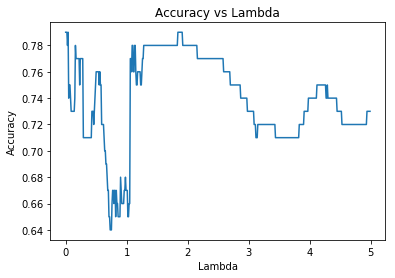

In [192]:
print(max(accuracy3))
plot_accuracy(L1, accuracy3)